In [13]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ---------------------------------
H2O_cluster_uptime:         25 mins 06 secs
H2O_cluster_timezone:       America/Asuncion
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.4
H2O_cluster_version_age:    2 months and 29 days
H2O_cluster_name:           H2O_from_python_davidnunez_uudt4f
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.949 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.4 final
--------------------------  ---------------------------------

In [14]:
import pandas as pd
df = pd.read_csv('../df_dummizado_up_to_2021.csv', index_col=False)

df_complaints = df[(df['Protestas'] == True)]
df_no_complaints = df[(df['Protestas'] == False)]

n_cmp = len(df_complaints.index)
n_no_cmp = len(df_no_complaints.index)
df_no_complaints = df_no_complaints.sample(int(n_cmp*3/2)) #Sample 60% no complaints 40 % complaints
balanced_df = pd.concat([df_complaints, df_no_complaints])

In [3]:
balanced_df.shape

(12242, 933)

In [3]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(balanced_df, test_size=0.2, random_state=42)
train = h2o.H2OFrame.from_python(train_data)
test = h2o.H2OFrame.from_python(test_data)
# Identify predictors and response
y = "Protestas"
x = train.columns
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leader
# board
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |
23:10:13.830: AutoML: XGBoost is not available; skipping it.
23:10:13.854: _train param, Dropping bad and constant columns: [contracts.investmentProjects.id_6, contracts.investmentProjects.id_31, contracts.investmentProjects.id_30, contracts.investmentProjects.id_35, contracts.investmentProjects.id_36, contracts.investmentProjects.id_34, contracts.investmentProjects.id_37, parties.details.legalEntityTypeDetail buyer_15, parties.details.legalEntityTypeDetail buyer_14, parties.details.legalEntityTypeDetail buyer_13, parties.details.legalEntityTypeDetail buyer_12, parties.details.legalEntityTypeDetail buyer_11, parties.details.legalEntityTypeDetail buyer_10, parties.details.EntityType payee_1, parties.details.EntityType payee_2, parties.details.EntityType payee_3, contracts.investmentProjects.id_24, contracts.investmentProjects.id_109, parties.details.EntityType payee_4, contracts.investmentProjects.id_106, planning.items.classification.id.n1_1_56, planning.items.classi

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------
StackedEnsemble_AllModels_1_AutoML_1_20230726_231013     0.908264   0.369347  0.884297                0.168563  0.339396  0.11519
StackedEnsemble_BestOfFamily_1_AutoML_1_20230726_231013  0.905714   0.372701  0.883353                0.171789  0.341203  0.11642
GBM_grid_1_AutoML_1_20230726_231013_model_5              0.904327   0.380085  0.879318                0.171487  0.343178  0.117771
GBM_grid_1_AutoML_1_20230726_231013_model_4              0.903064   0.381222  0.872596                0.173623  0.345105  0.119098
GBM_4_AutoML_1_20230726_231013                           0.901638   0.381724  0.877174                0.17397   0.344836  0.118912
GBM_grid_1_AutoML_1_20230726_231013_model_1              0.899681   0.386639  0.872467                0.177469  0.347389  0.120679
GBM_3_AutoML_1_20230726_231013                           0.89926    0.387236  0.87034                 0.180337  0.348187  0.121234
GBM_1_AutoML_1_20230726_231013                           0.898276   0.390865  0.864621                0.180046  0.350591  0.122914
GBM_2_AutoML_1_20230726_231013                           0.896558   0.392327  0.866029                0.18212   0.350684  0.122979
GBM_5_AutoML_1_20230726_231013                           0.894601   0.396337  0.863676                0.18189   0.352736  0.124423
GBM_grid_1_AutoML_1_20230726_231013_model_3              0.889883   0.405216  0.854743                0.18653   0.357392  0.127729
DRF_1_AutoML_1_20230726_231013                           0.889664   0.402557  0.869039                0.186361  0.35611   0.126814
GBM_grid_1_AutoML_1_20230726_231013_model_2              0.883497   0.418752  0.846351                0.19619   0.364307  0.13272
XRT_1_AutoML_1_20230726_231013                           0.860722   0.517492  0.836473                0.209789  0.409853  0.16798
GLM_1_AutoML_1_20230726_231013                           0.853695   0.466354  0.810727                0.218809  0.385778  0.148825
DeepLearning_grid_3_AutoML_1_20230726_231013_model_2     0.849161   0.486469  0.800192                0.211016  0.386327  0.149249
DeepLearning_1_AutoML_1_20230726_231013                  0.847828   0.487774  0.80028                 0.214336  0.385444  0.148567
DeepLearning_grid_3_AutoML_1_20230726_231013_model_1     0.844965   0.527588  0.80012                 0.222627  0.394878  0.155929
DeepLearning_grid_2_AutoML_1_20230726_231013_model_2     0.844915   0.489208  0.805404                0.223686  0.388781  0.151151
DeepLearning_grid_2_AutoML_1_20230726_231013_model_1     0.838641   0.592817  0.796089                0.222593  0.399194  0.159356
DeepLearning_grid_1_AutoML_1_20230726_231013_model_2     0.836193   0.705115  0.786937                0.22317   0.395715  0.156591
DeepLearning_grid_1_AutoML_1_20230726_231013_model_1     0.822589   0.820656  0.77138                 0.22696   0.4046    0.163701
[22 rows x 7 columns]

In [5]:
preds = aml.predict(test)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20230726_231013     0.922341   0.341412  0.909979                0.151402  0.324484  0.10529                66246                   0.383775  StackedEnsemble
GBM_grid_1_AutoML_1_20230726_231013_model_1              0.918753   0.349727  0.903841                0.156049  0.32898   0.108228                4308                   0.087144  GBM
GBM_grid_1_AutoML_1_20230726_231013_model_4              0.918097   0.350912  0.901923                0.154015  0.329686  0.108693                4700                   0.086048  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20230726_231013  0.917264   0.348174  0.90671                 0.151362  0.327837  0.107477               16602                   0.105001  StackedEnsemble
GBM_4_AutoML_1_20230726_231013                           0.917121   0.35192   0.901815                0.152437  0.329262  0.108413                5533                   0.140539  GBM
GBM_grid_1_AutoML_1_20230726_231013_model_5              0.914889   0.355611  0.901966                0.152784  0.330103  0.108968                8150                   0.024827  GBM
GBM_3_AutoML_1_20230726_231013                           0.911384   0.361862  0.896685                0.161078  0.334014  0.111565                4397                   0.067096  GBM
GBM_1_AutoML_1_20230726_231013                           0.910169   0.367644  0.88983                 0.165461  0.337262  0.113746                5738                   0.046322  GBM
GBM_2_AutoML_1_20230726_231013                           0.909909   0.369247  0.891211                0.167868  0.33897   0.1149                  3723                   0.113513  GBM
GBM_5_AutoML_1_20230726_231013                           0.906989   0.375255  0.888625                0.164187  0.340941  0.11624                 3227                   0.039742  GBM
DRF_1_AutoML_1_20230726_231013                           0.904669   0.378351  0.894818                0.171752  0.343115  0.117728                4278                   0.091351  DRF
GBM_grid_1_AutoML_1_20230726_231013_model_3              0.904668   0.380077  0.883882                0.173665  0.343705  0.118133                1926                   0.100269  GBM
GBM_grid_1_AutoML_1_20230726_231013_model_2              0.902345   0.389434  0.879168                0.172246  0.347676  0.120879                2104                   0.02934   GBM
XRT_1_AutoML_1_20230726_231013                           0.882126   0.495165  0.873148                0.180463  0.396726  0.157392                2911                   0.036189  DRF
DeepLearning_grid_2_AutoML_1_20230726_231013_model_1     0.871349   0.8265    0.848712                0.180389  0.381624  0.145637               35944                   0.046392  DeepLearning
GLM_1_AutoML_1_20230726_231013                           0.869713   0.448101  0.841879                0.19482   0.374889  0.140542                1134                   0.019154  GLM
DeepLearning_grid_3_AutoML_1_20230726_231013_model_1     0.869282   0.740808  0.850488                0.186526  0.386034  0.149023               46575                   0.236154  DeepLearning
DeepLearning_1_AutoML_1_20230726_231013                  0.866671   0.458578  0.833758                0.199047  0.372354  0.138648                 887                   0.057508  DeepLearning
DeepLearning_grid_2_AutoML_1_20230726_231013_model_2     0.864875   0.475421  0.836199                0.202963  0.378549  0.143299               30350                   0.150951  DeepLearning
DeepLearning_grid_3_AutoML_1_20230726_231013_model_2     0.854283   0.478275  0.8314

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20230726_231013

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44698327671330973
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  1289     158     0.1092   (158.0/1447.0)
True   194      808     0.1936   (194.0/1002.0)
Total  1483     966     0.1437   (352.0/2449.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

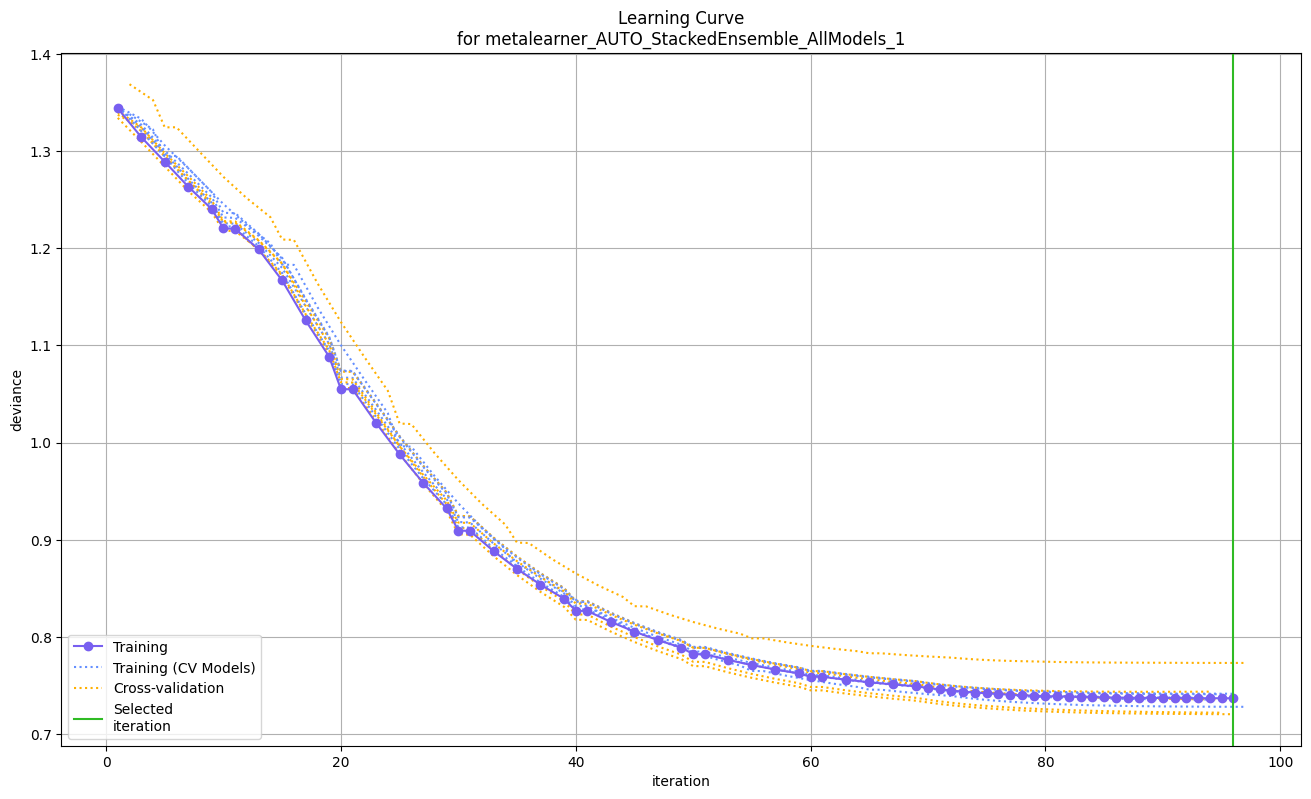

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

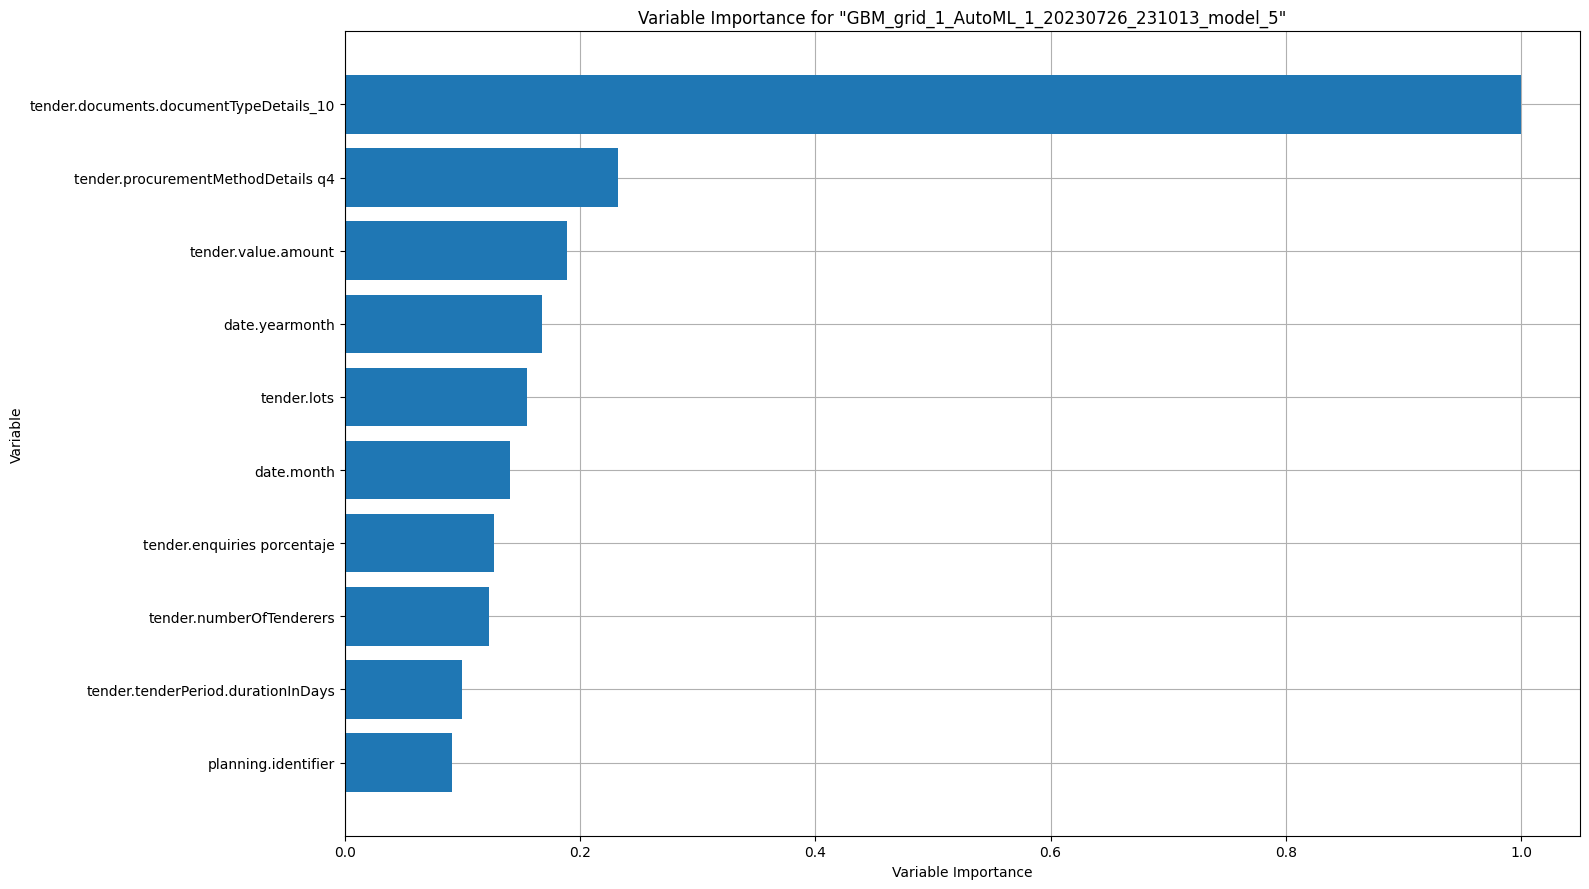

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

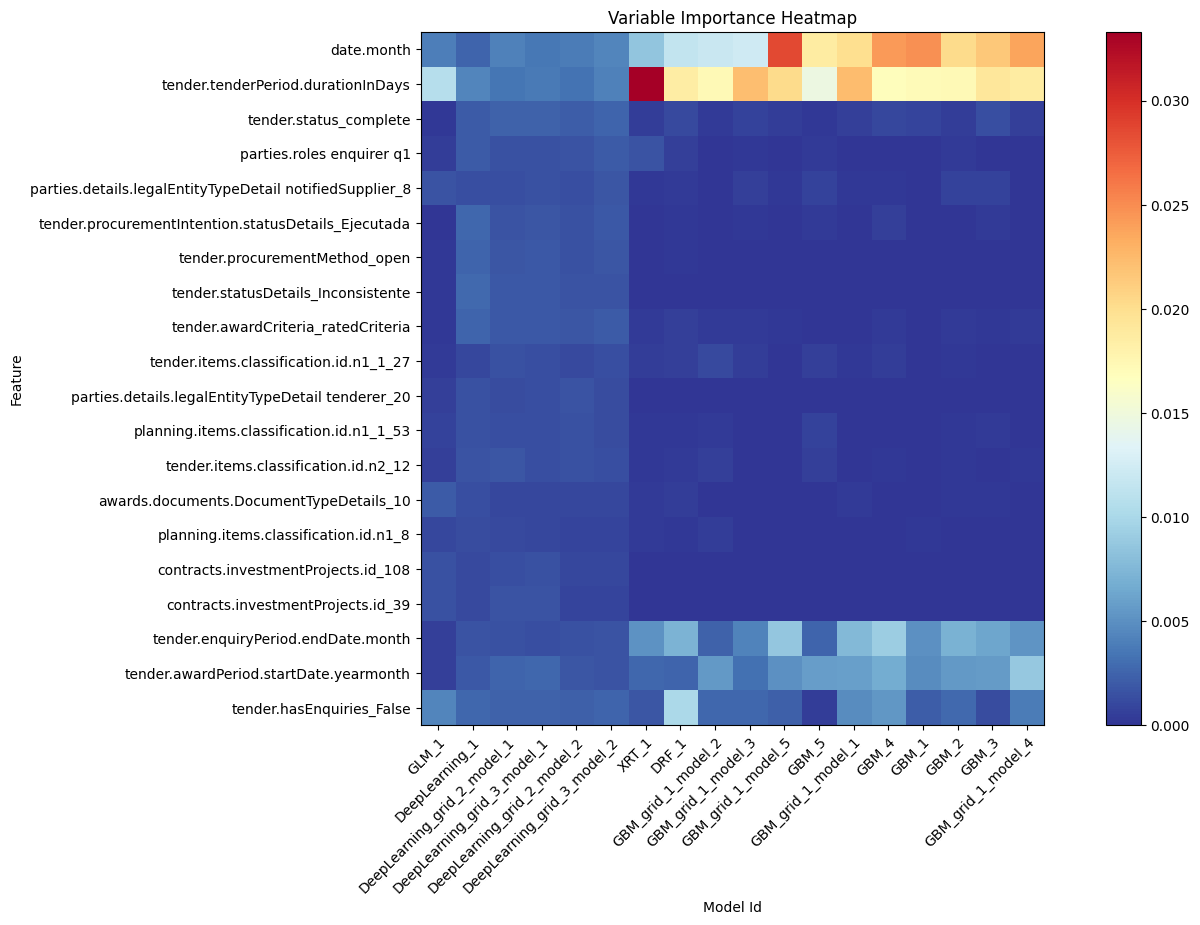

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

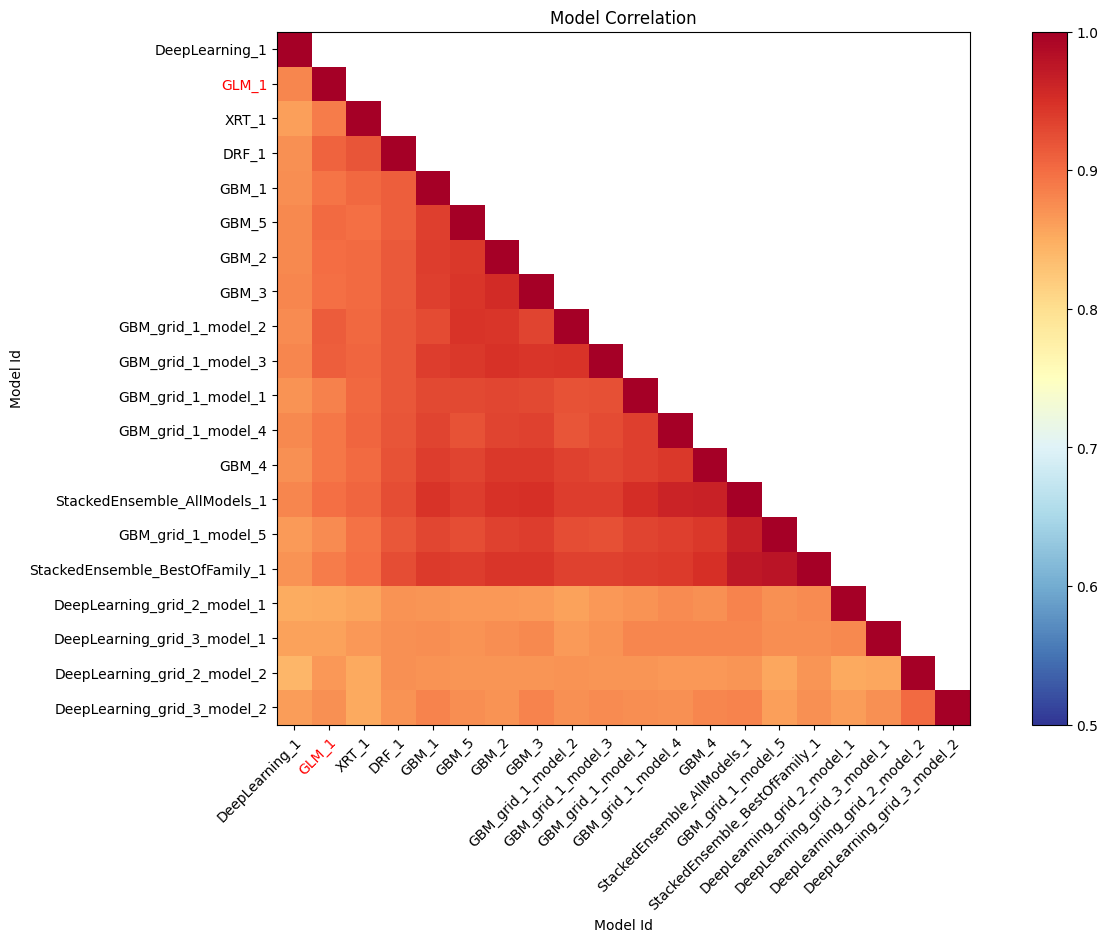

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

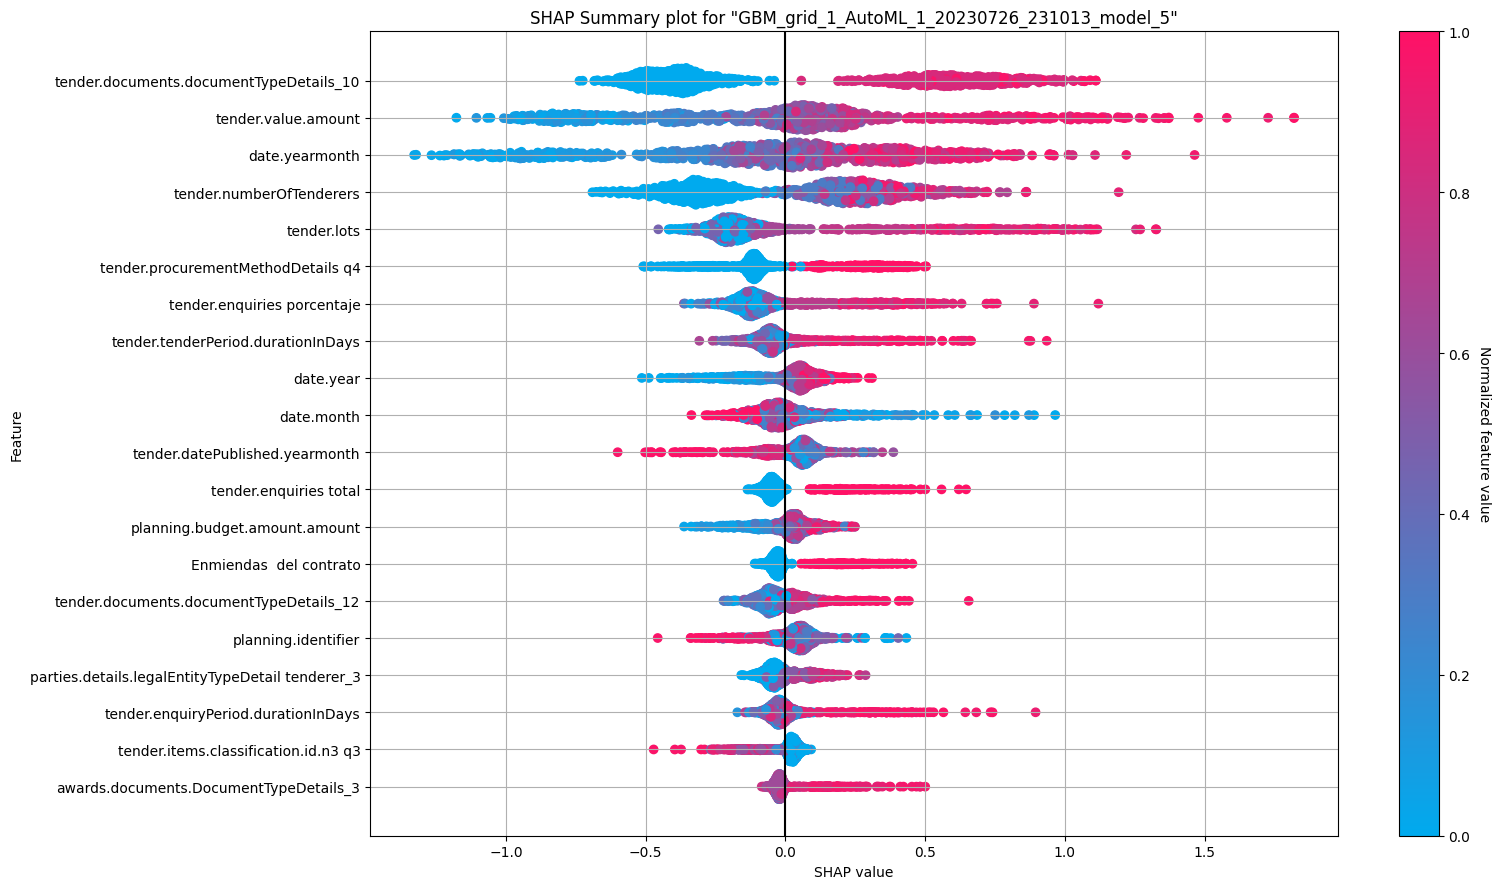

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

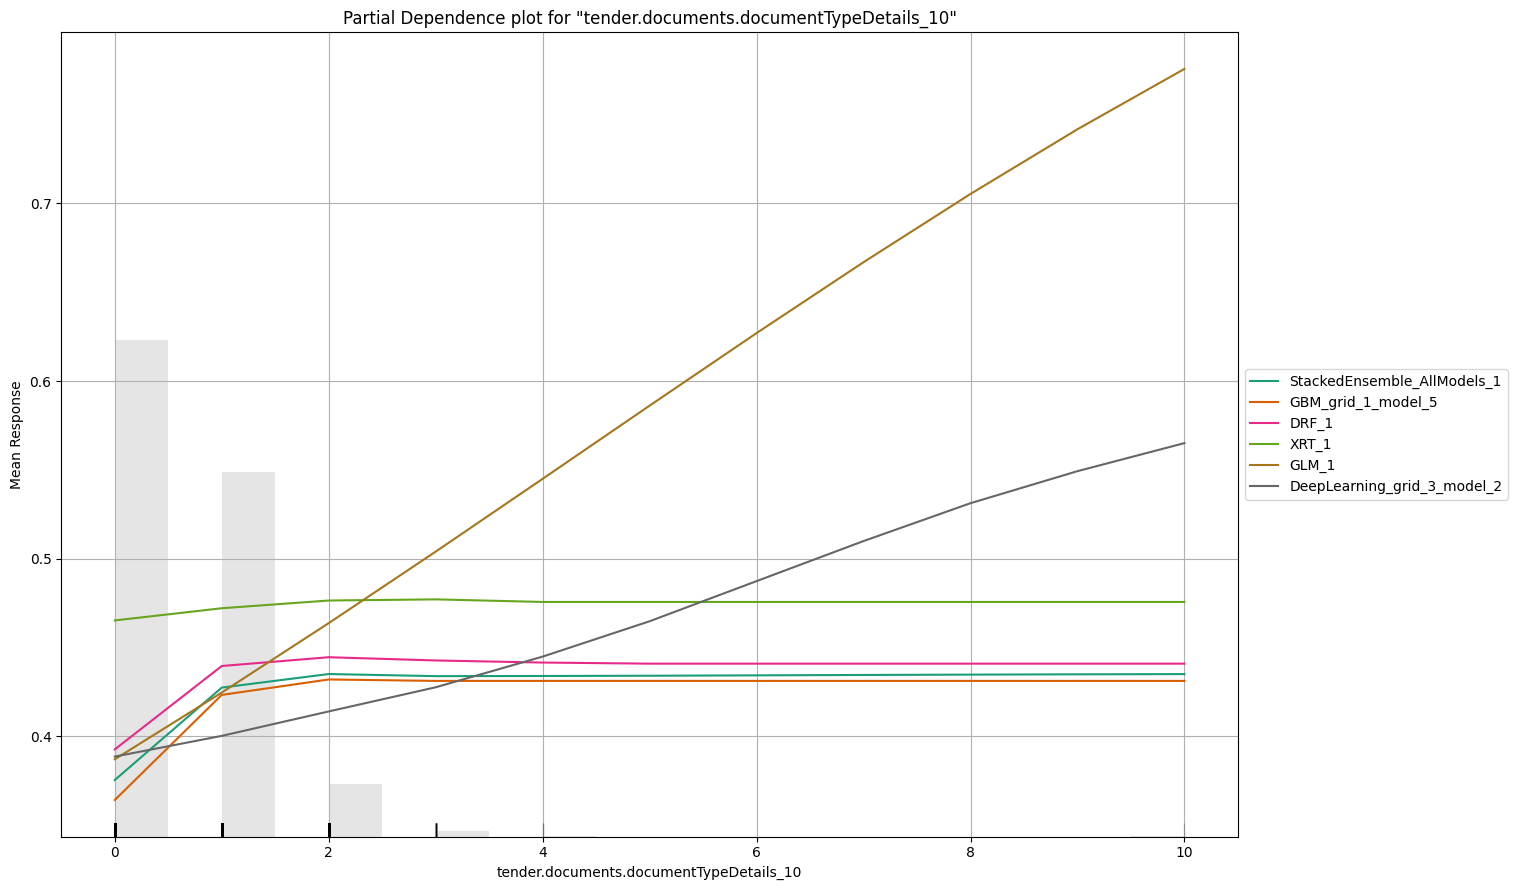

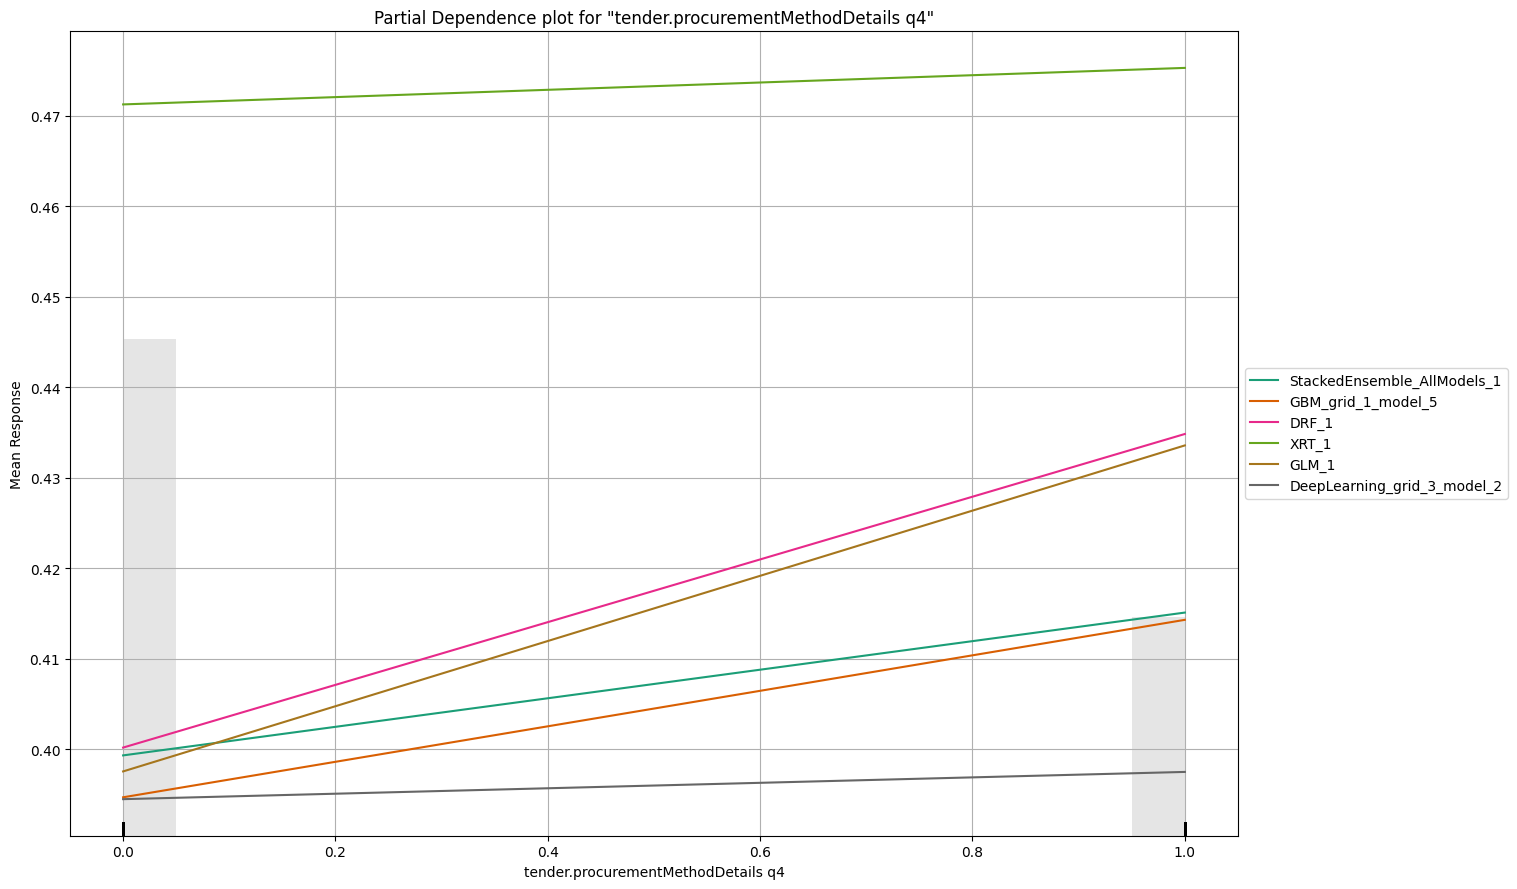

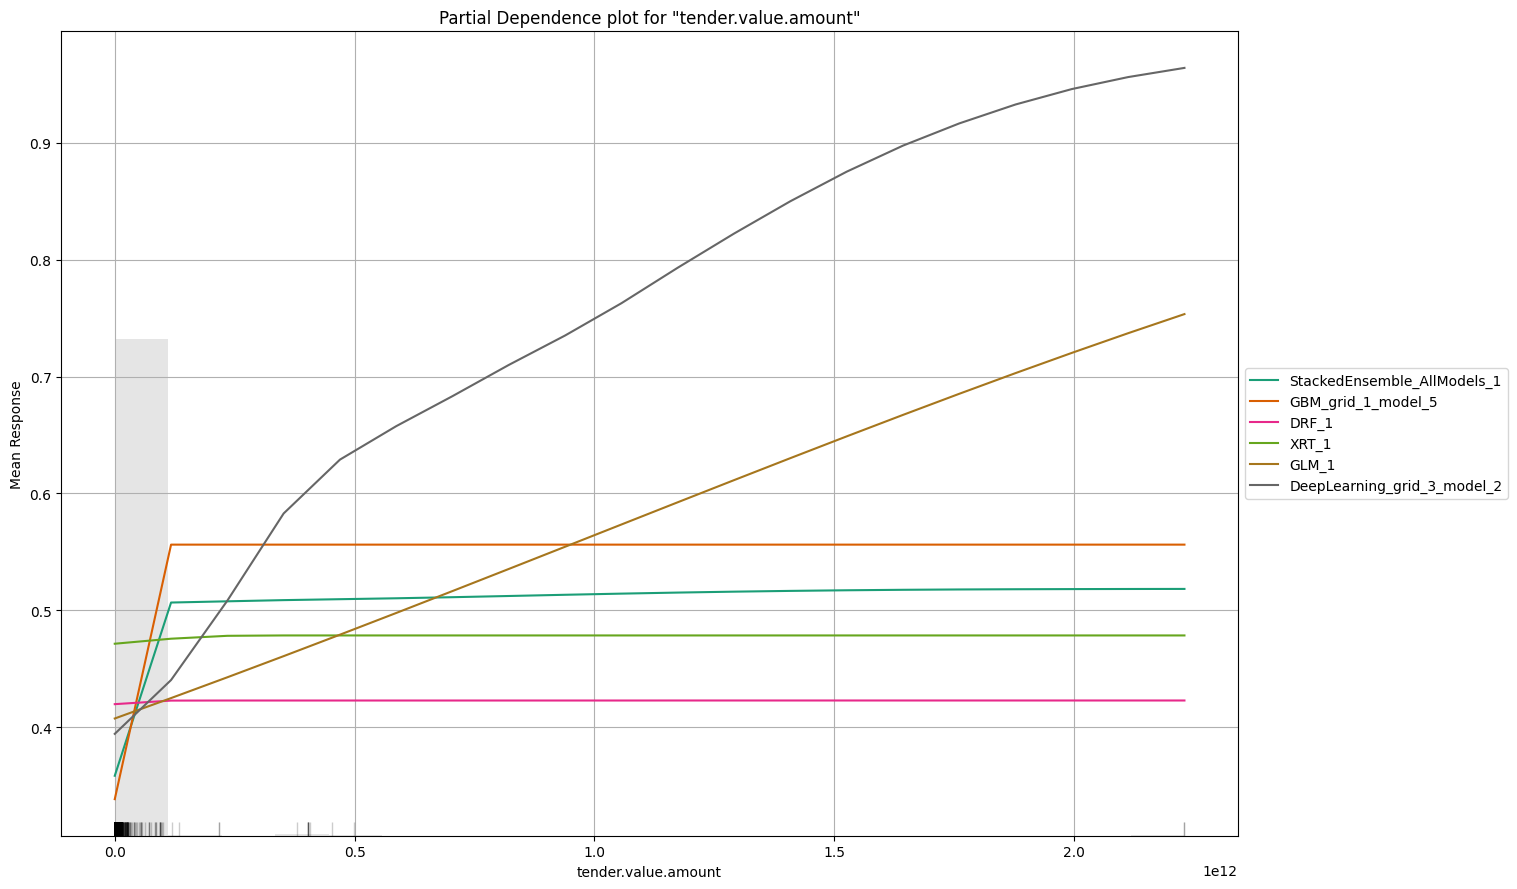

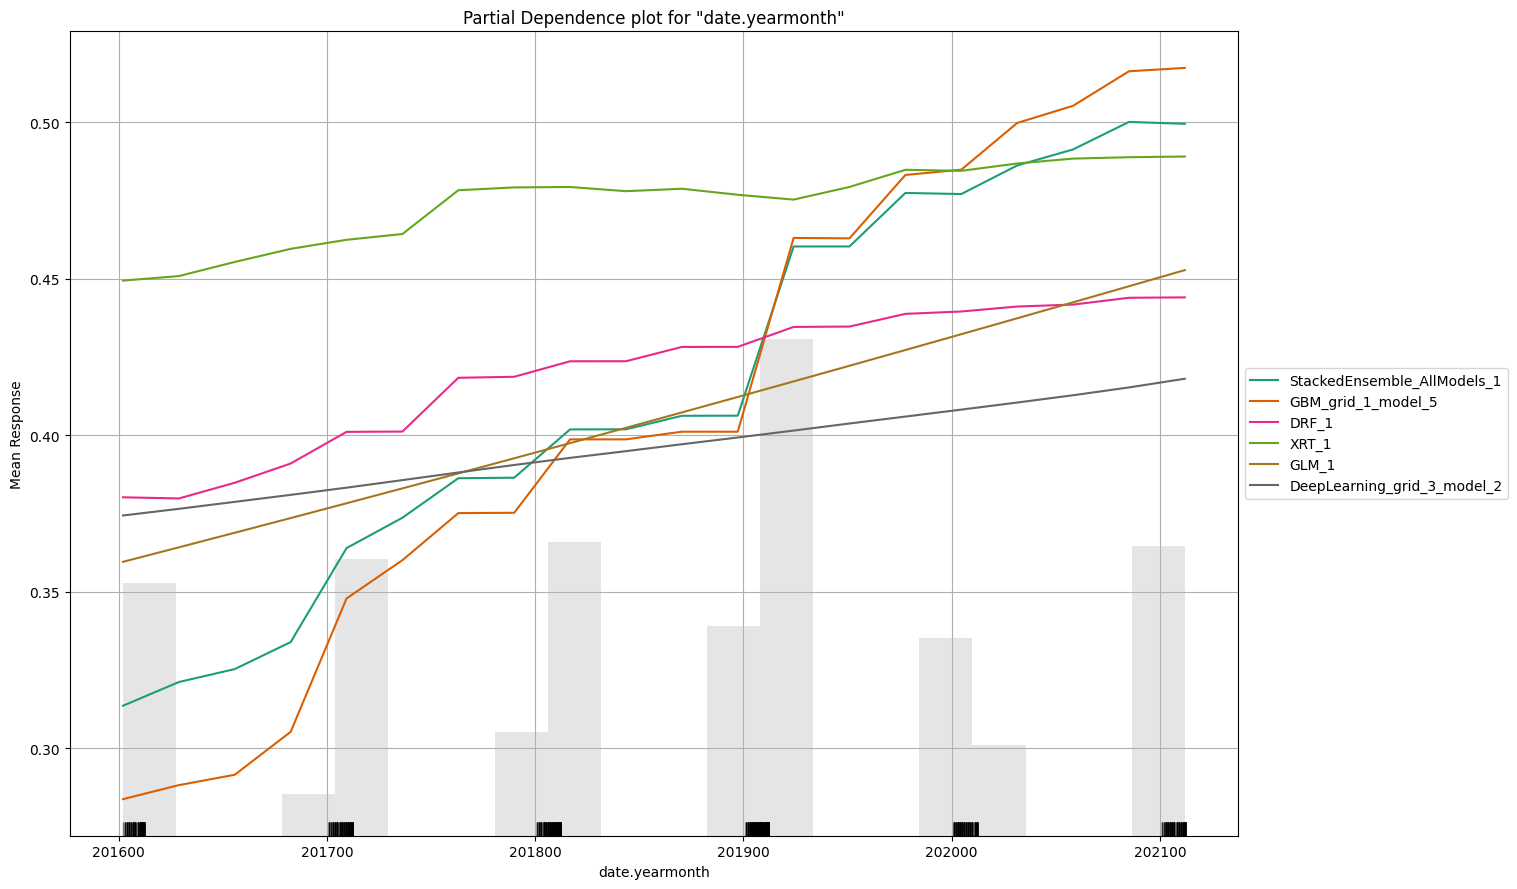

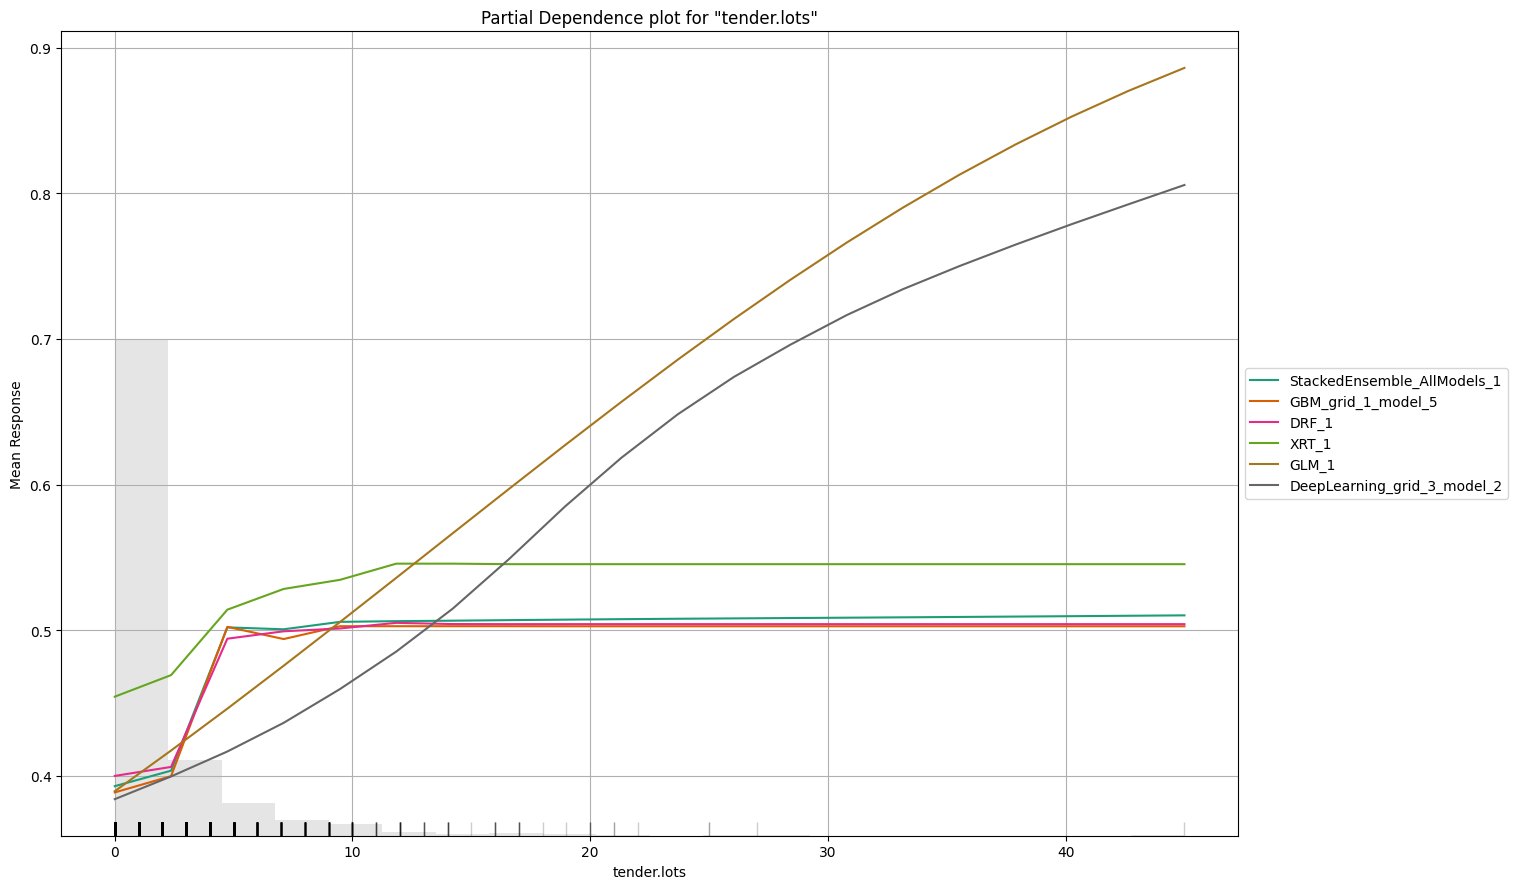

In [6]:
exa = aml.explain(test)


In [7]:
model_path = h2o.save_model(model=aml.leader, path="train2021/randomOverSamplingModel", force=True)

In [8]:
print(model_path)

/Users/davidnunez/Desktop/tesis/tesis-model/Training/train2021/randomOverSamplingModel/StackedEnsemble_AllModels_1_AutoML_1_20230726_231013


## TESTING 2022 DATA

In [10]:
df_2022 = pd.read_csv('../df_dummizado_from_2021.csv', index_col=False)
df_2022 = df_2022[df_2022['date.year'] == 2022]
test = h2o.H2OFrame.from_python(df_2022)
test[y] = test[y].asfactor()
preds2022 = aml.predict(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [18]:
df_preds = preds2022.as_data_frame()
df_preds['result'] = df_preds['True'] >= 0.5
df_preds['is_right'] = df_preds['result'] == df_preds['predict']
# df_preds.head()
# GROUP BY 
gkk = df_preds.groupby(['is_right'], dropna=False)
gkk.count()

predict  False   True  result
is_right                               
False        2245   2245   2245    2245
True        19739  19739  19739   19739

In [20]:
df_preds.shape

(21984, 5)

In [21]:
print('Acerto', 100*19739/21984)

Acerto 89.78802765647744


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20230726_231013

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6977494893392815
       False    True    Error    Rate
-----  -------  ------  -------  ----------------
False  17026    1640    0.0879   (1640.0/18666.0)
True   1380     1938    0.4159   (1380.0/3318.0)
Total  18406    3578    0.1374   (3020.0/21984.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

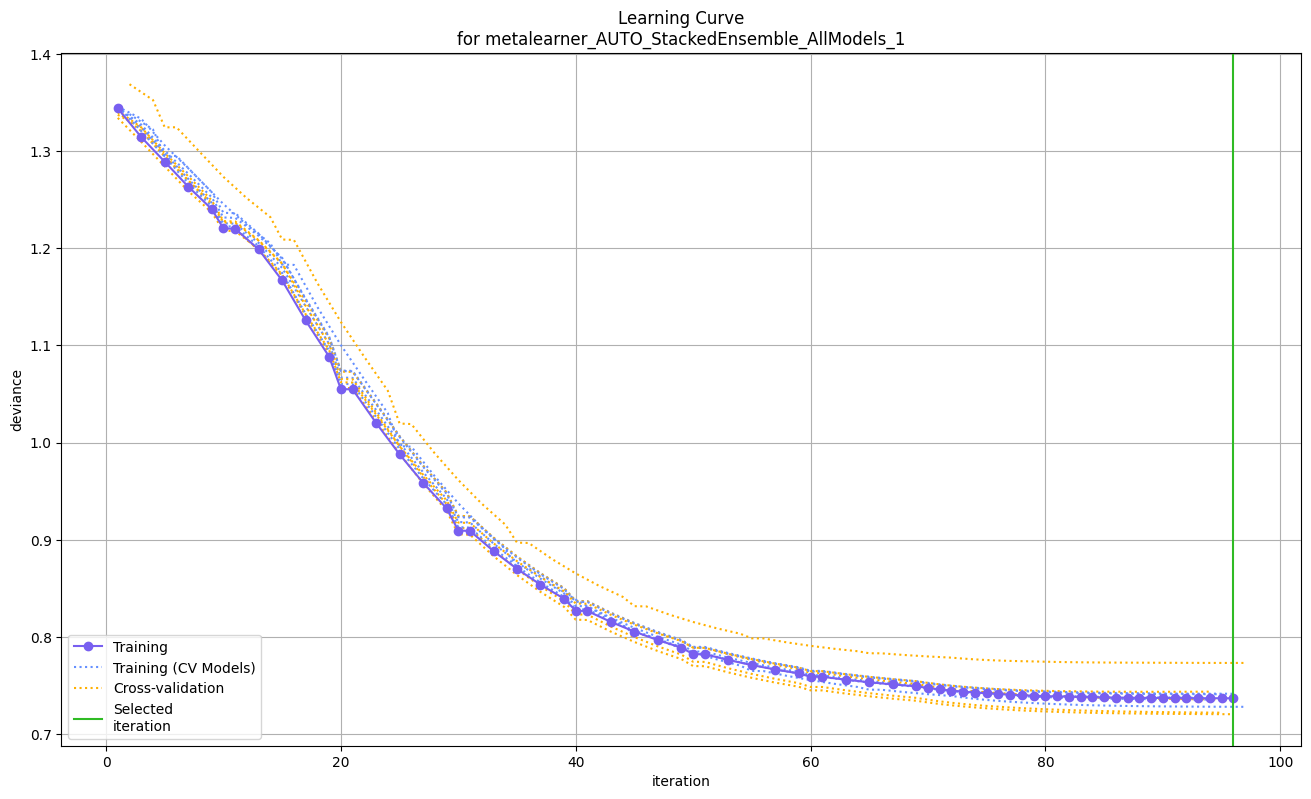

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

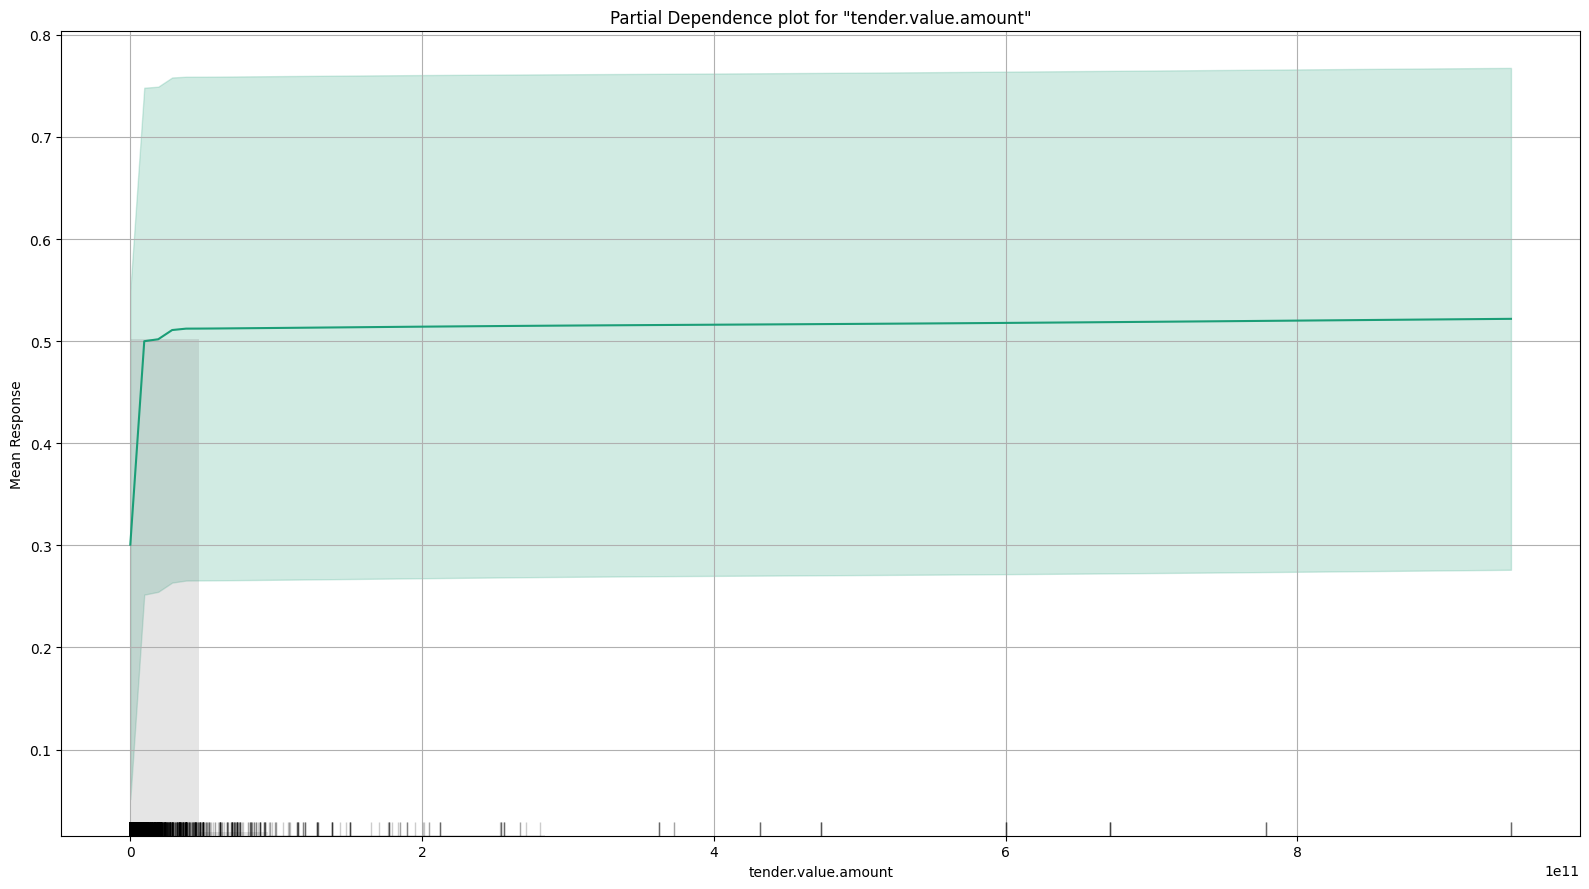

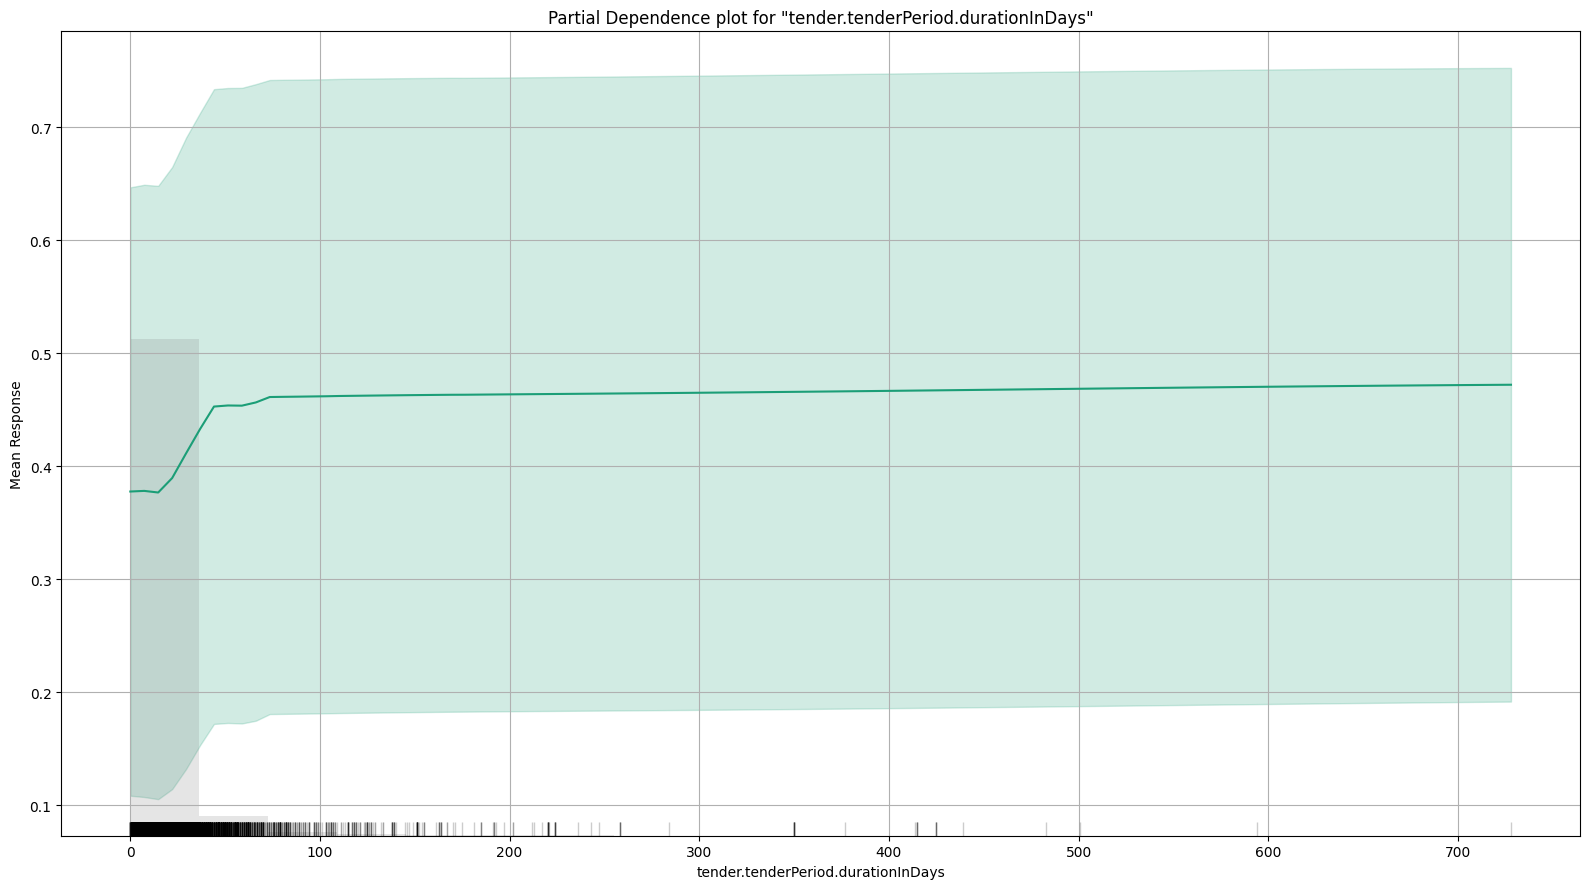

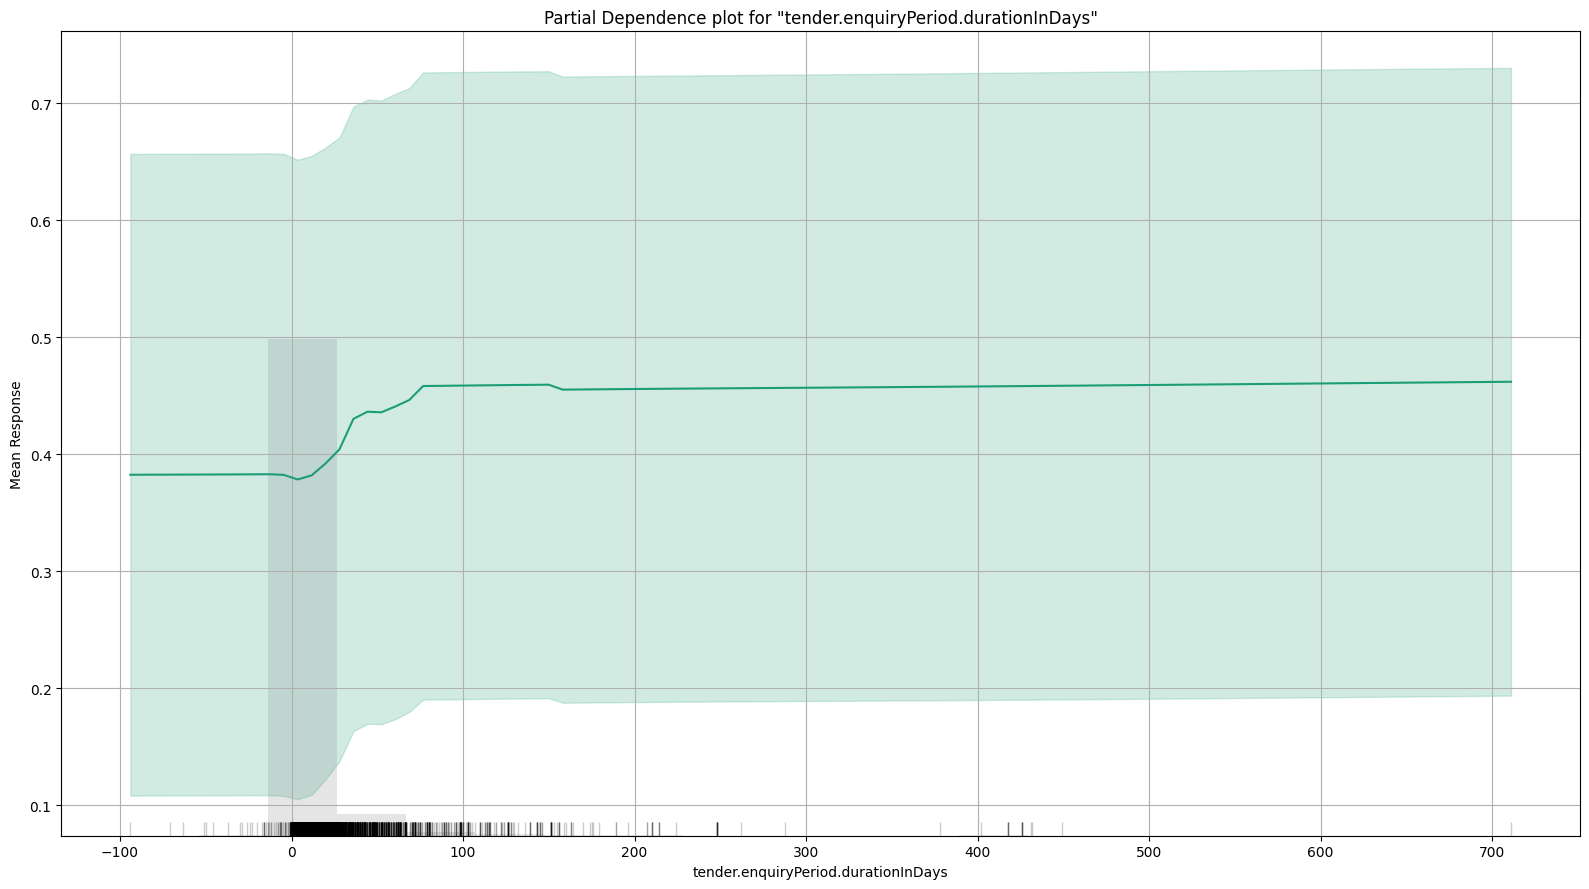

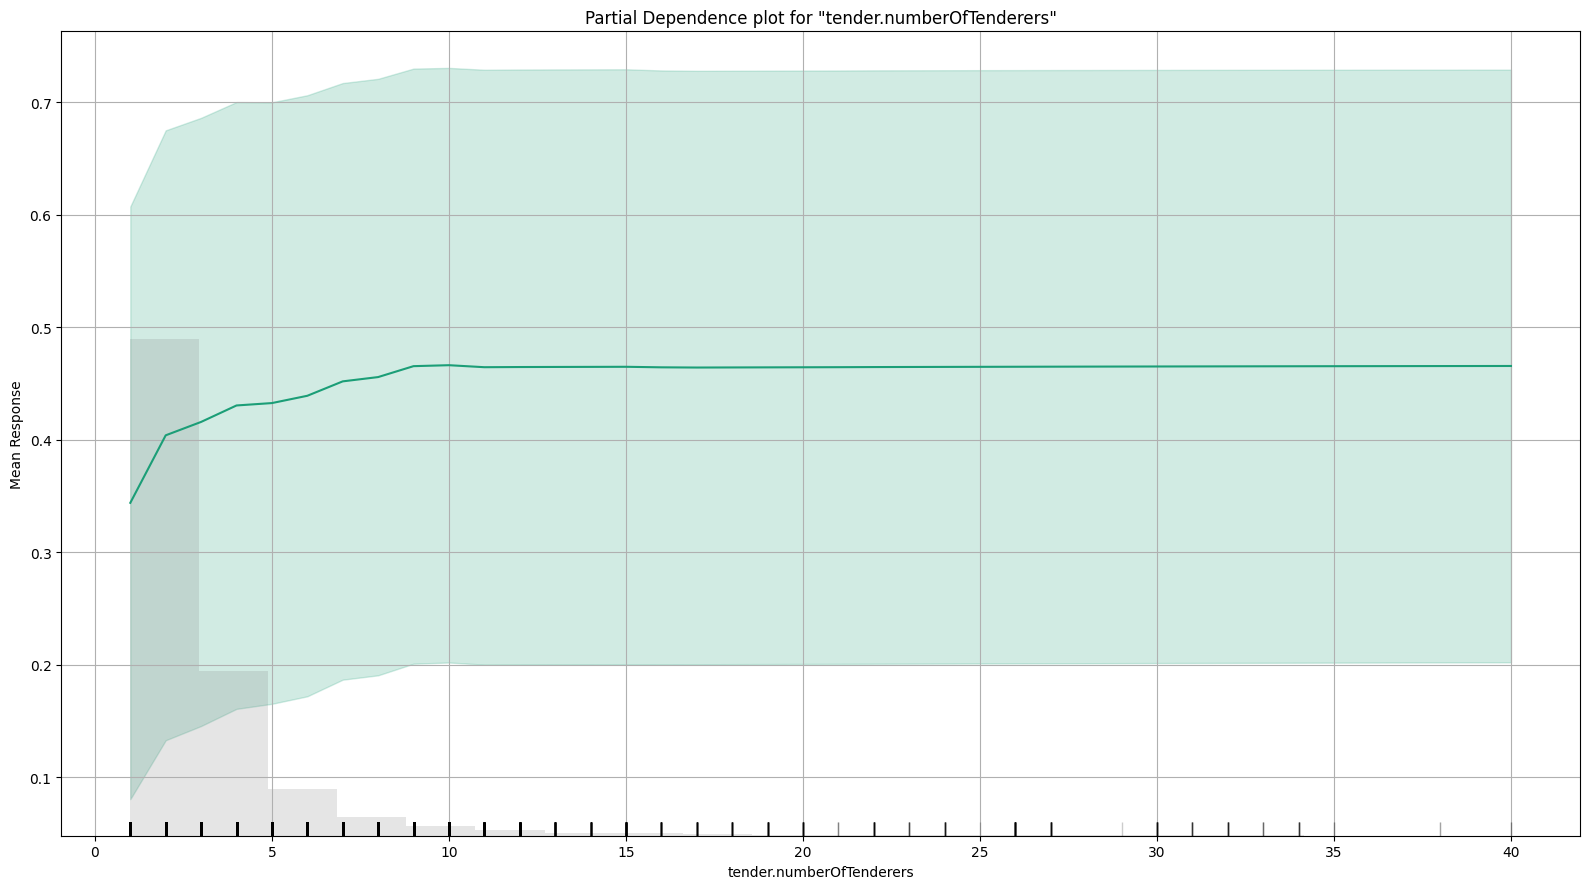

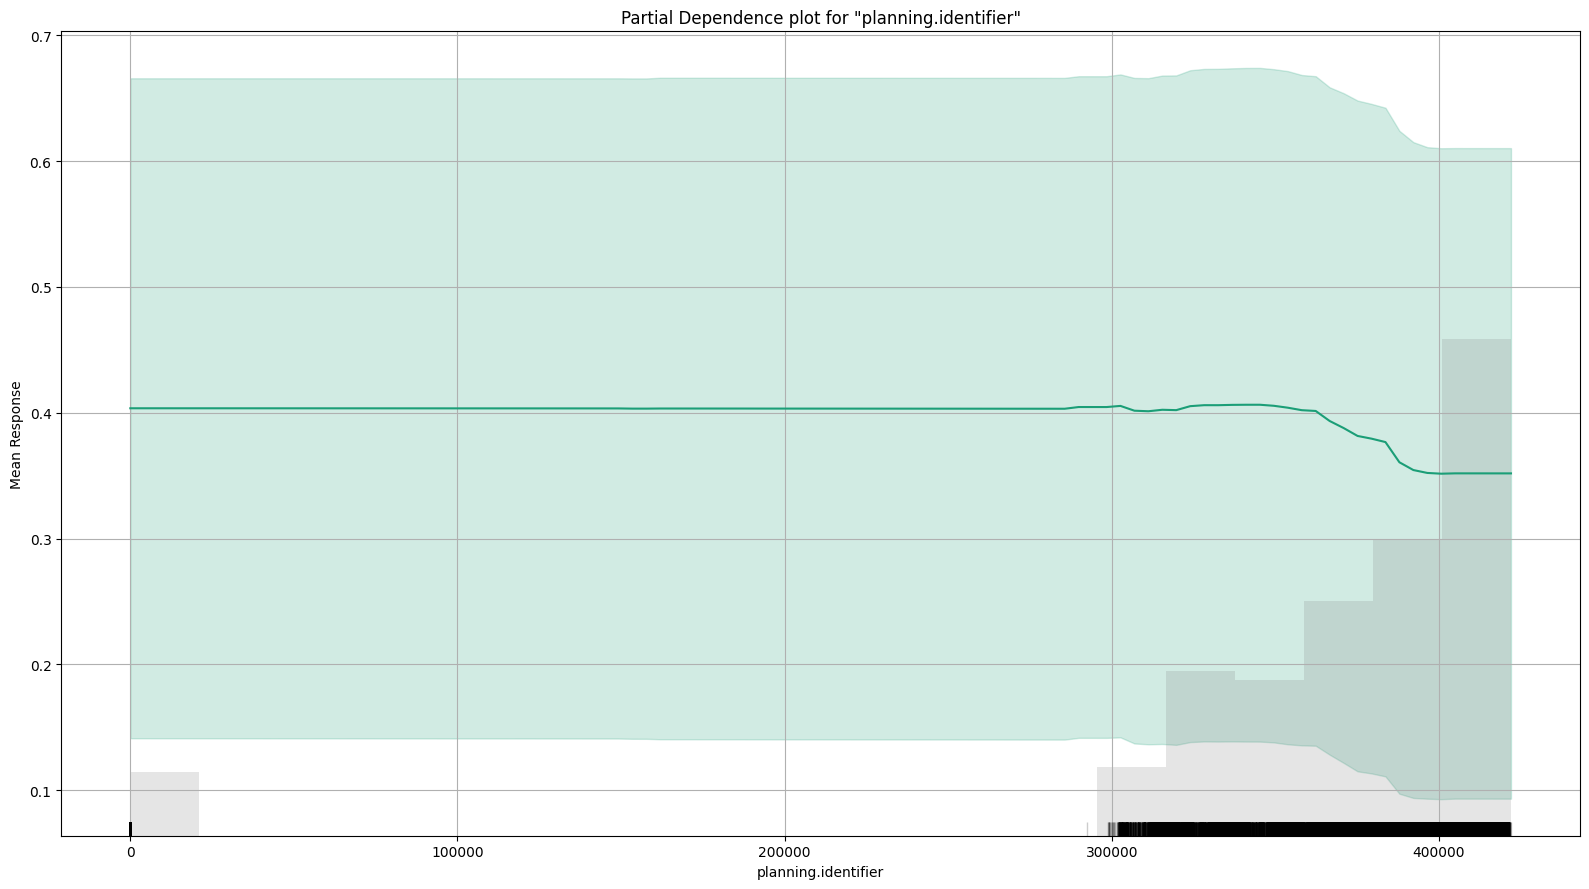

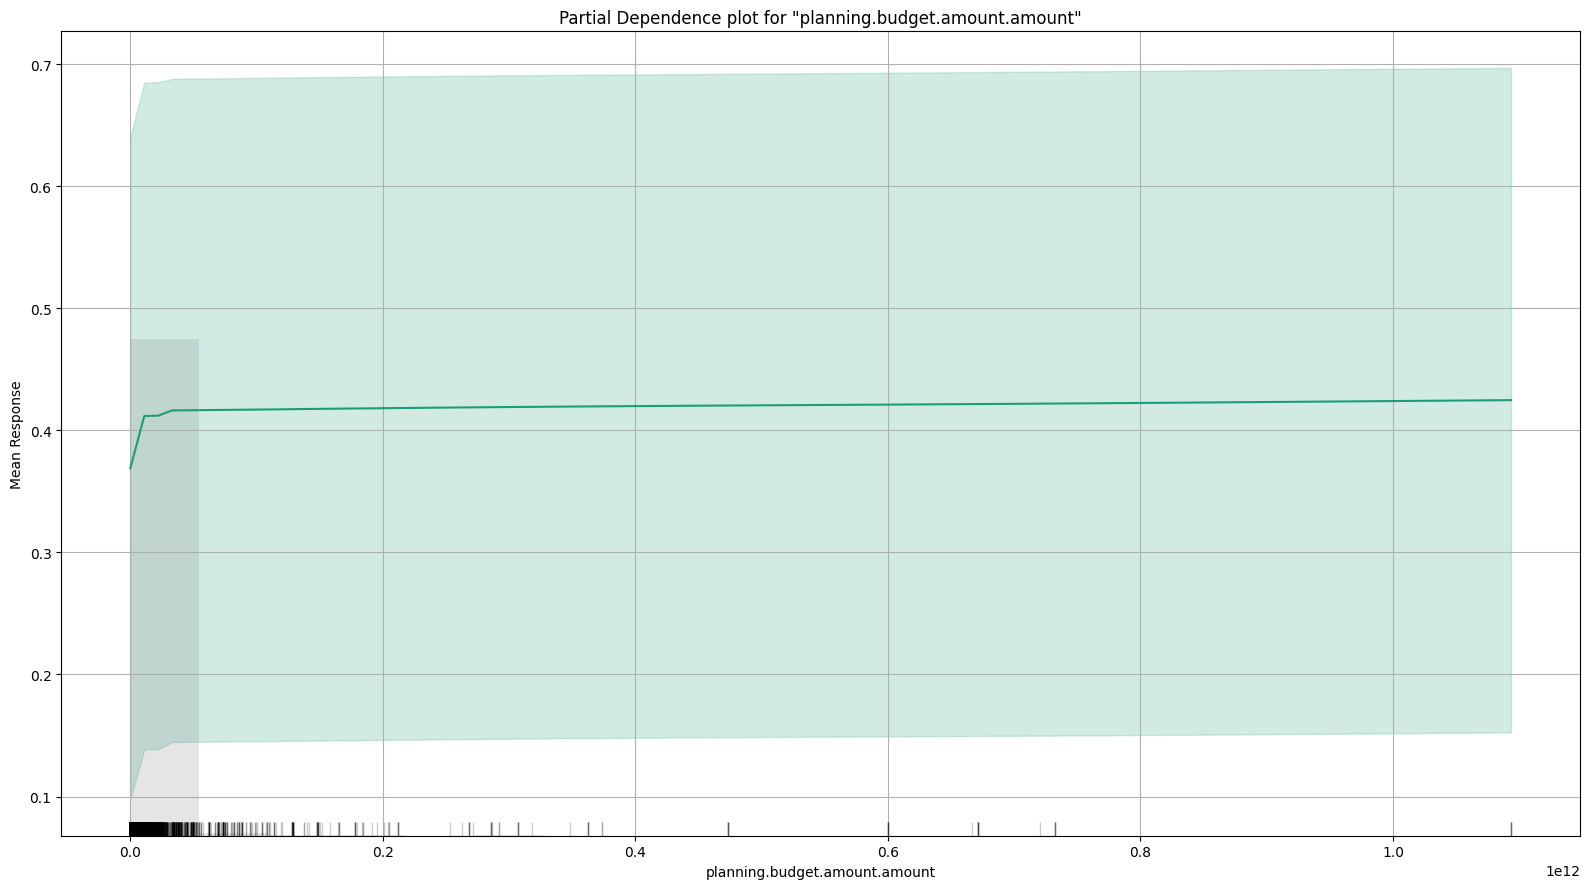

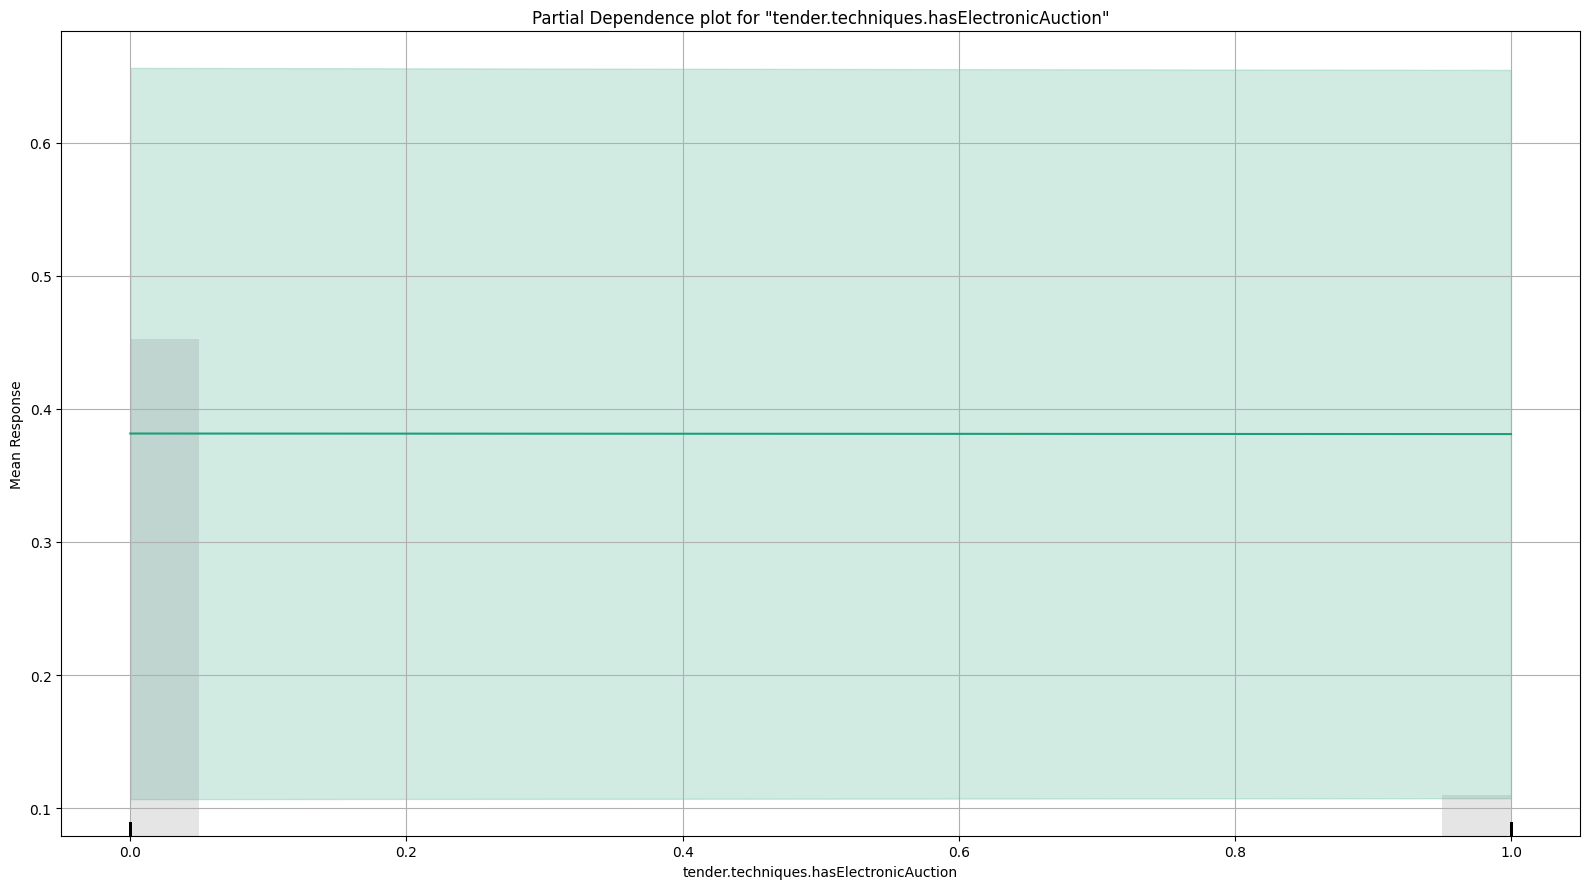

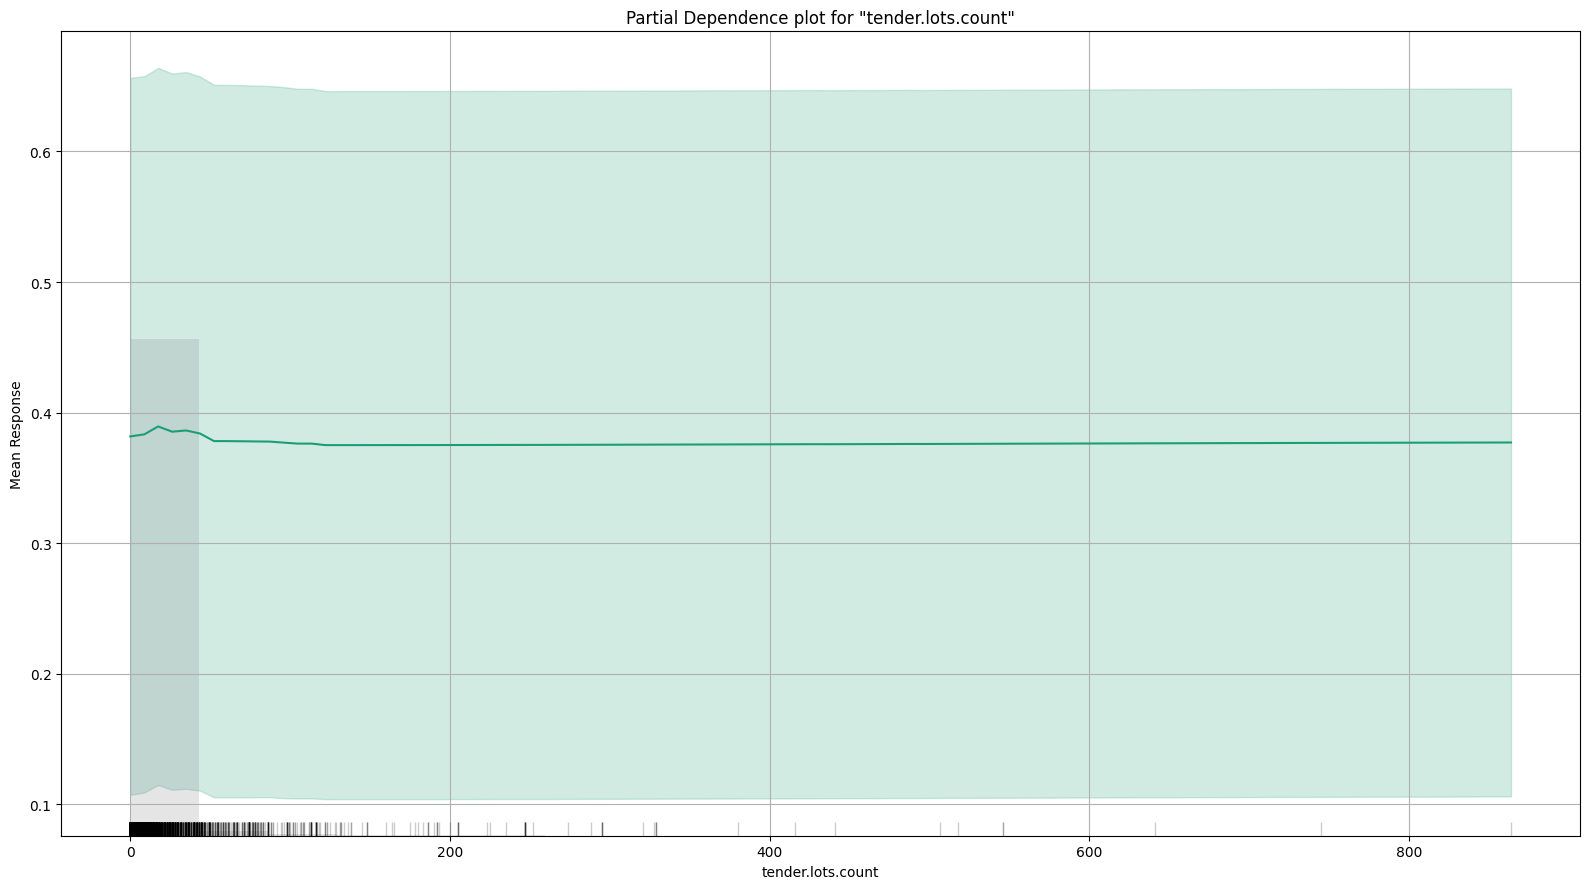

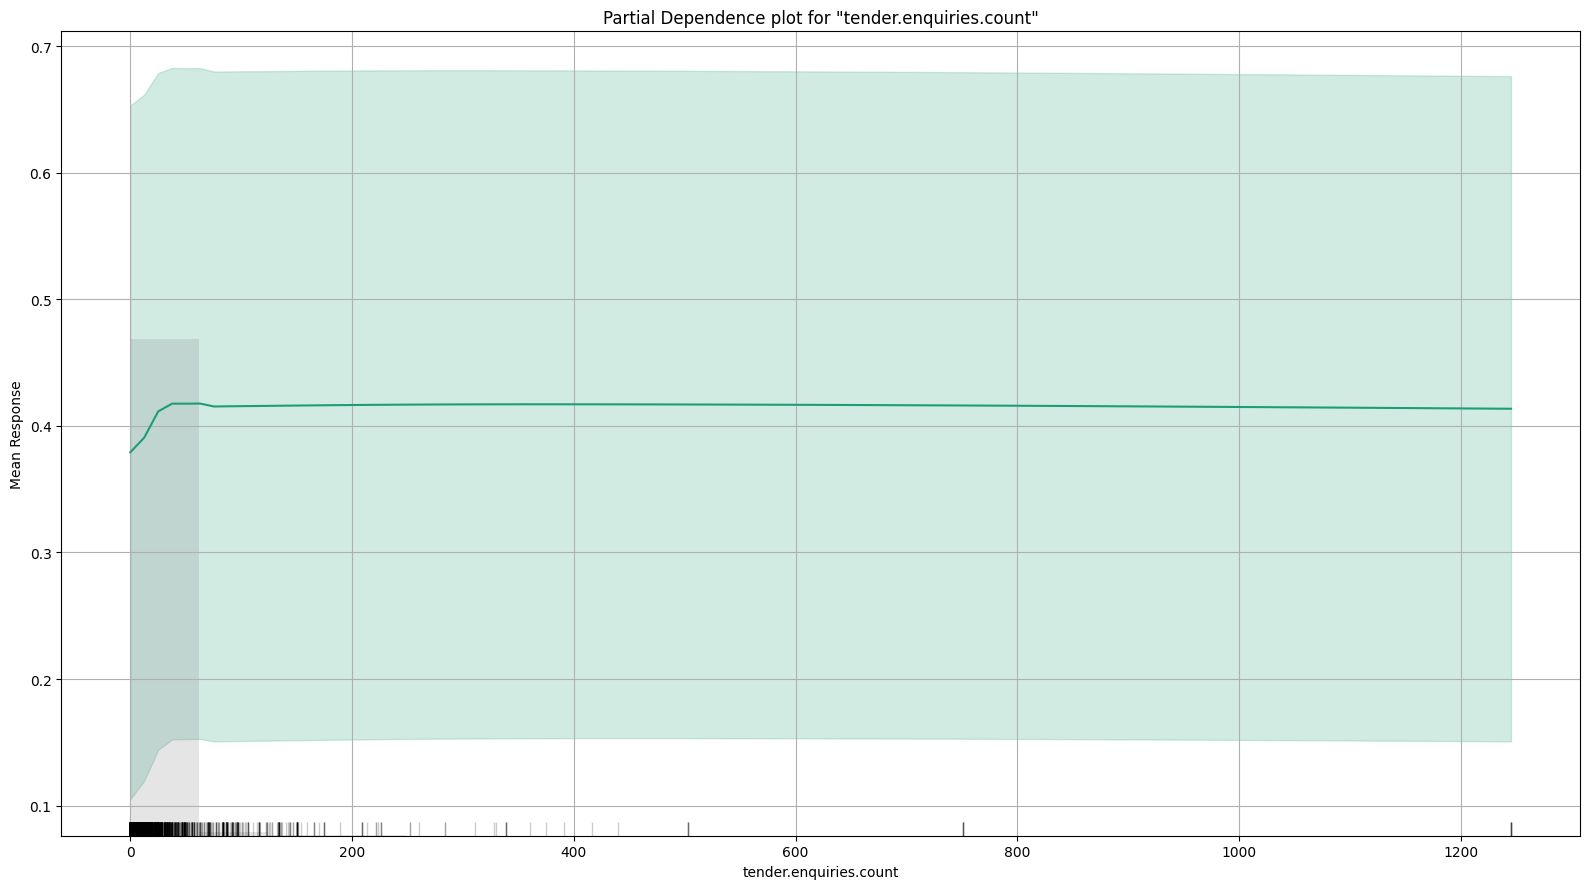

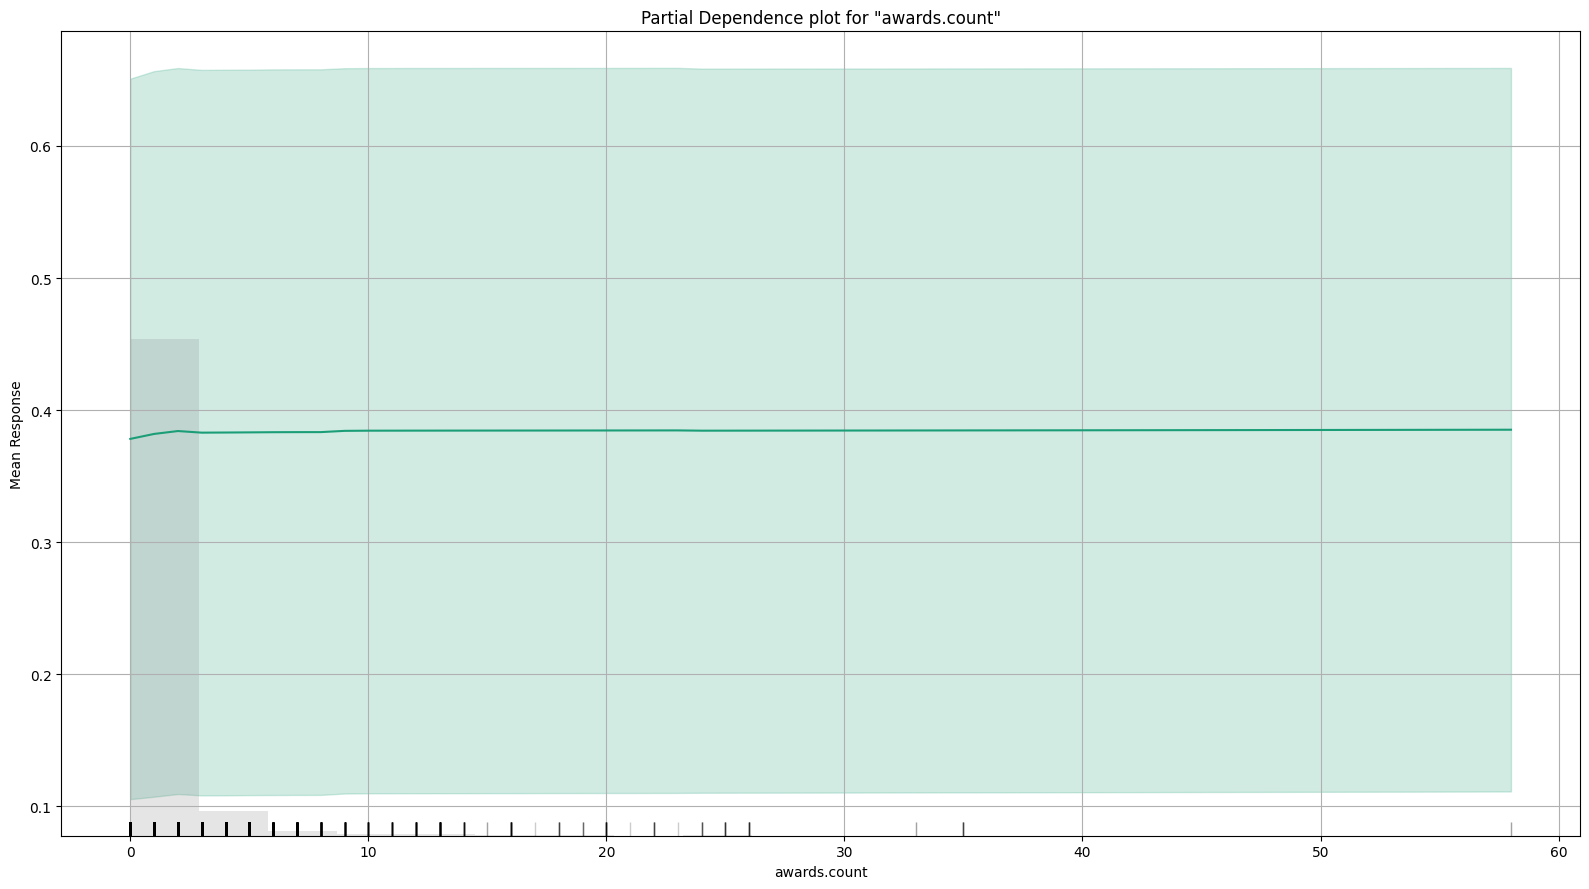

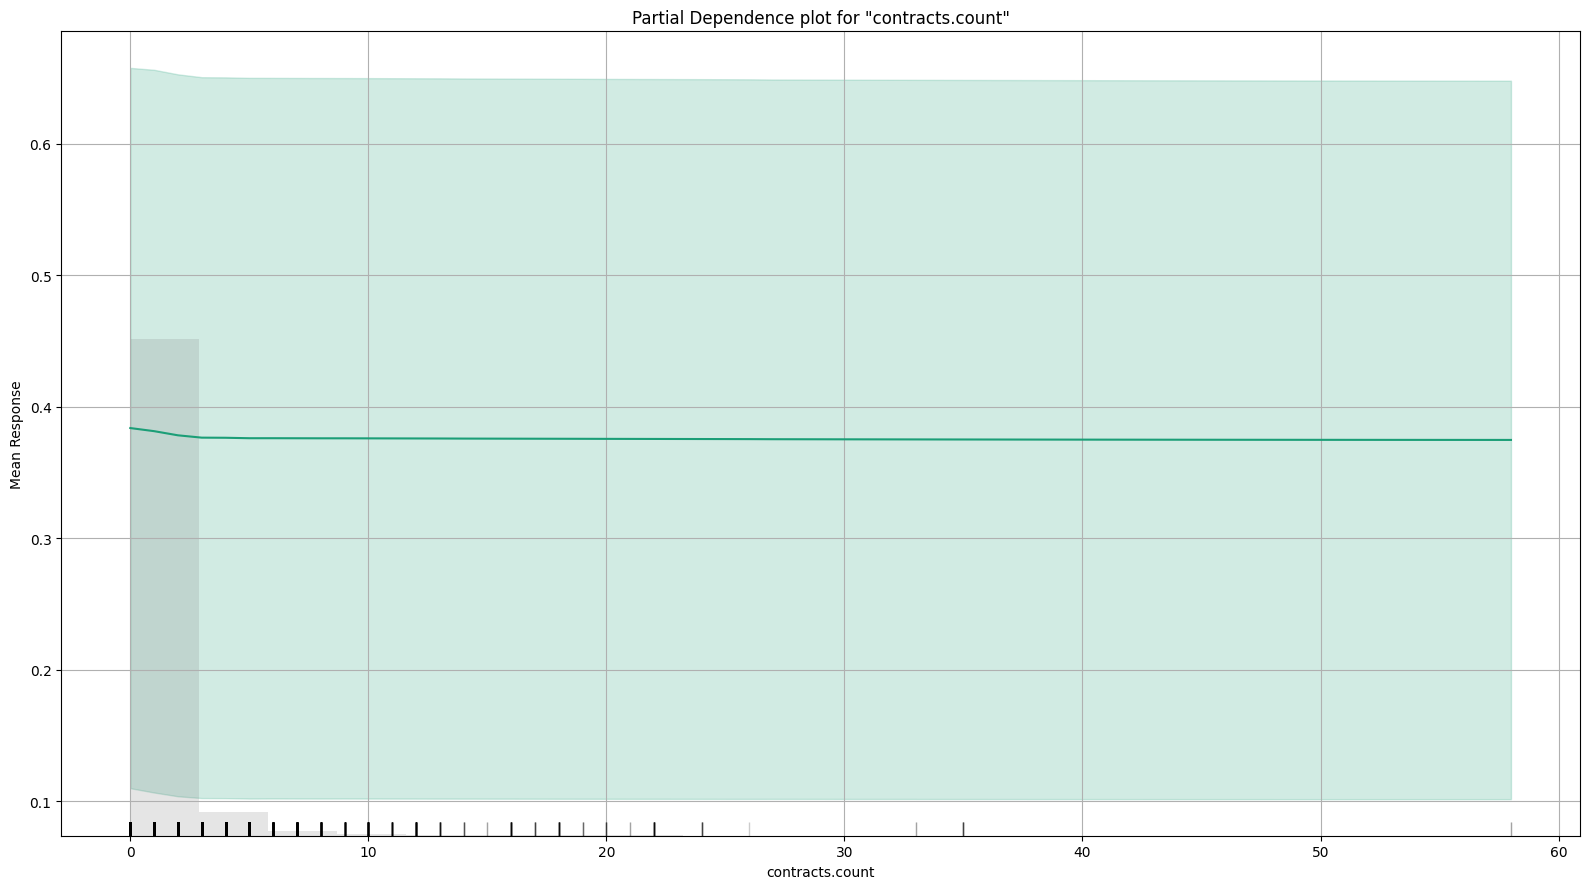

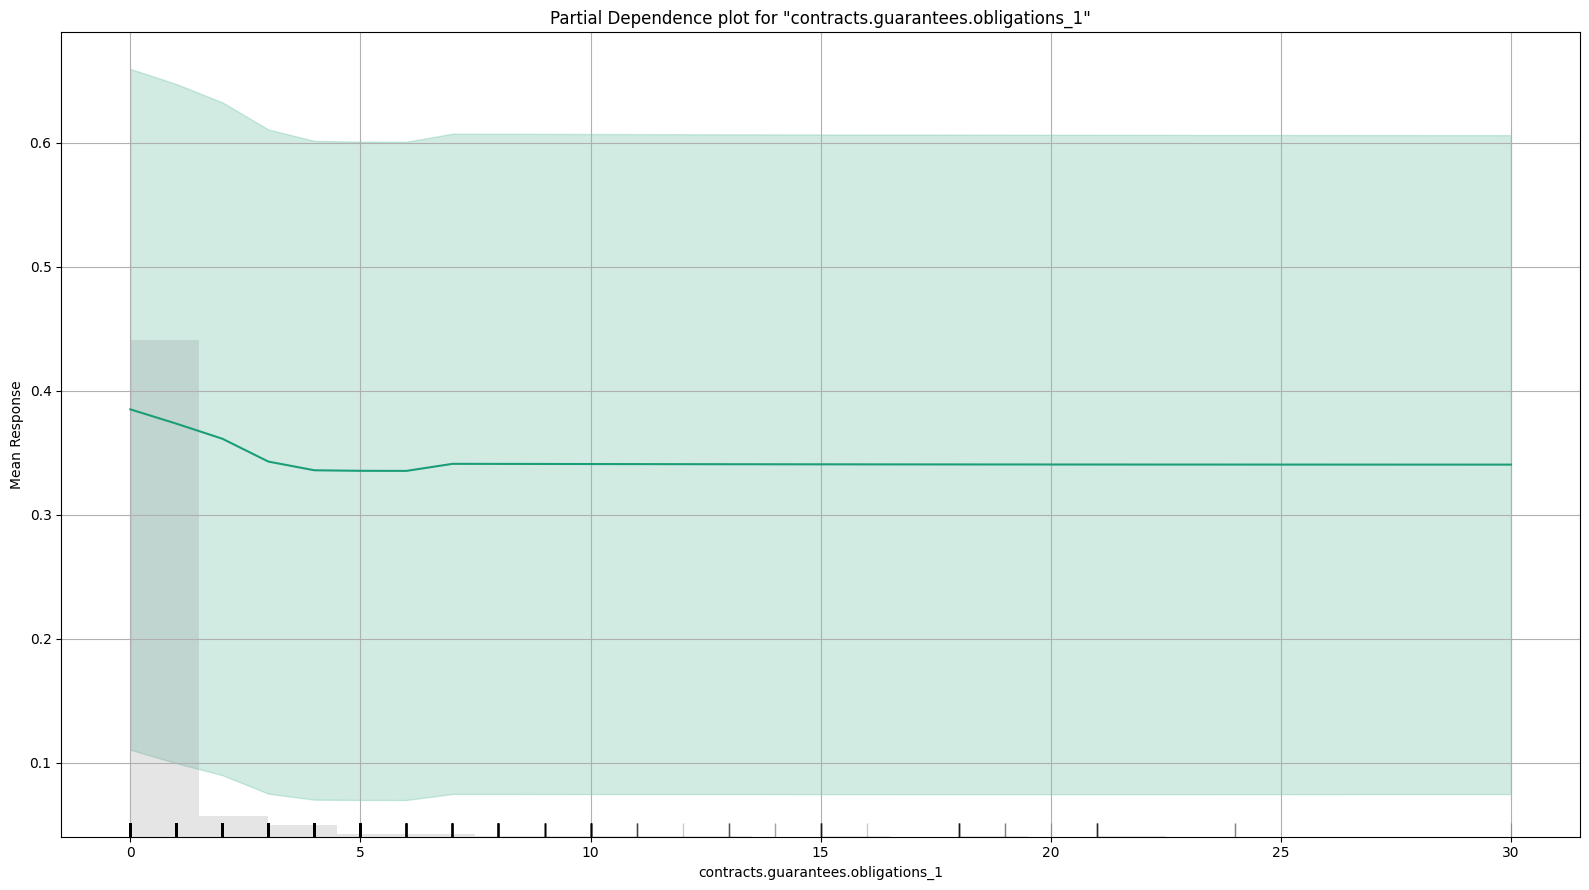

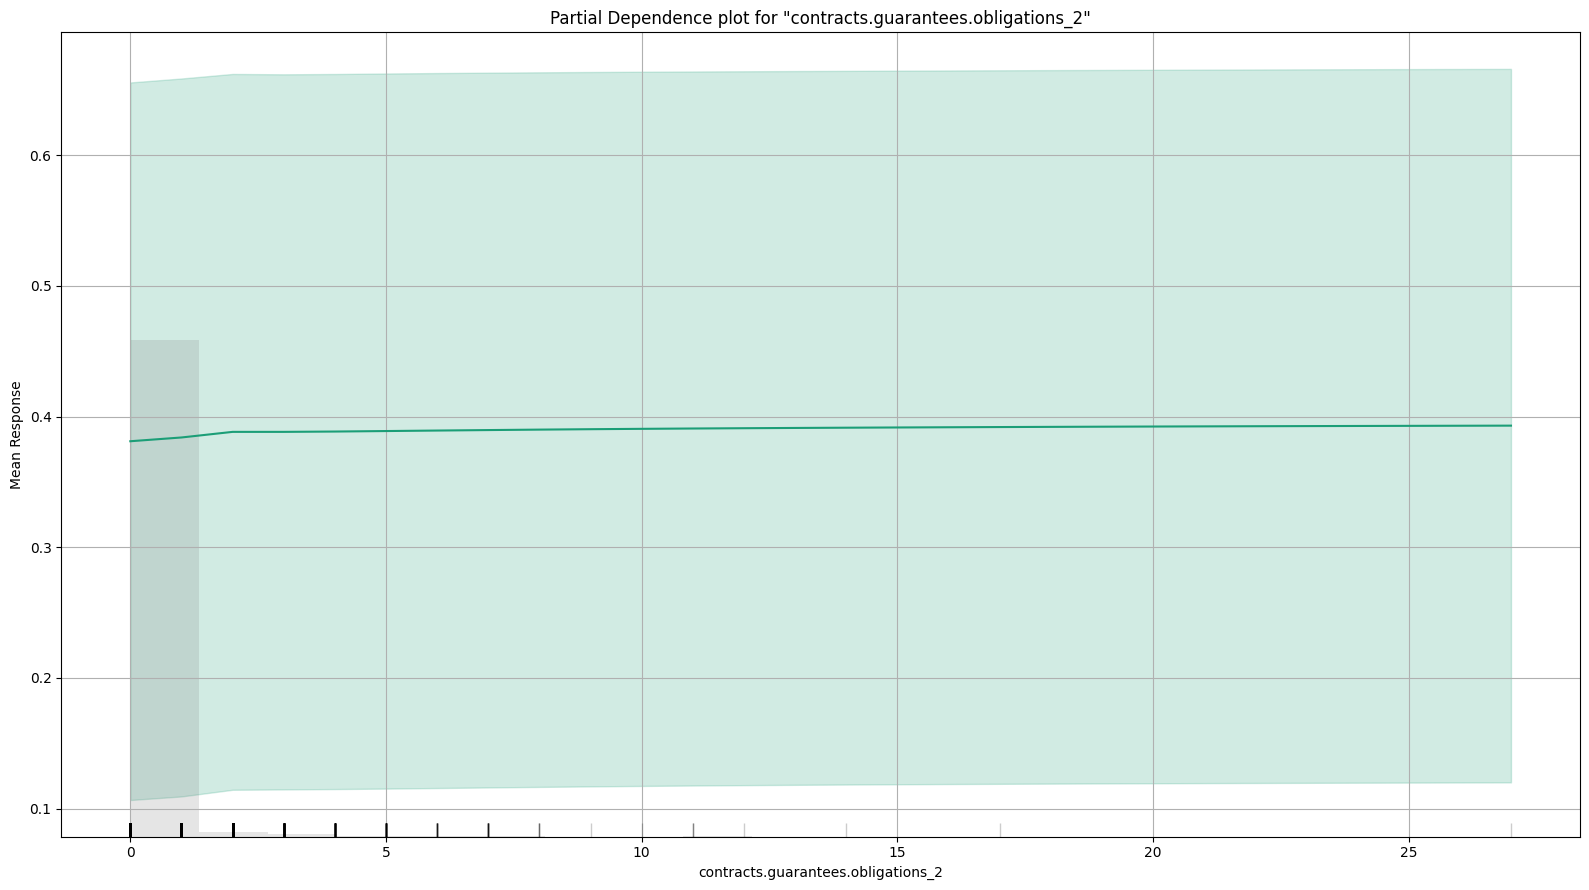

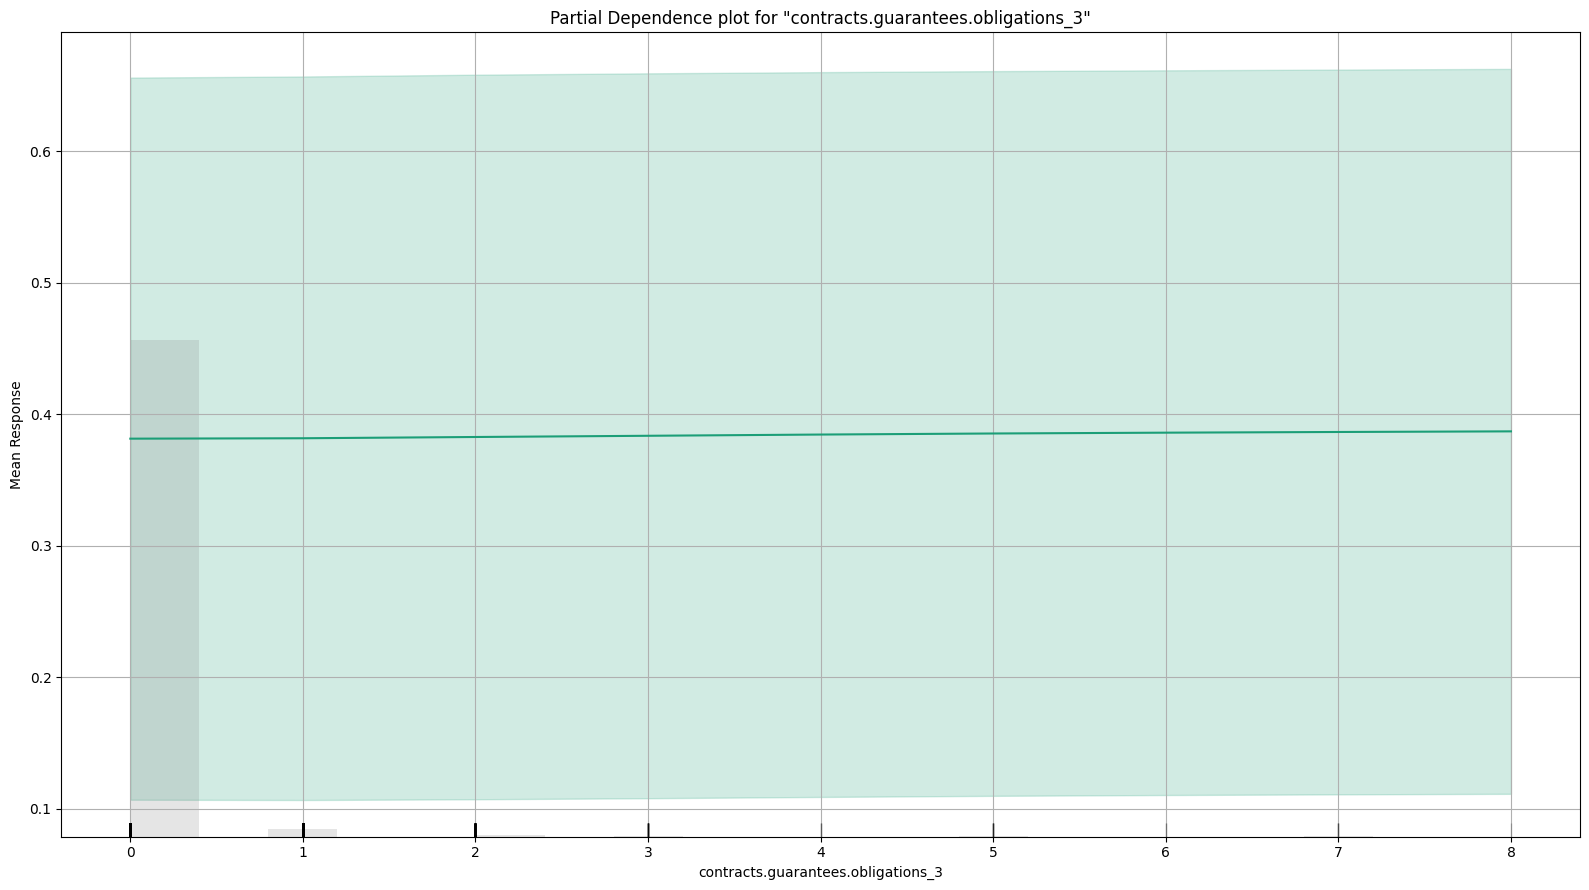

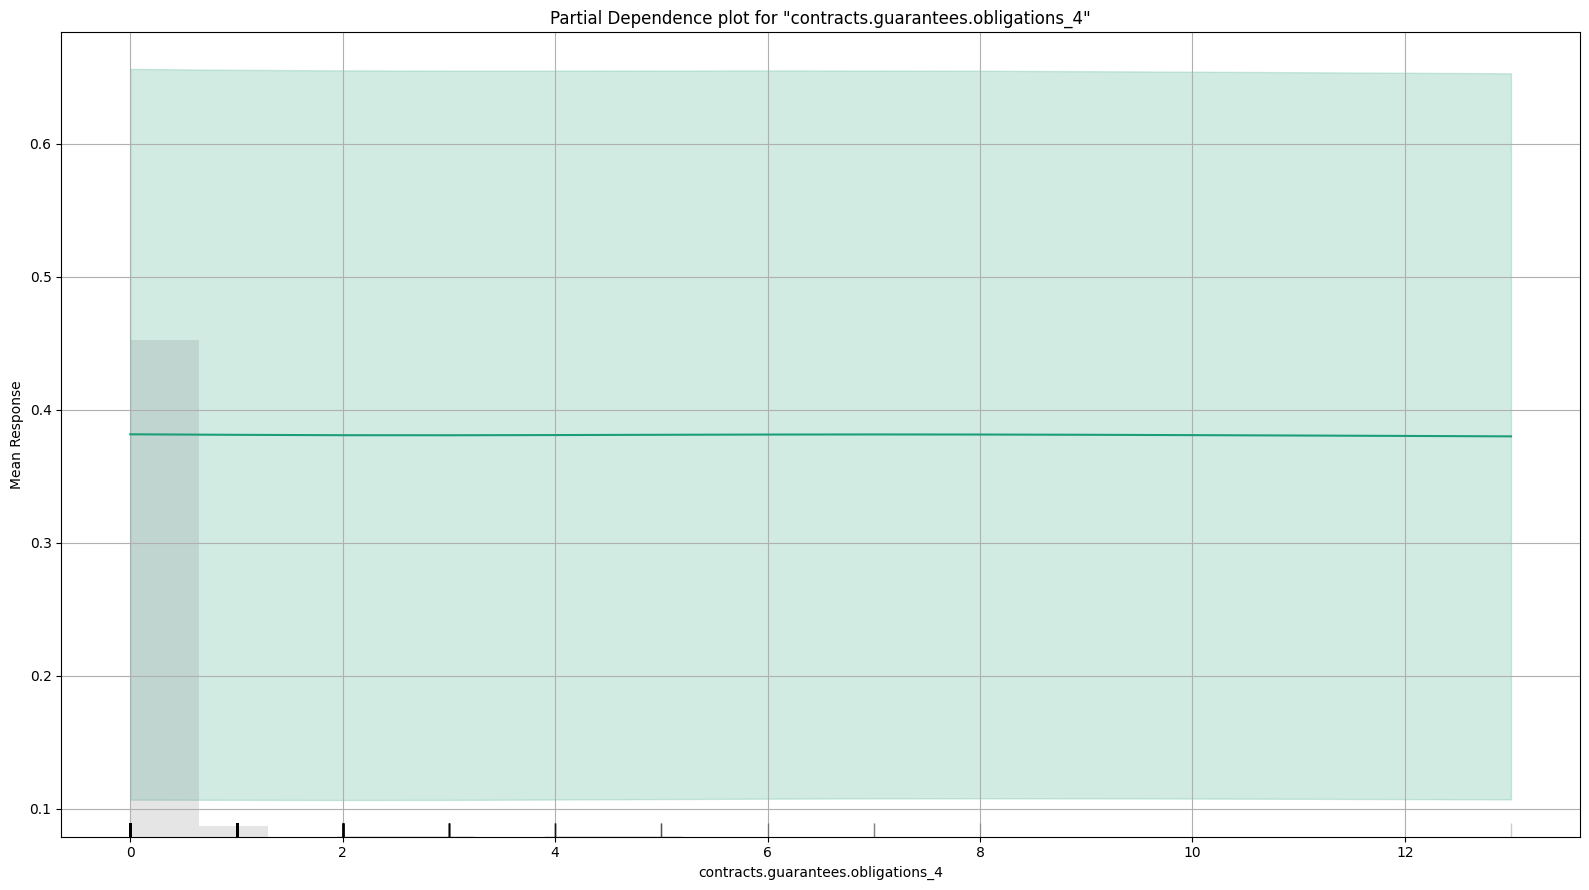

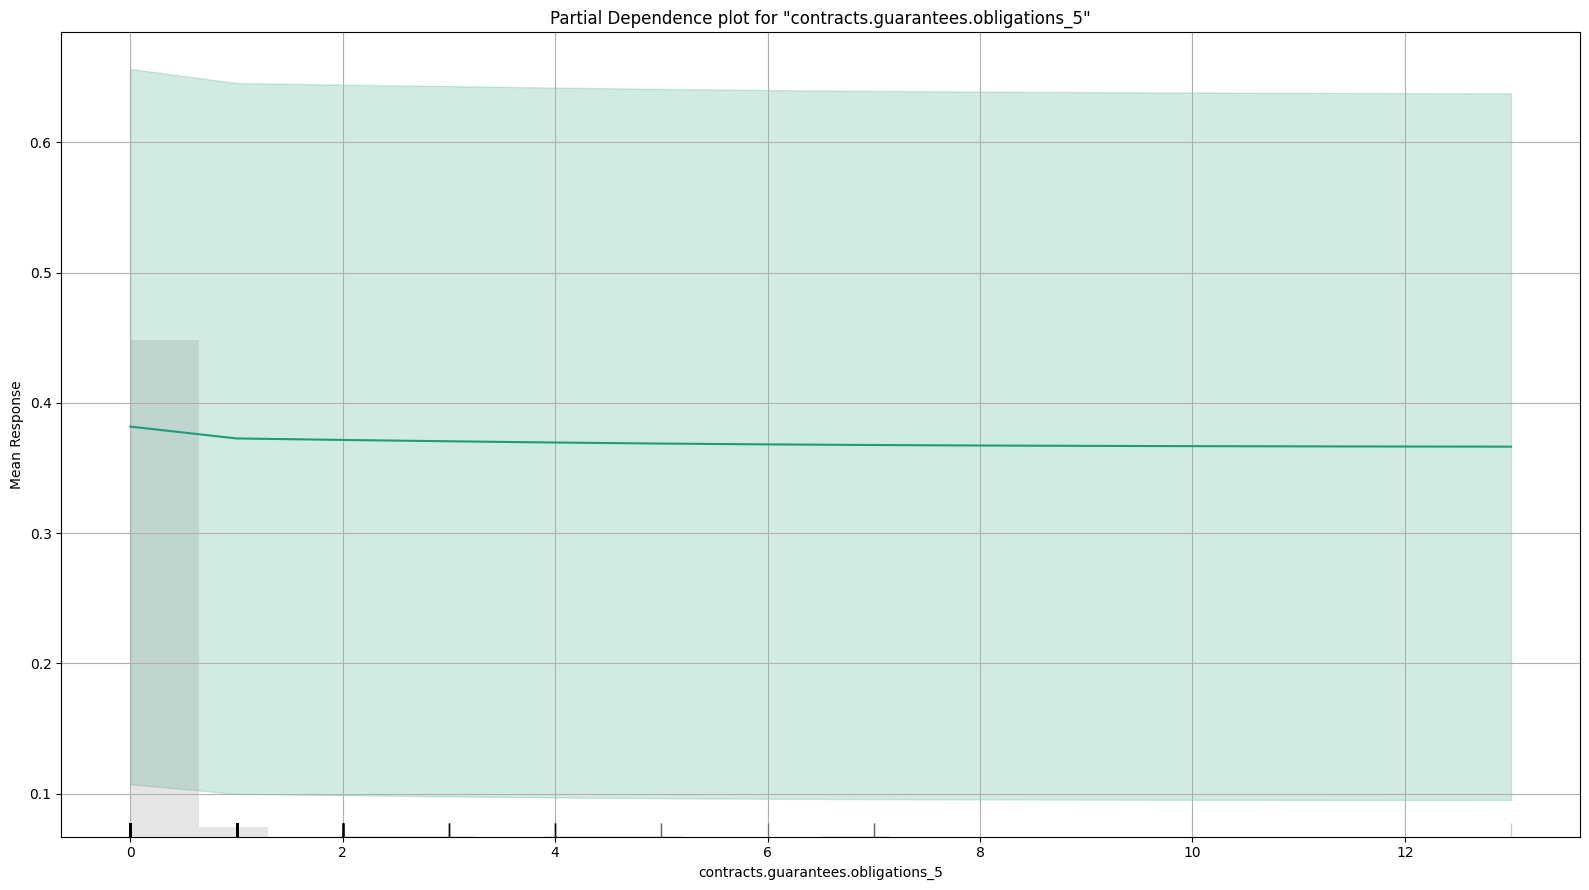

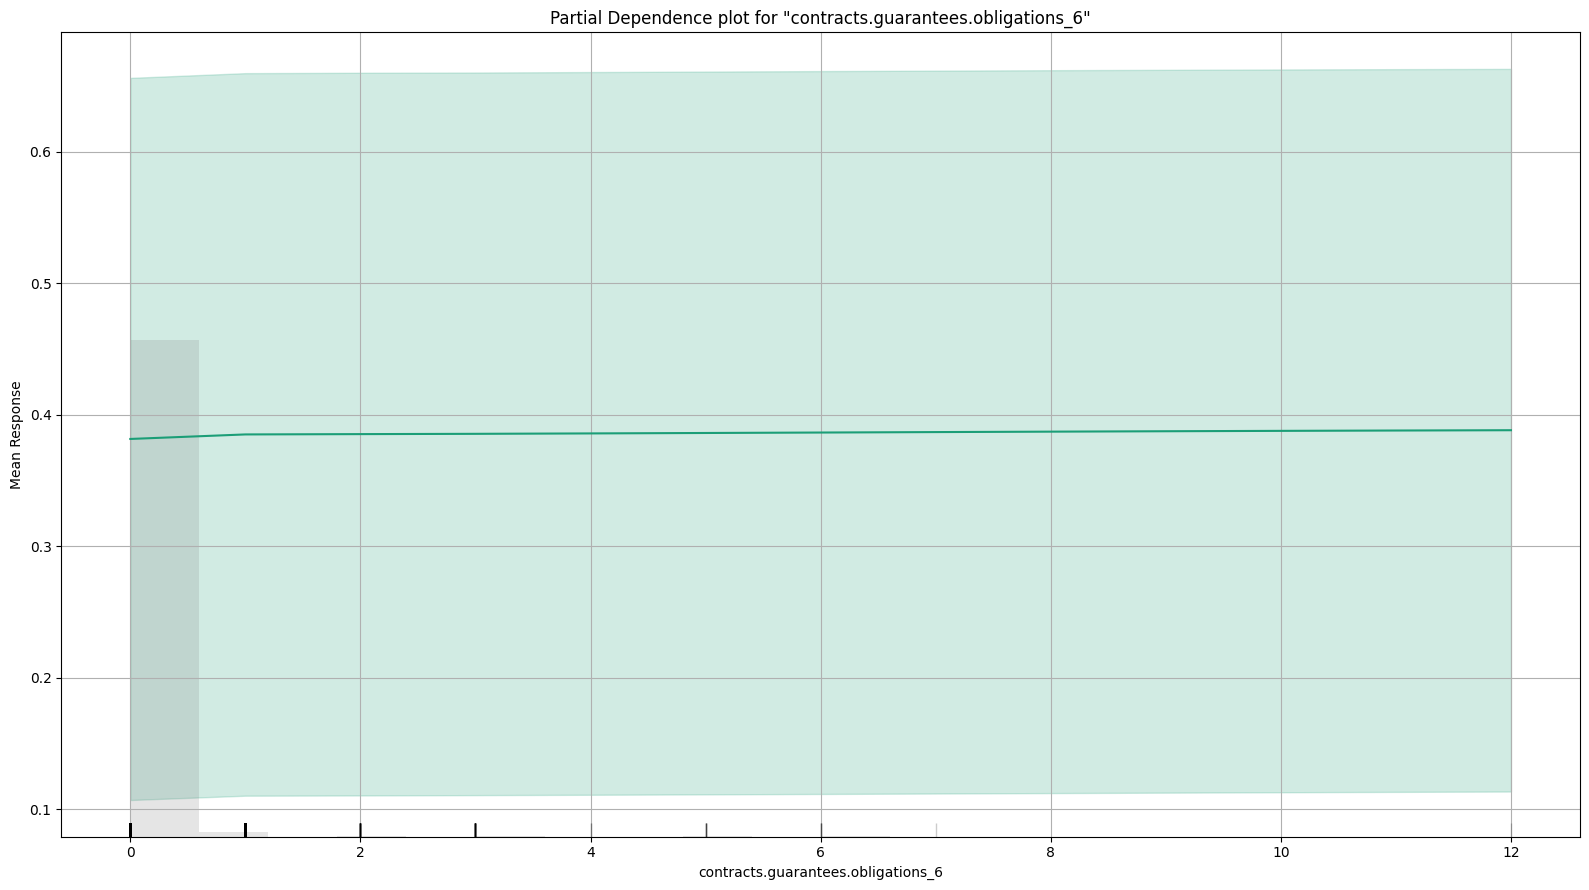

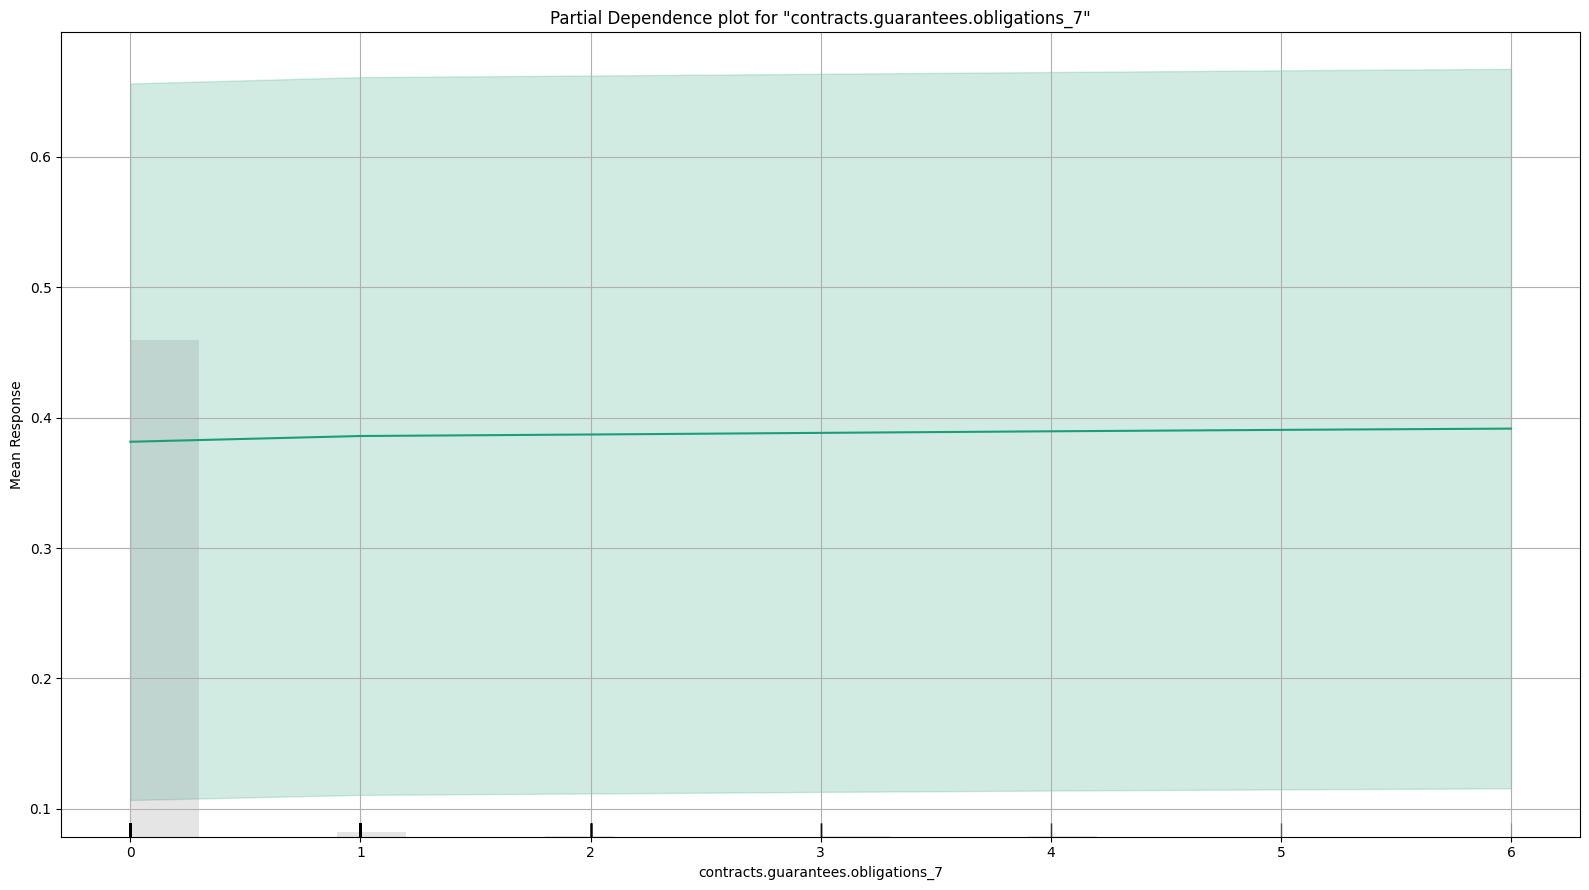

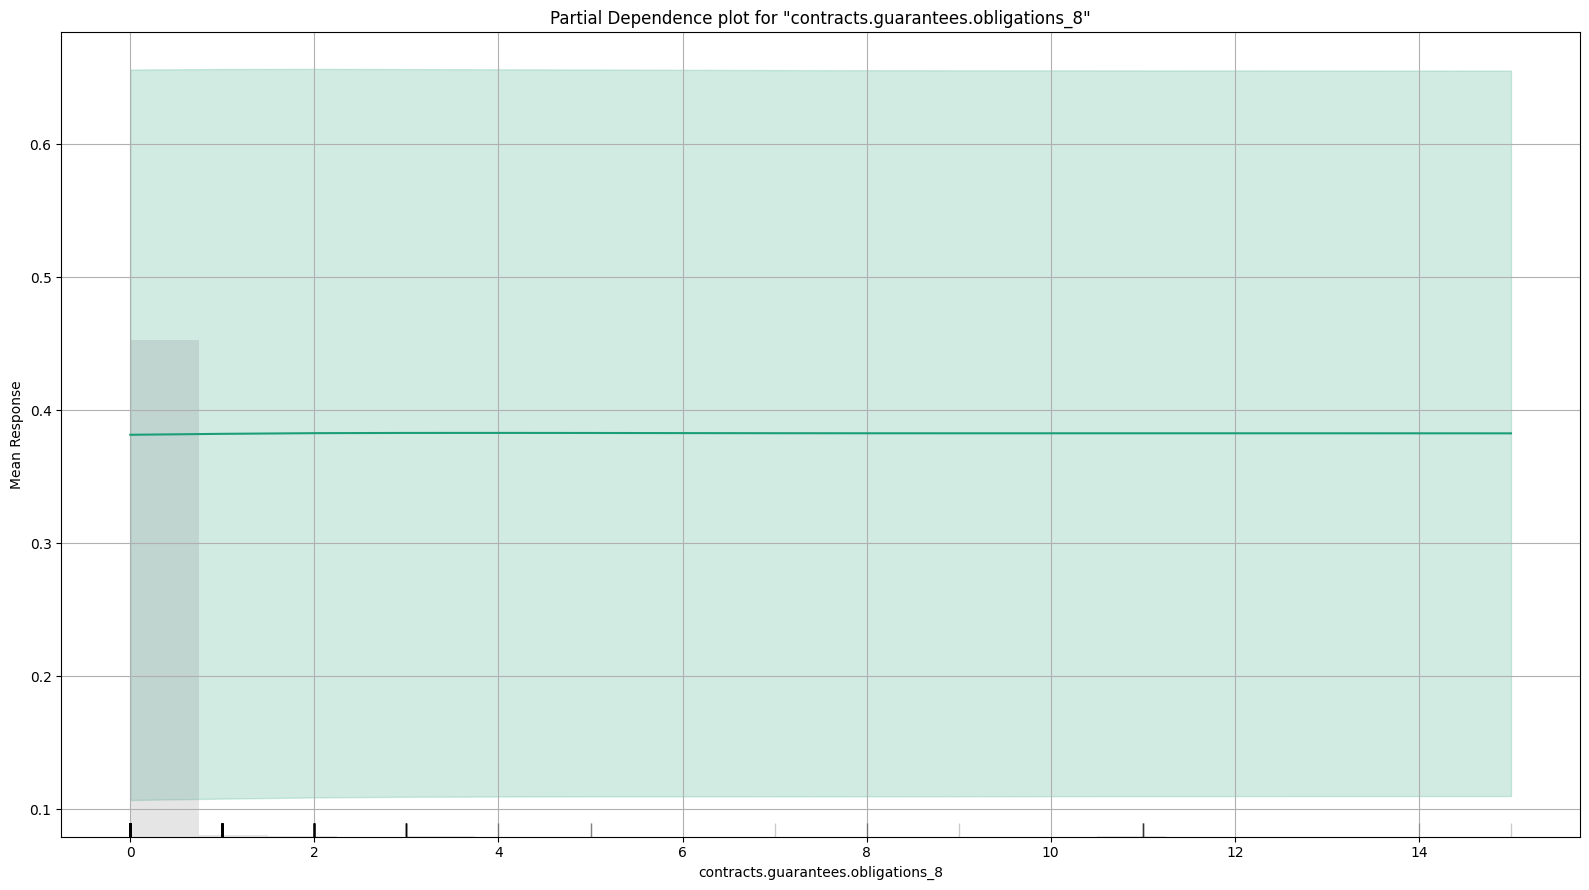

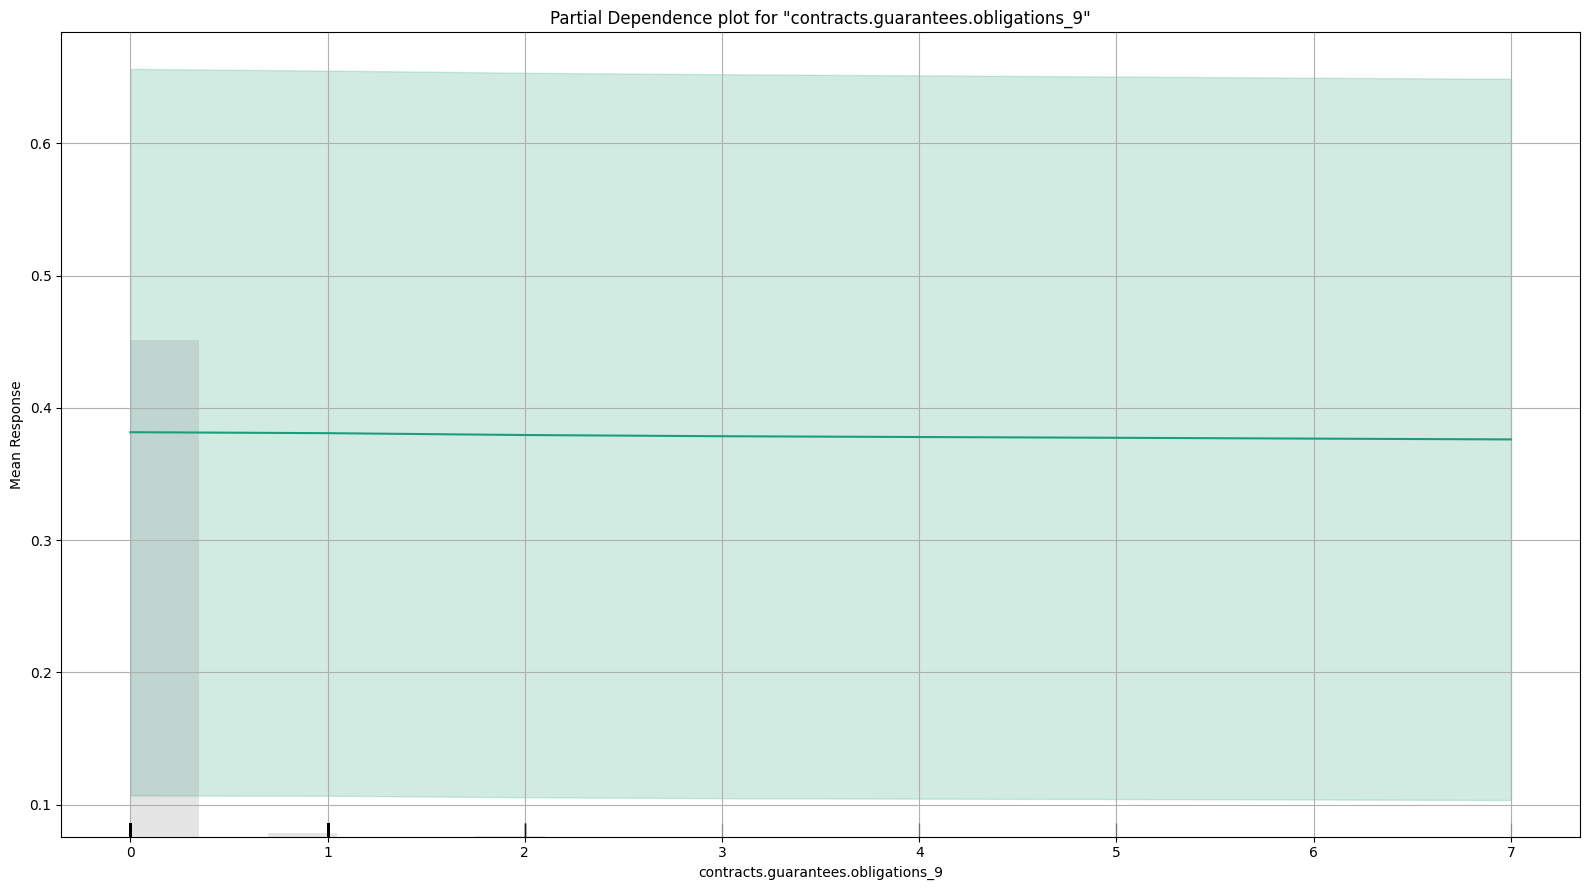

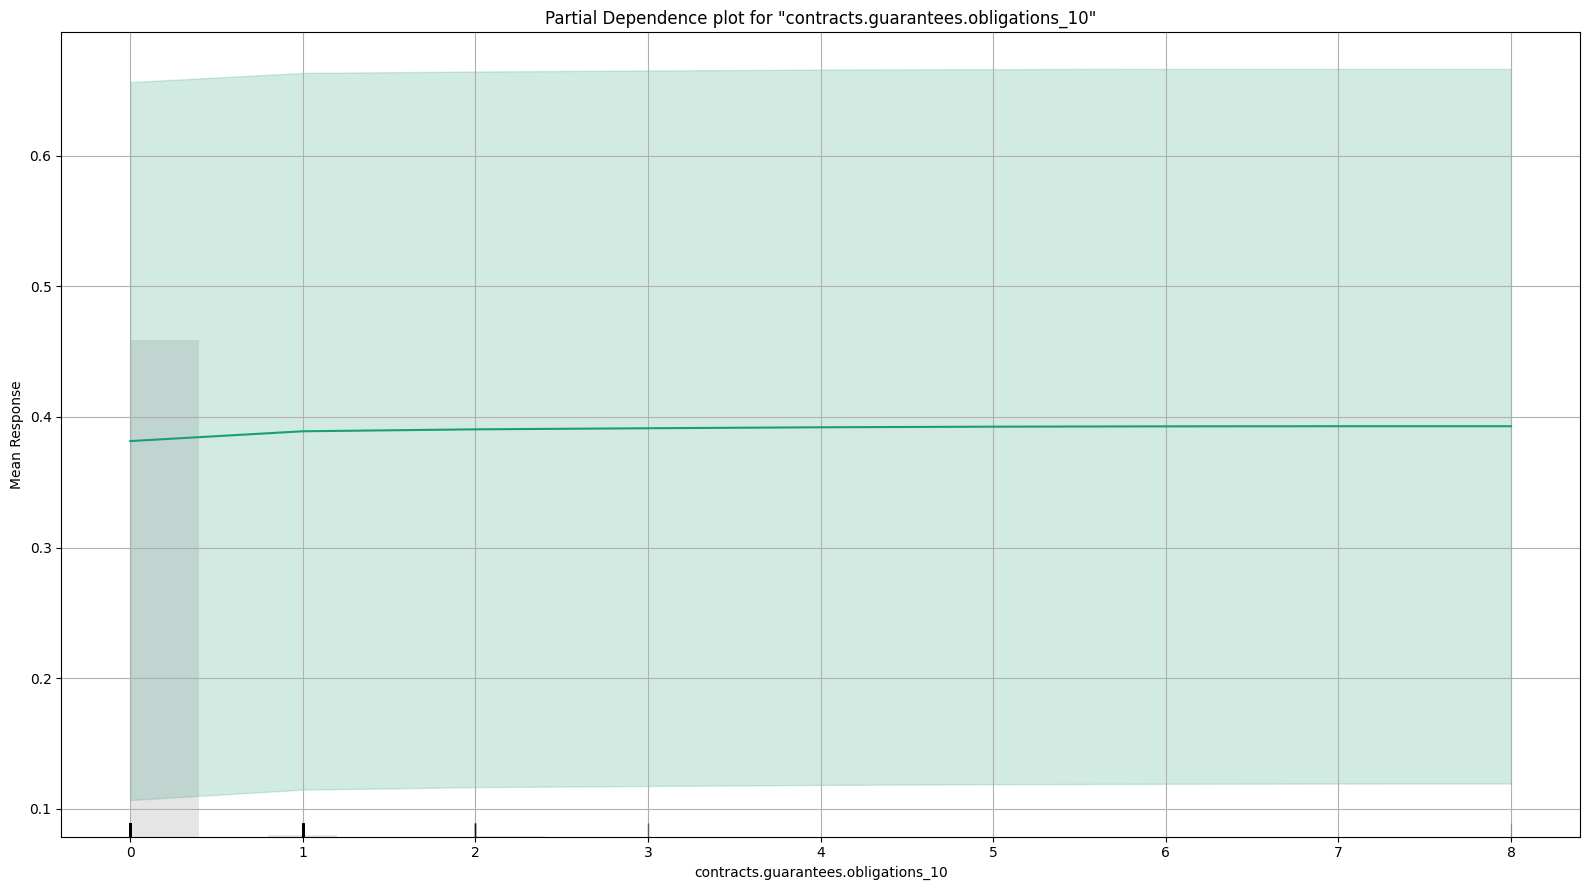

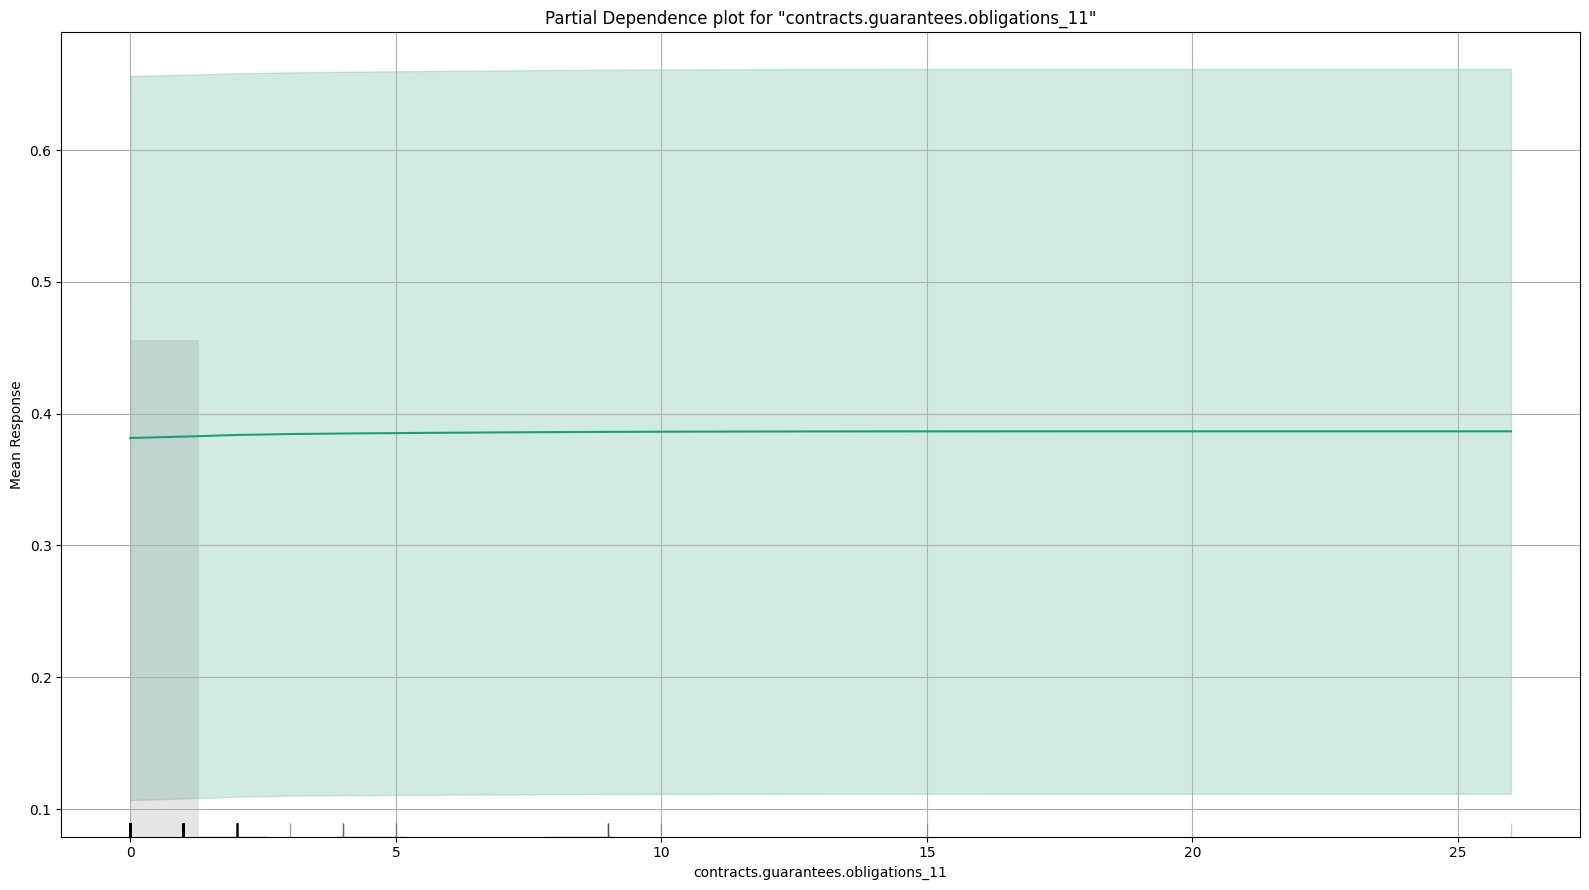

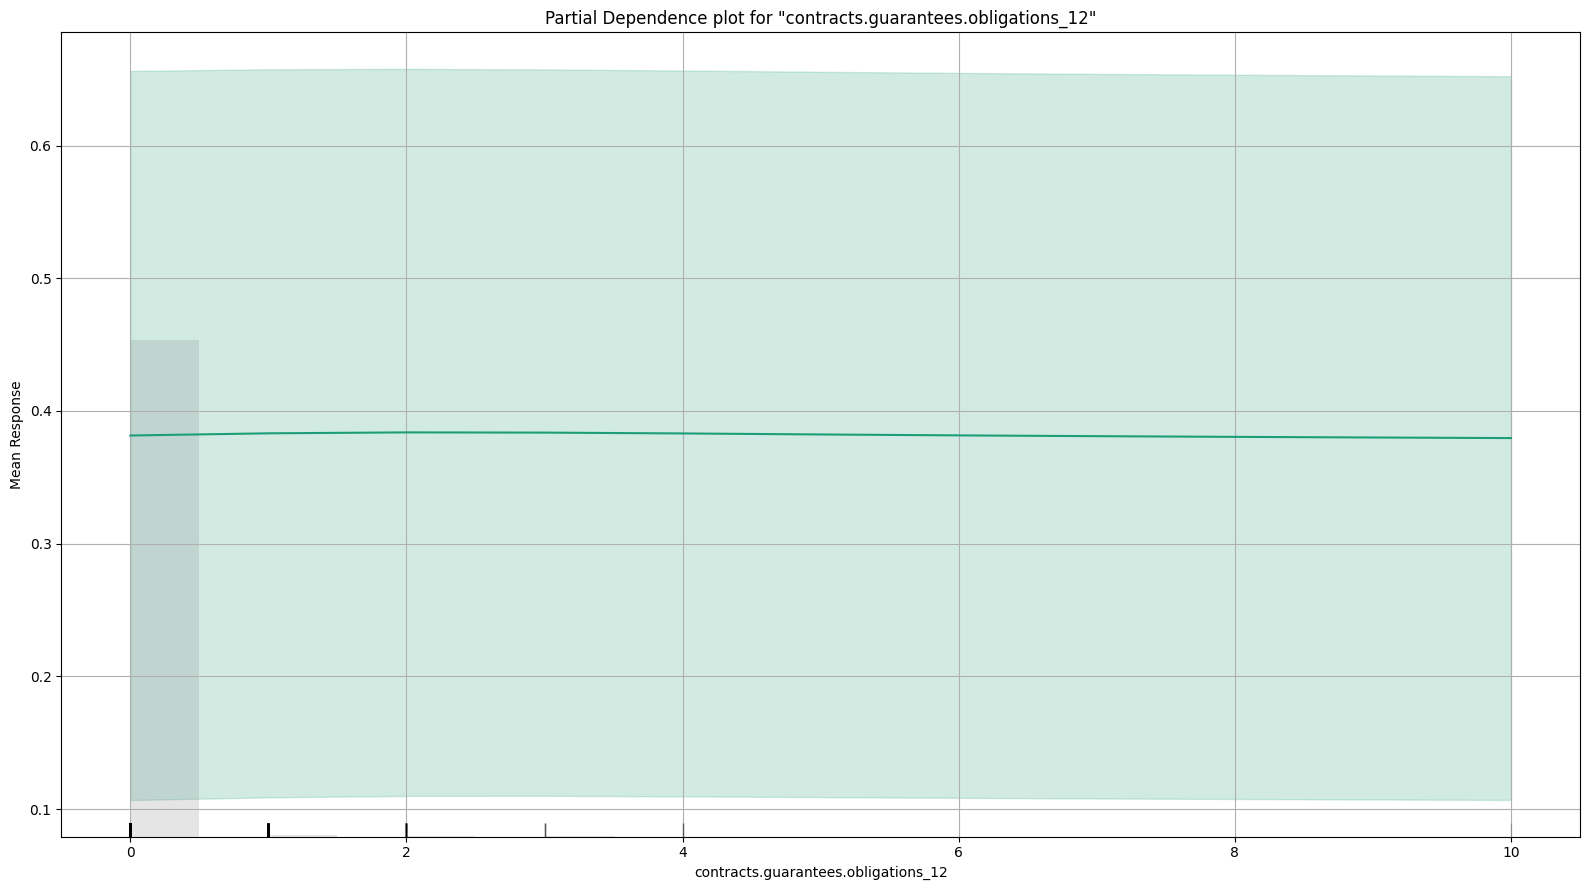

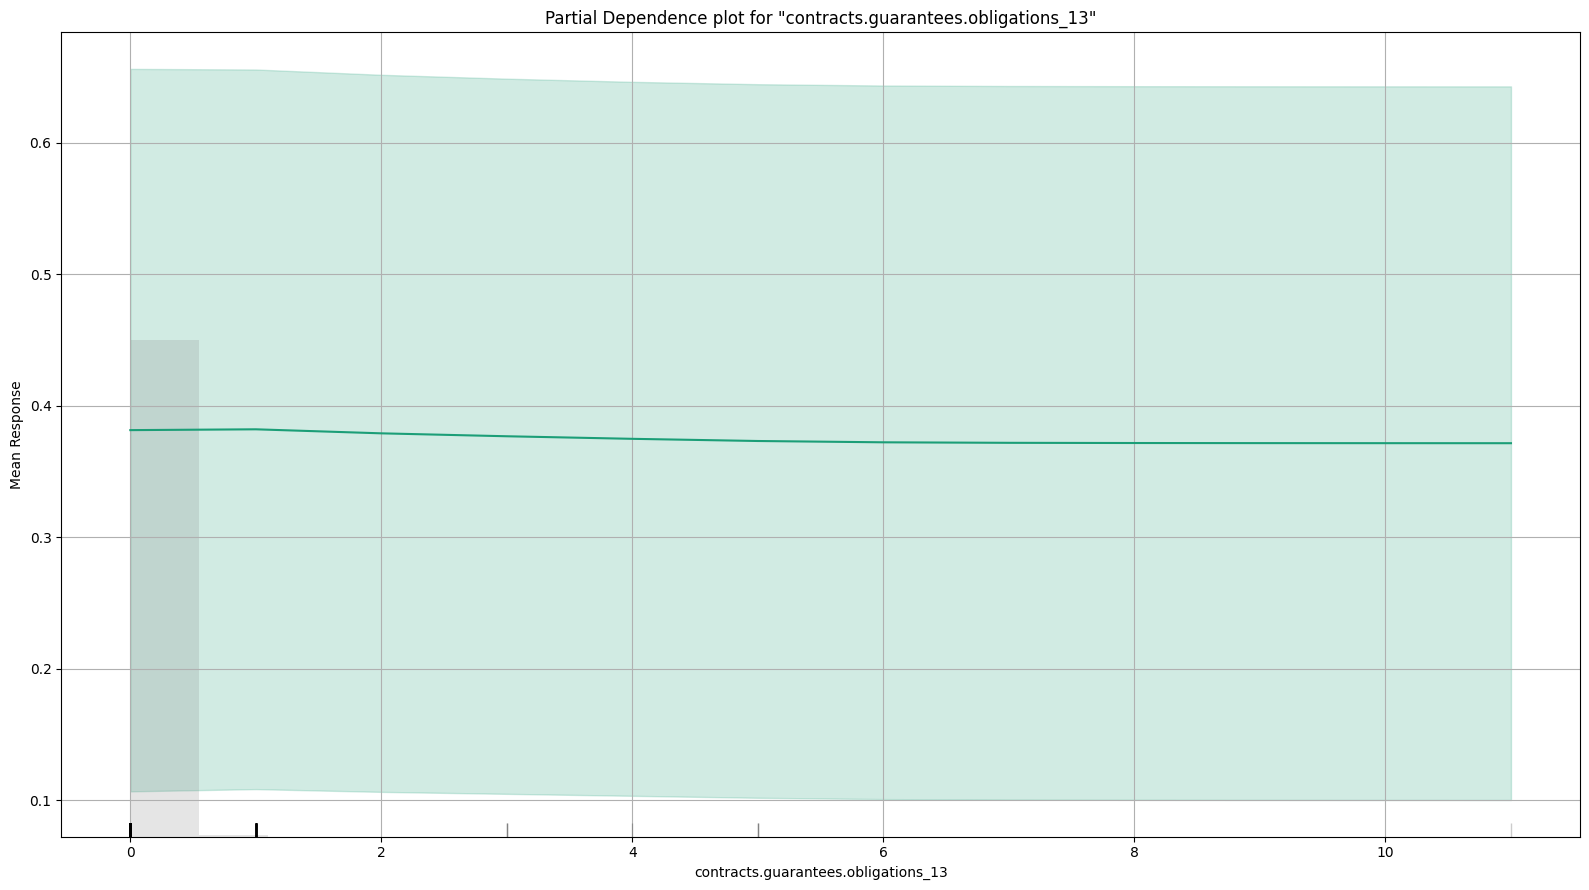

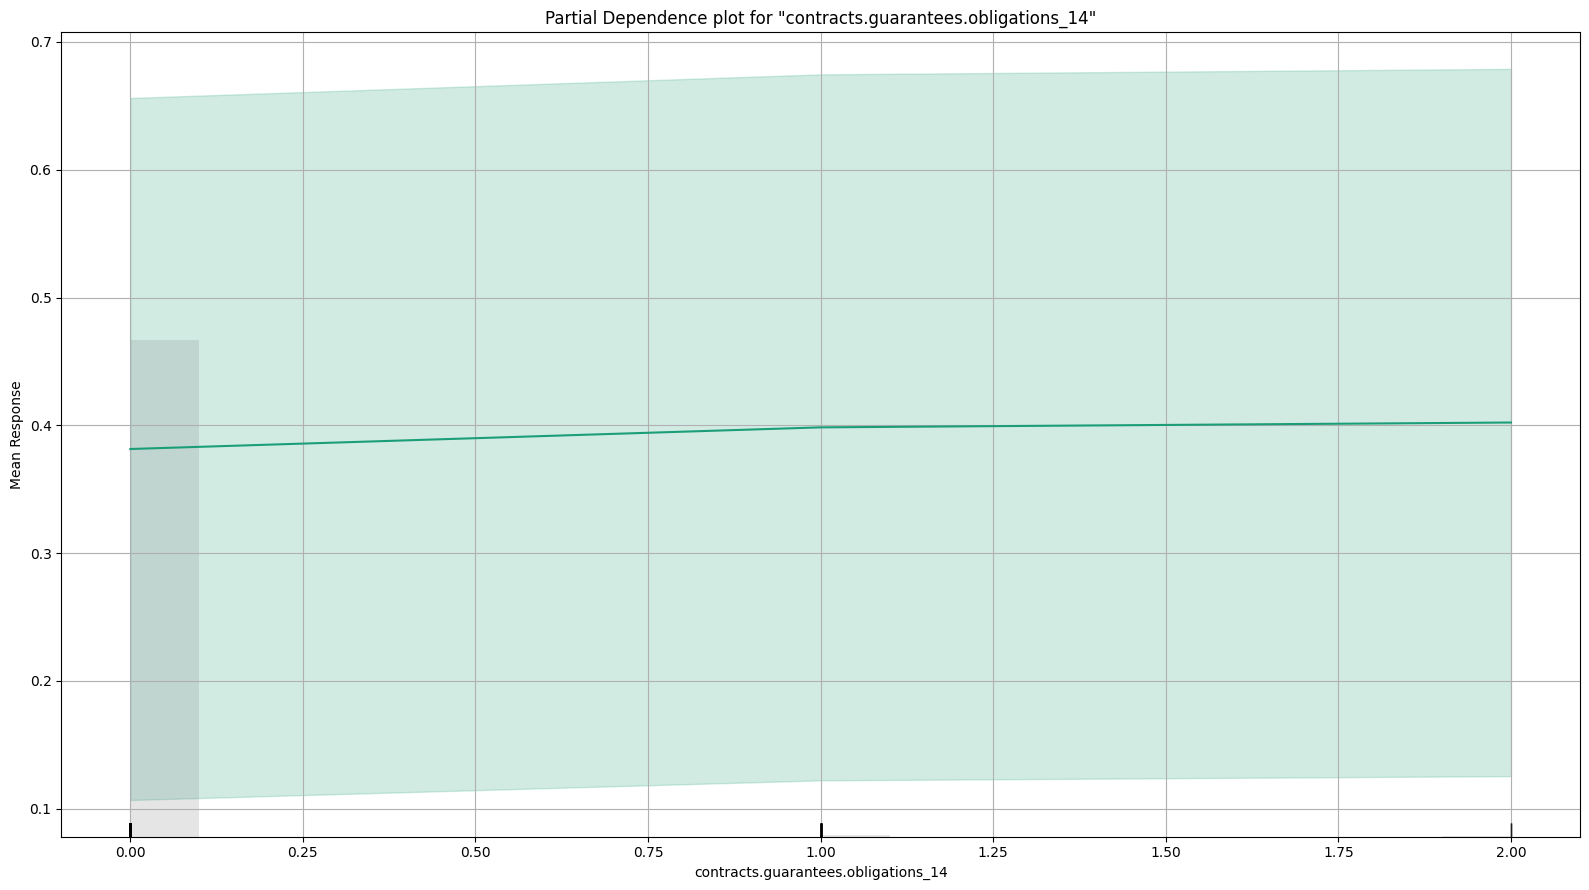

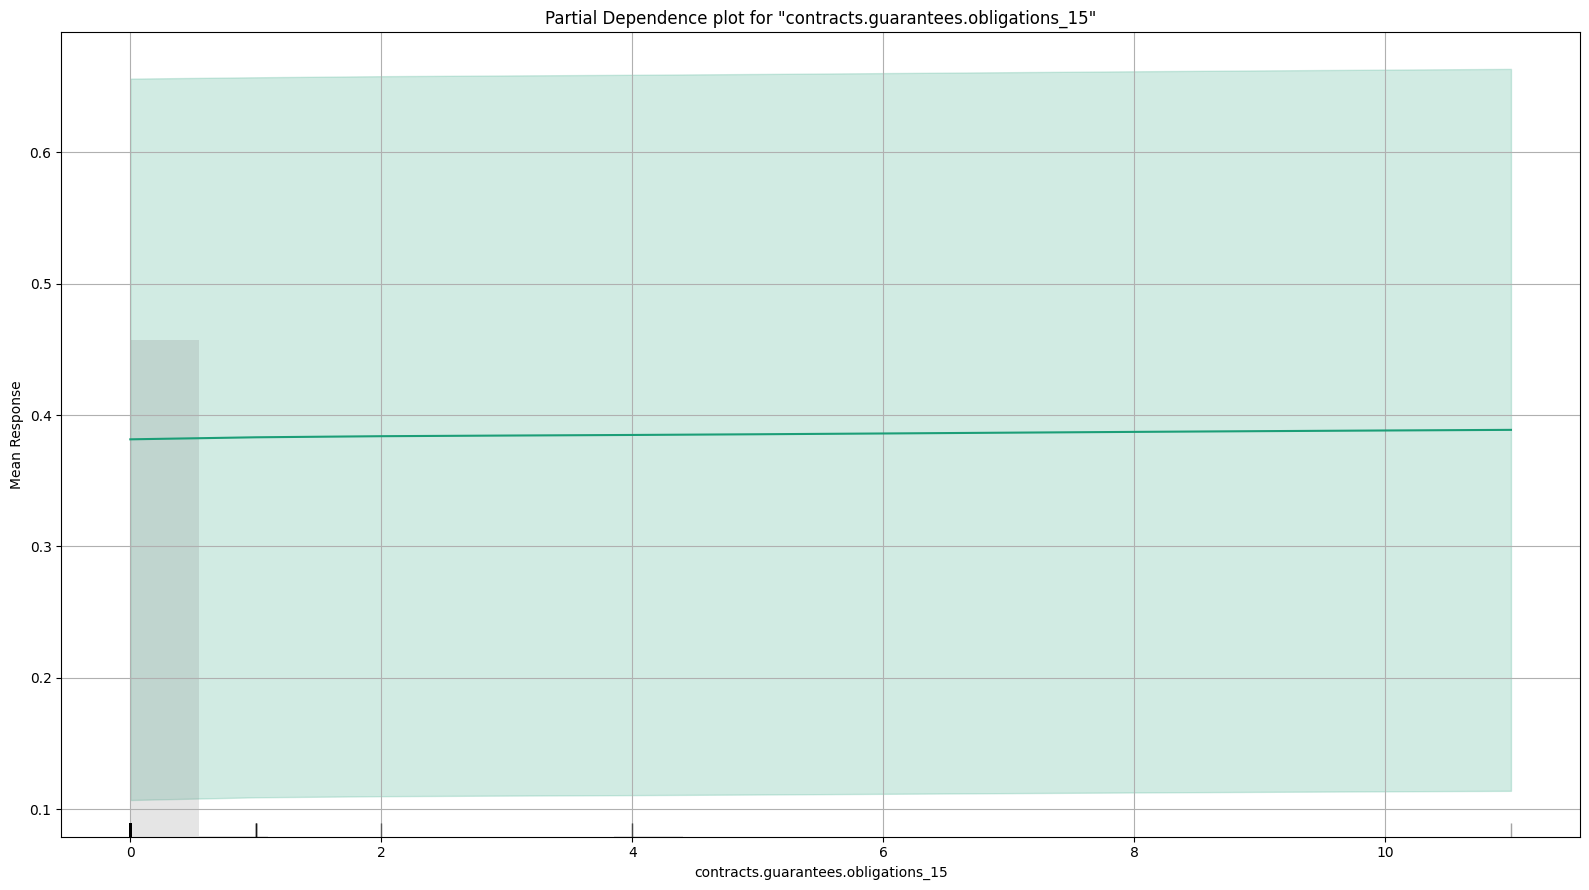

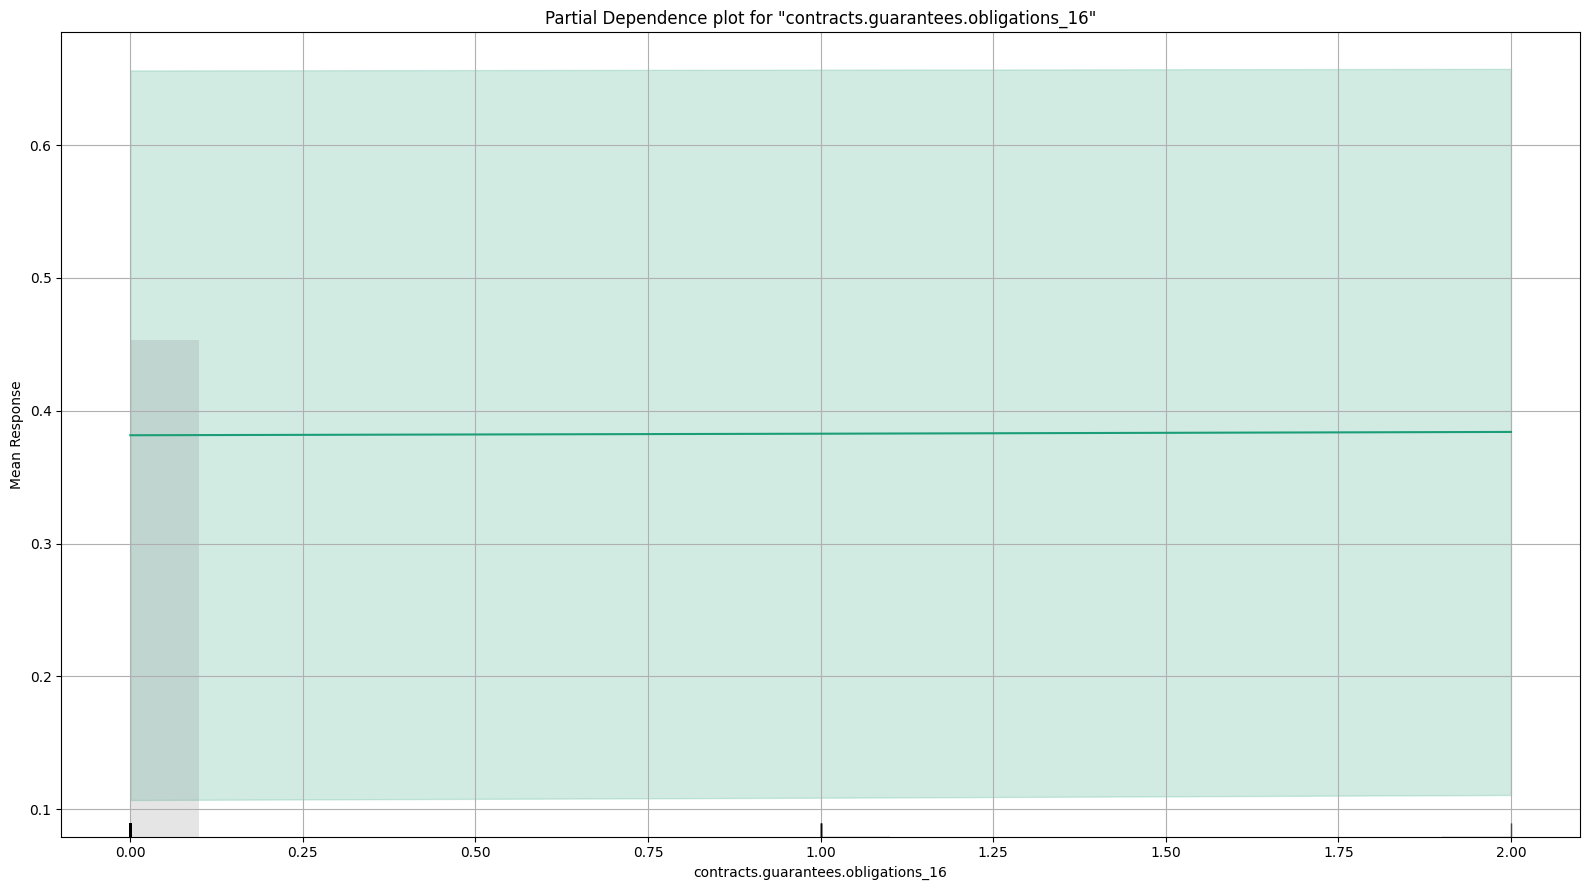

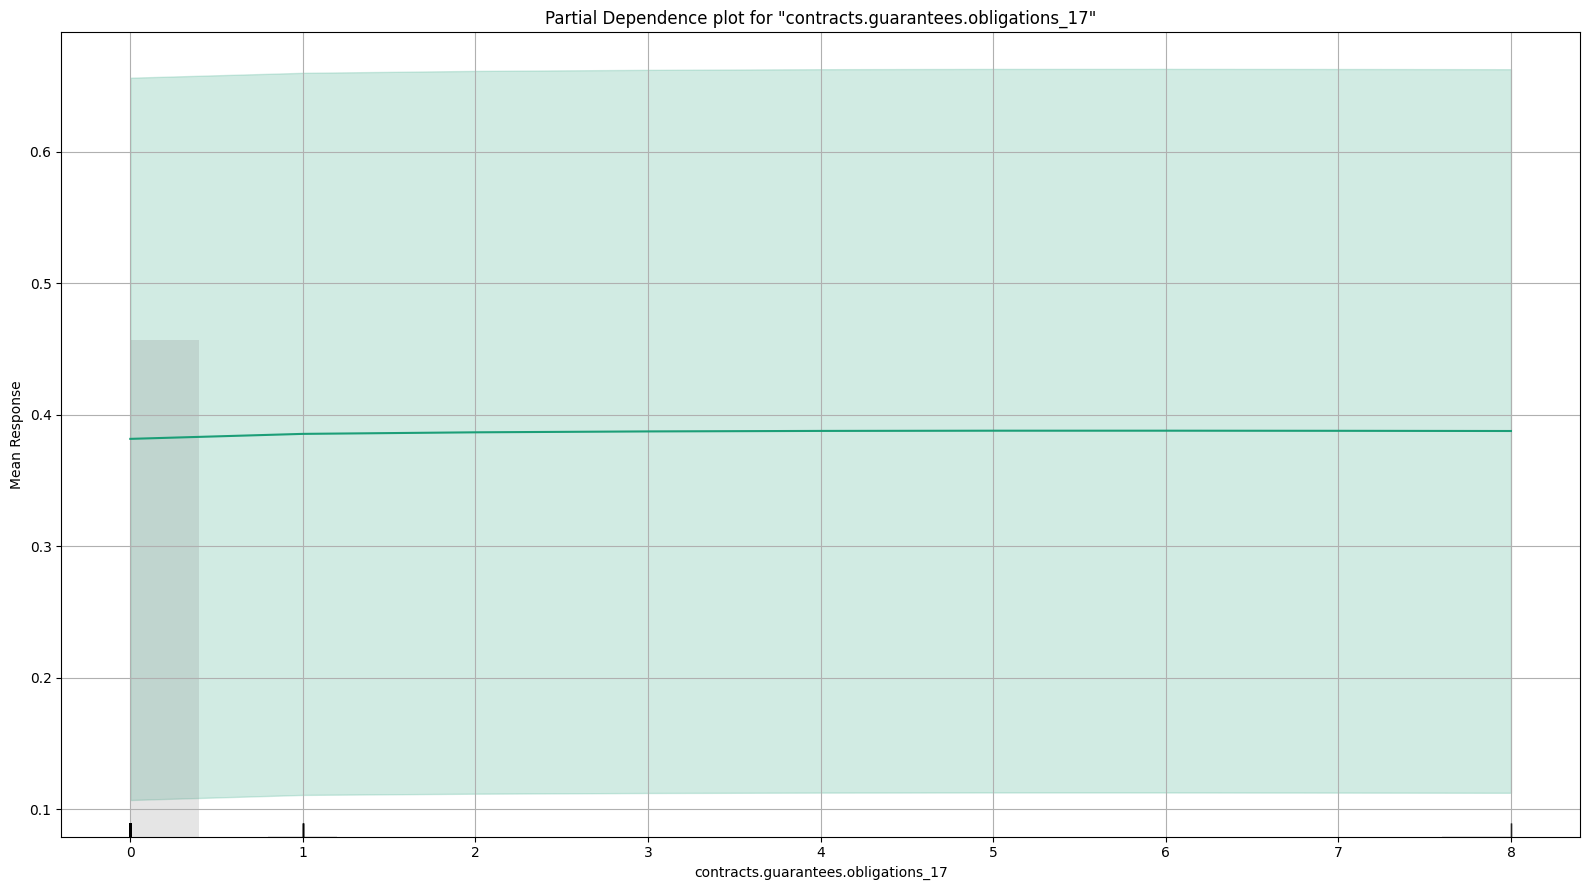

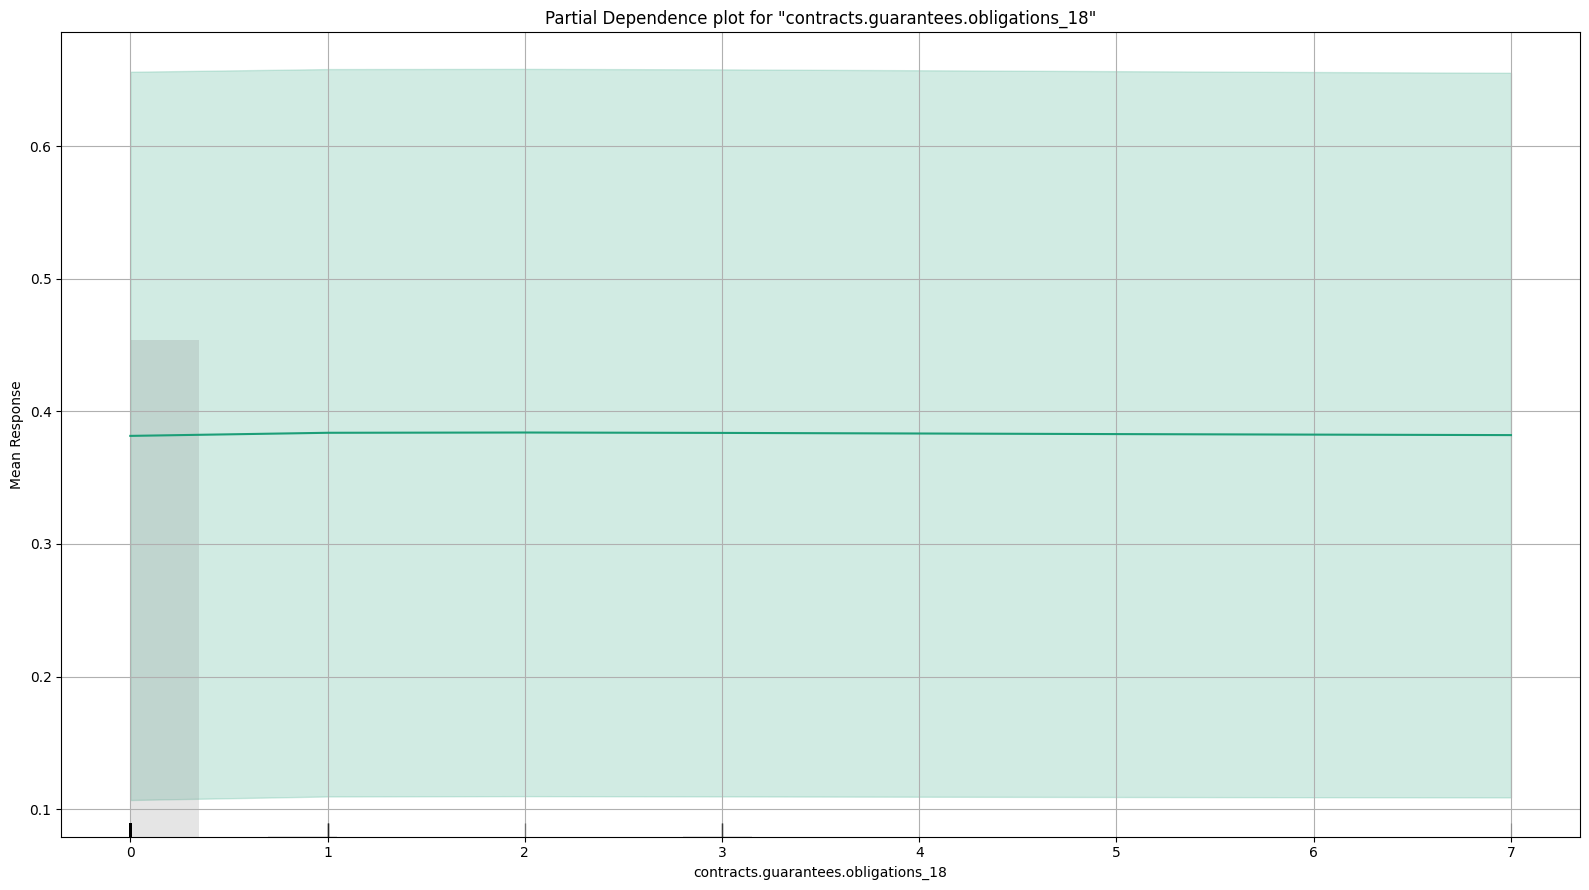

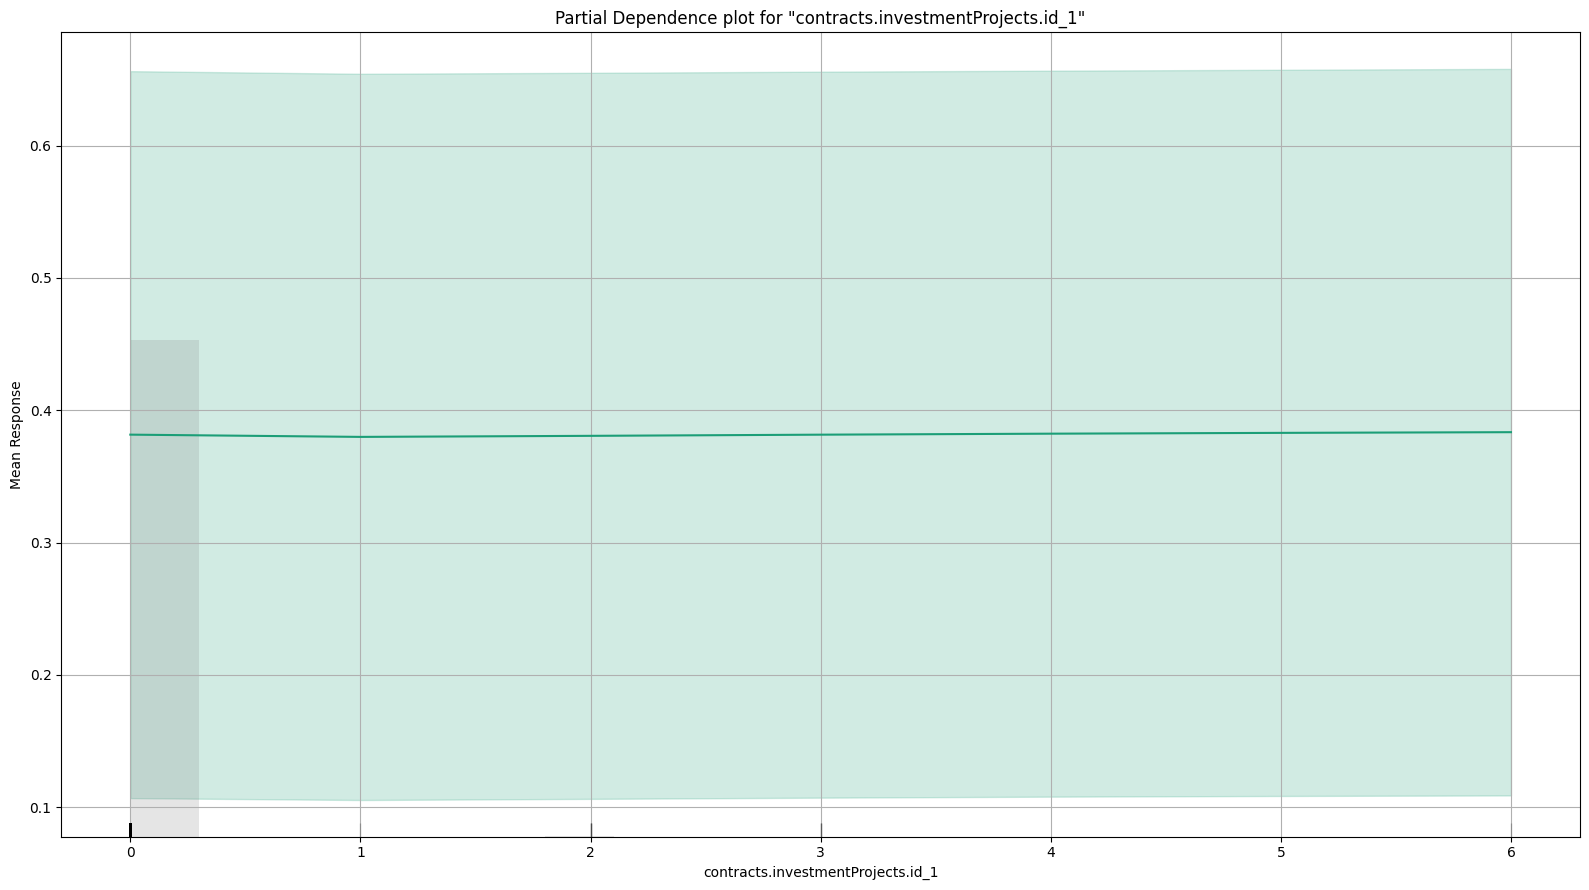

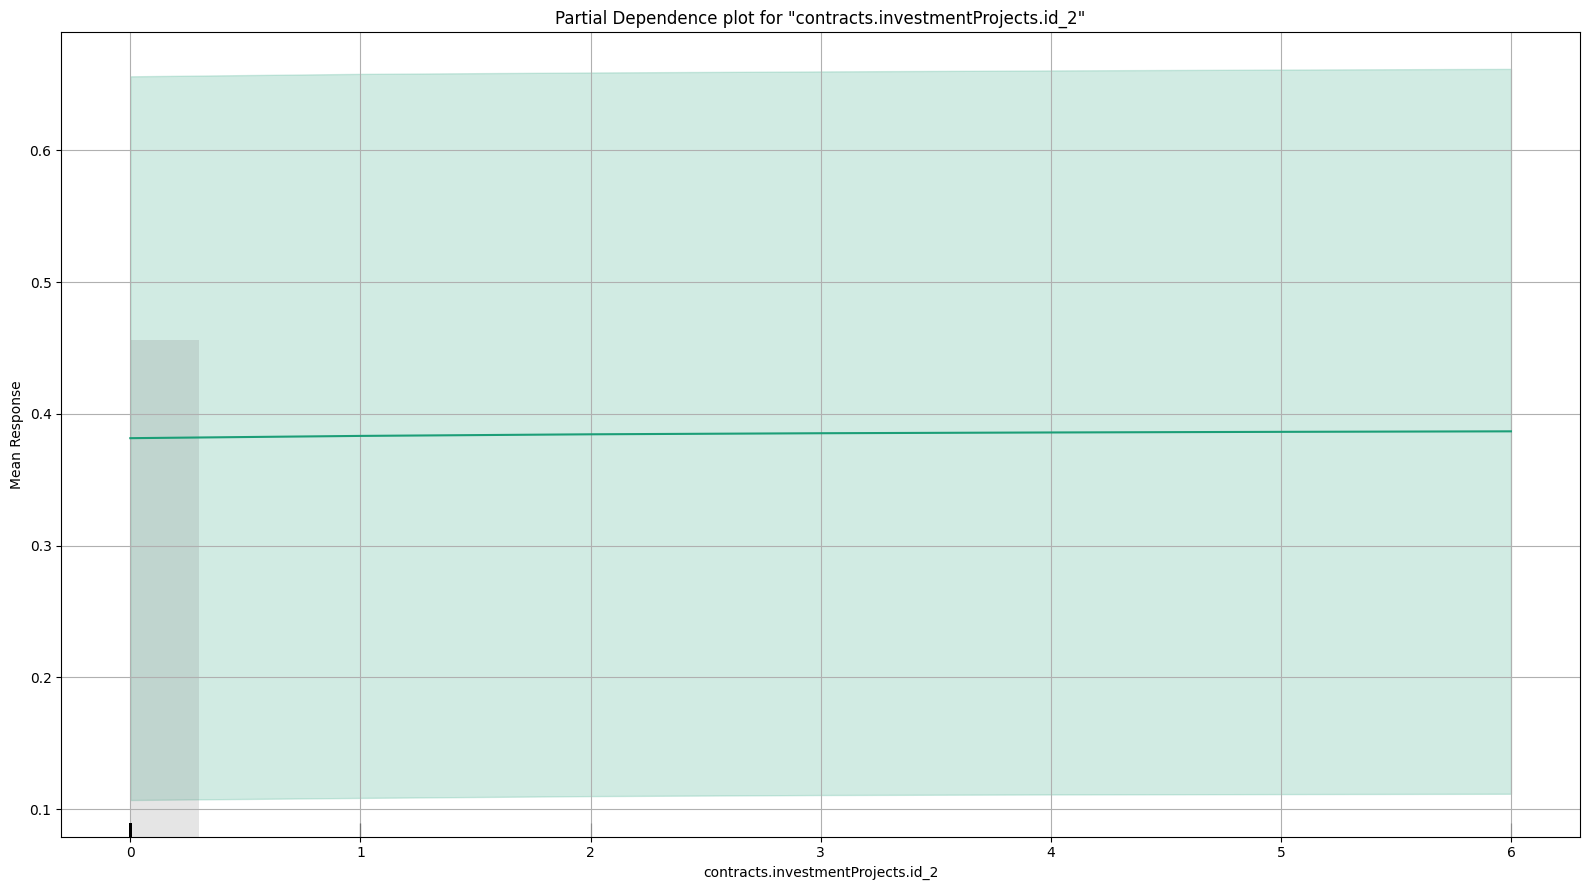

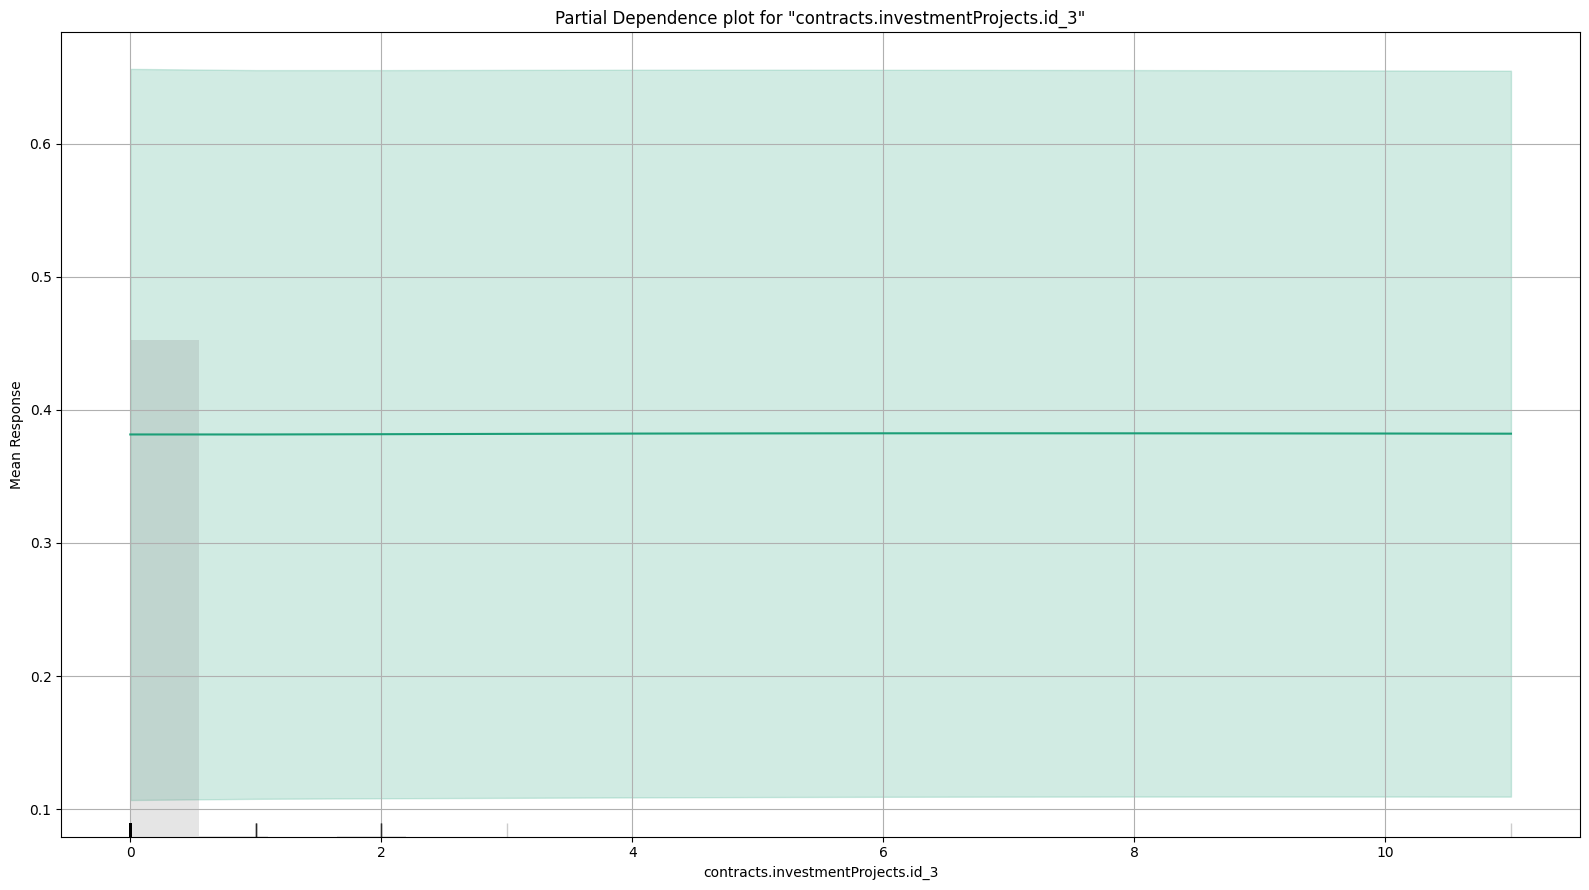

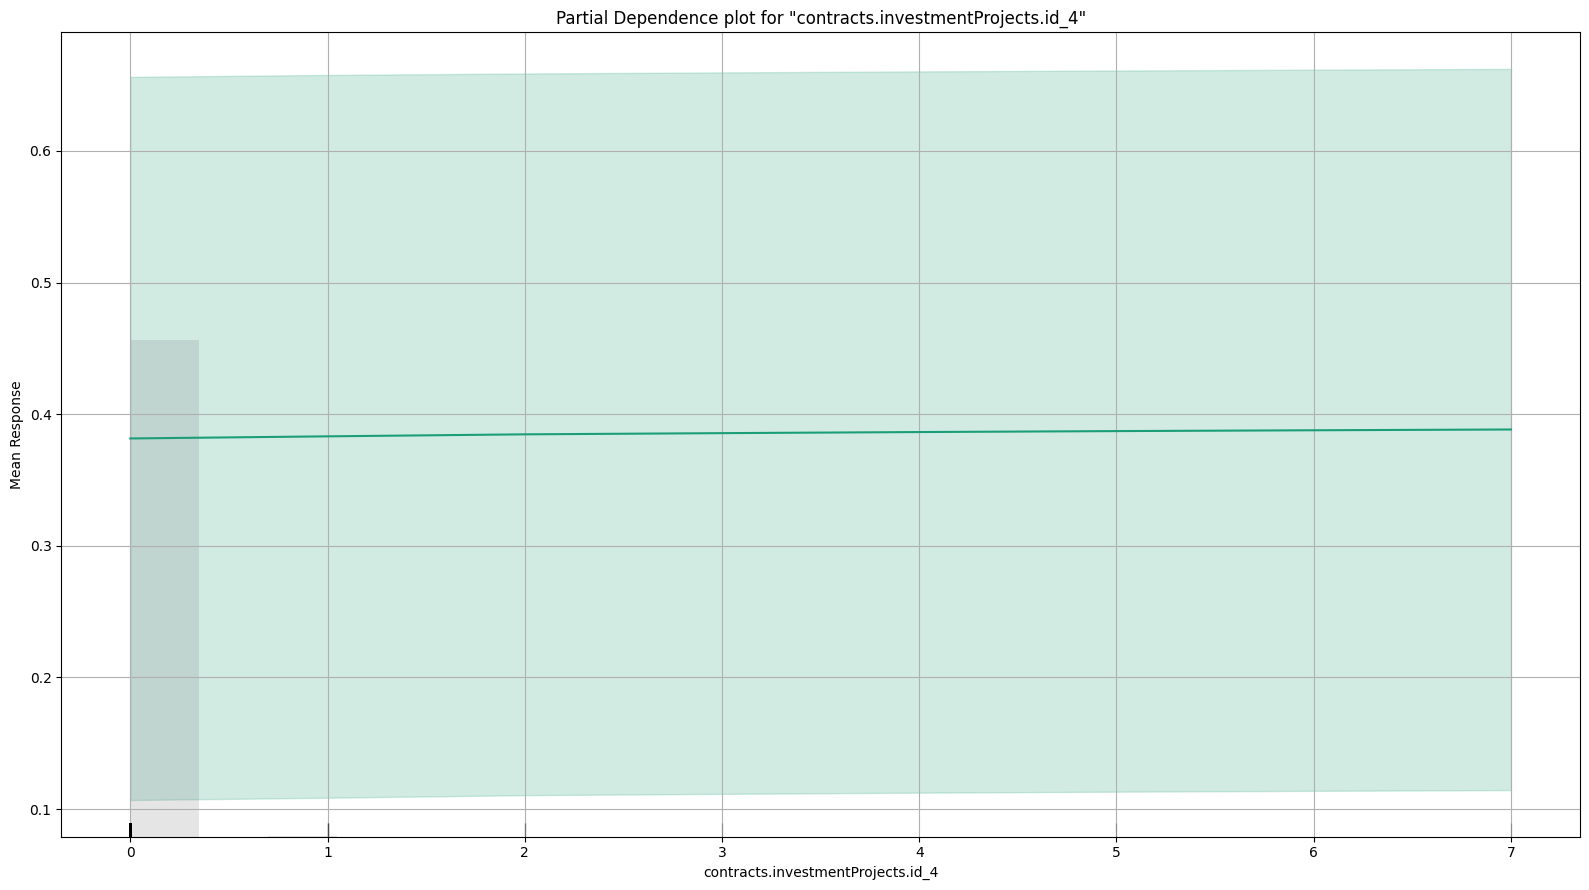

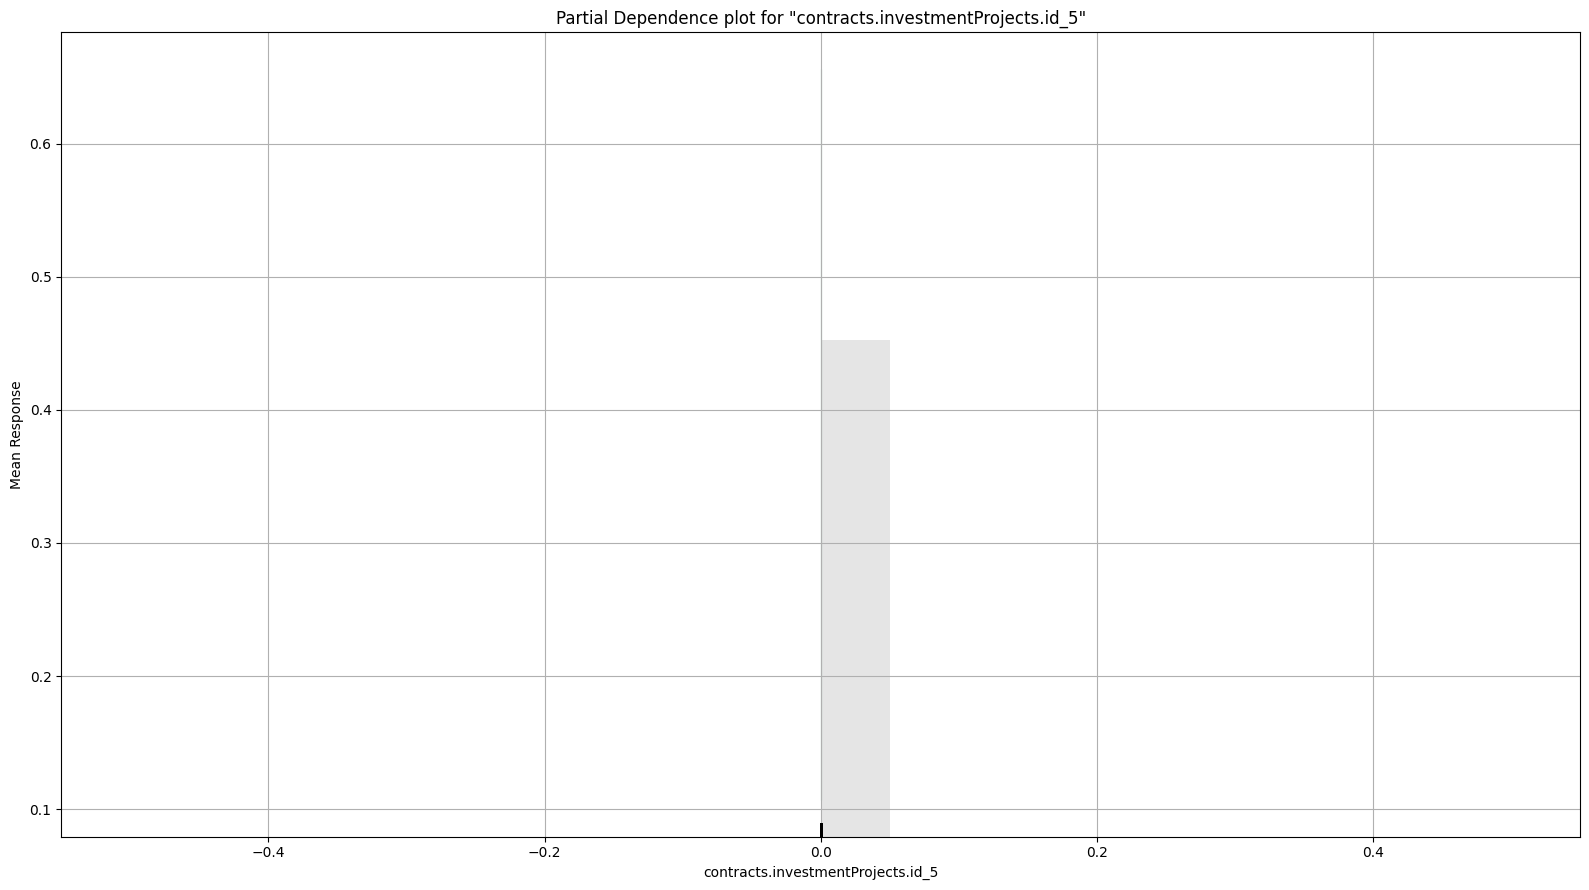

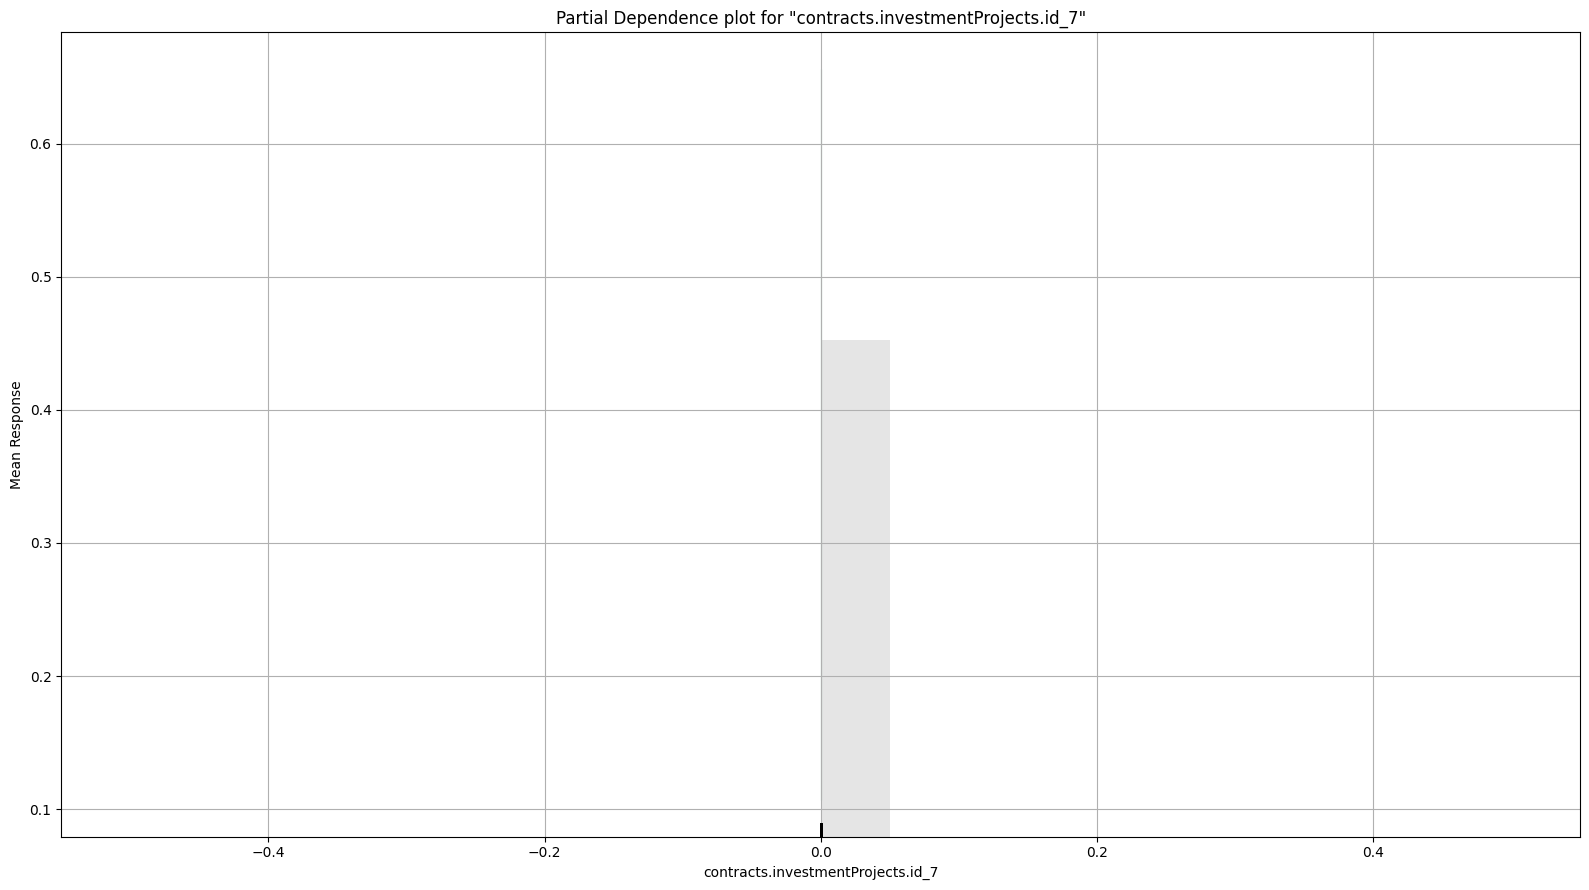

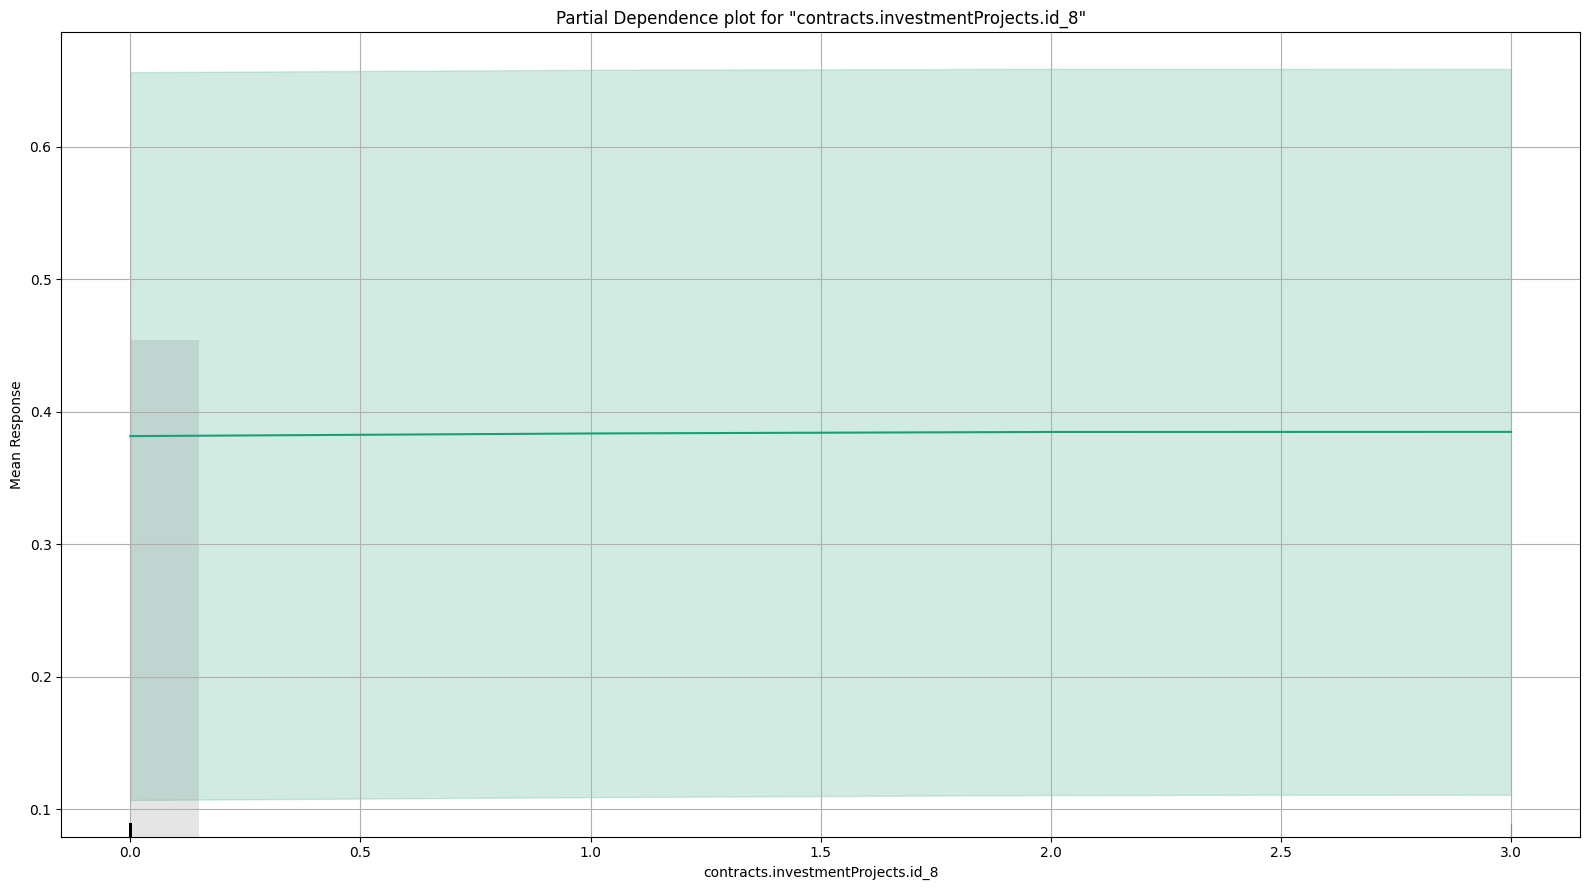

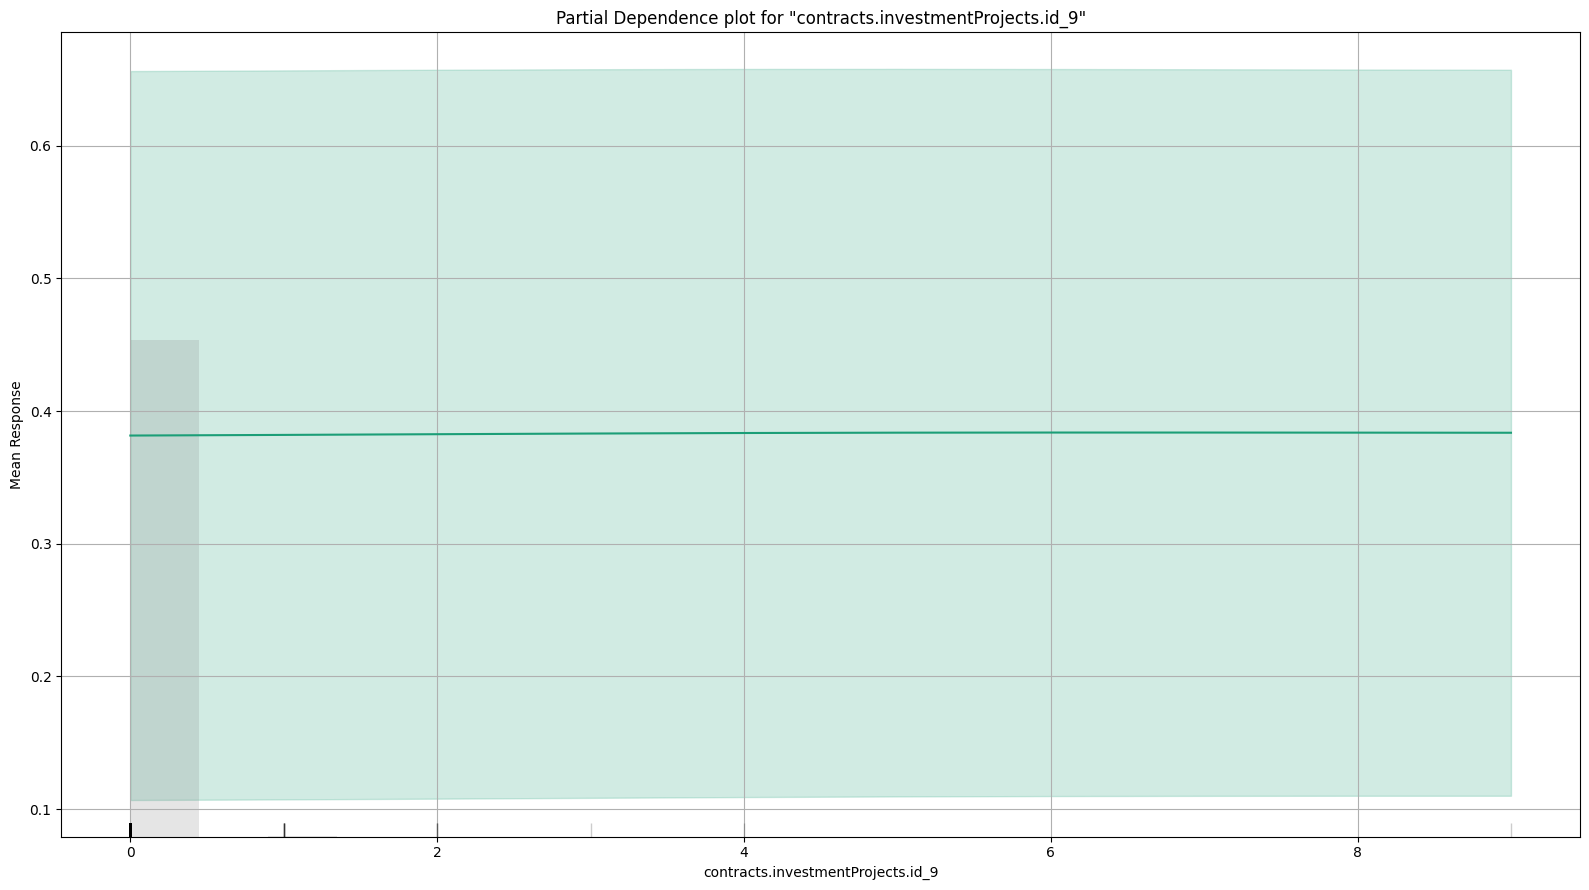

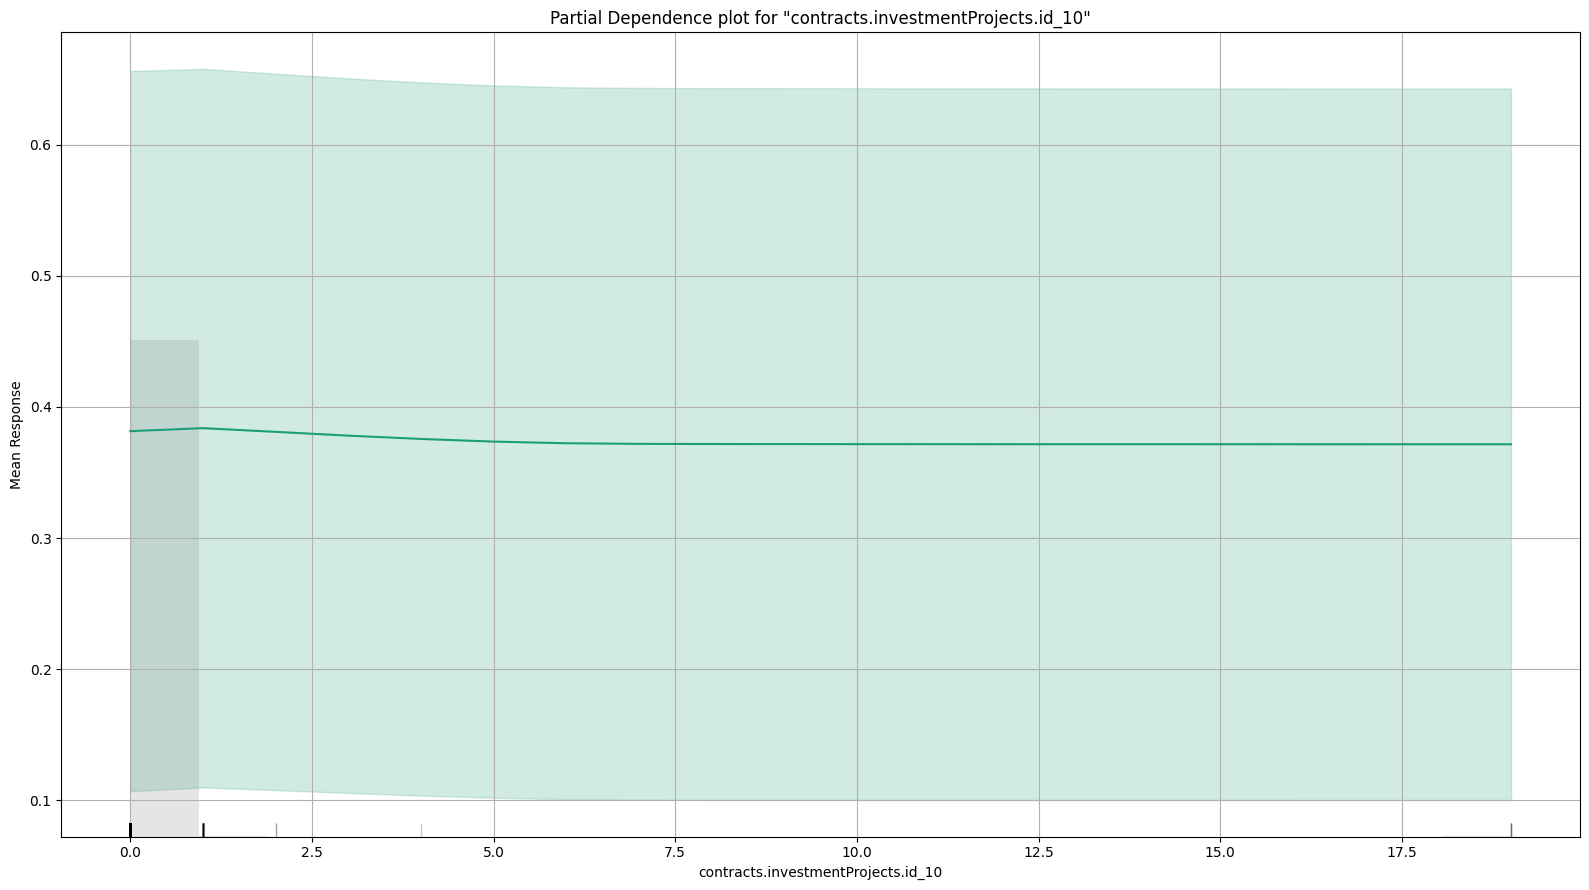

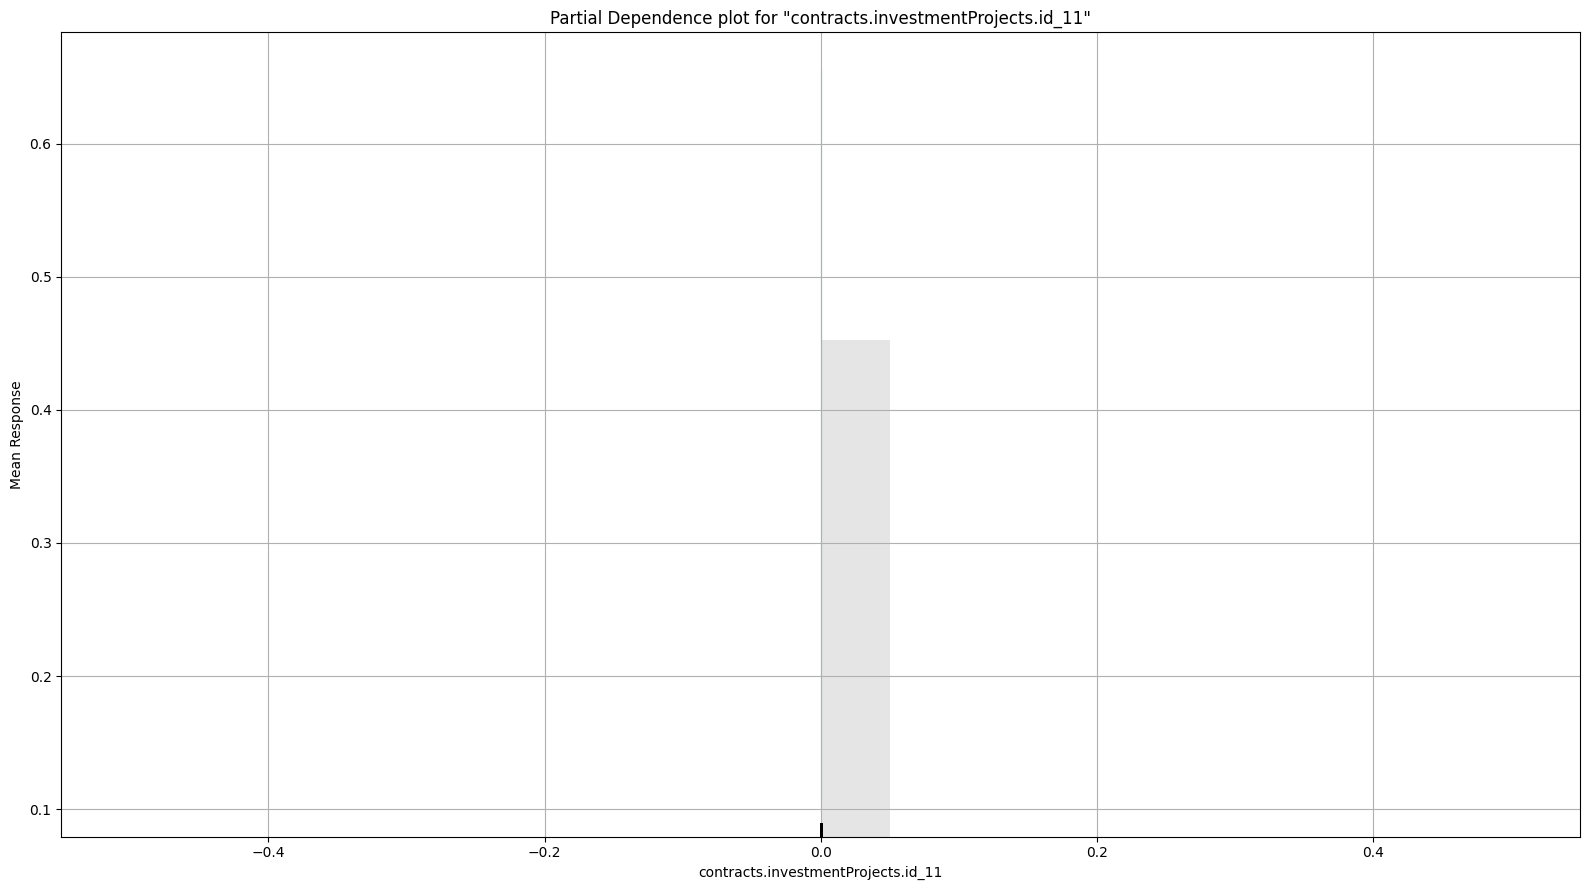

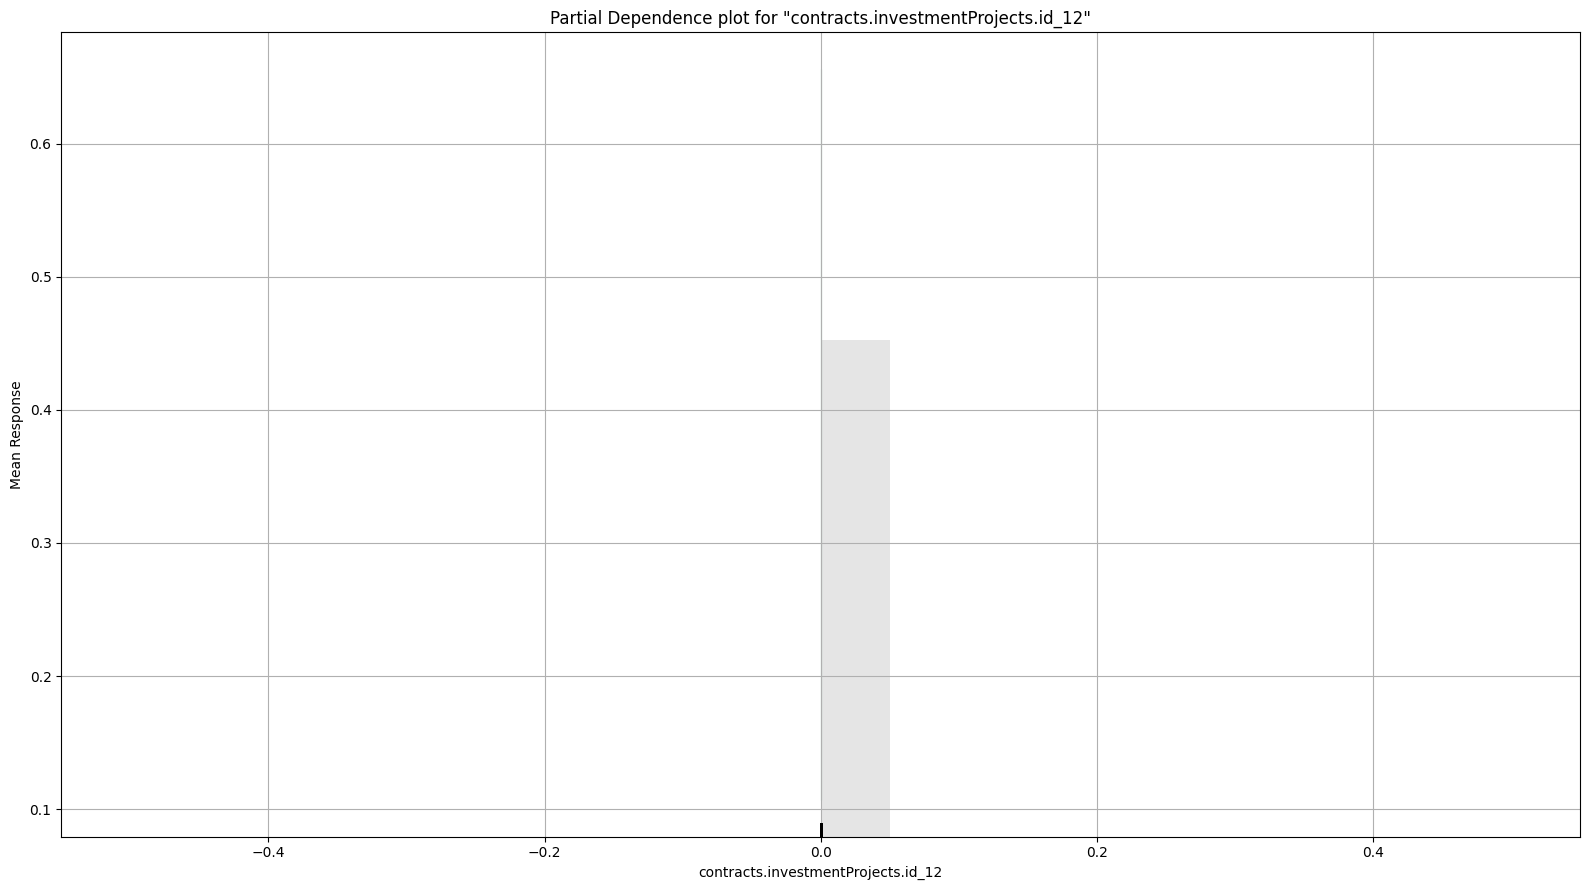

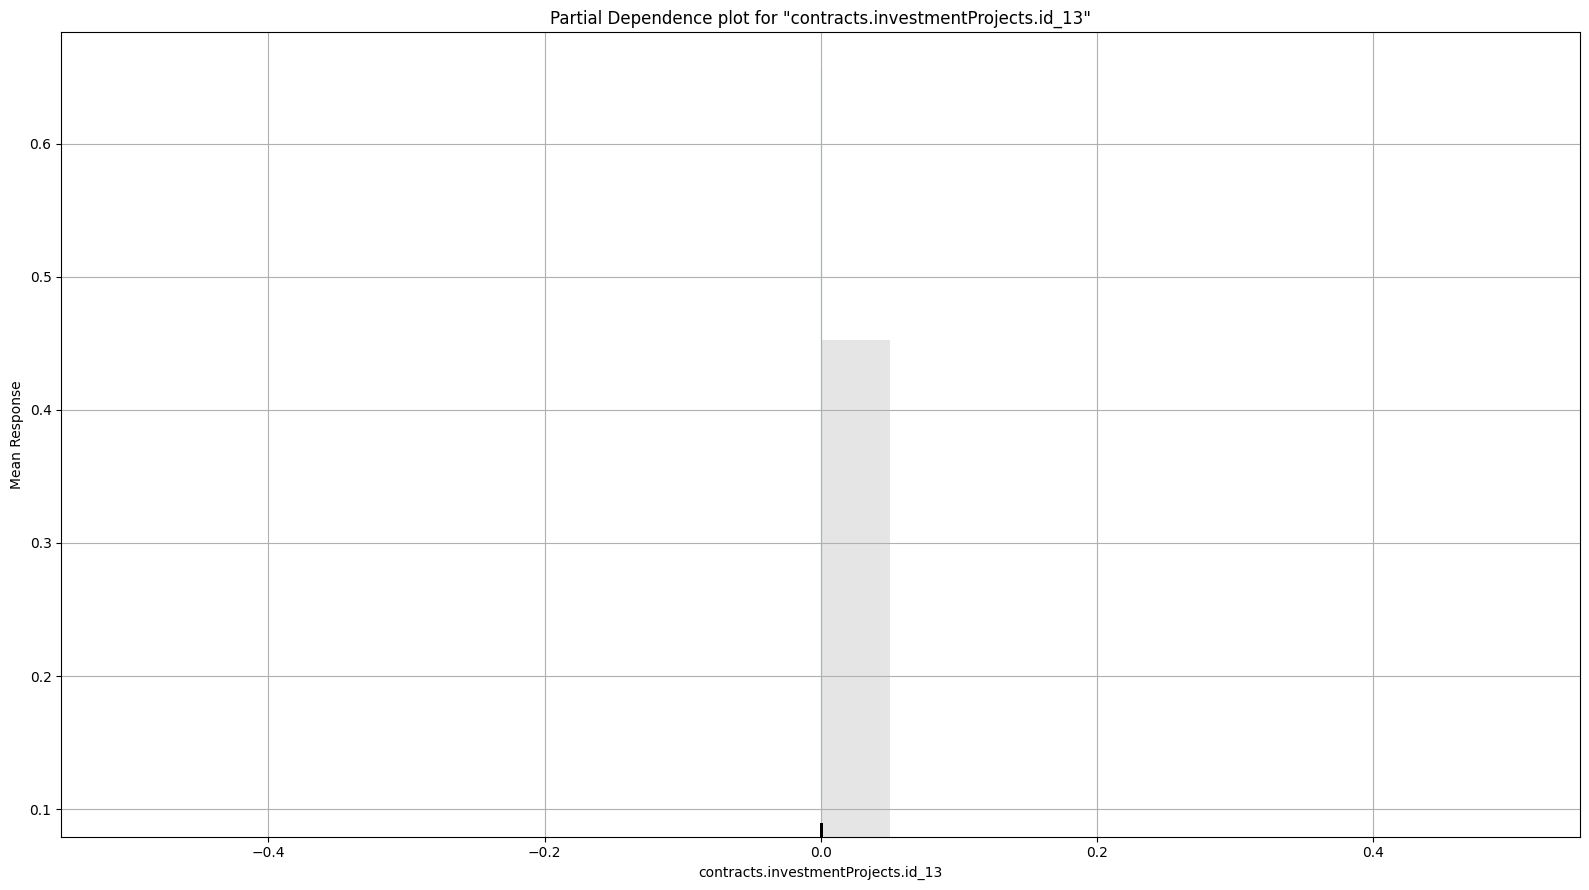

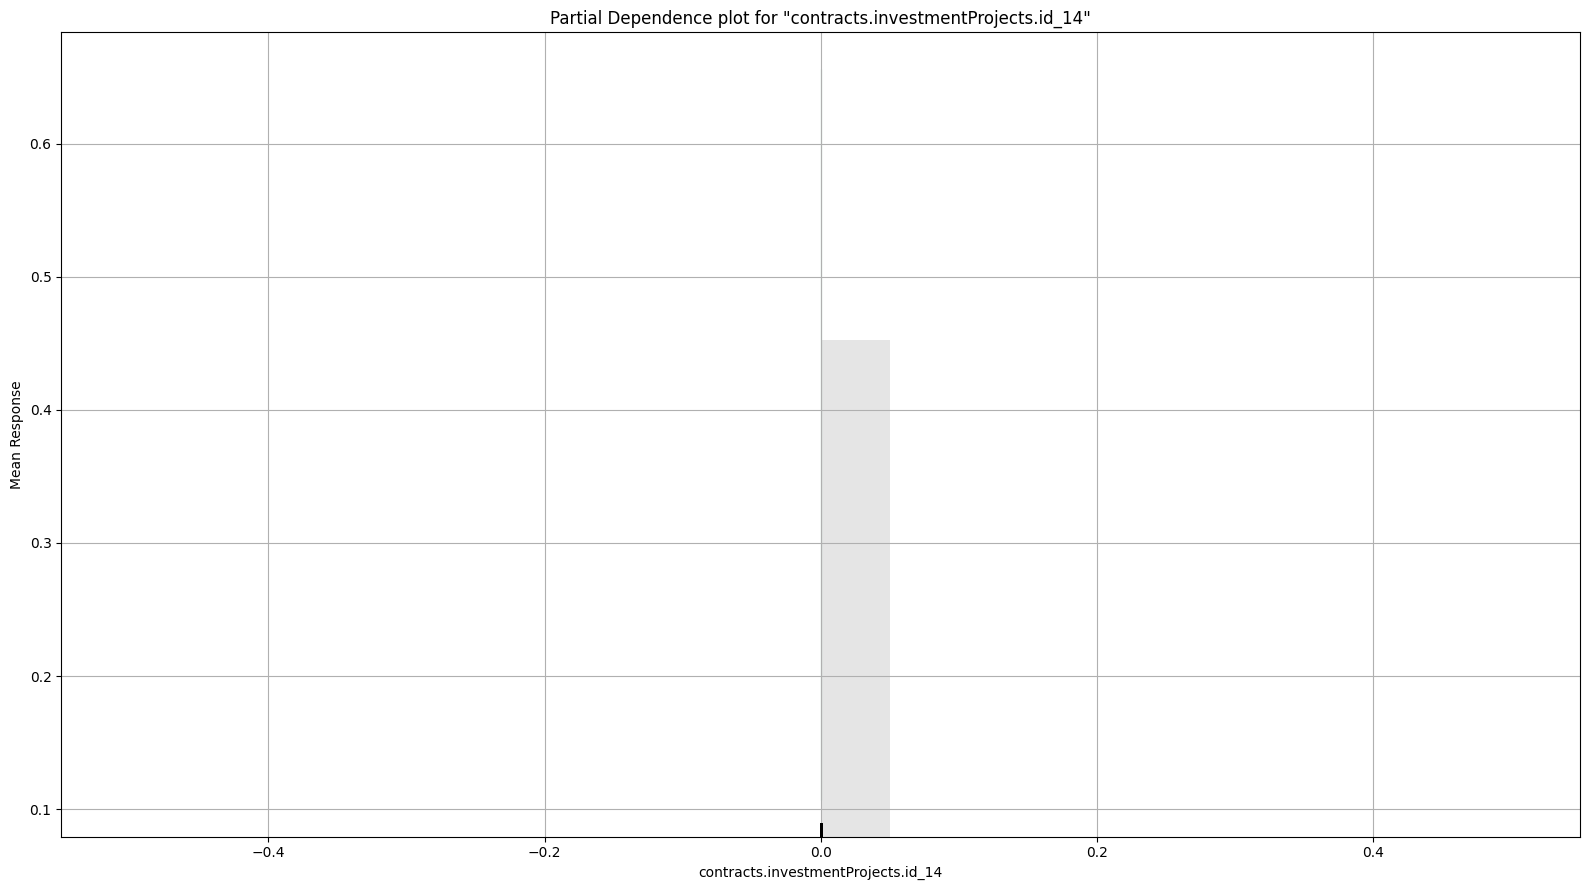

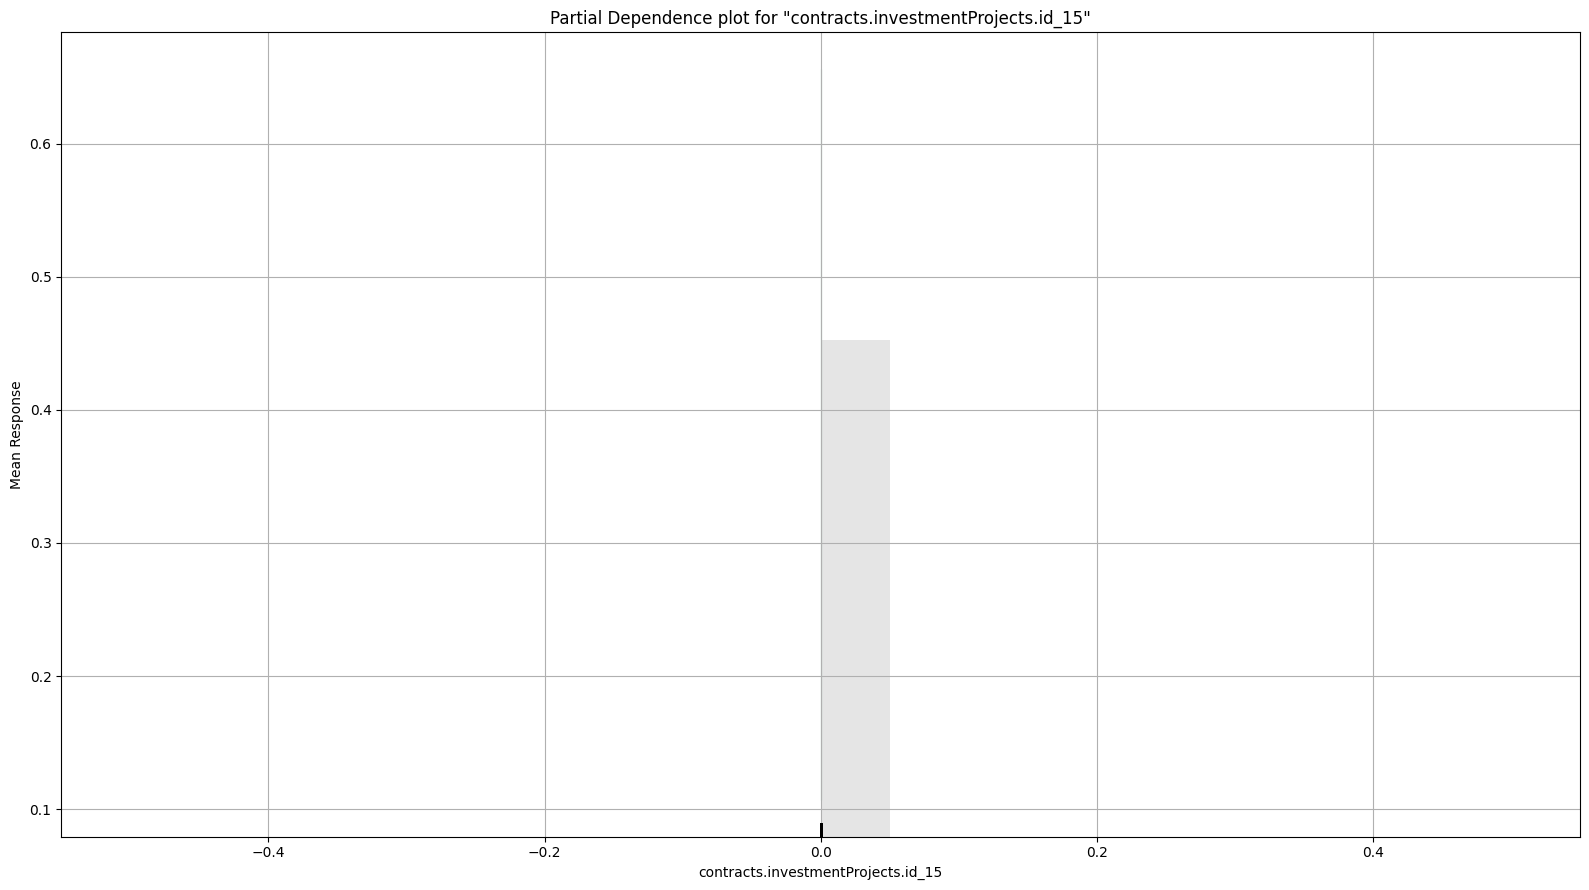

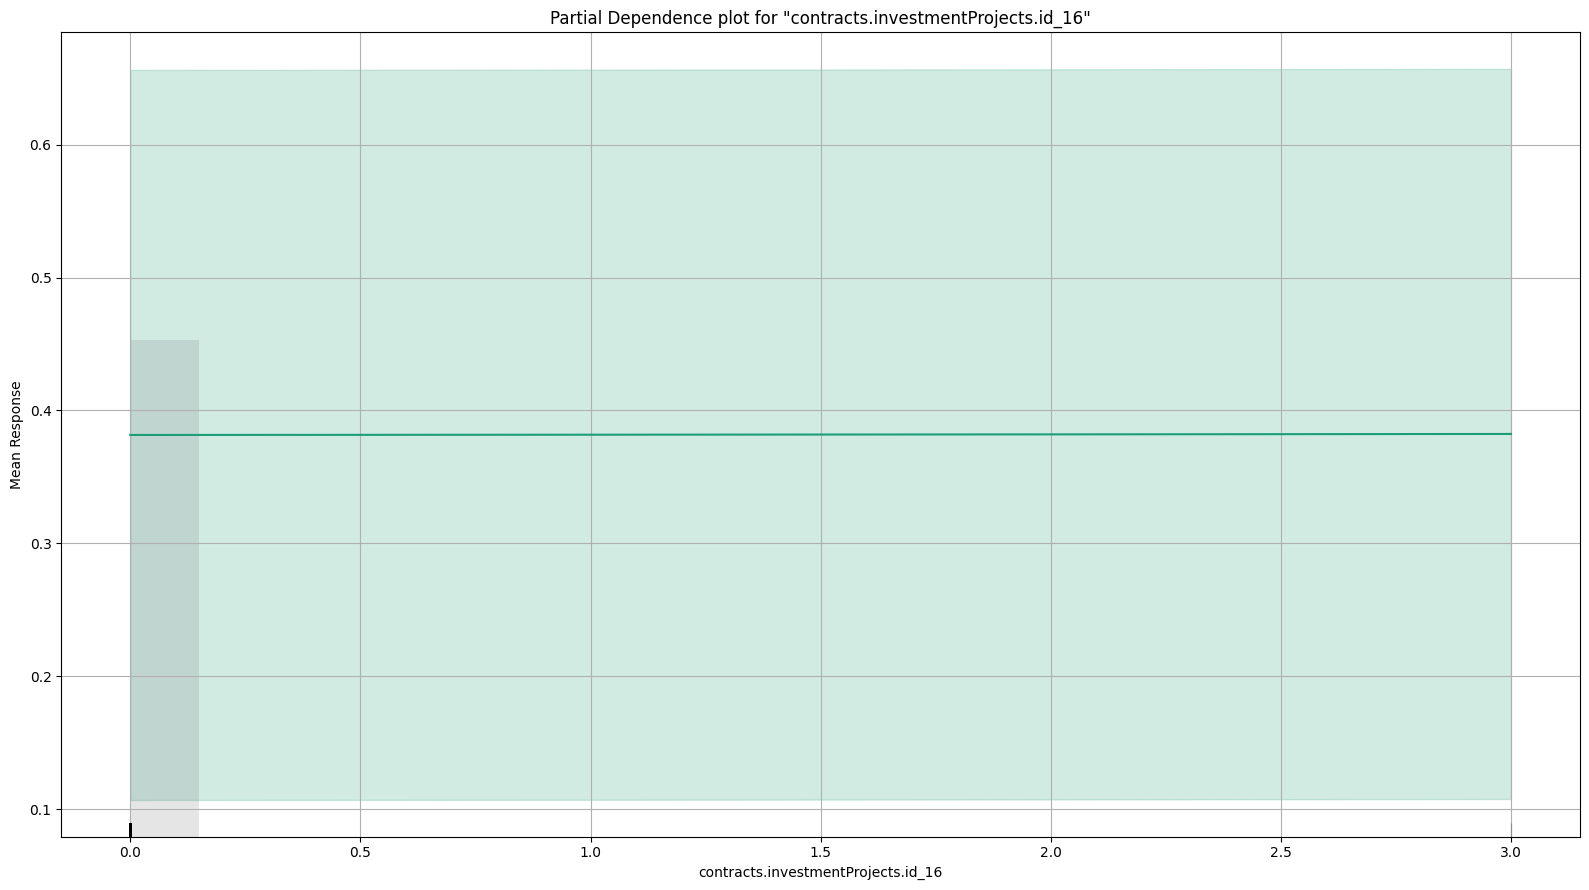

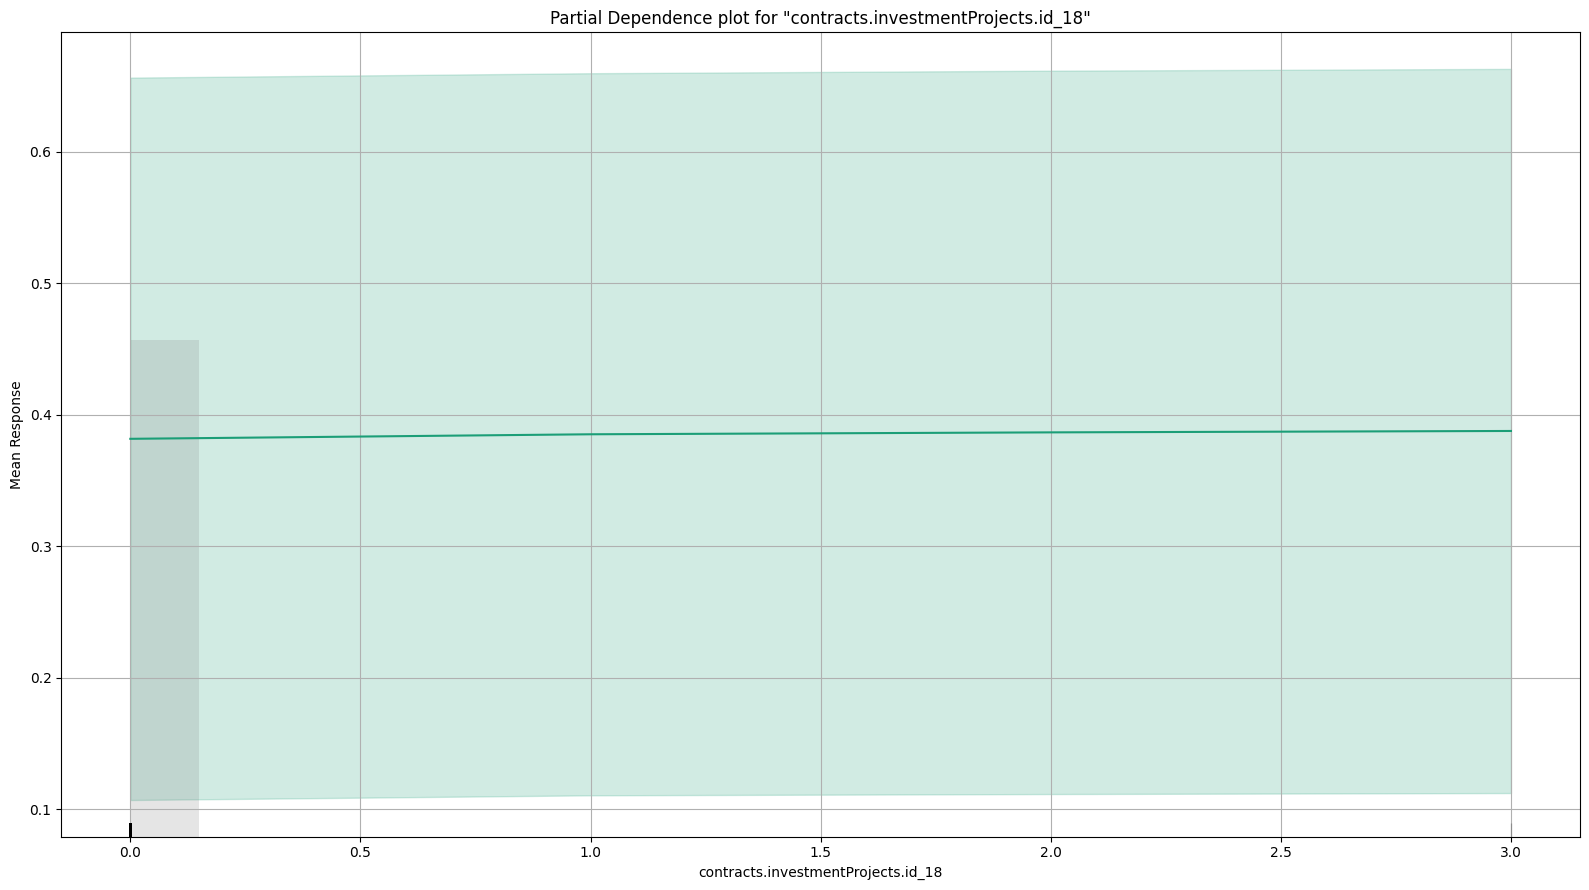

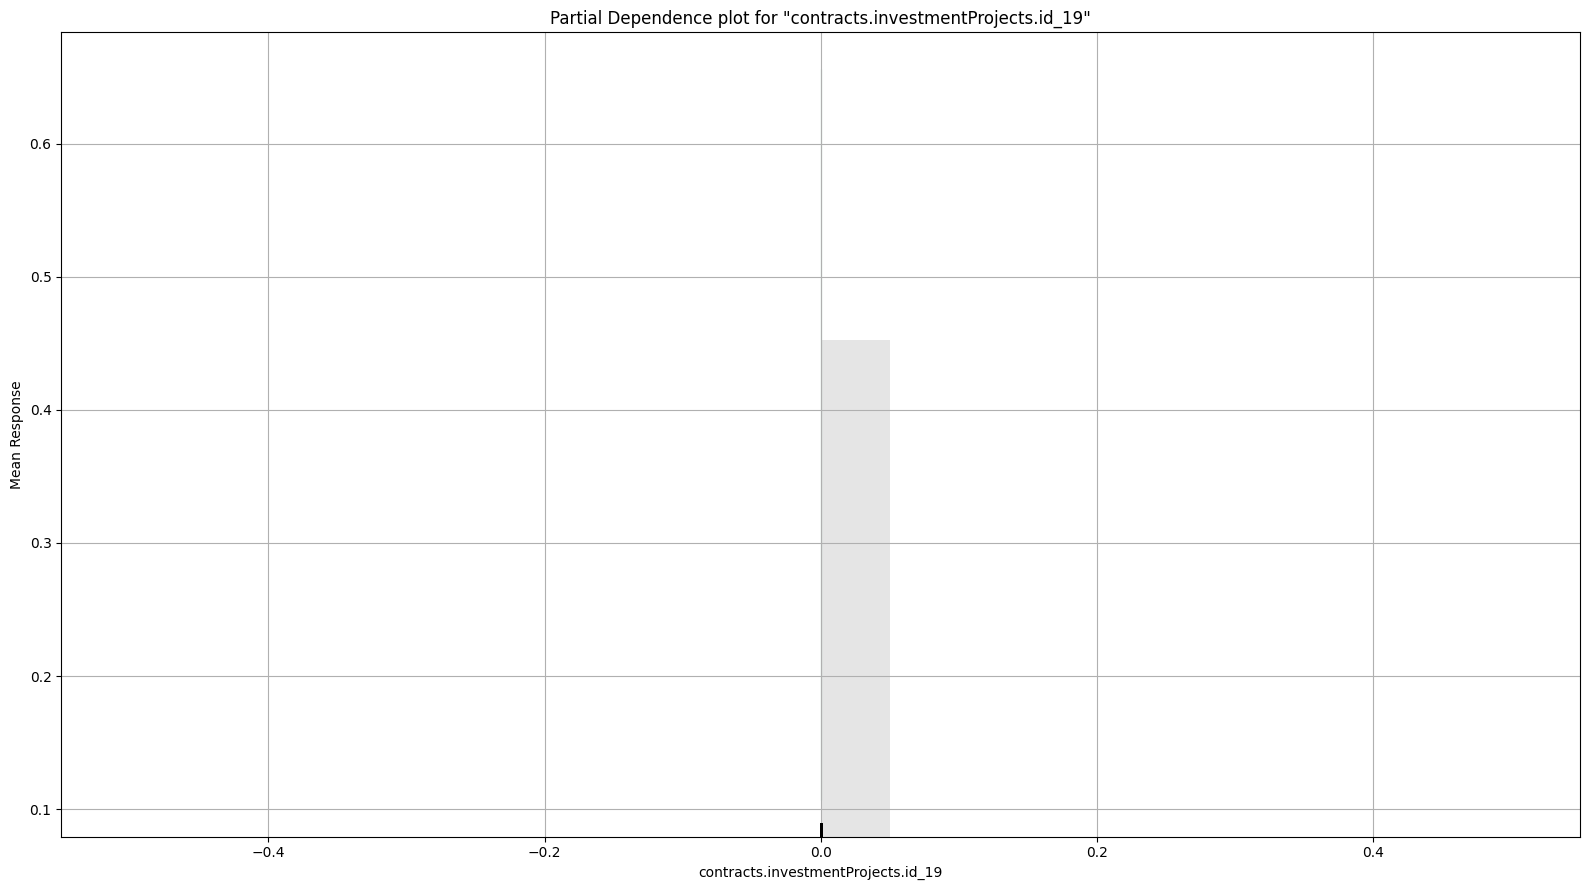

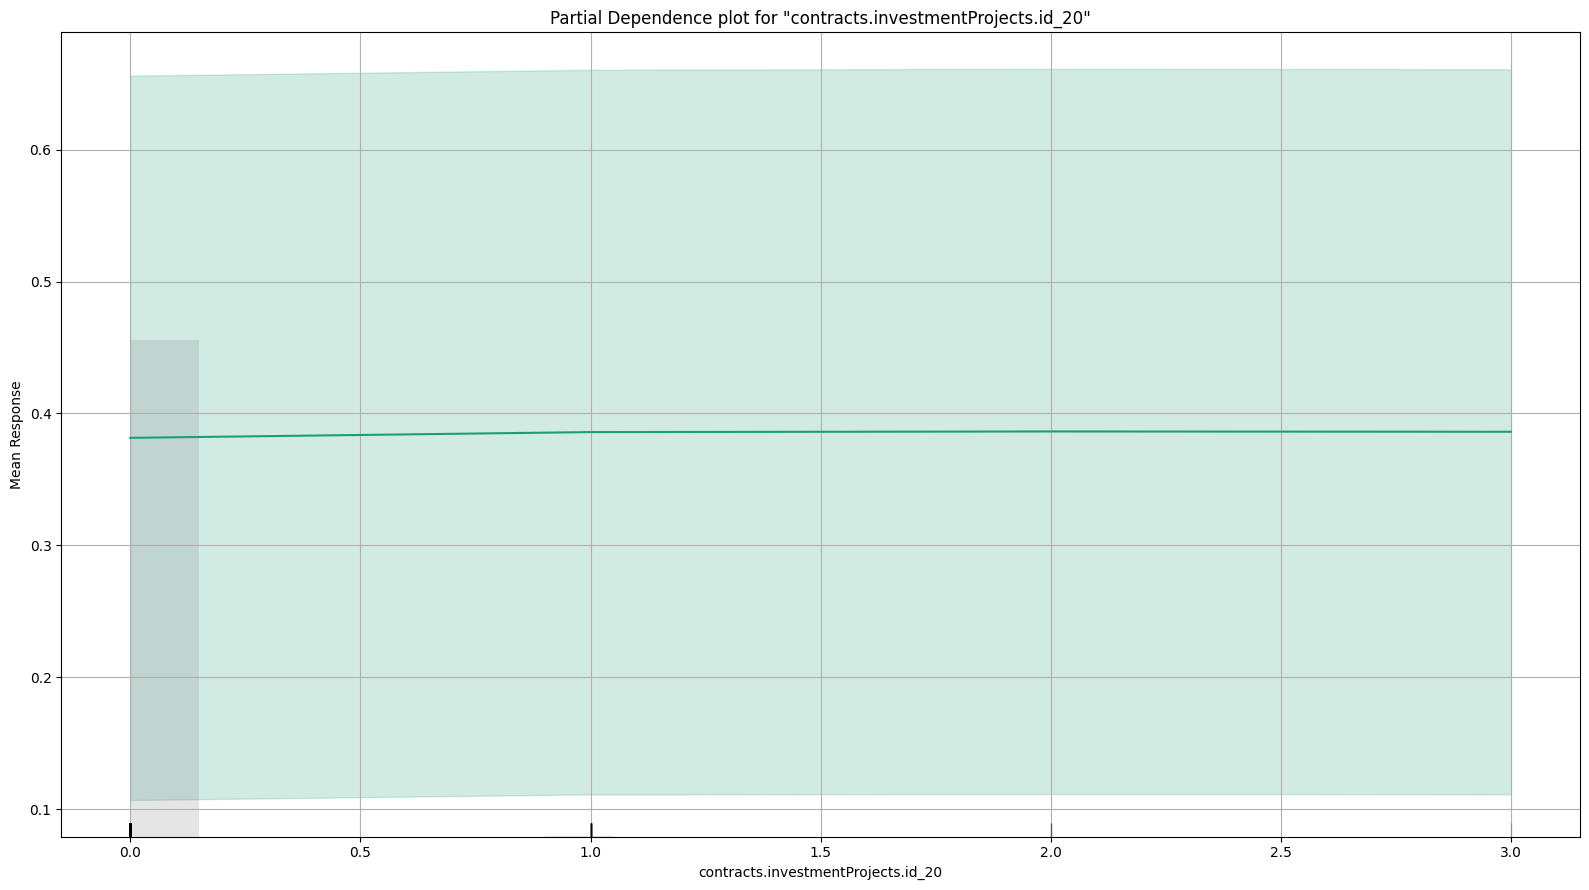

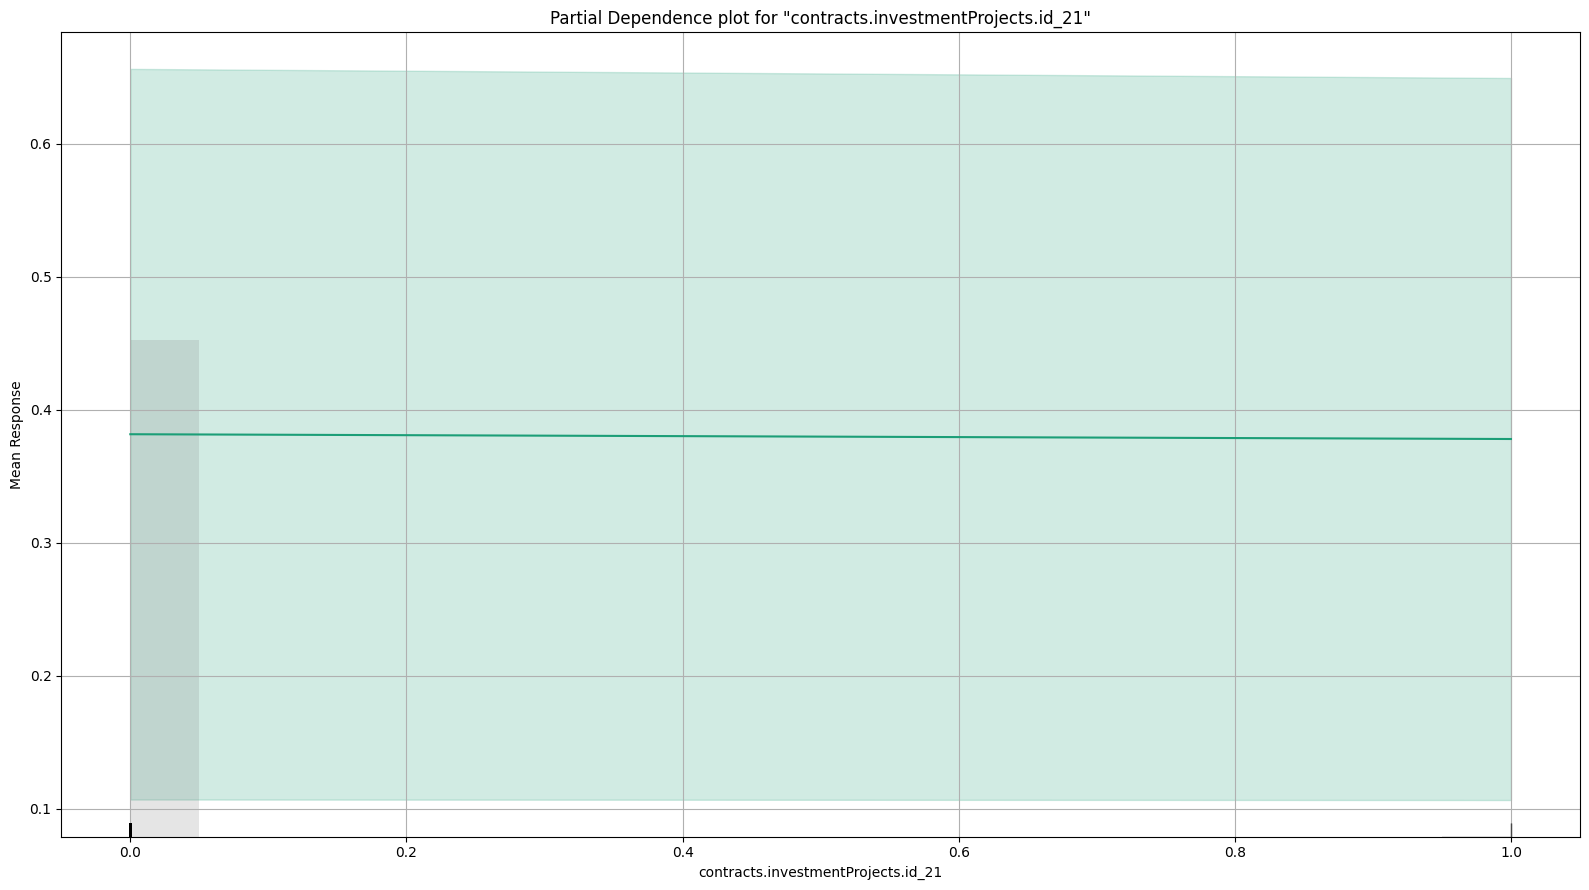

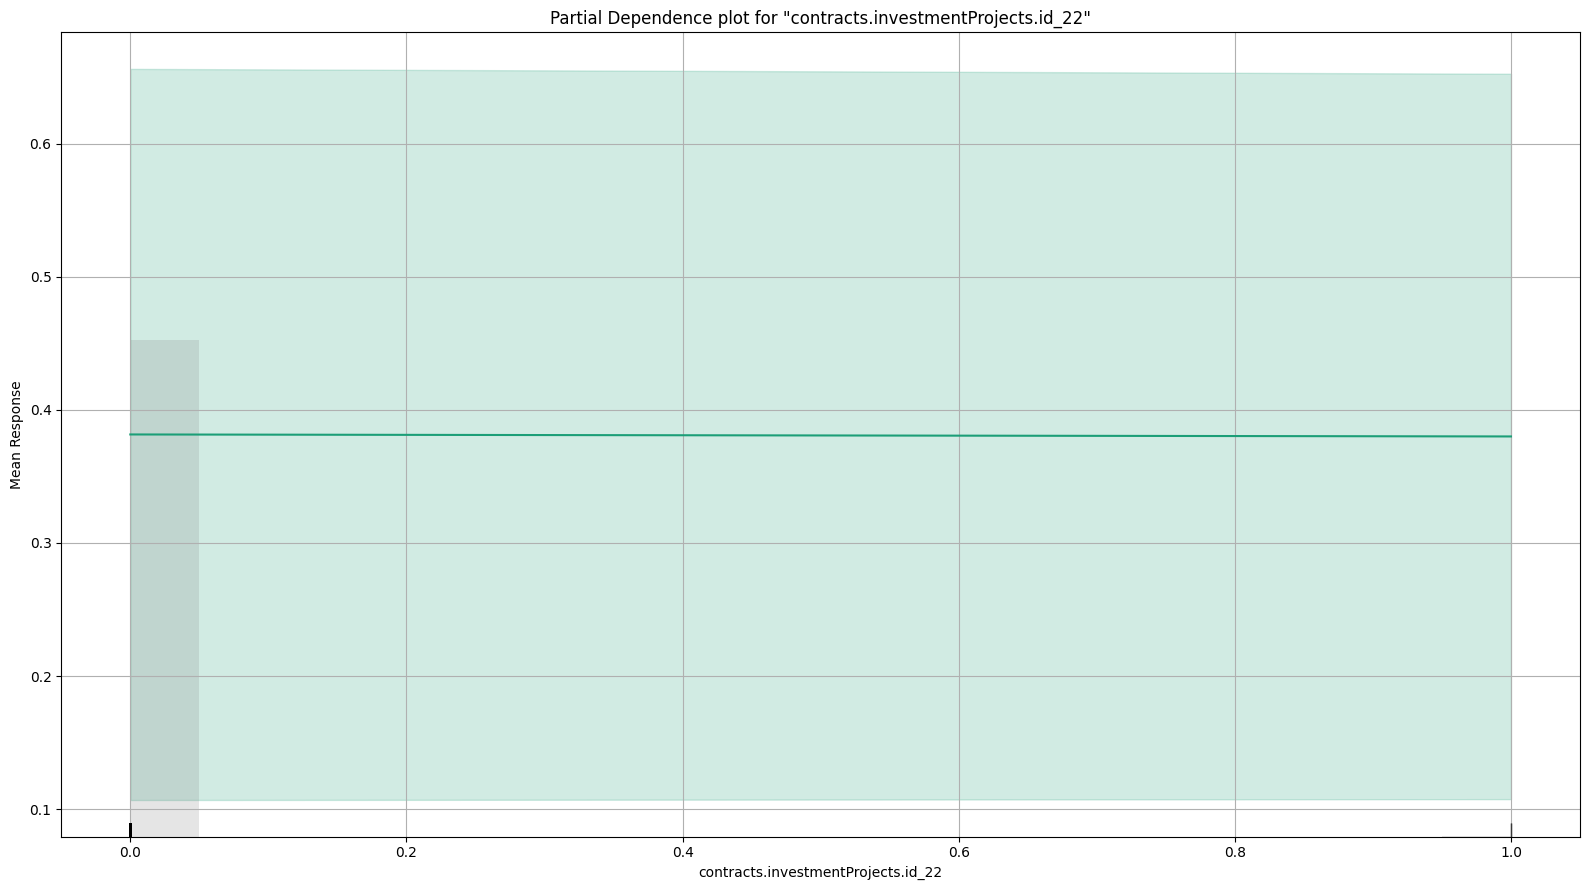

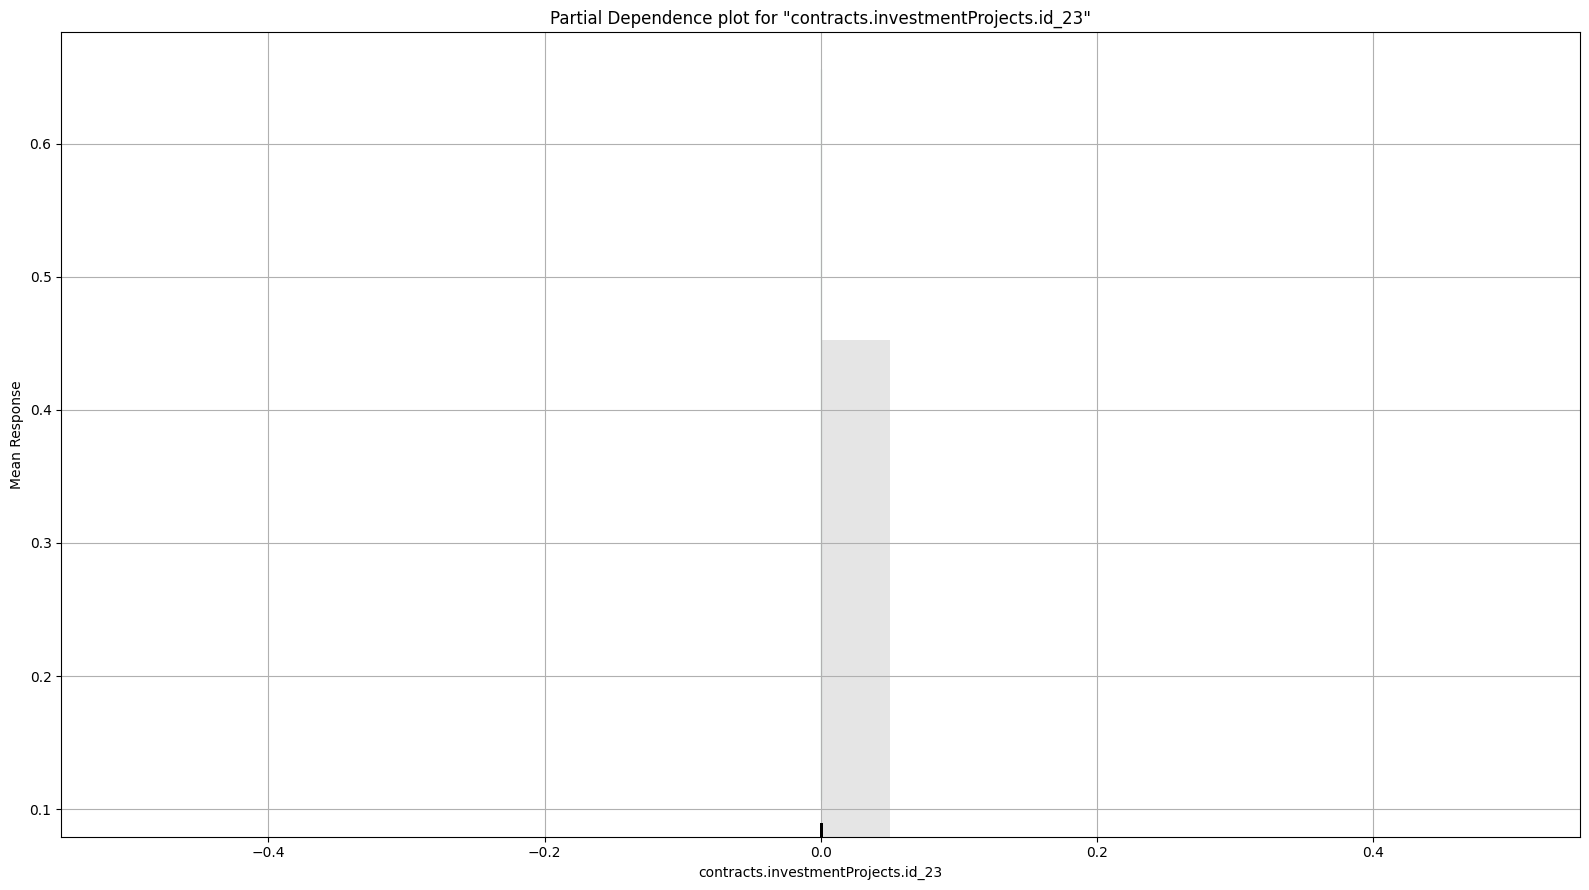

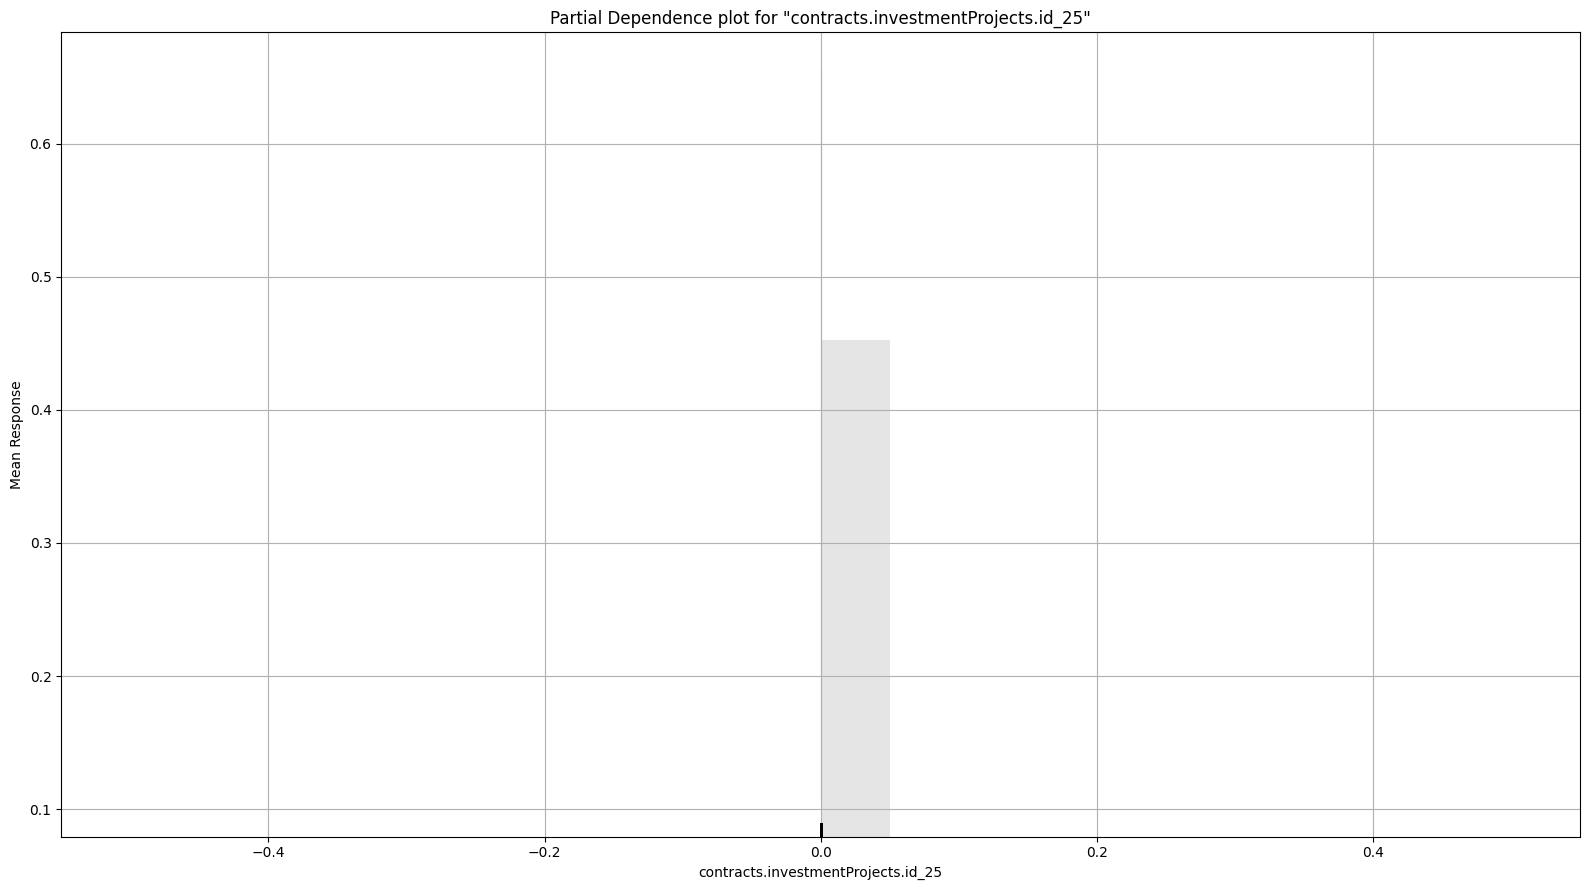

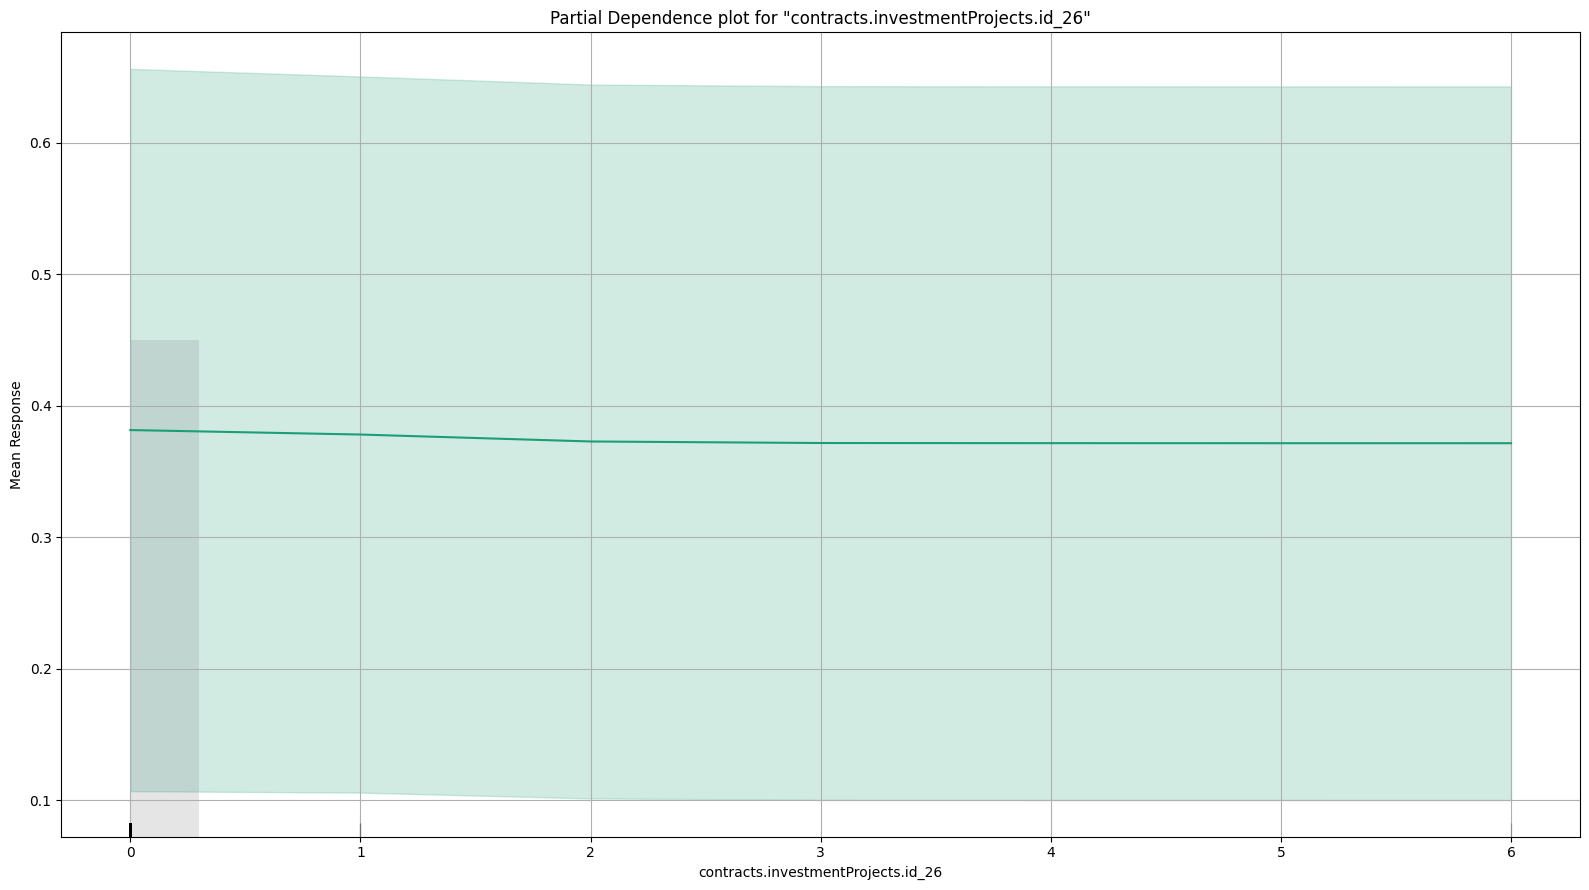

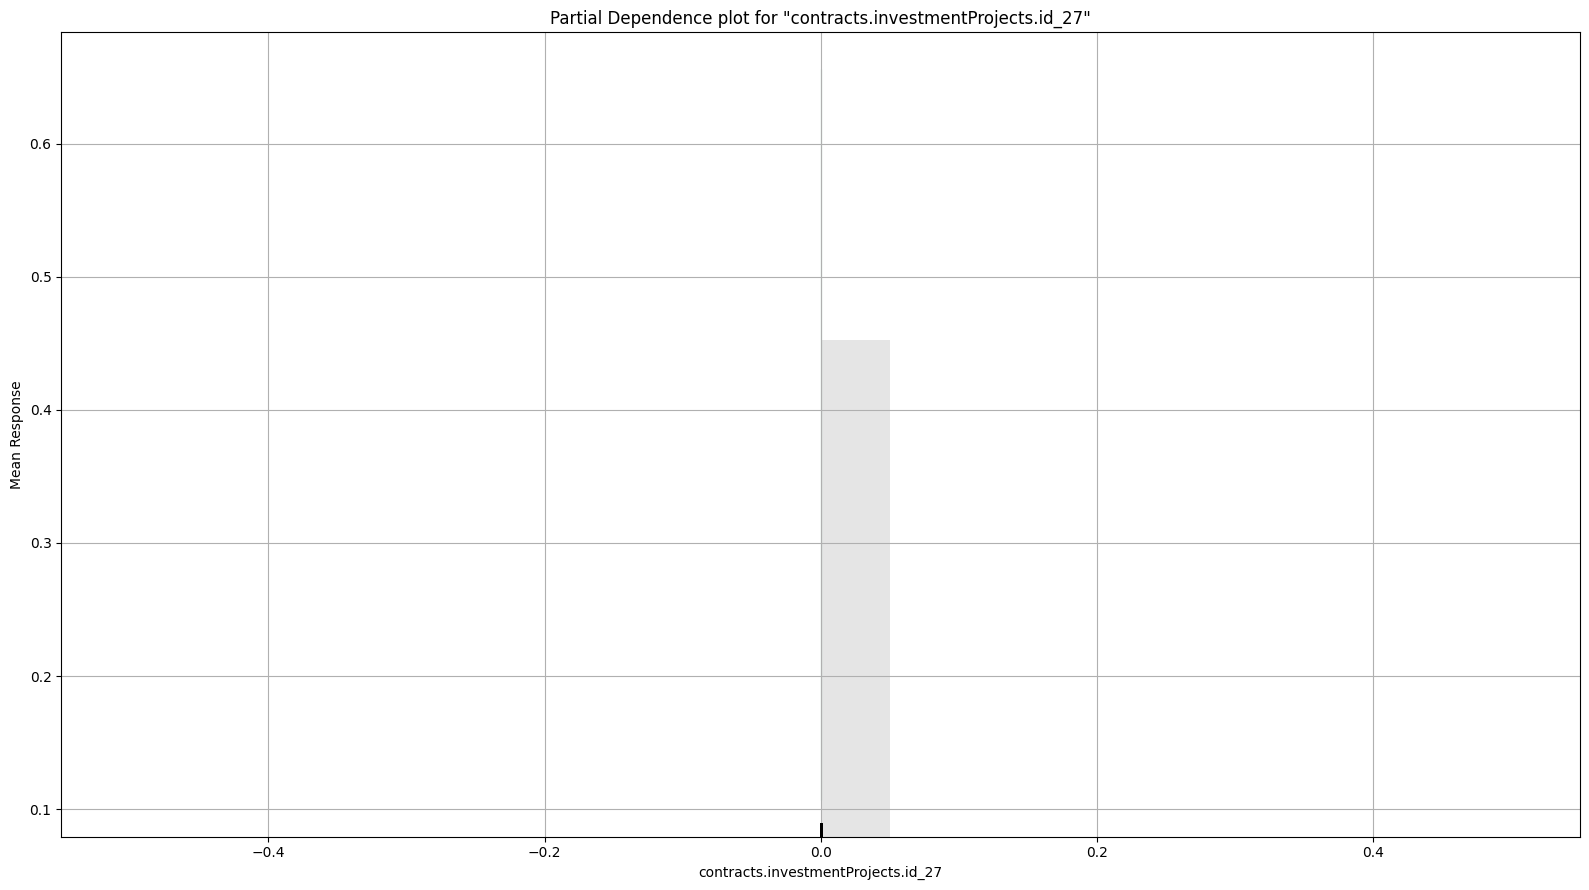

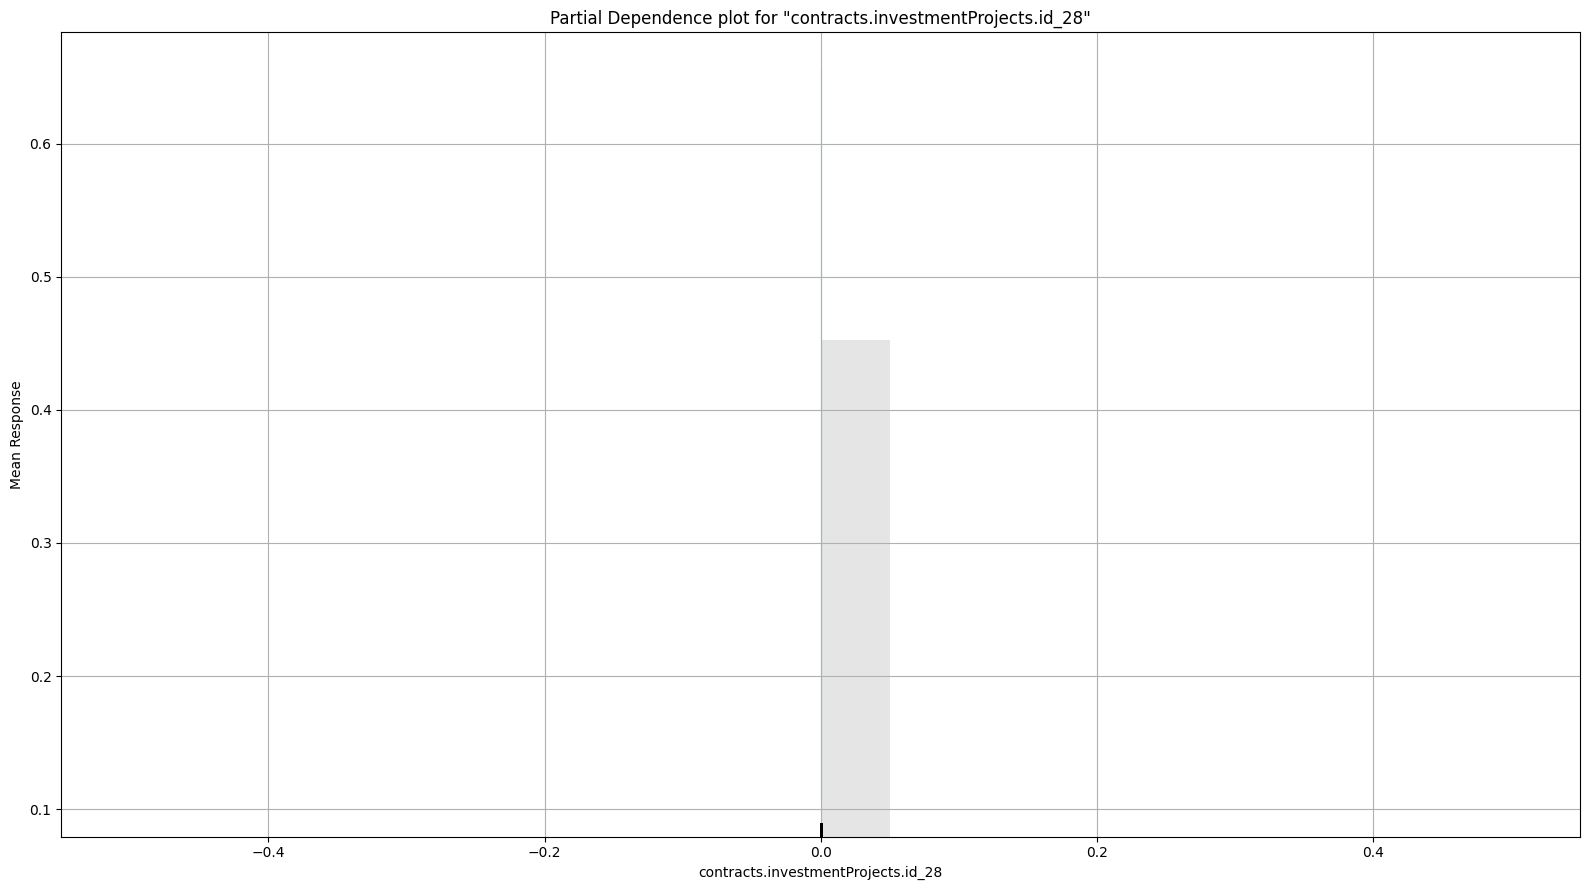

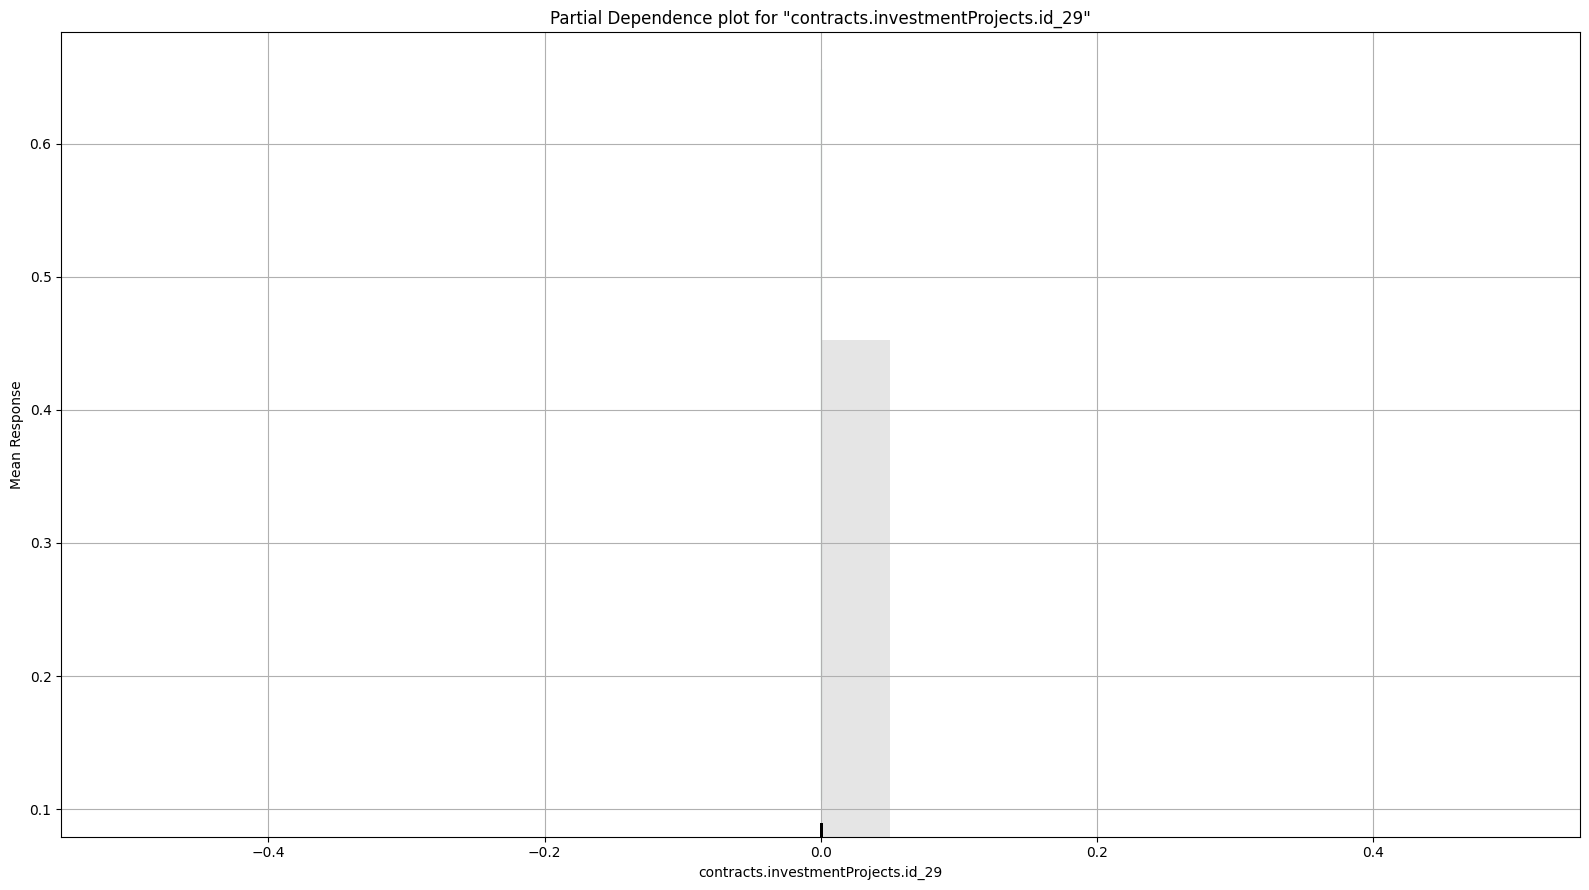

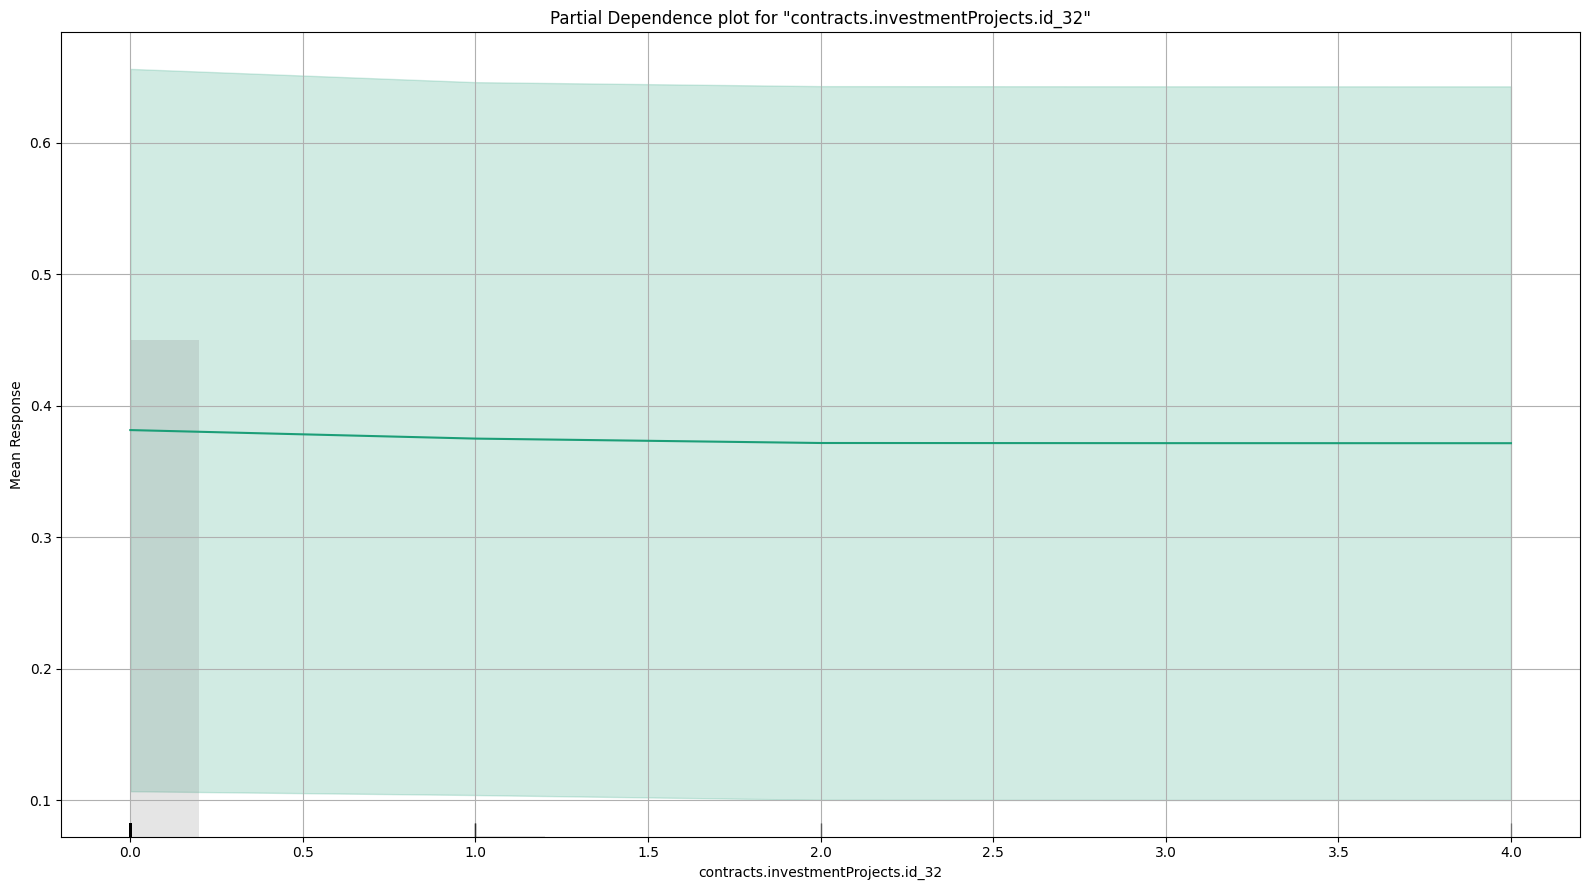

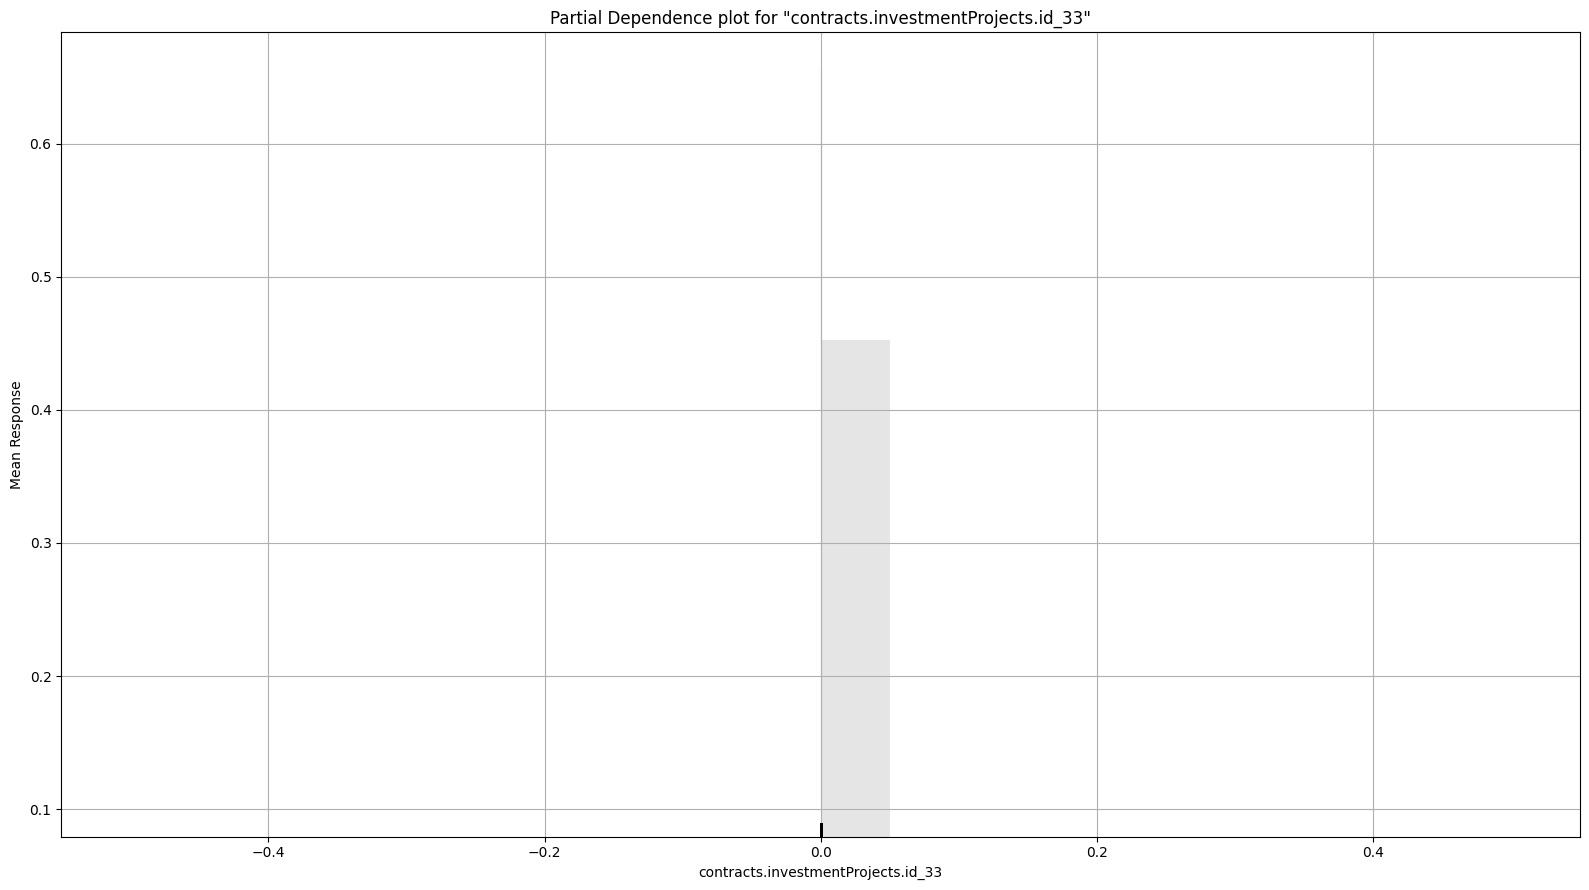

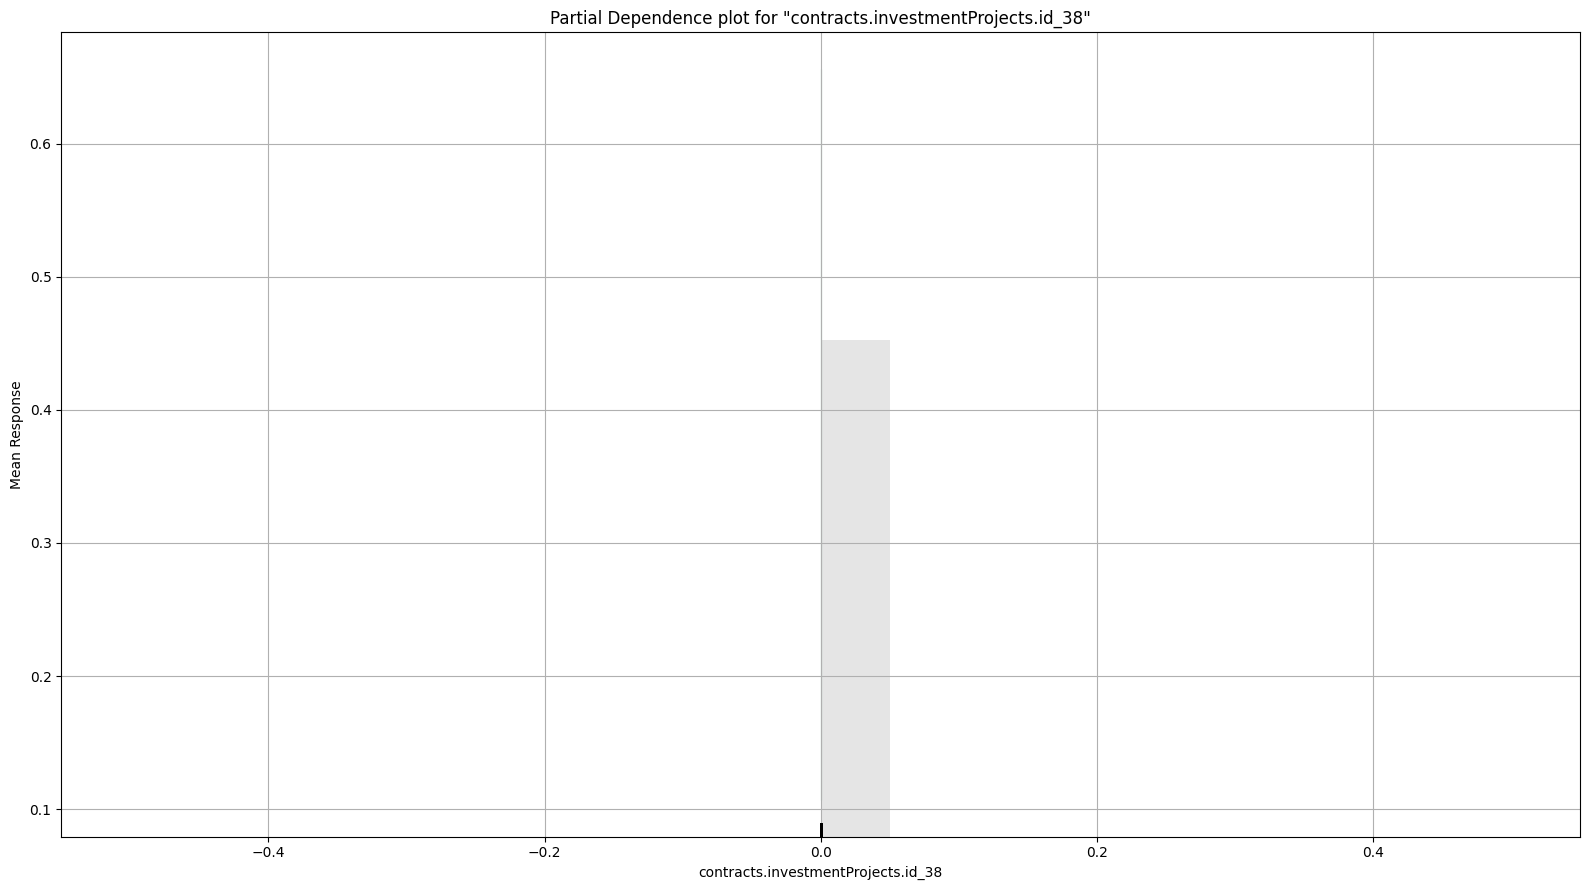

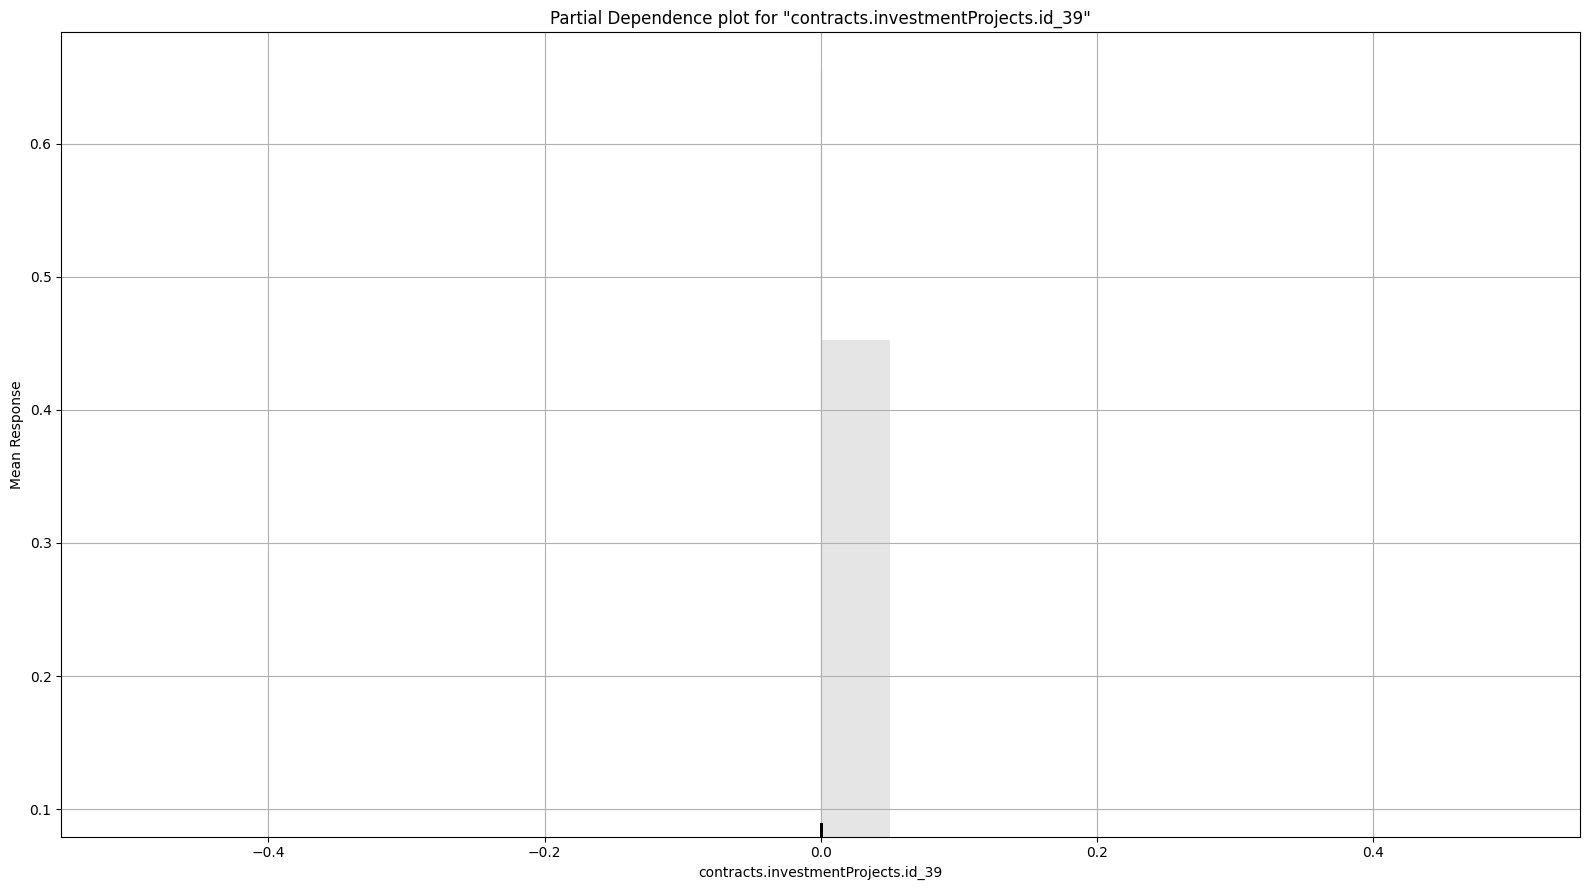

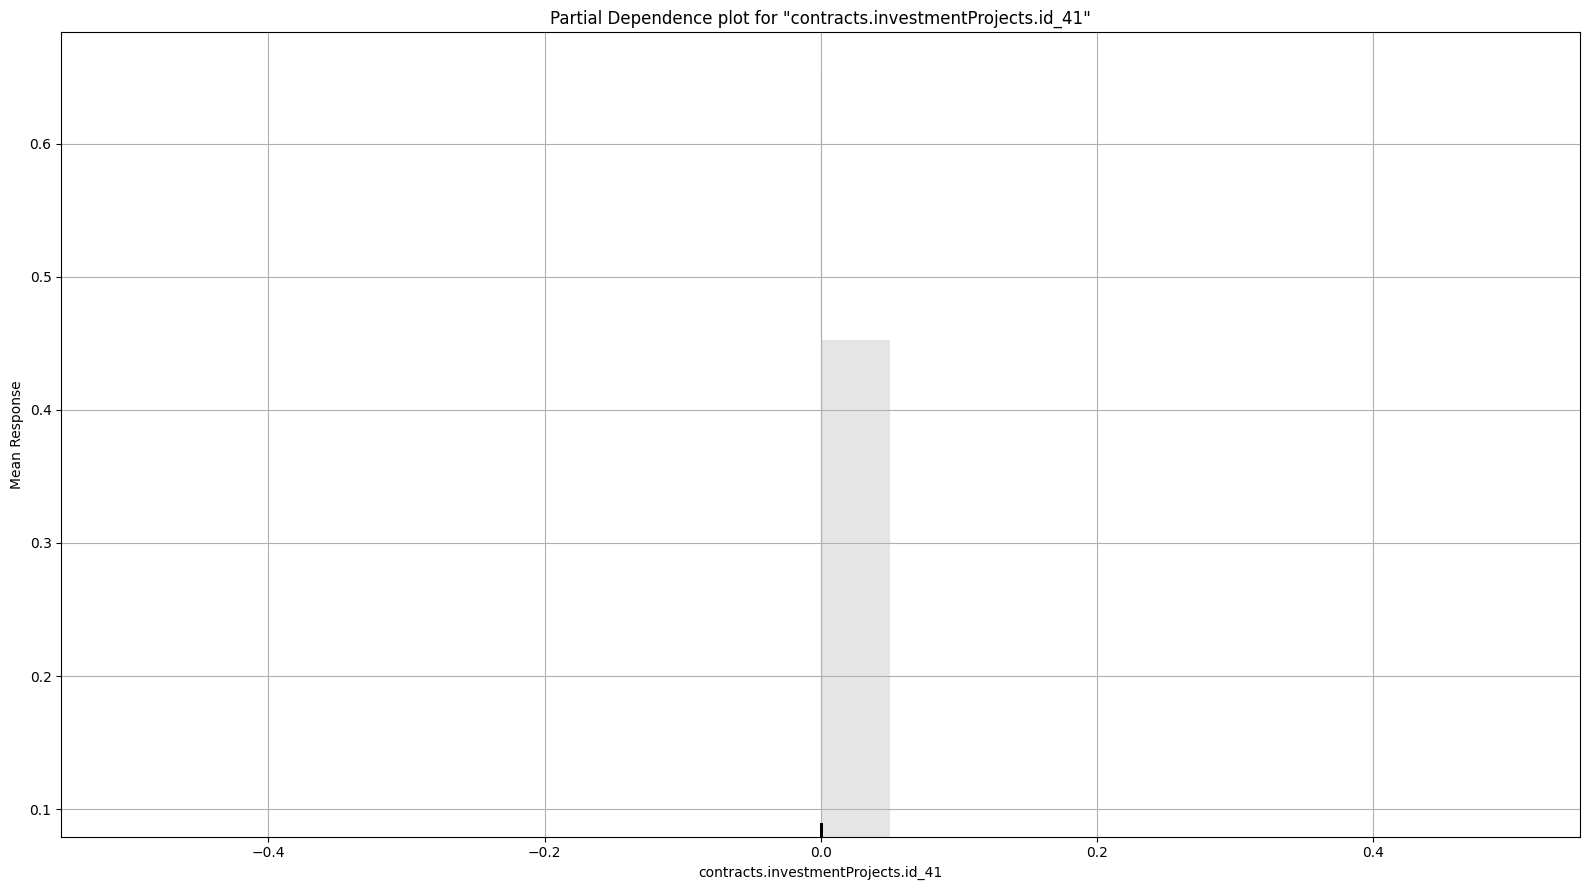

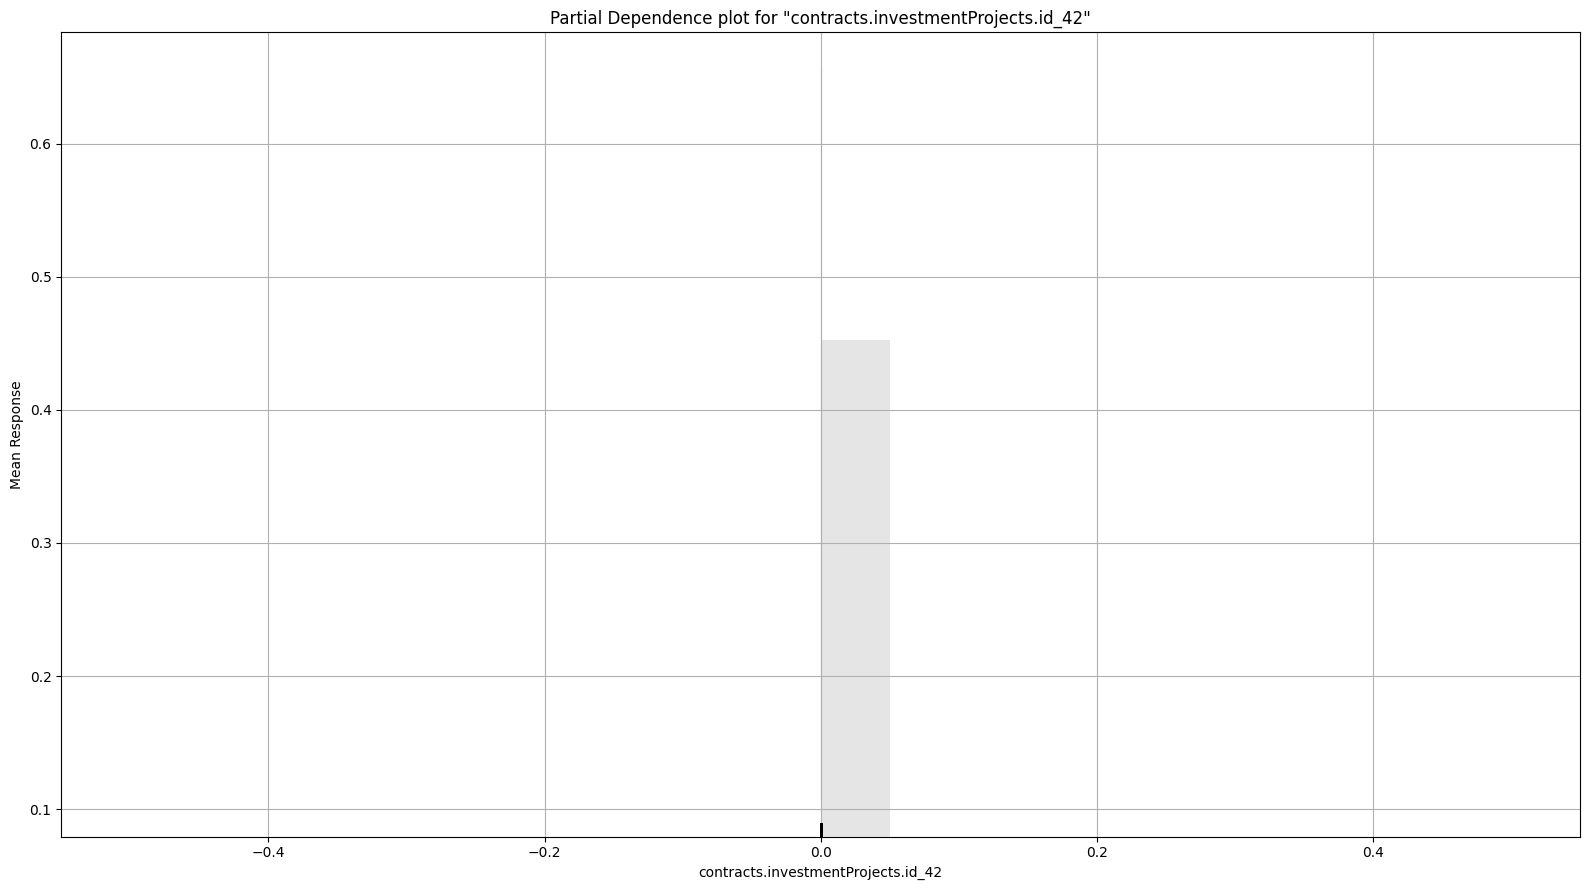

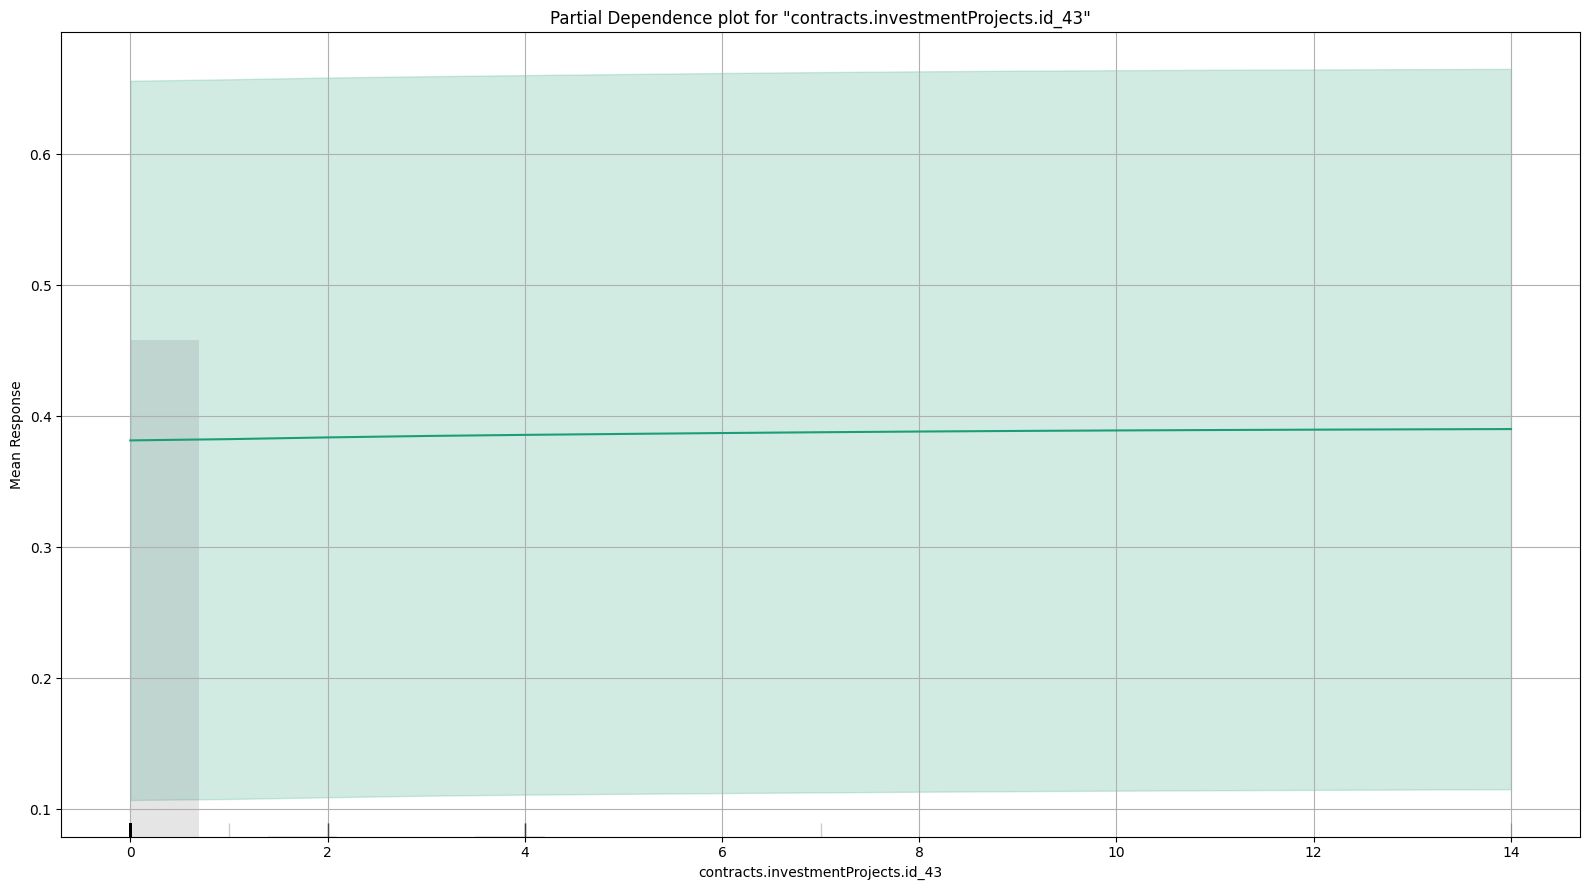

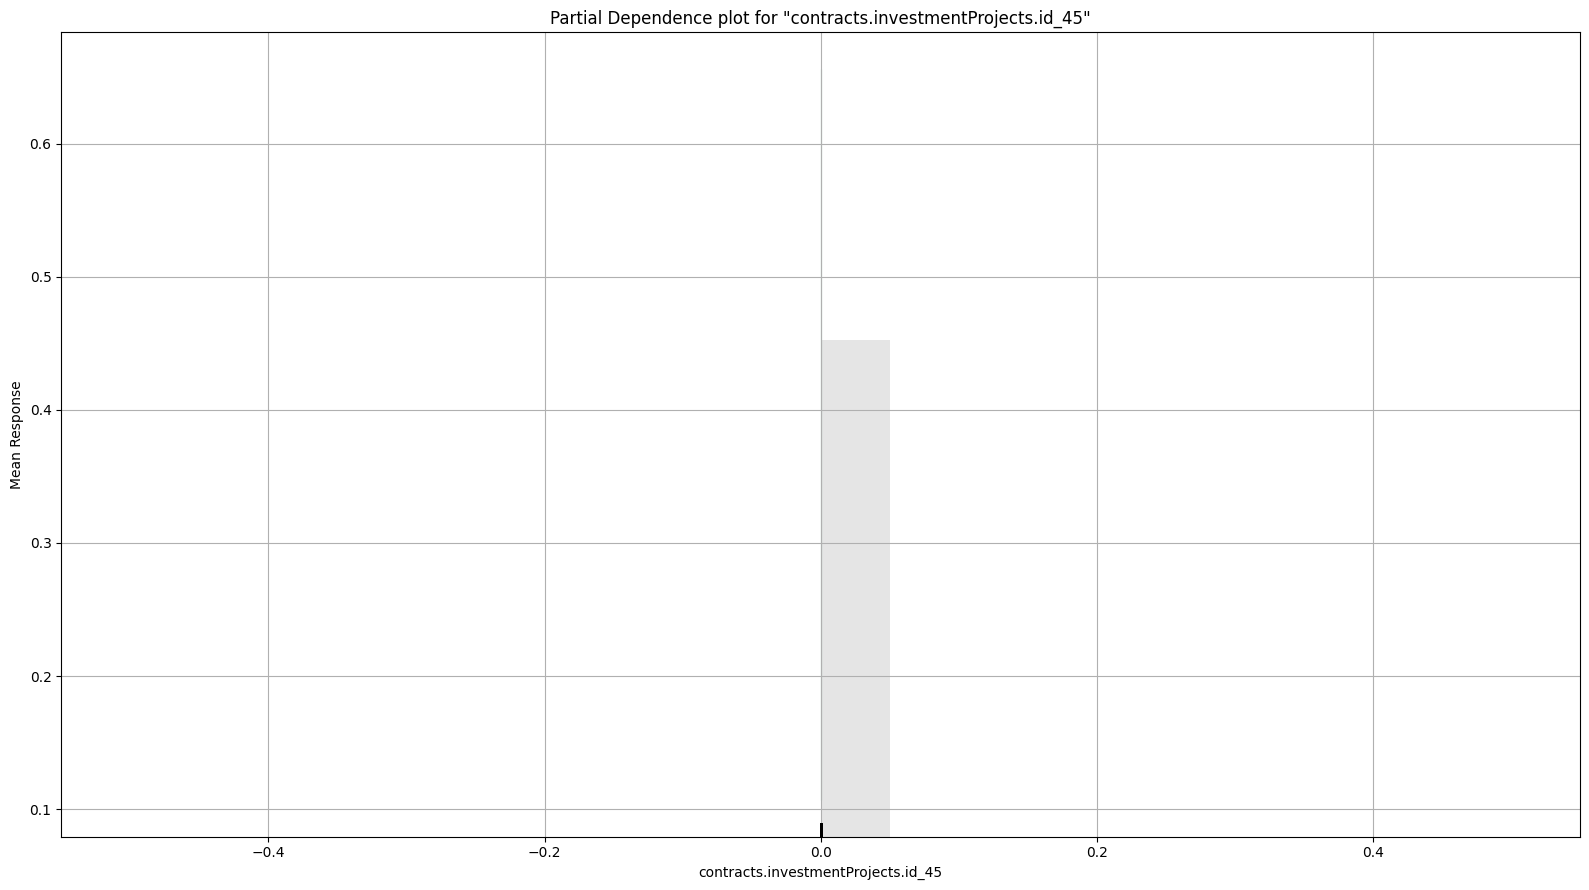

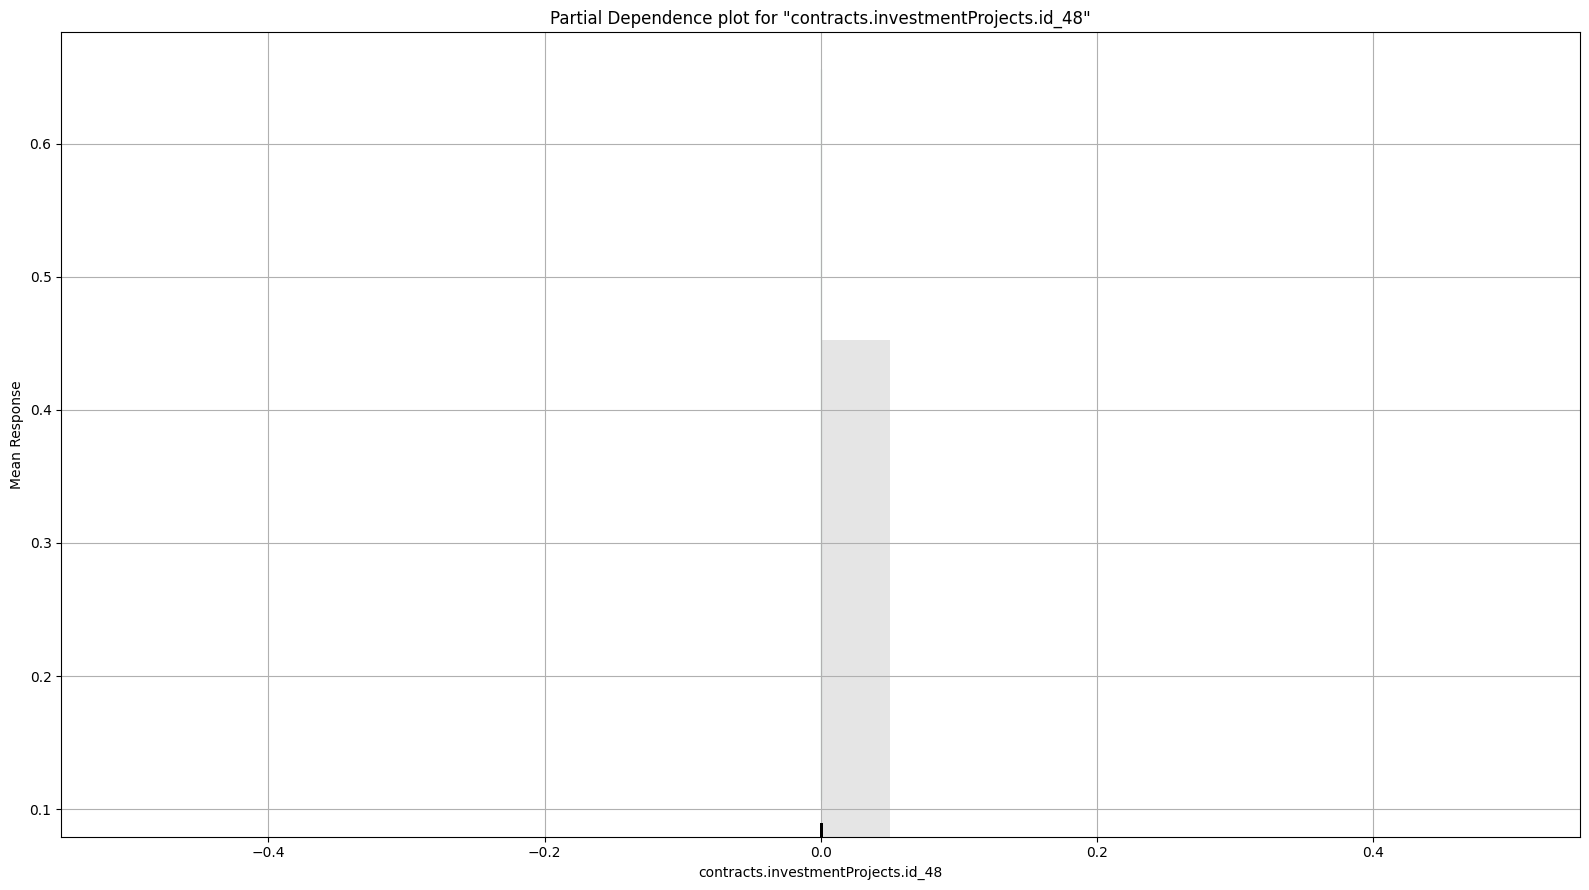

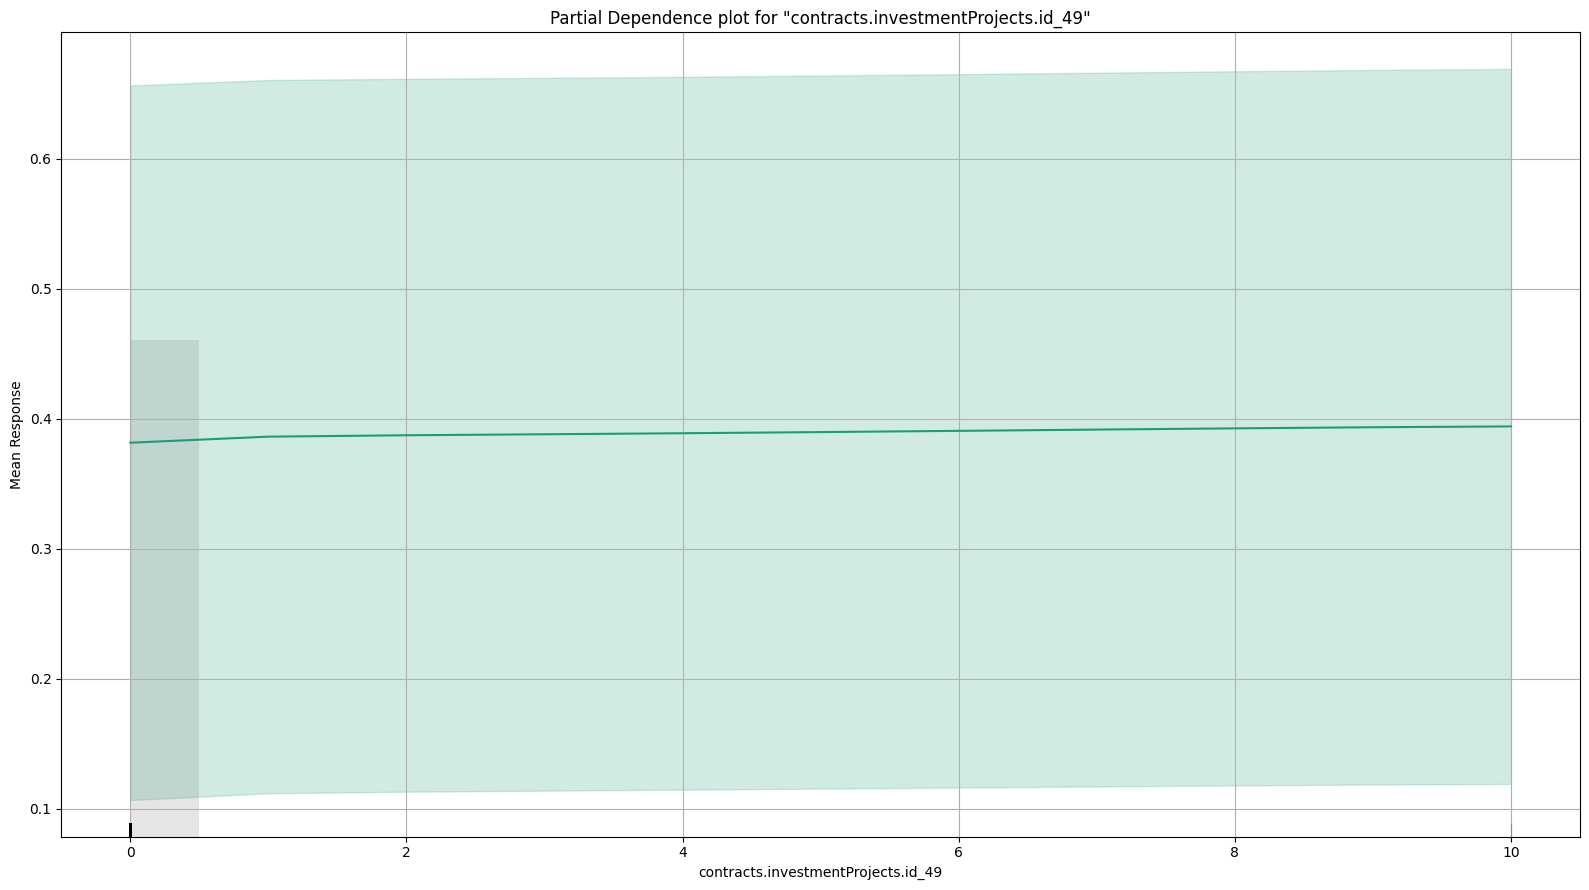

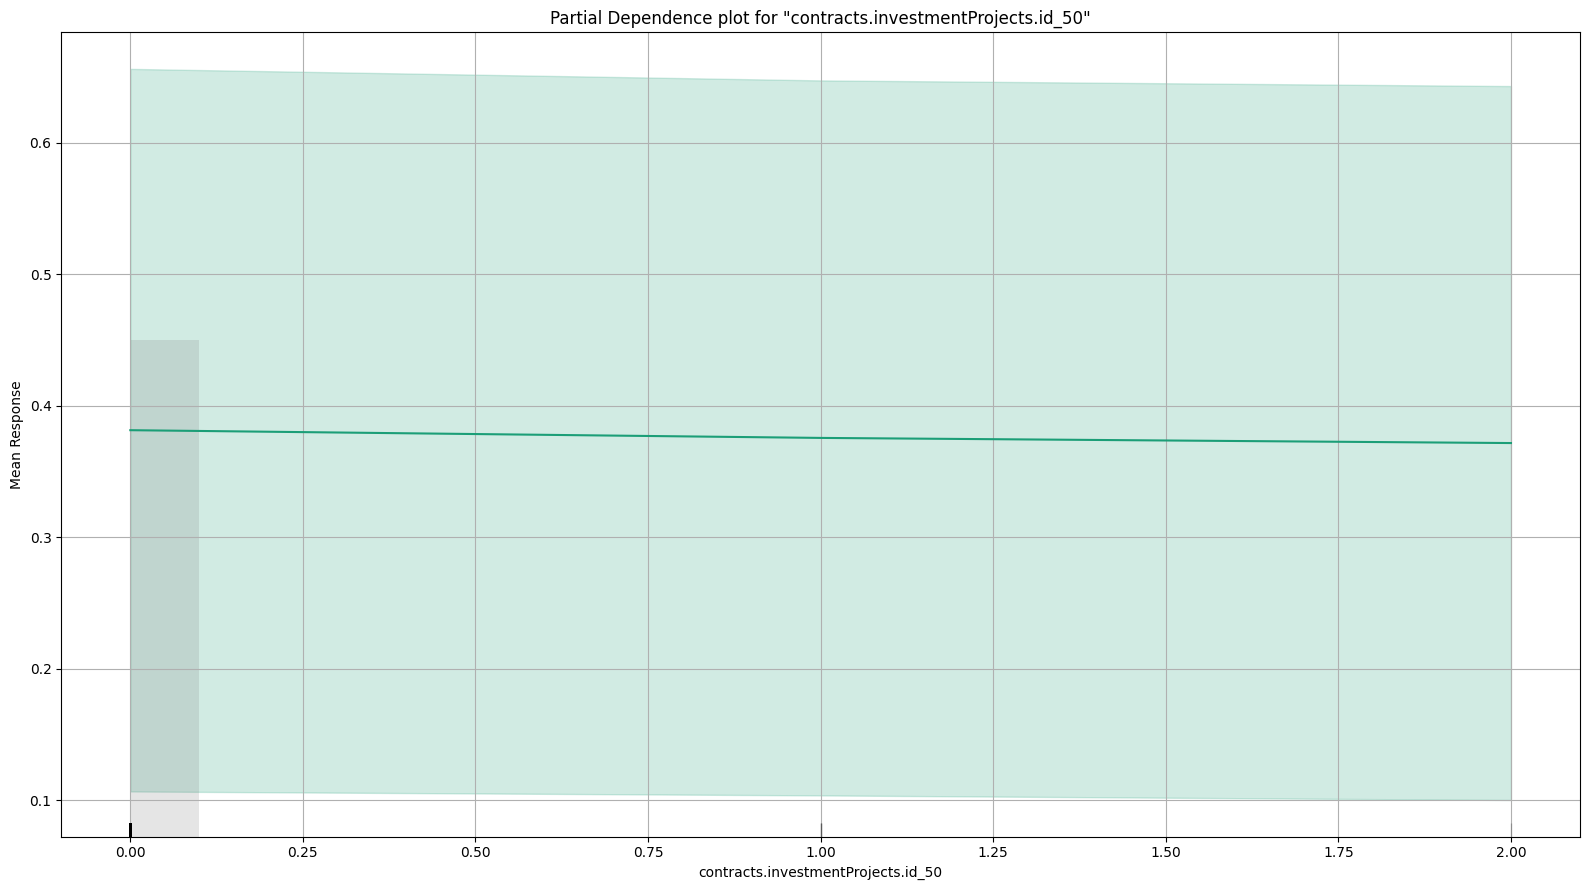

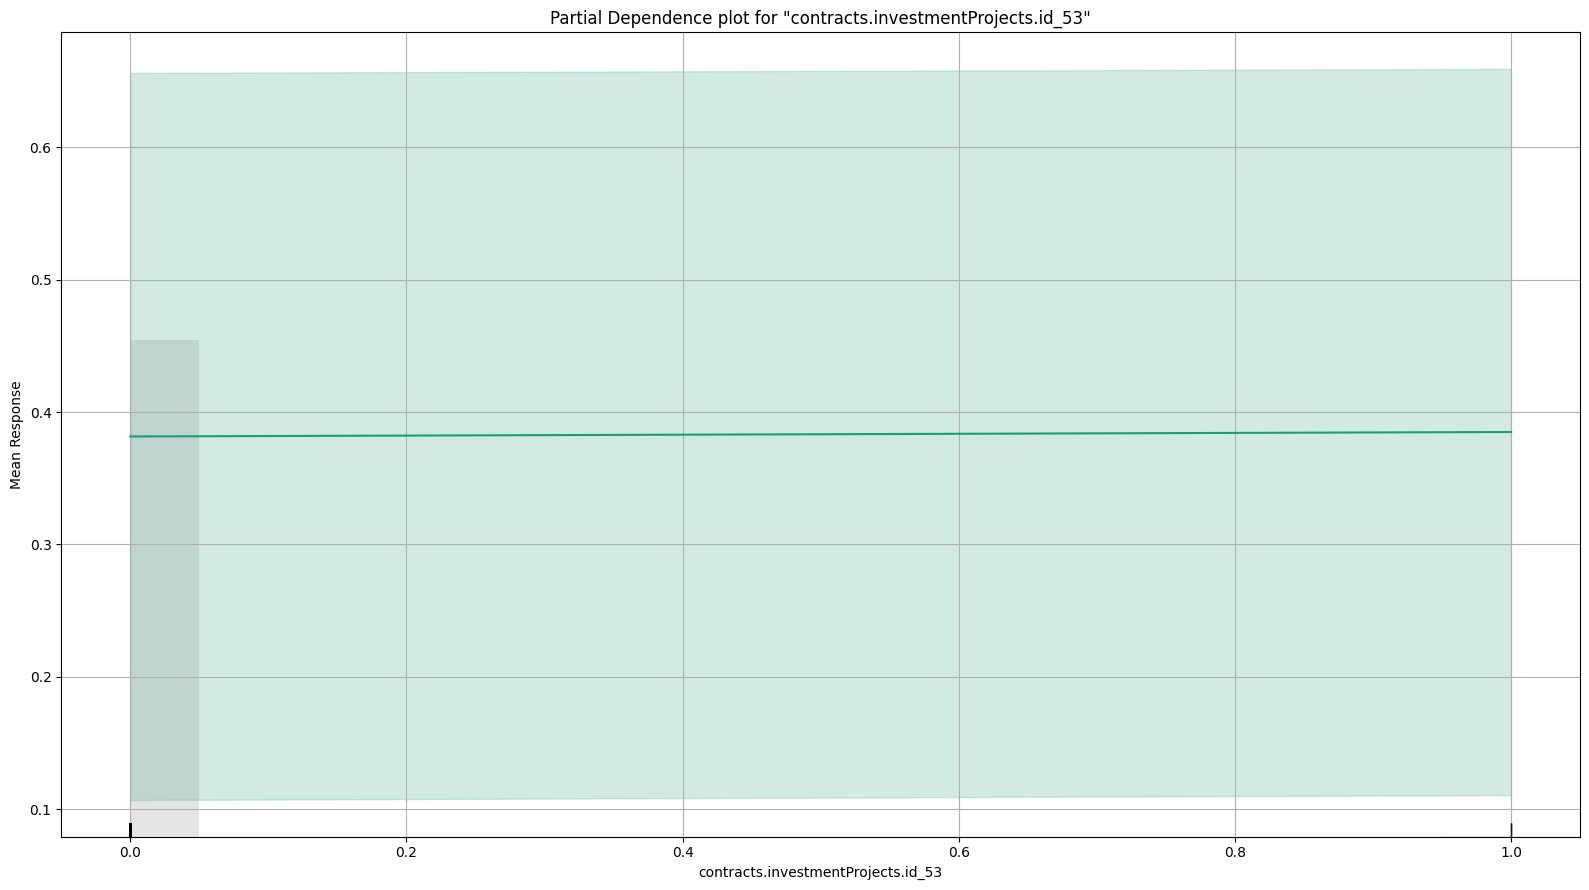

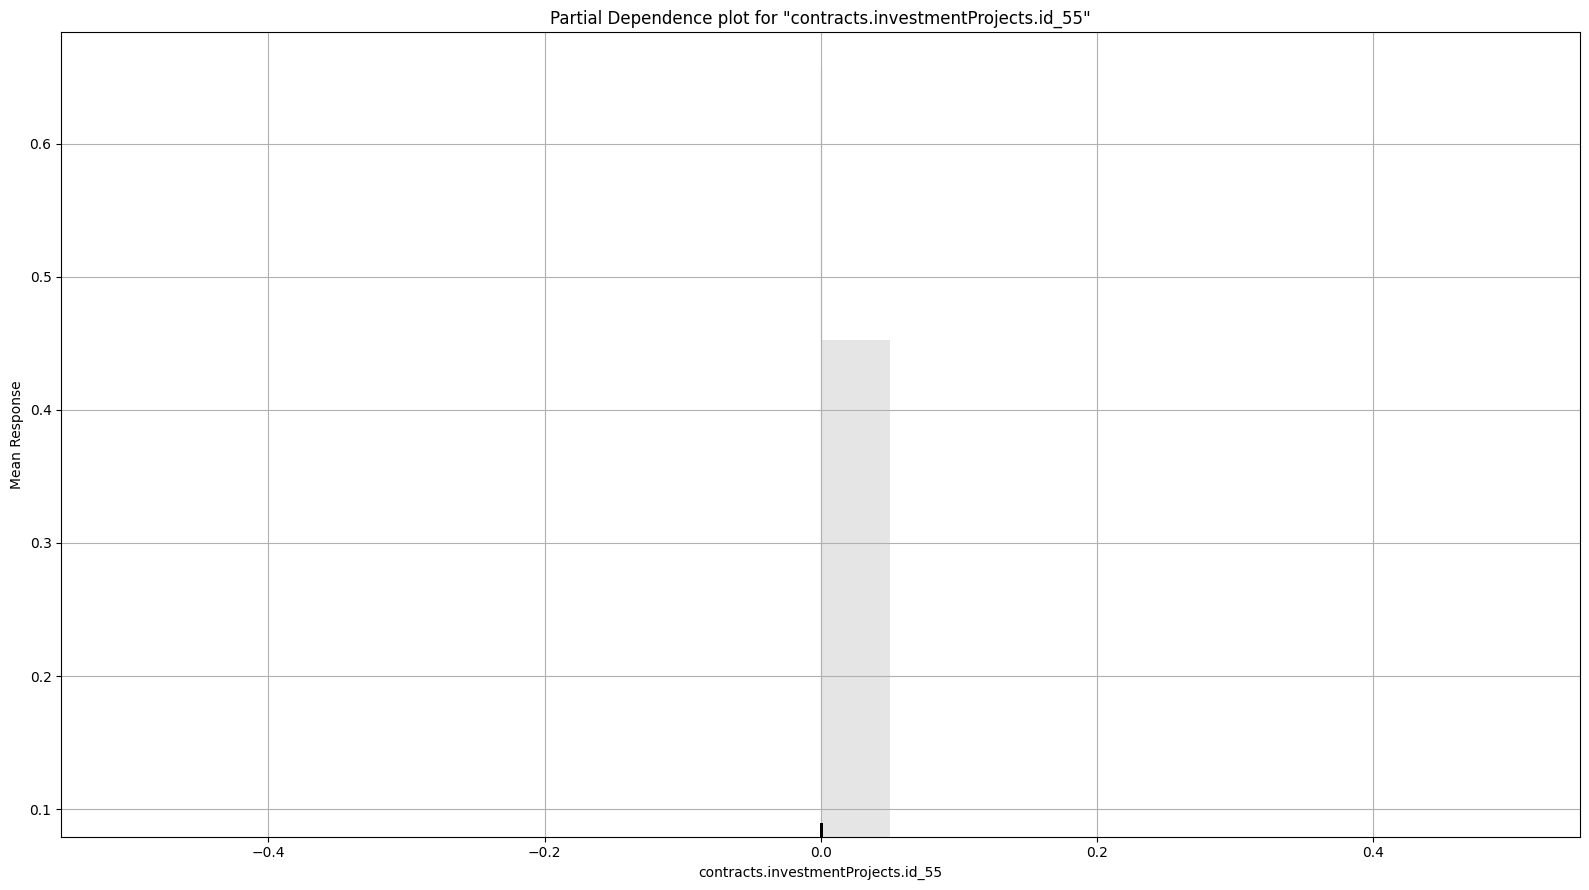

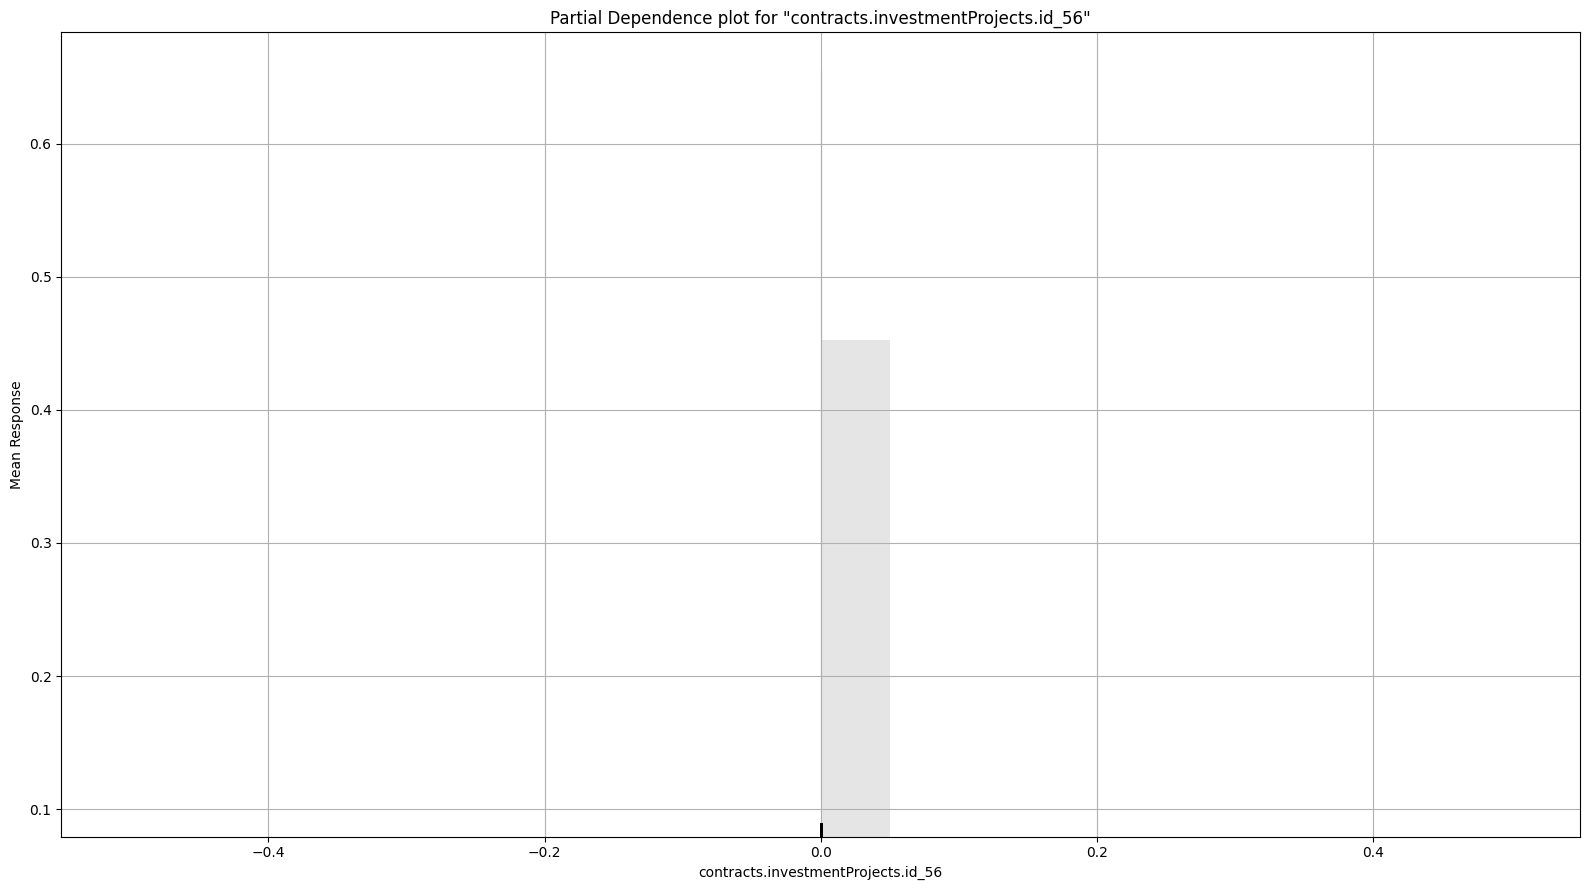

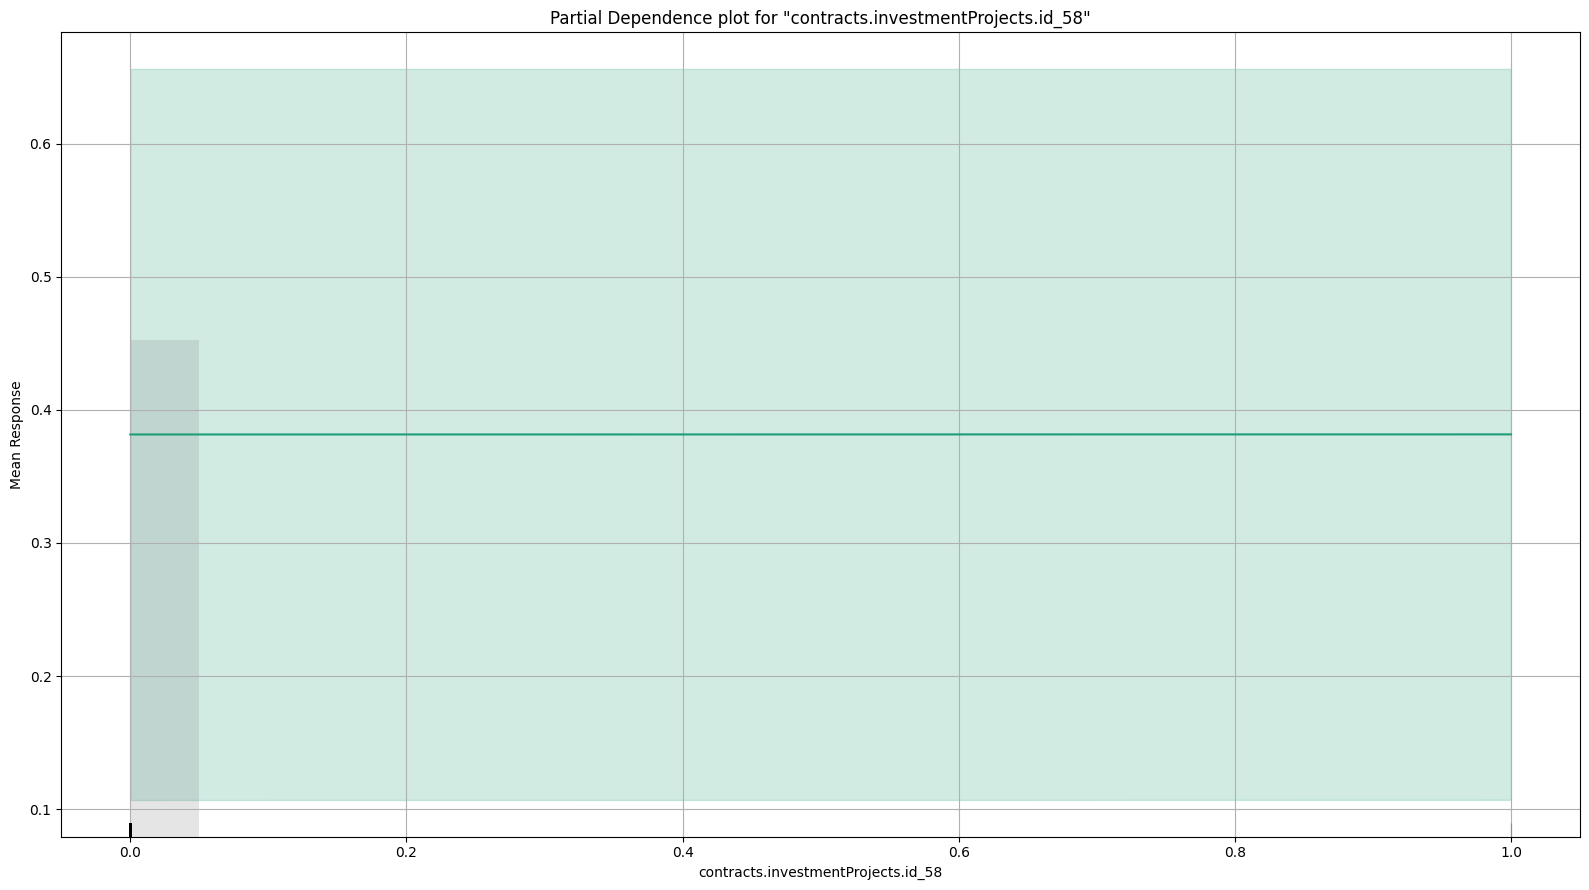

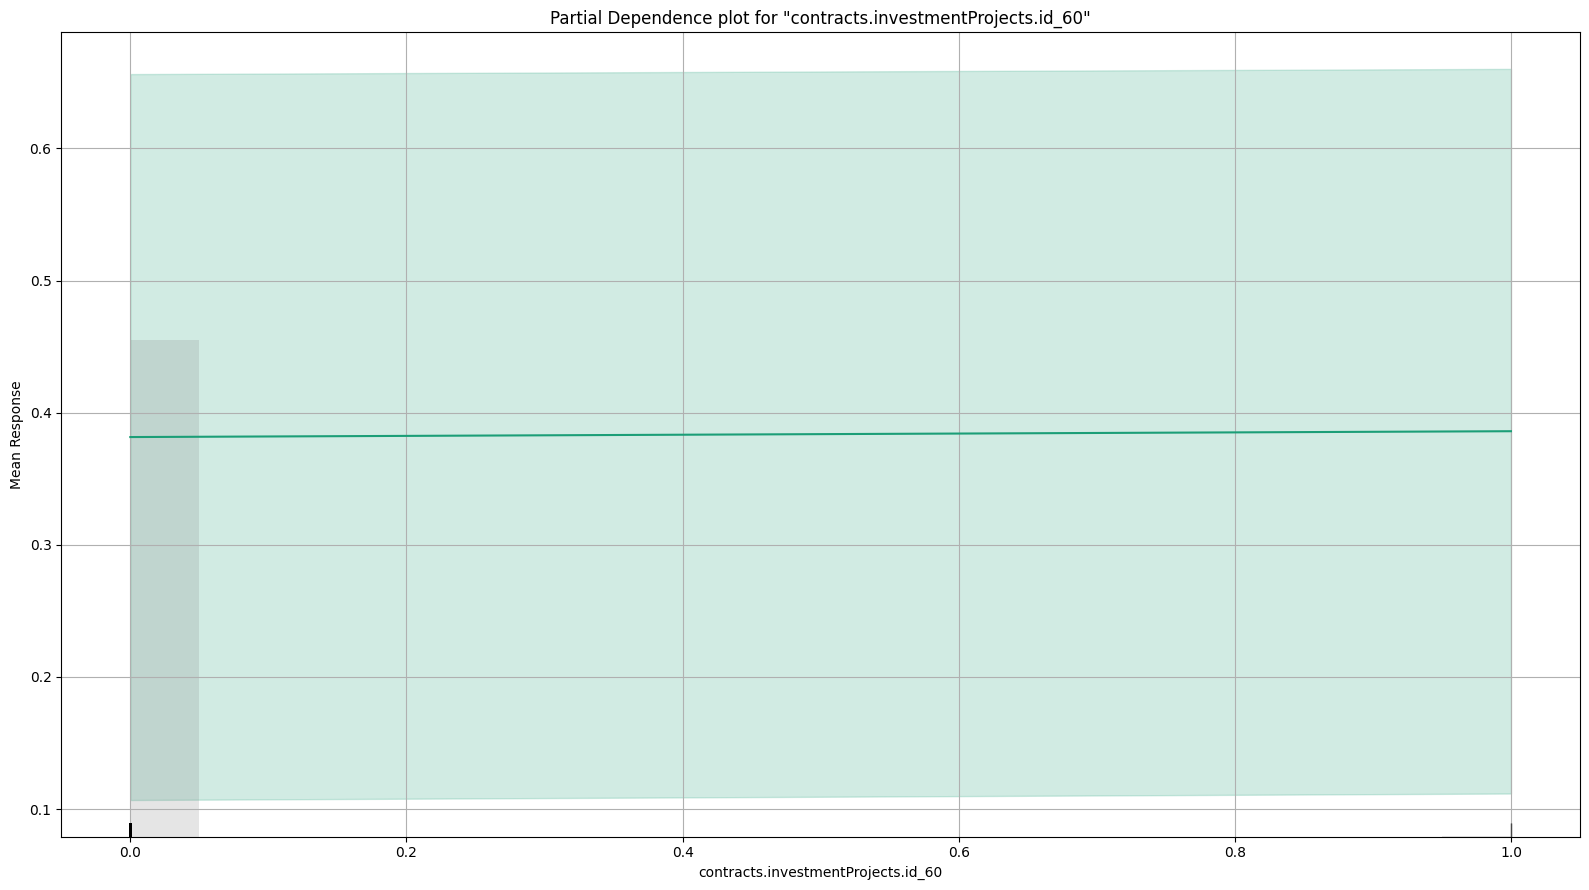

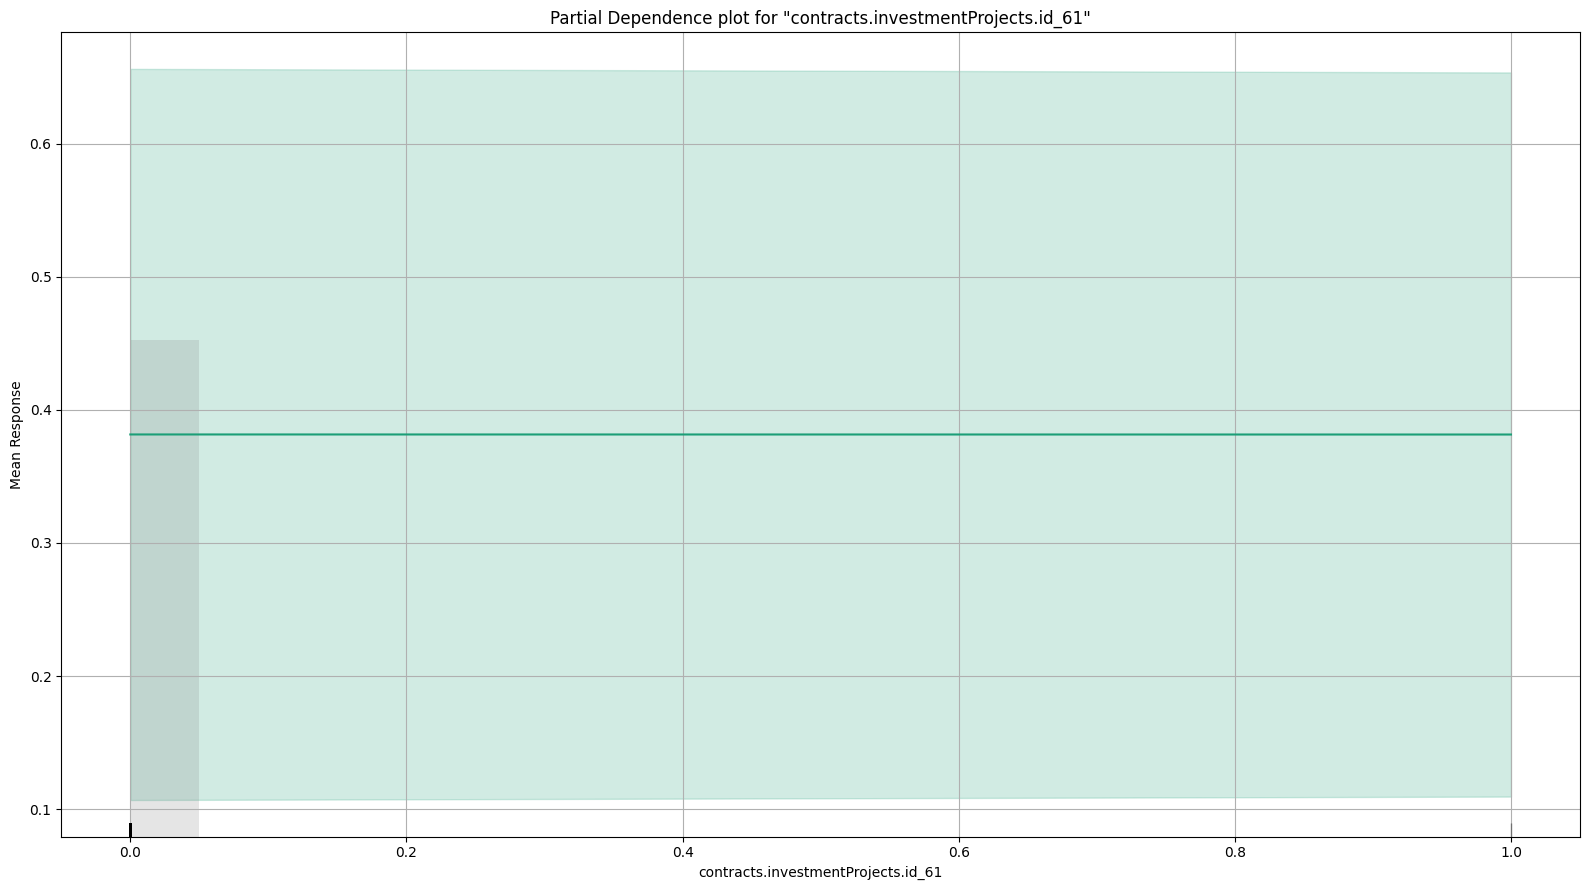

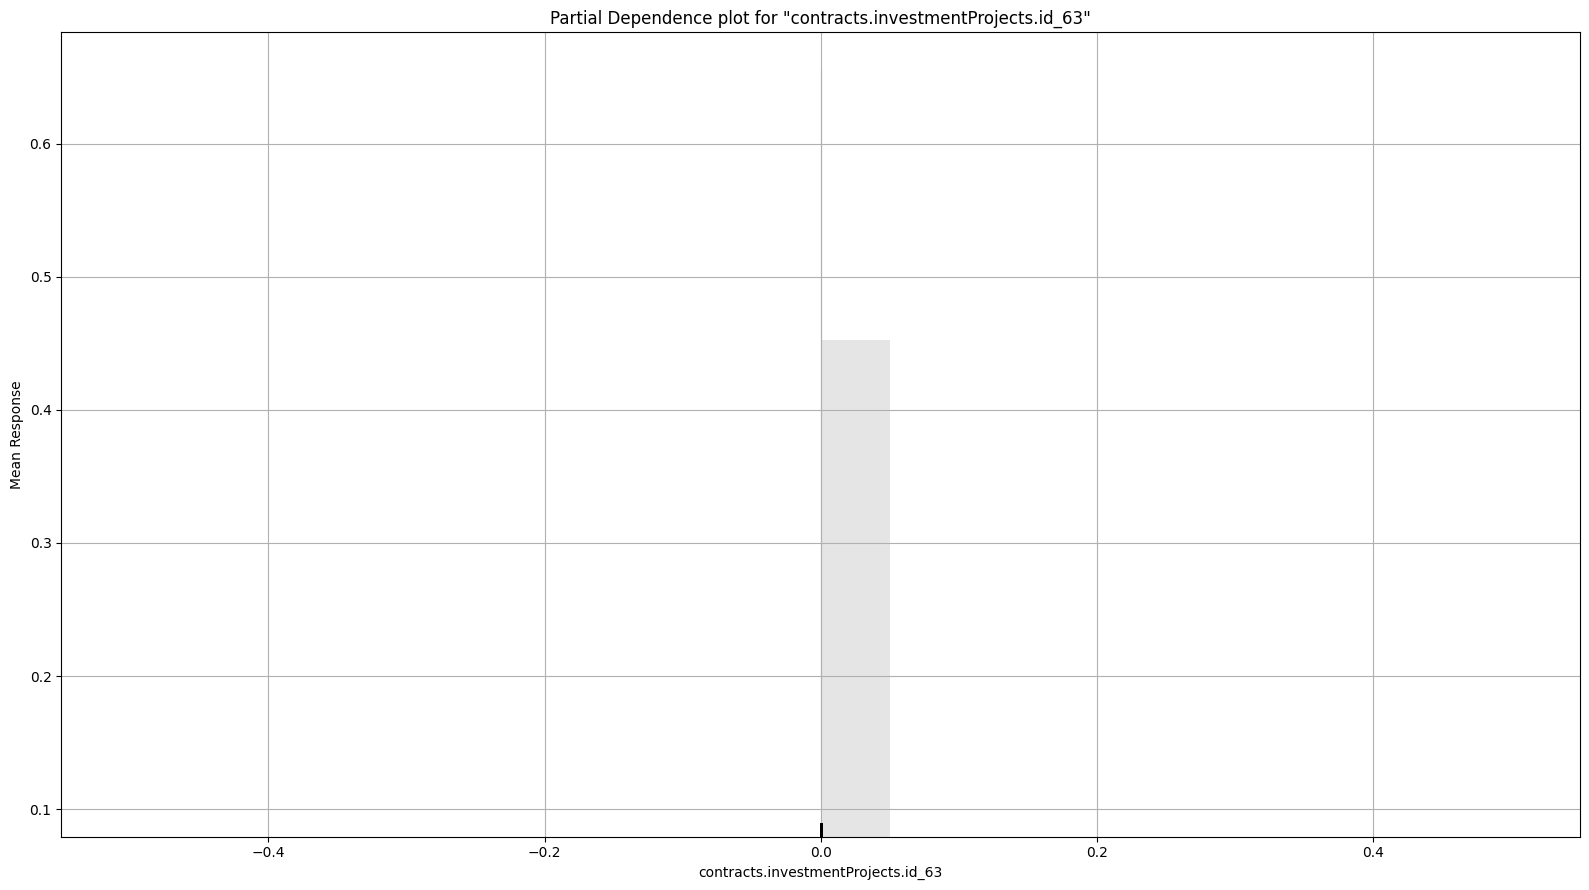

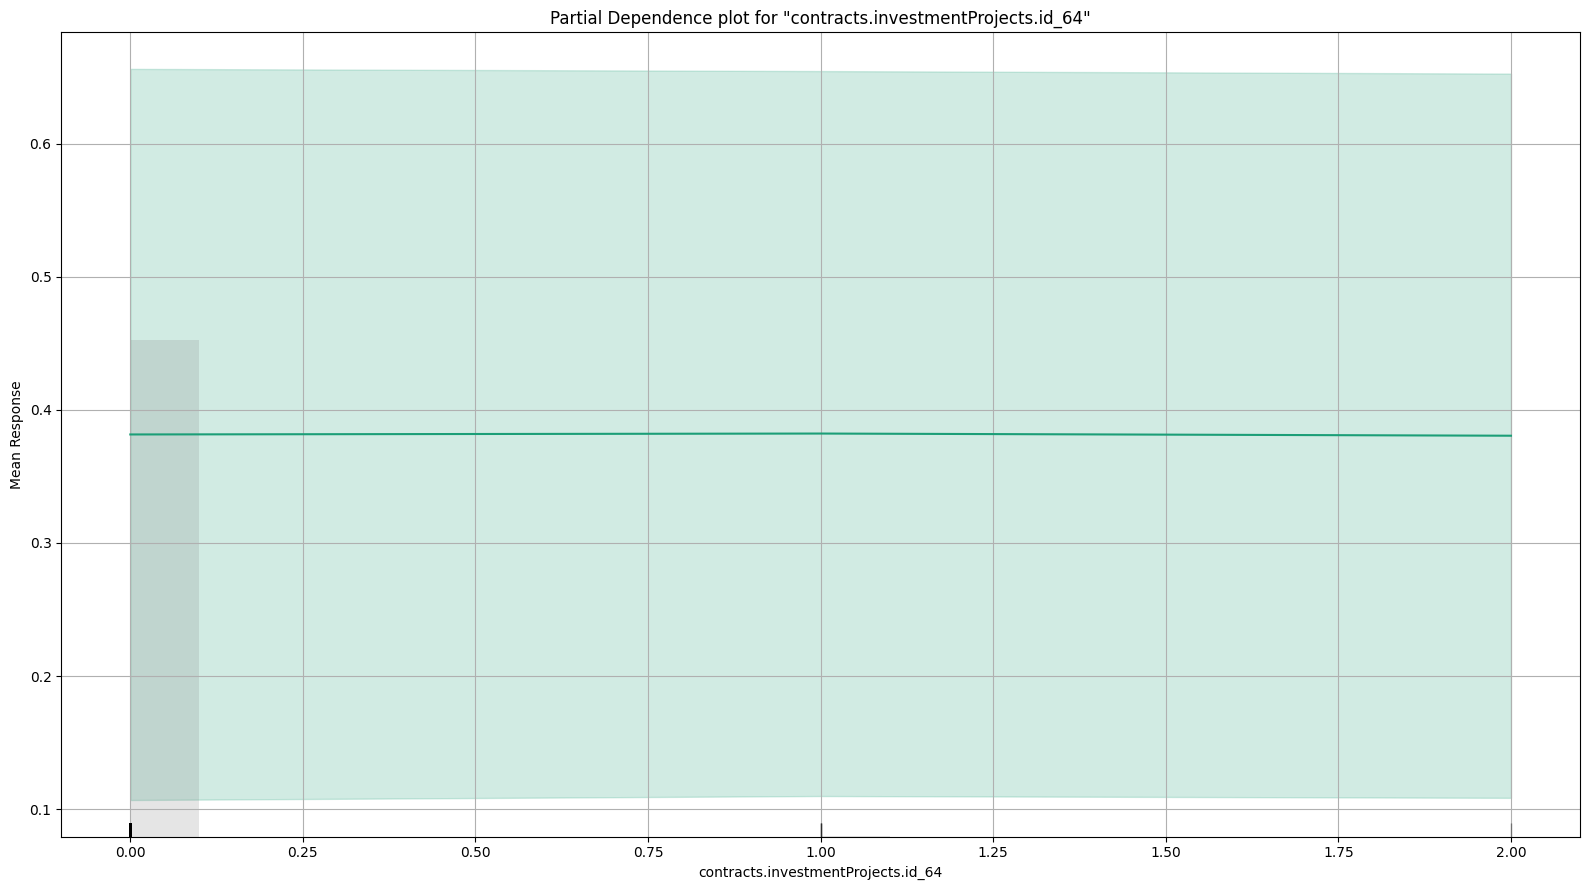

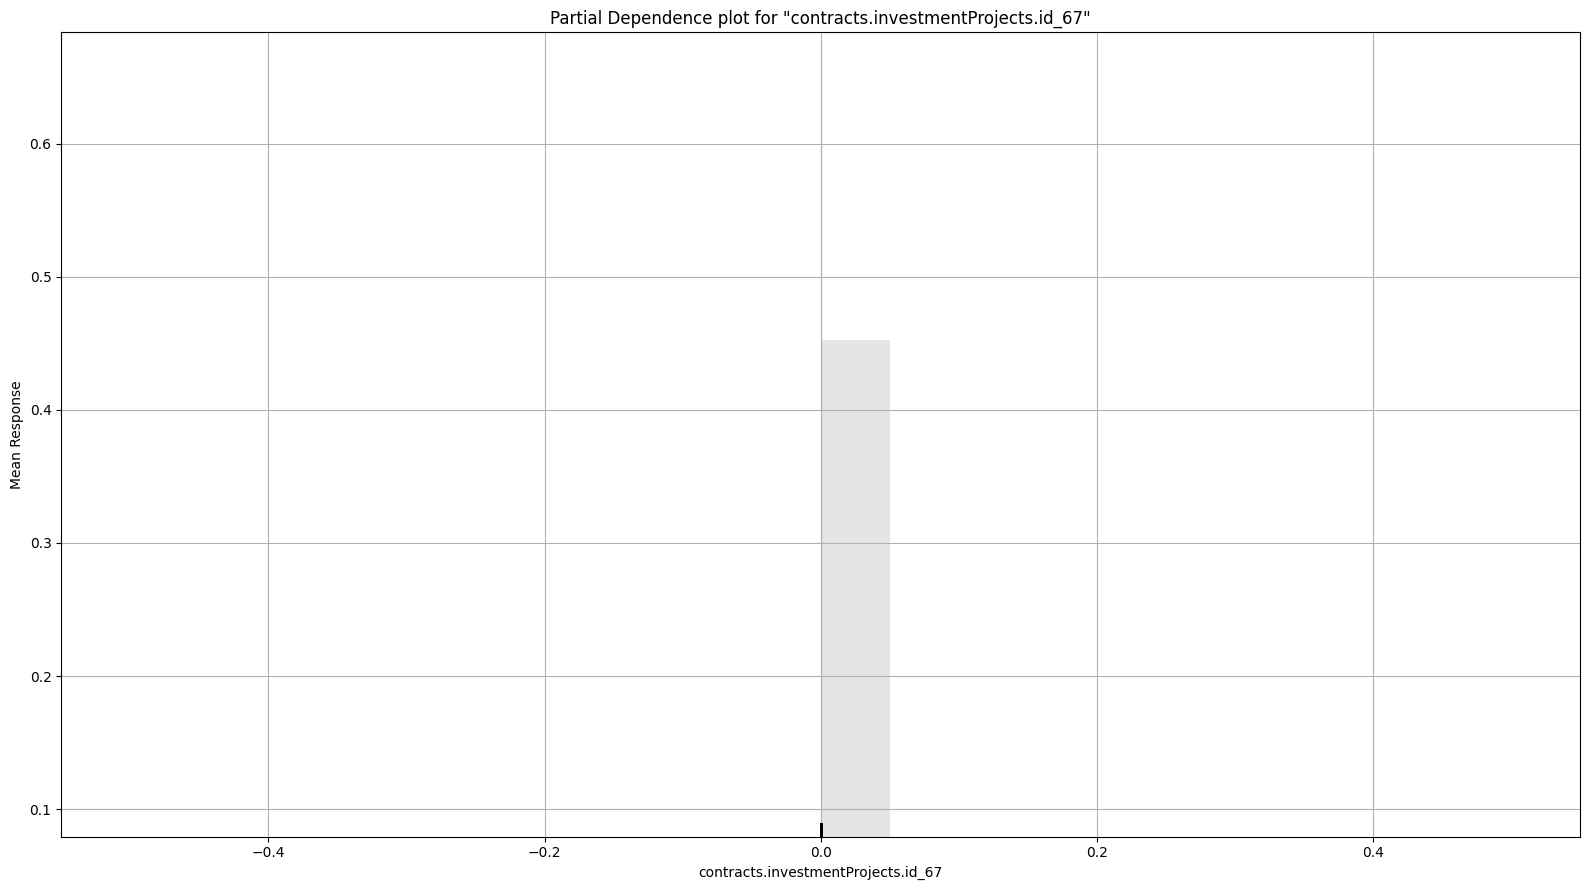

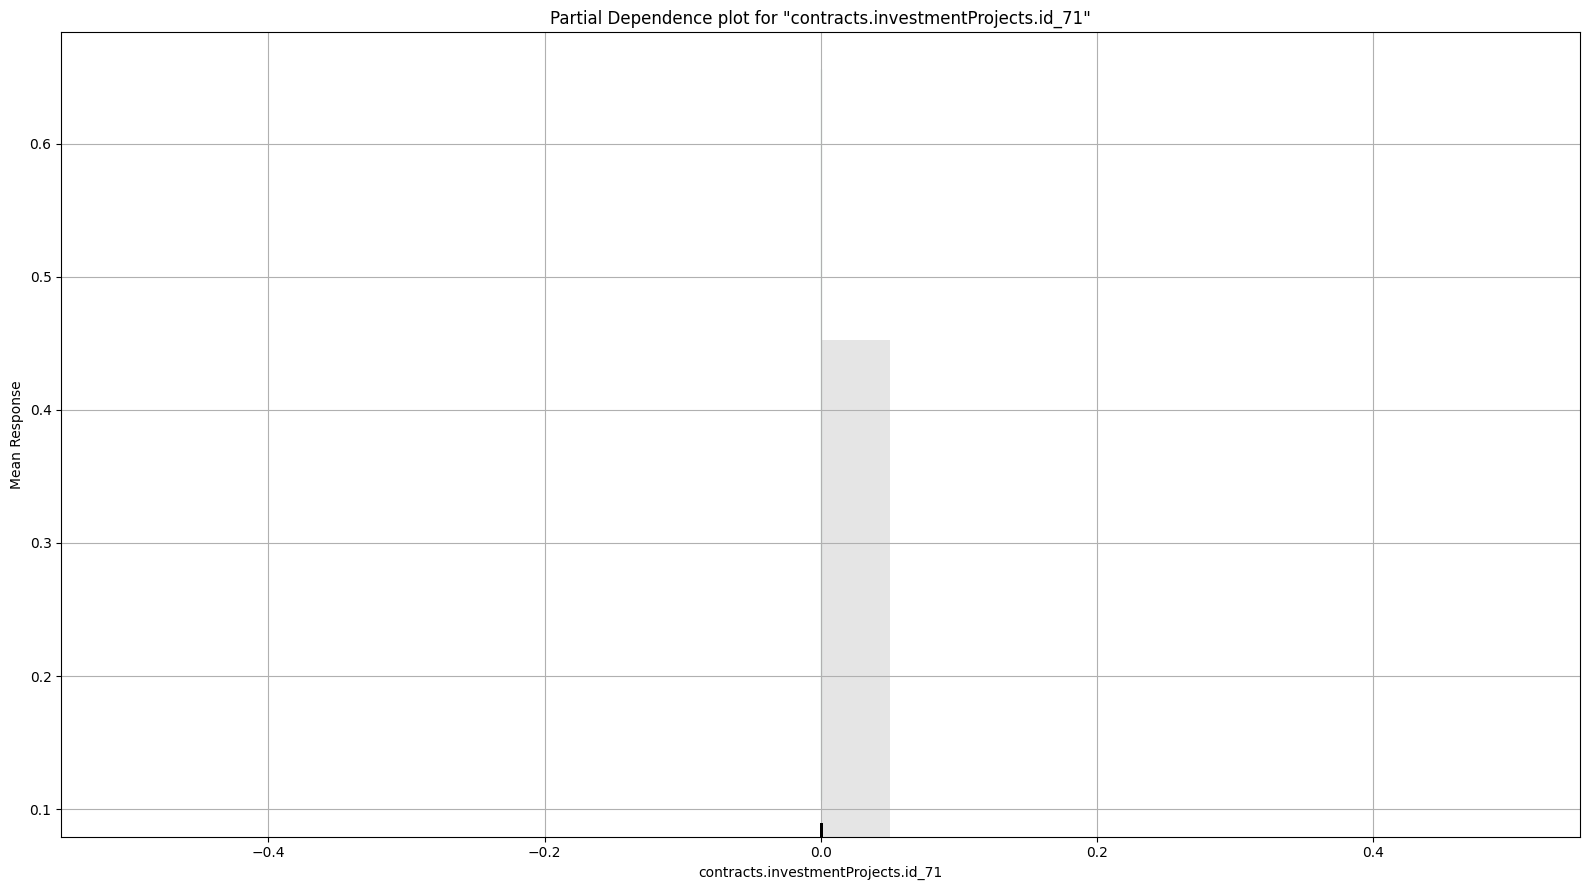

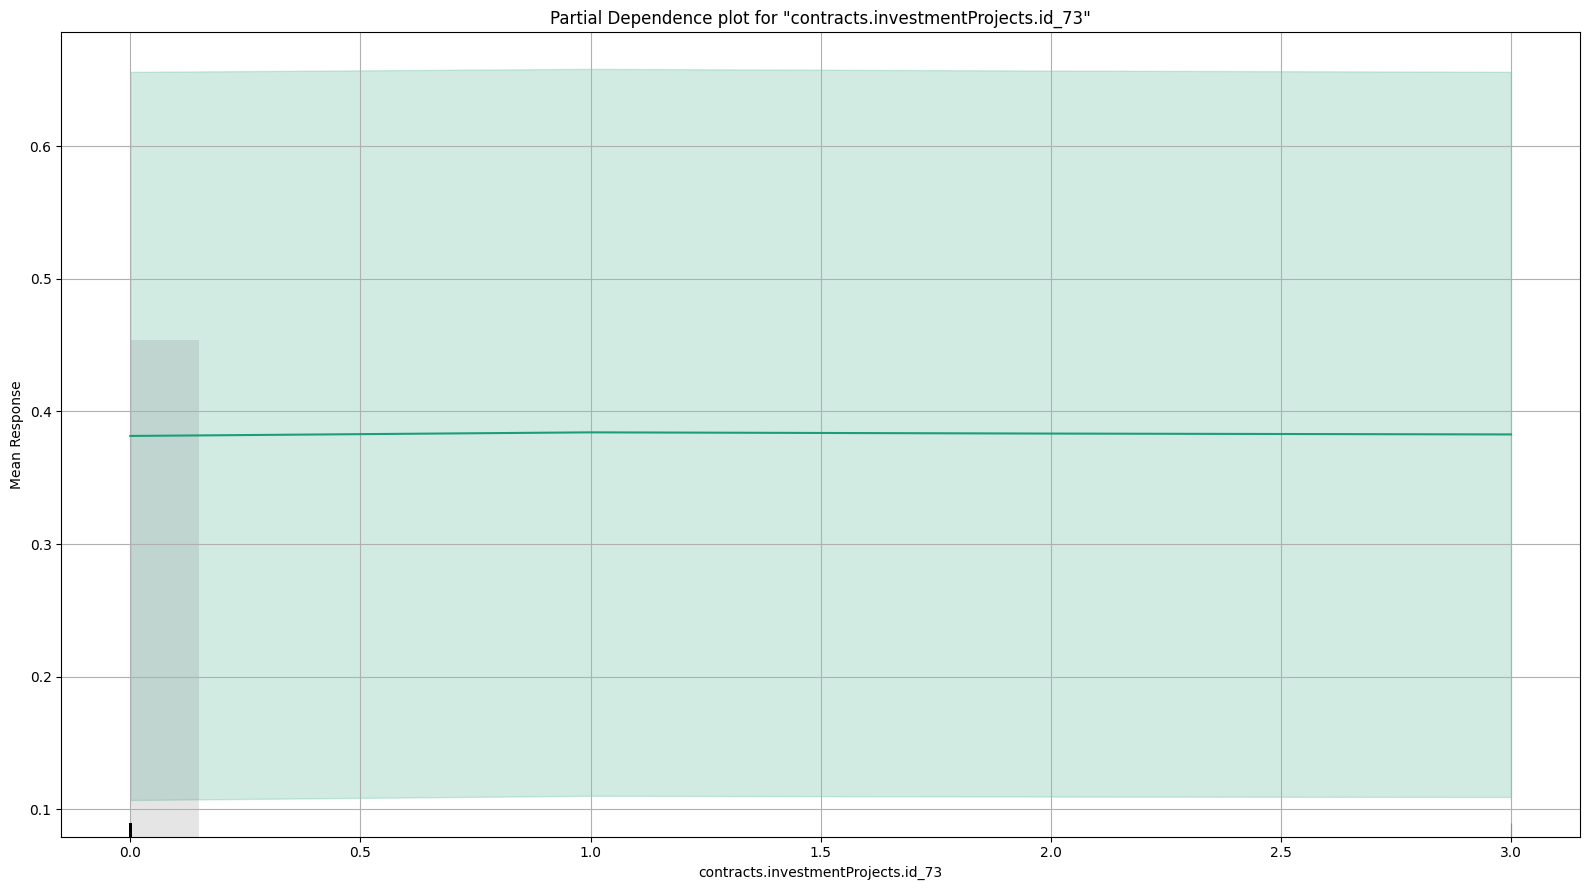

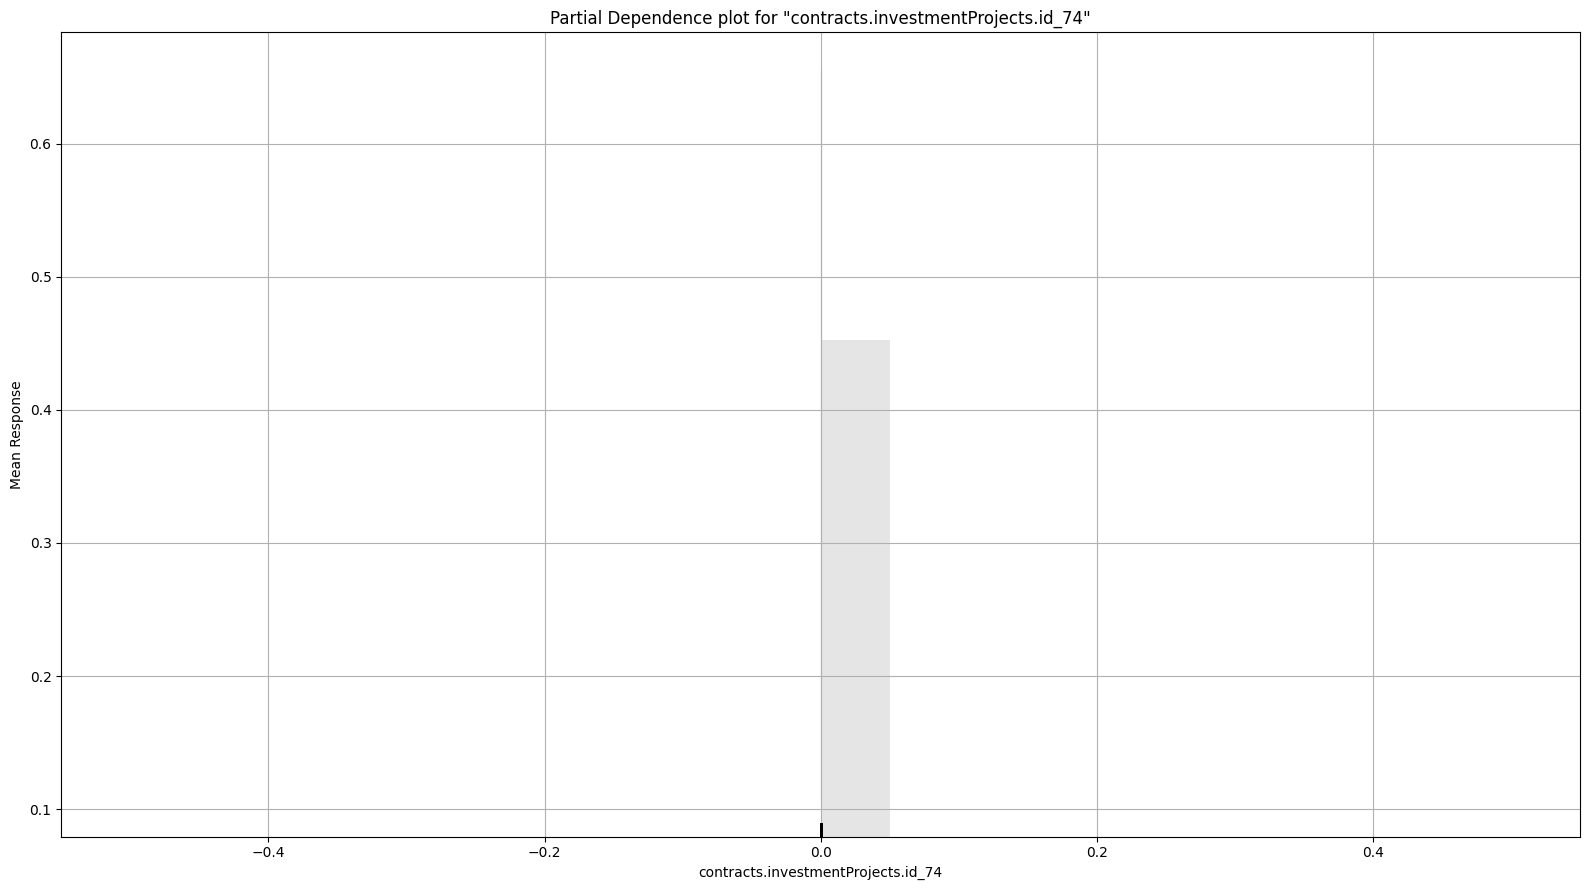

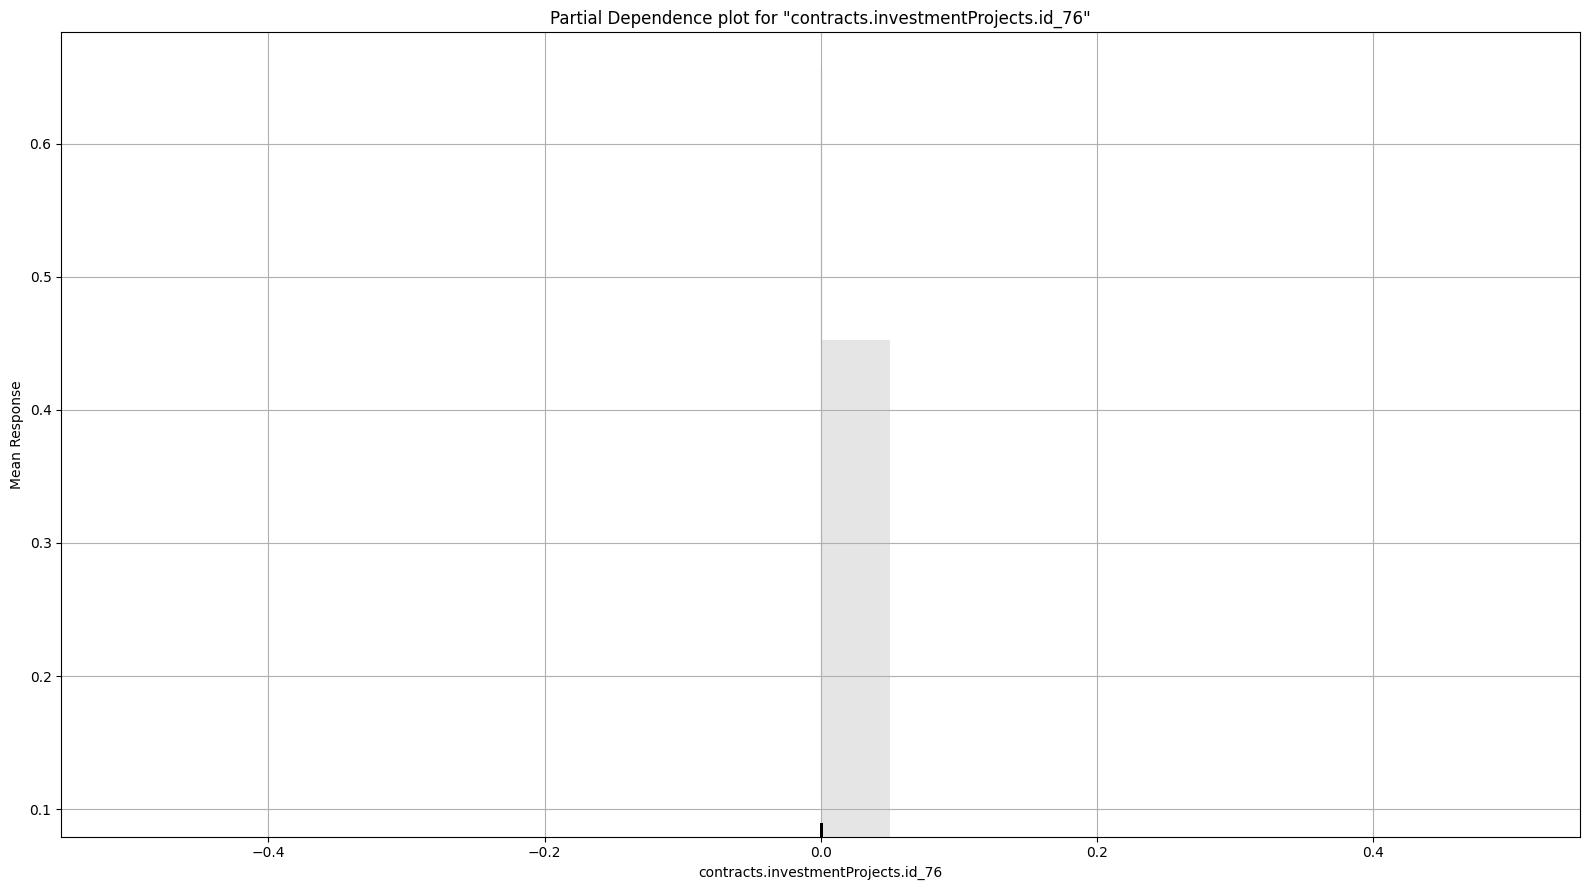

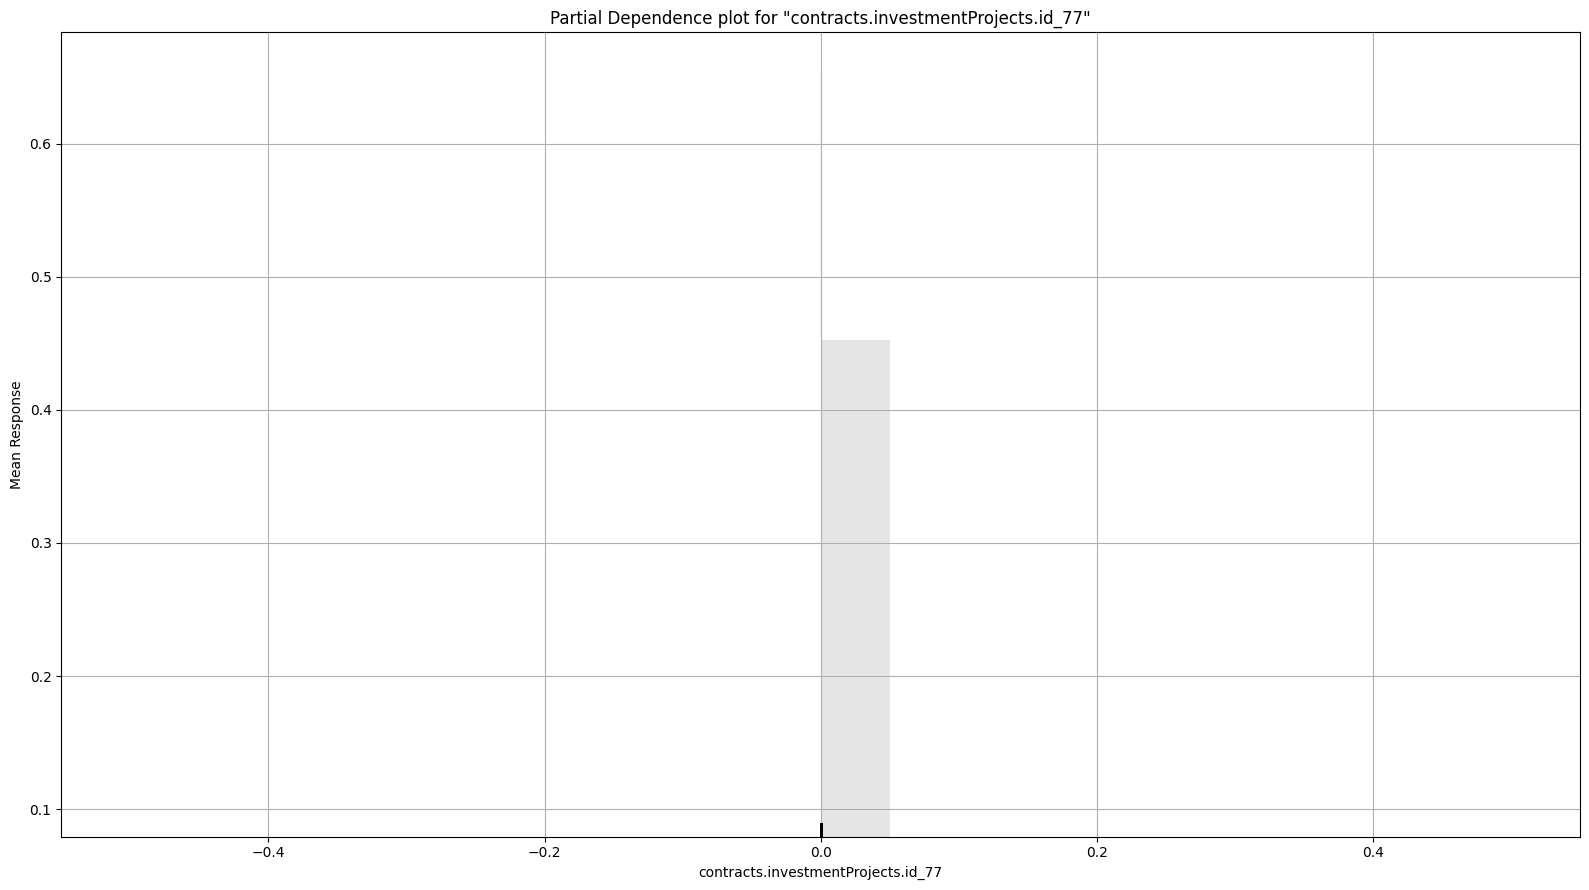

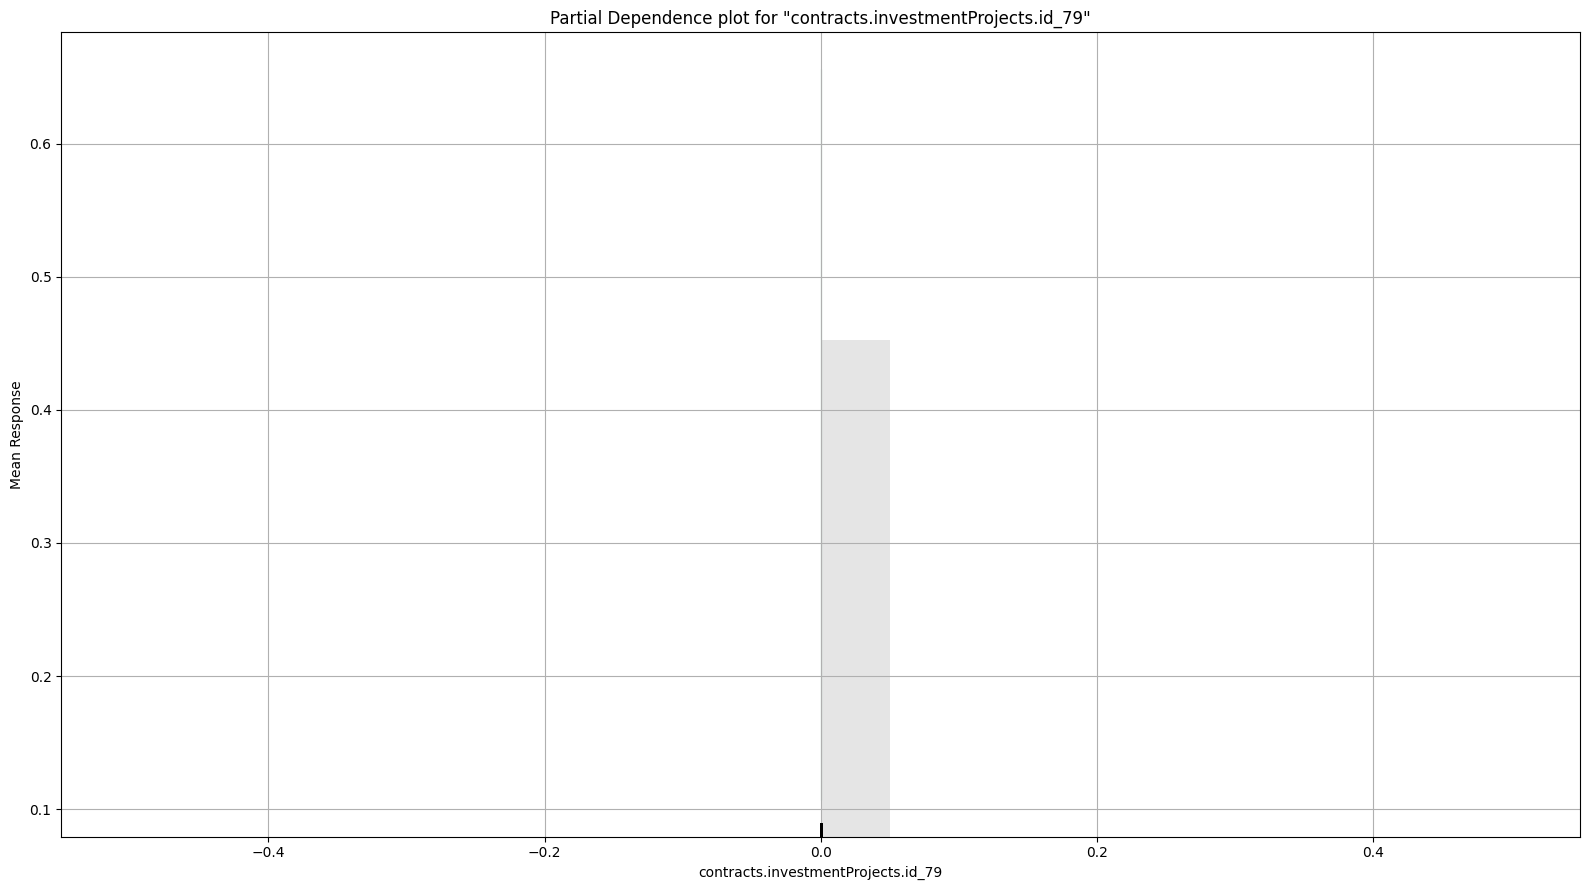

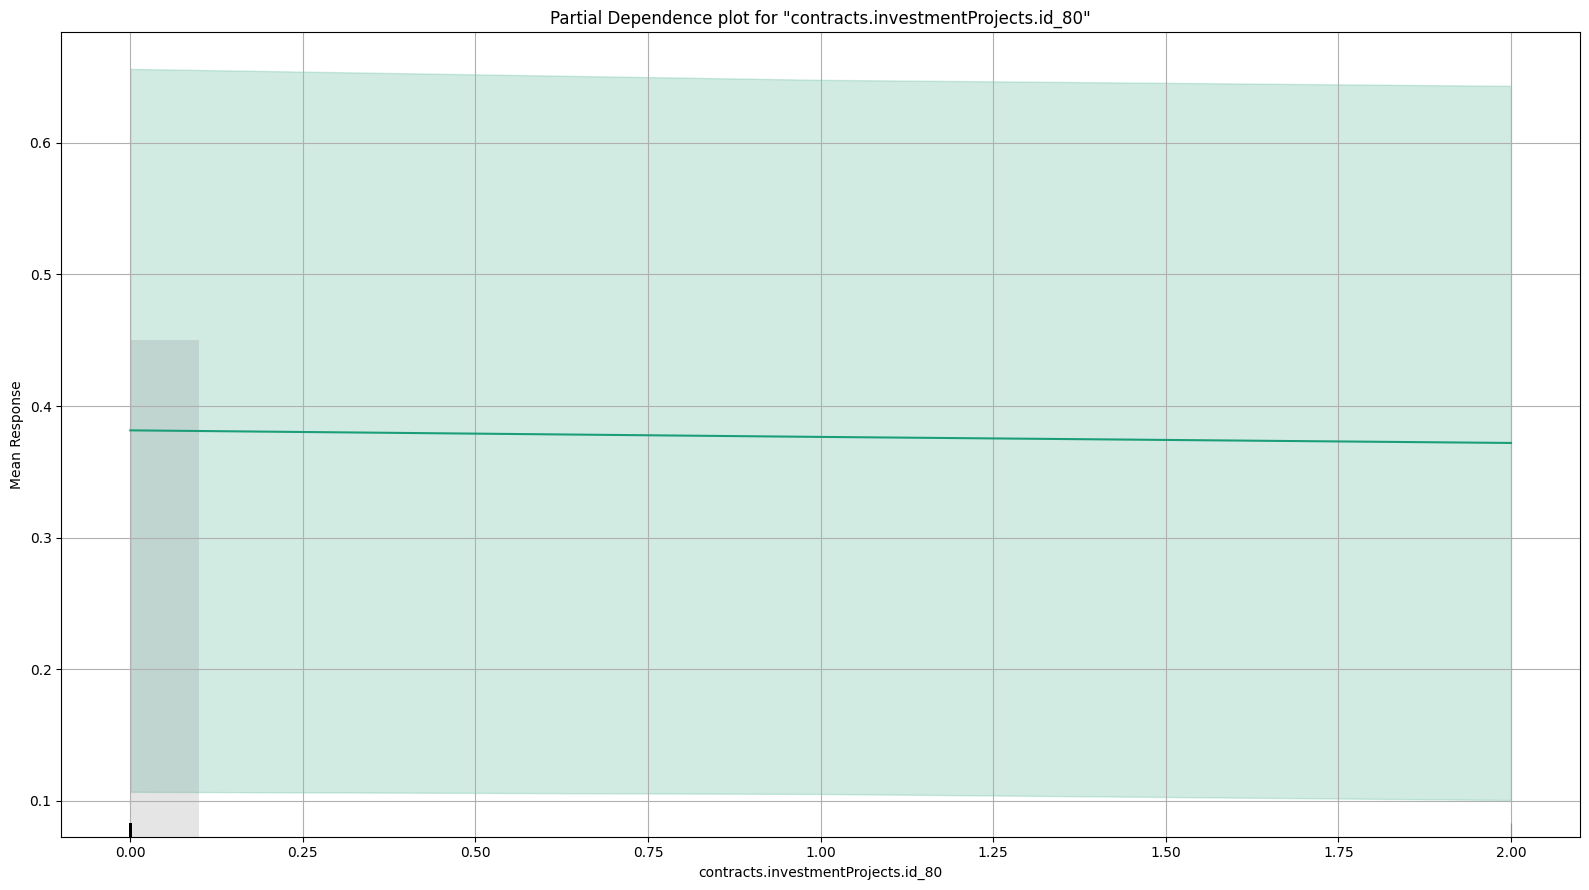

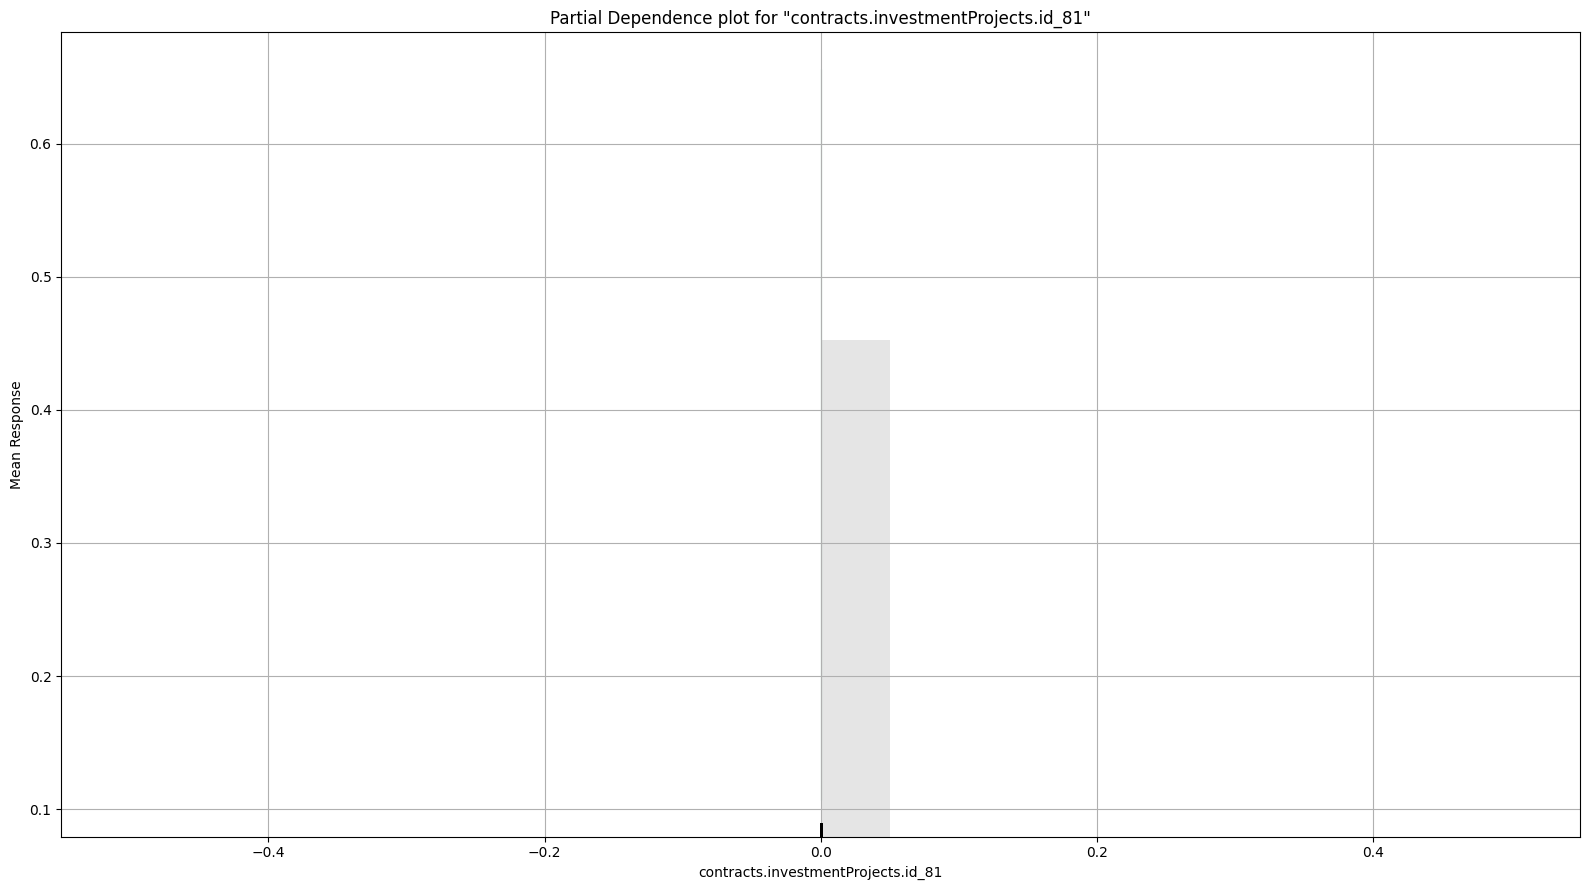

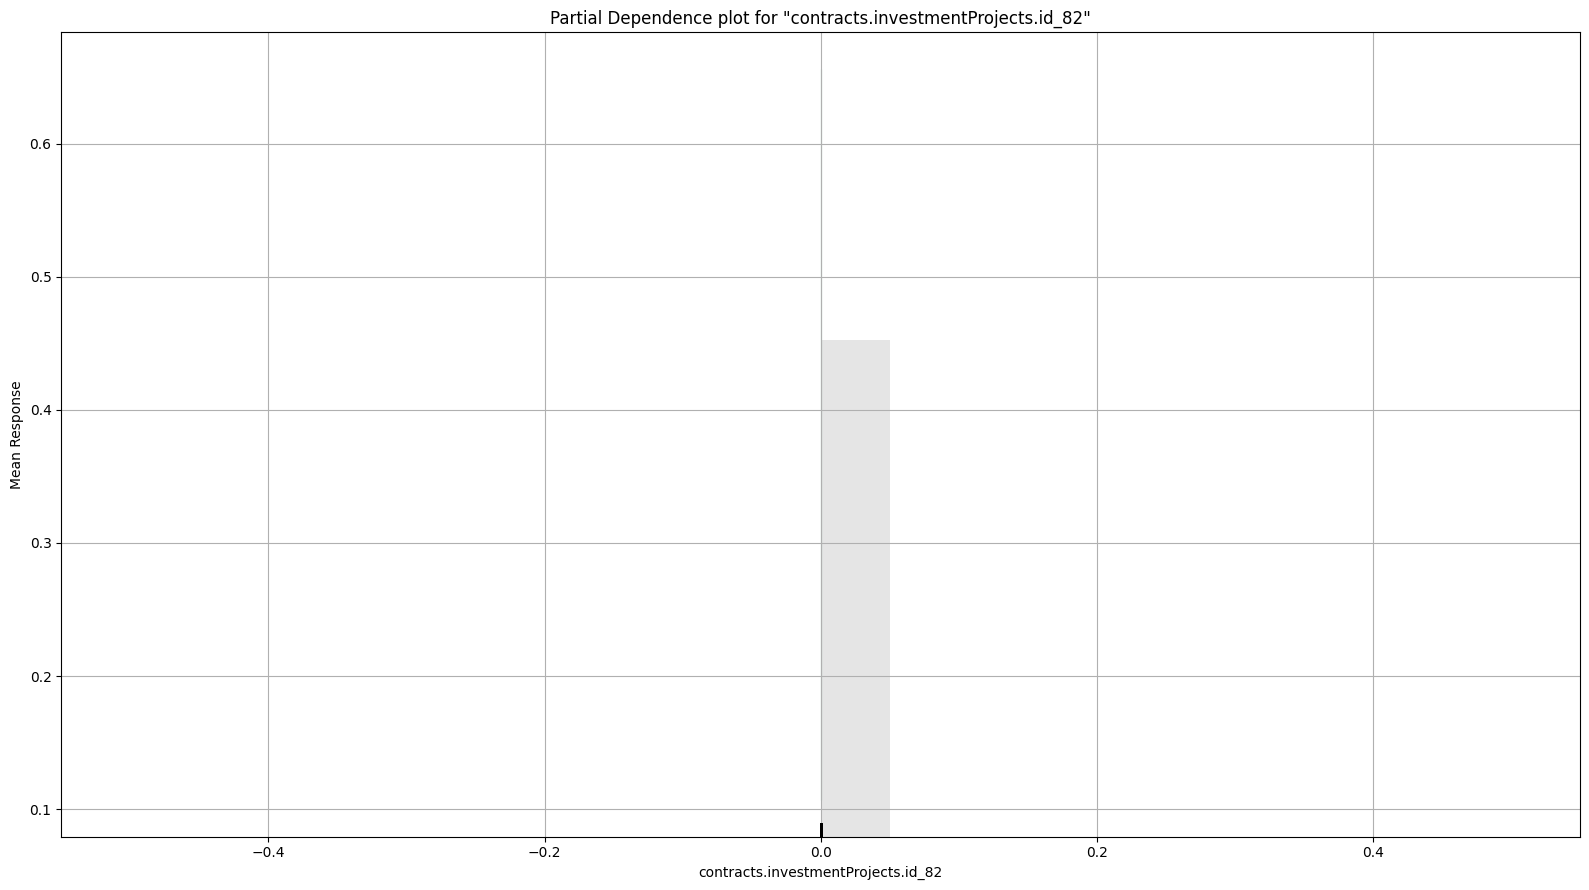

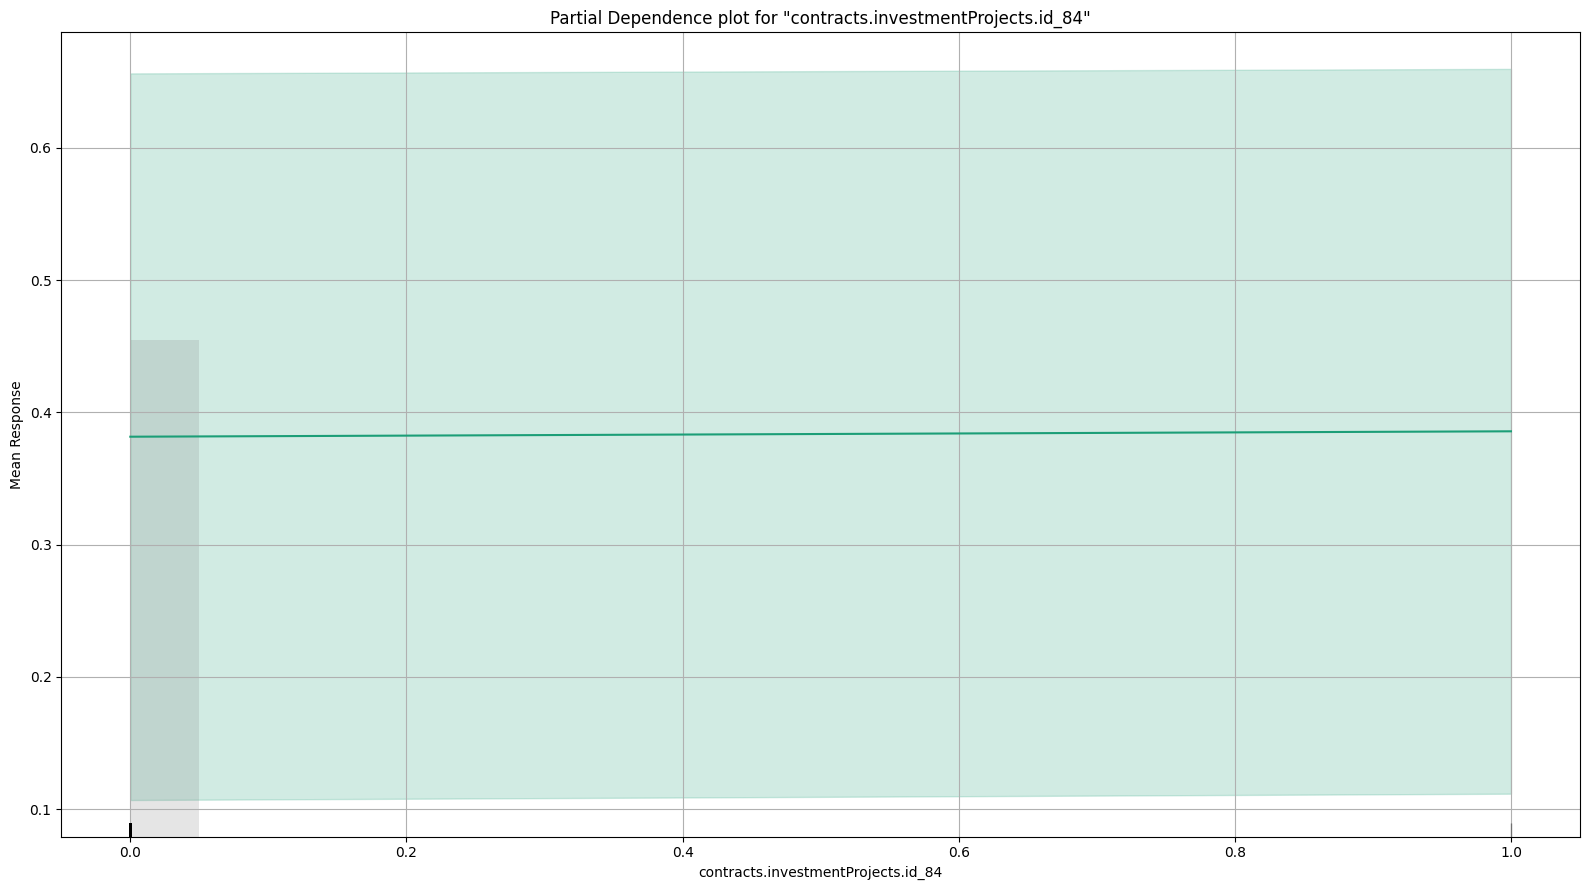

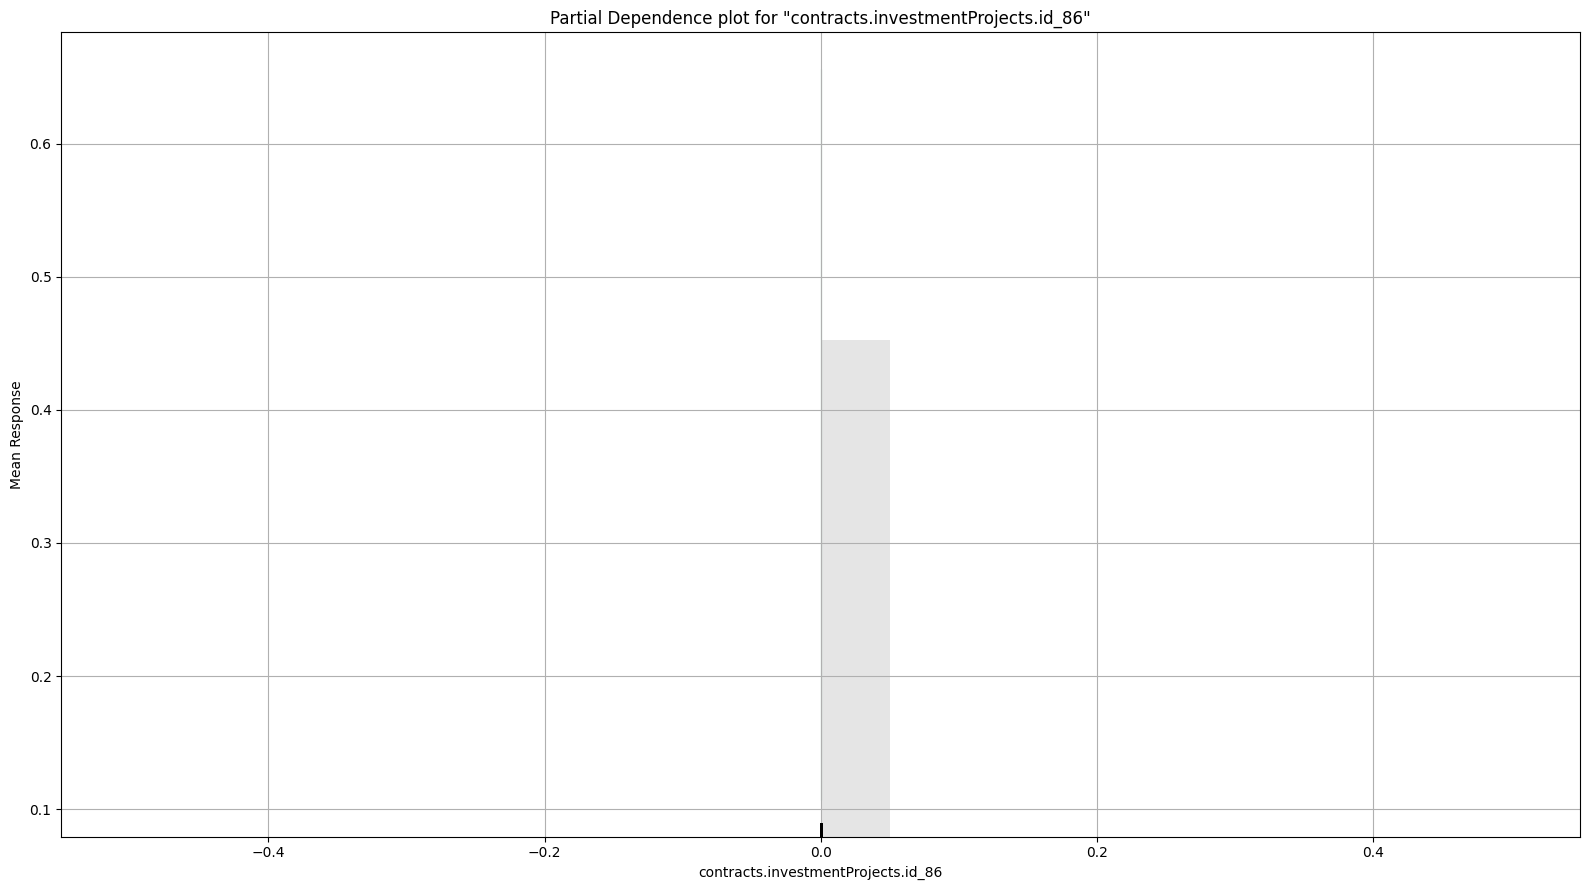

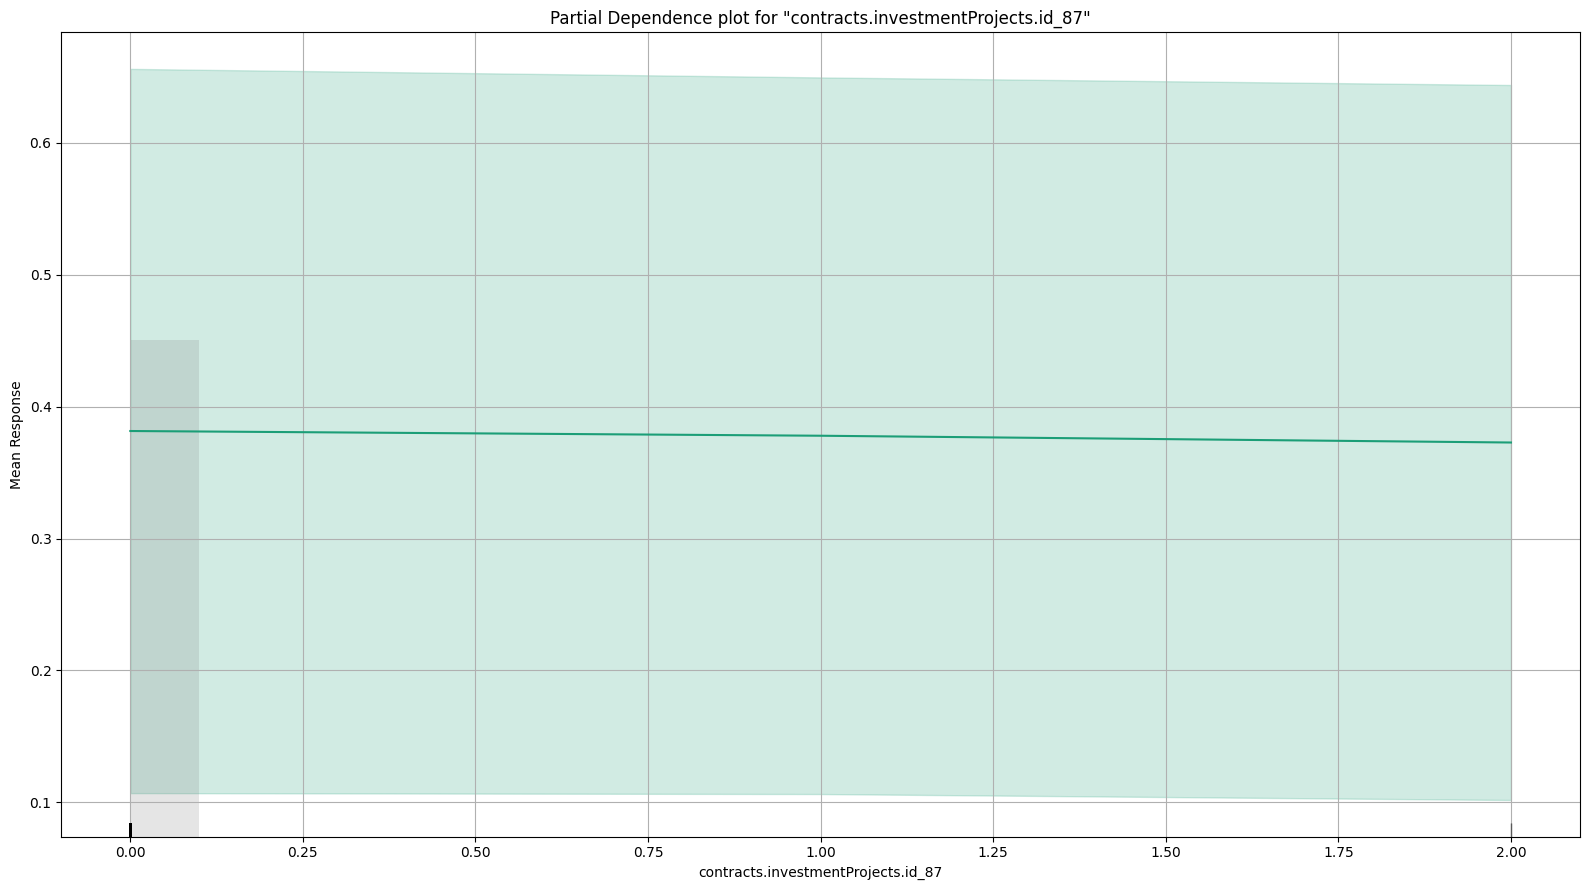

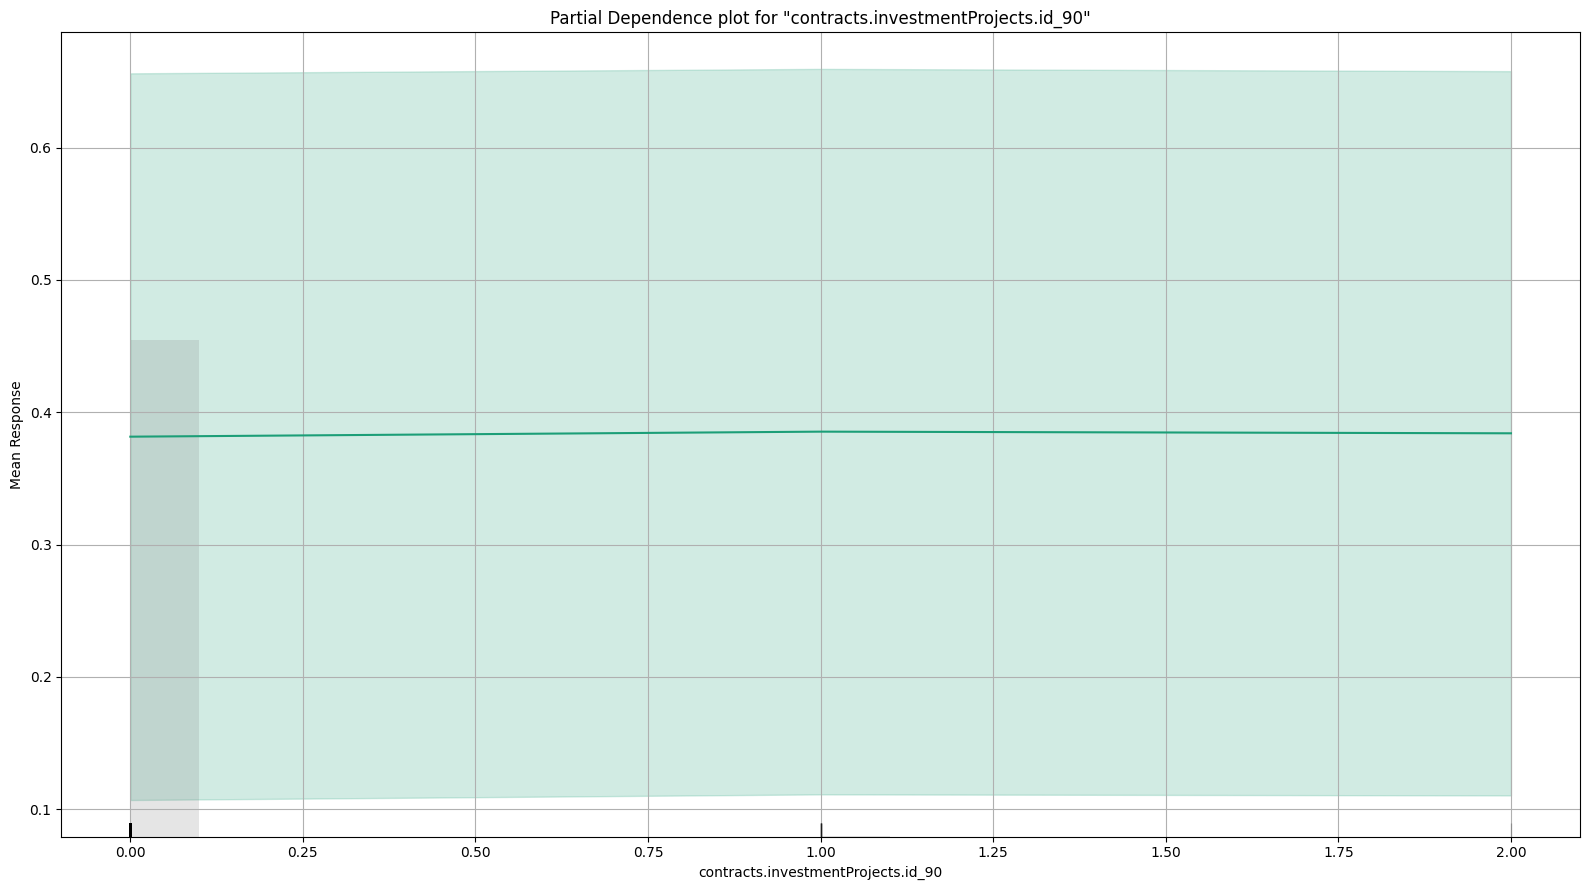

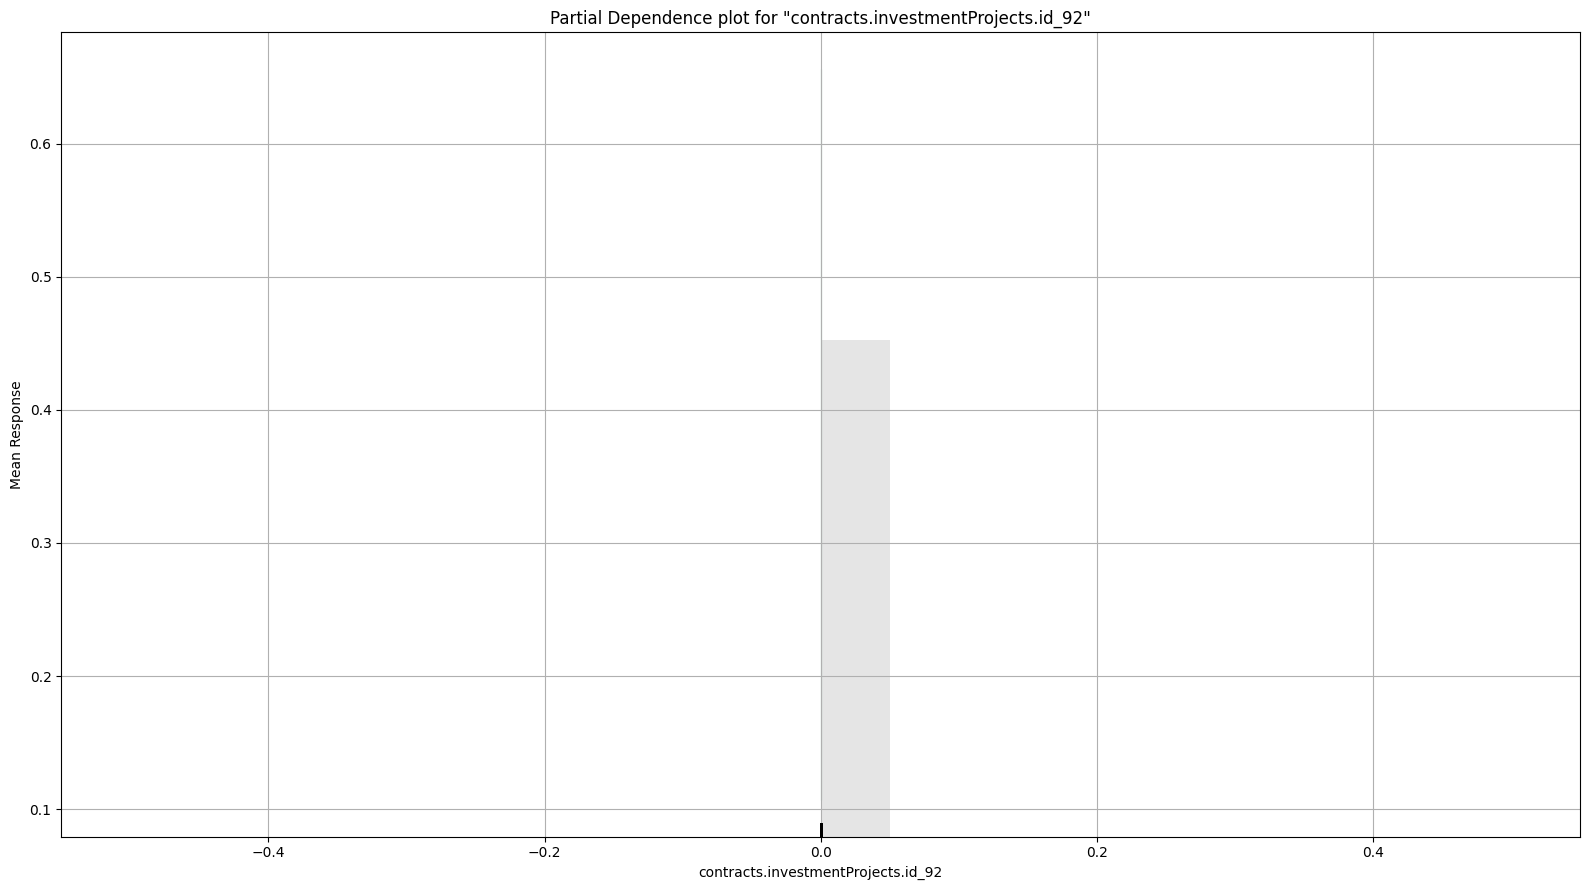

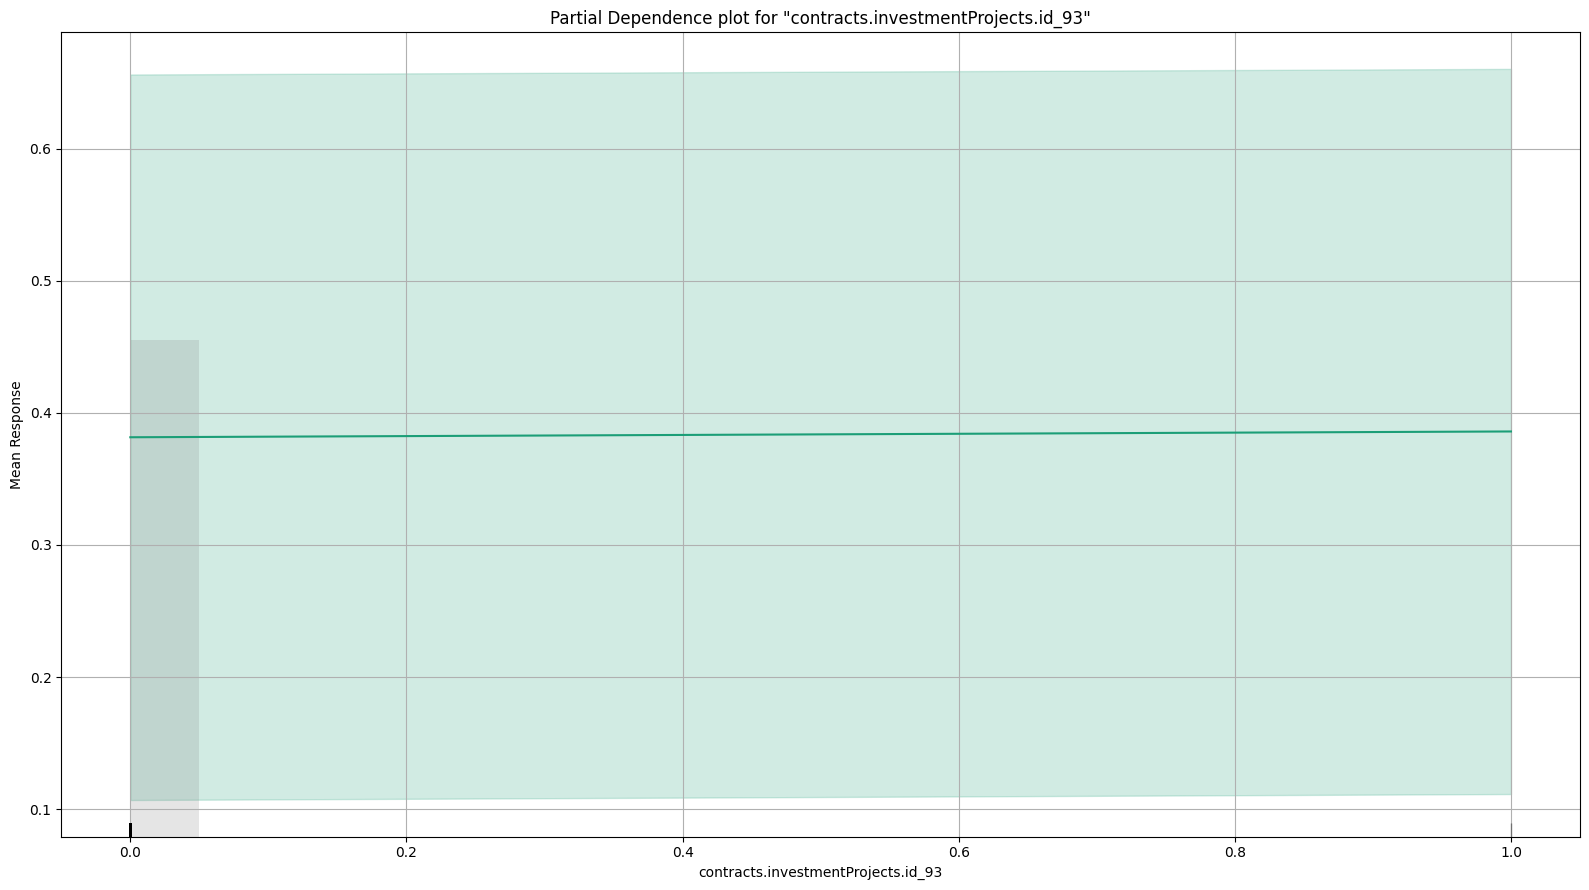

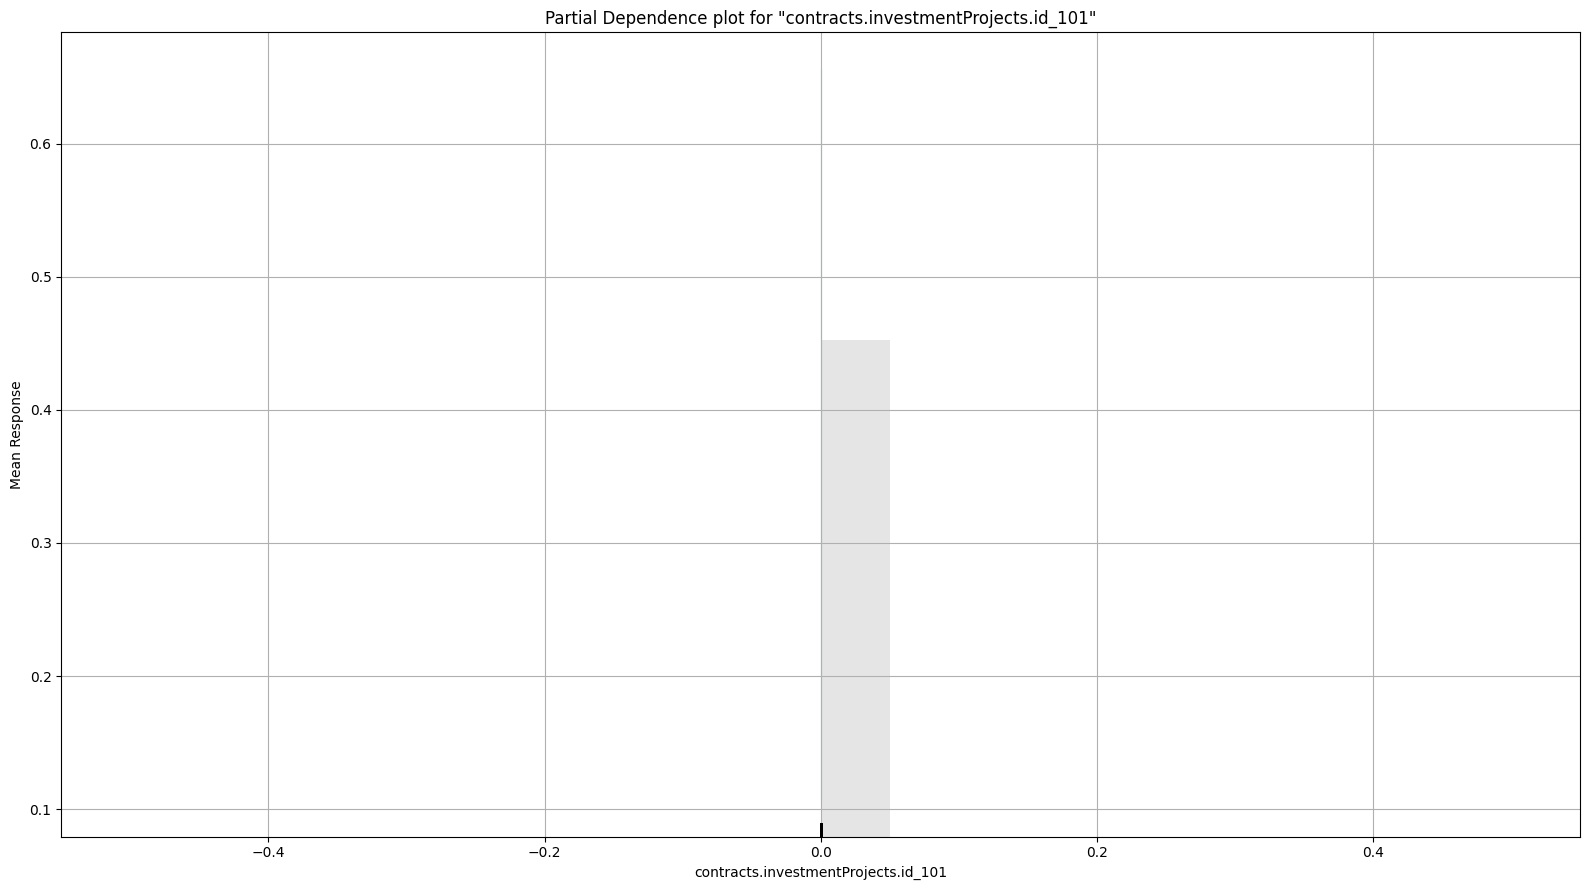

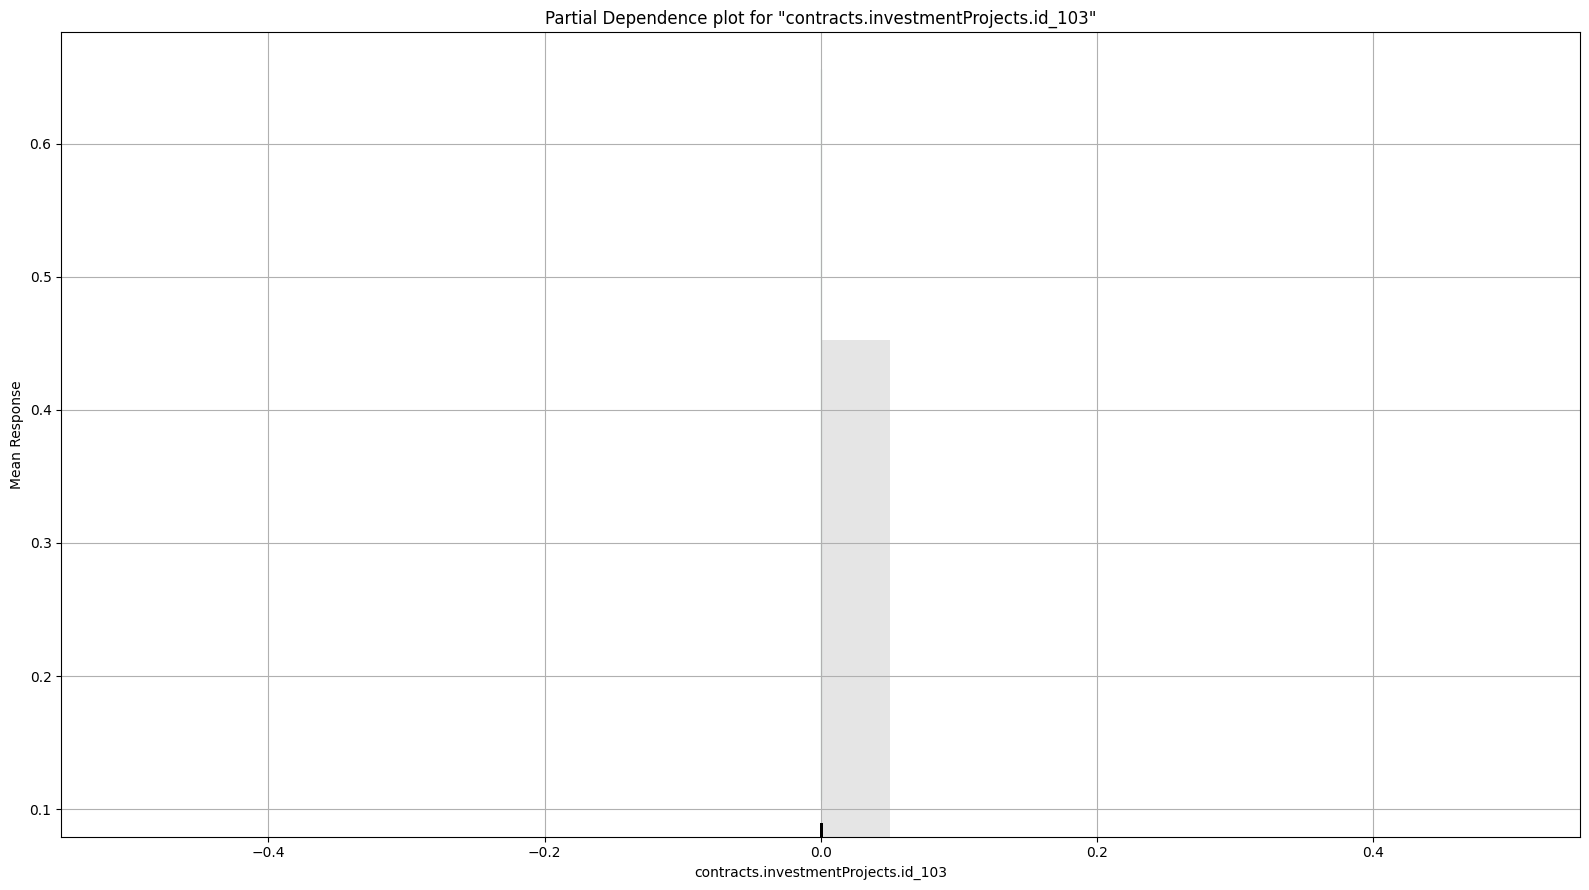

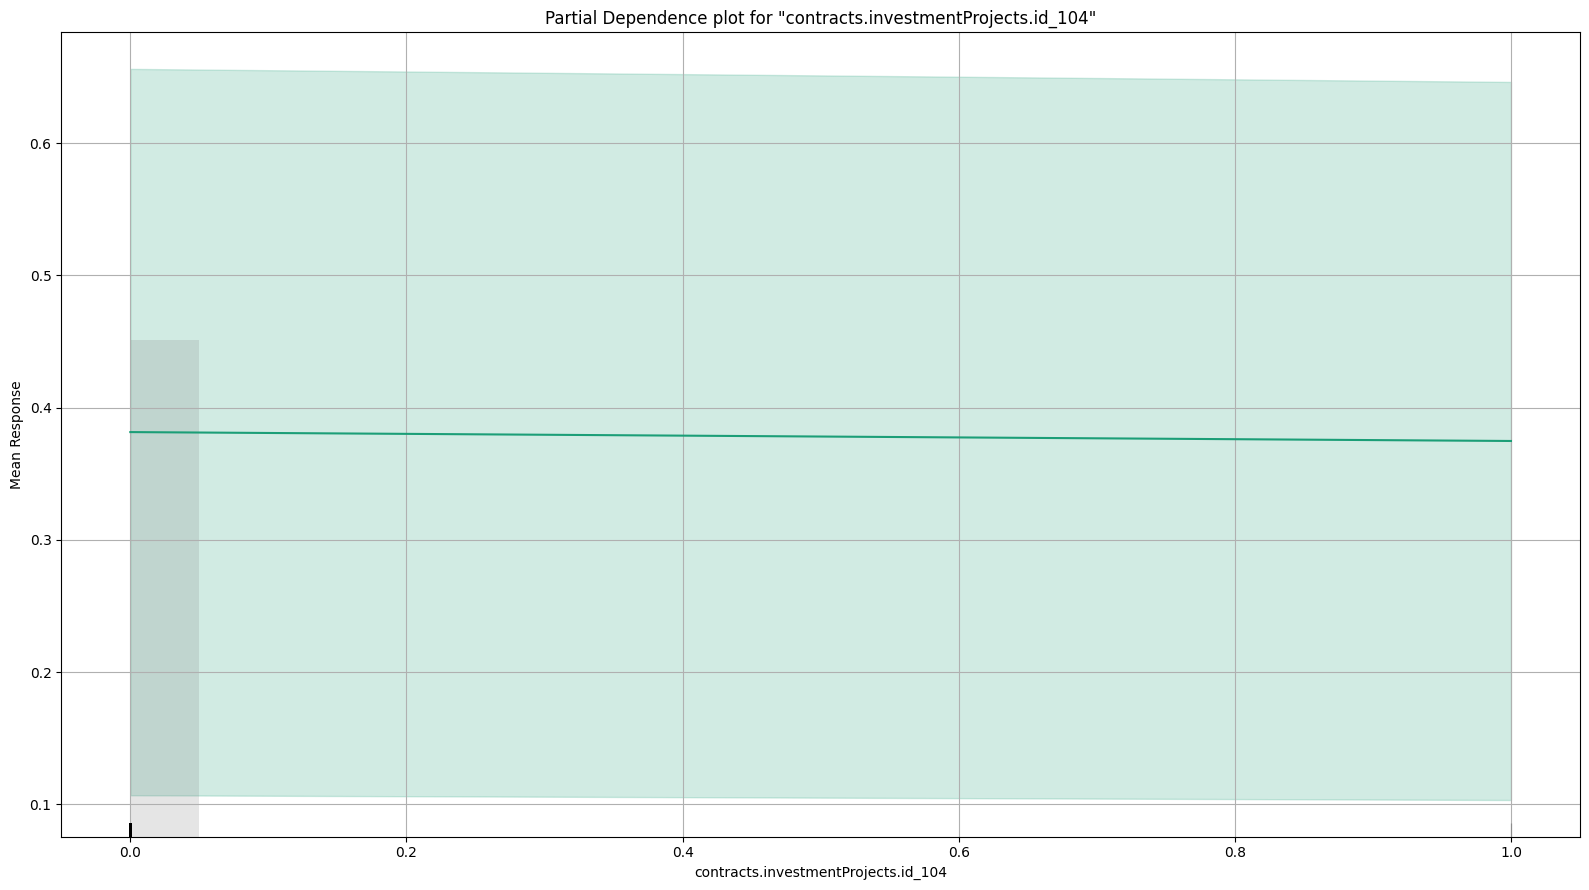

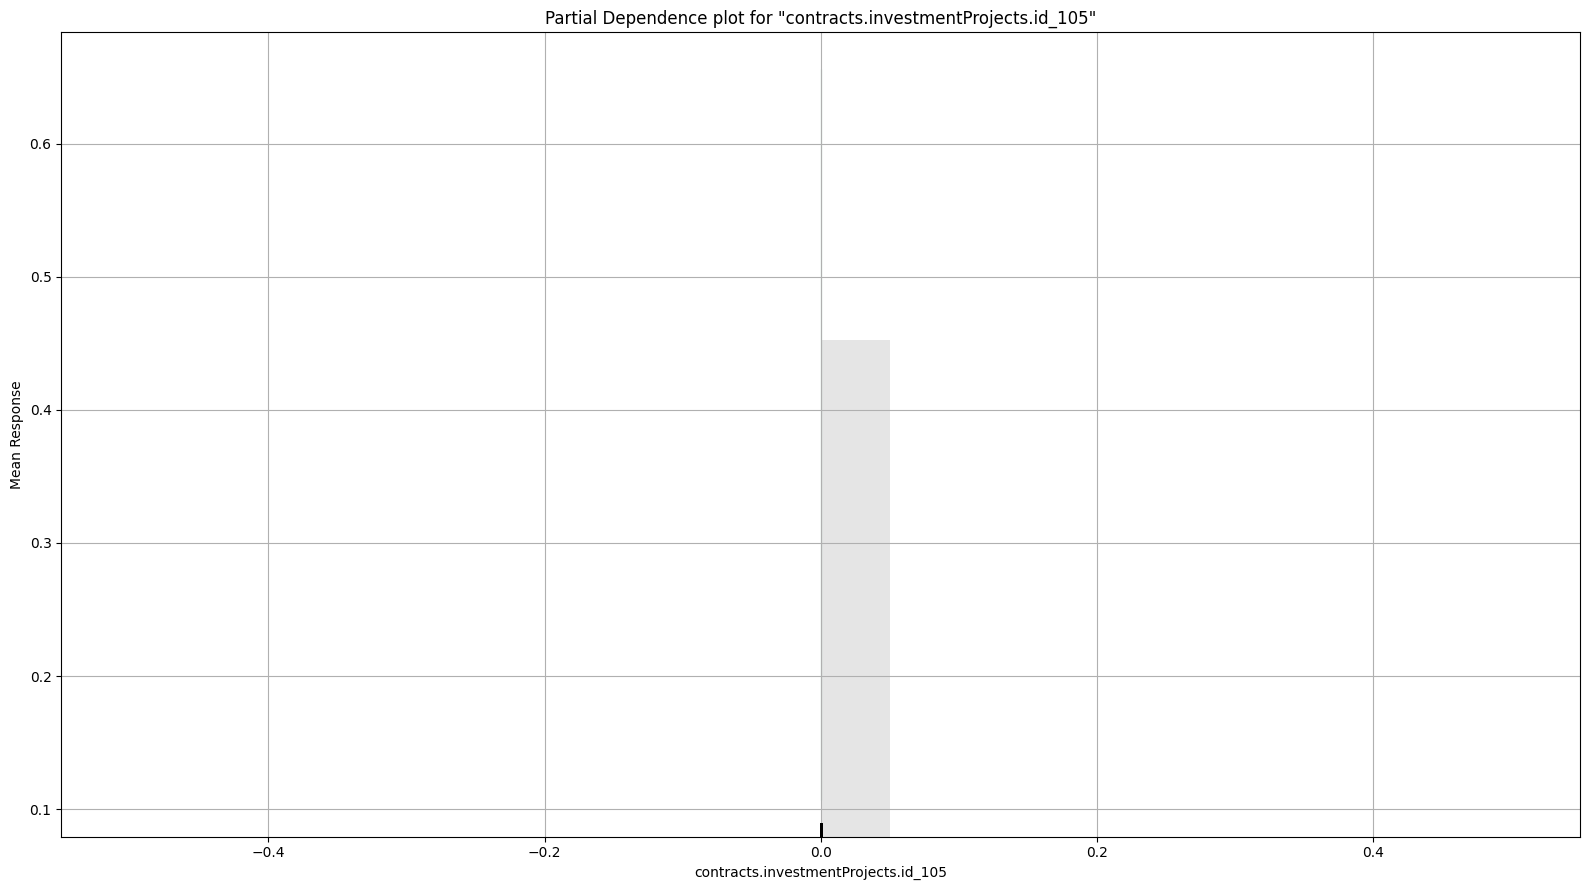

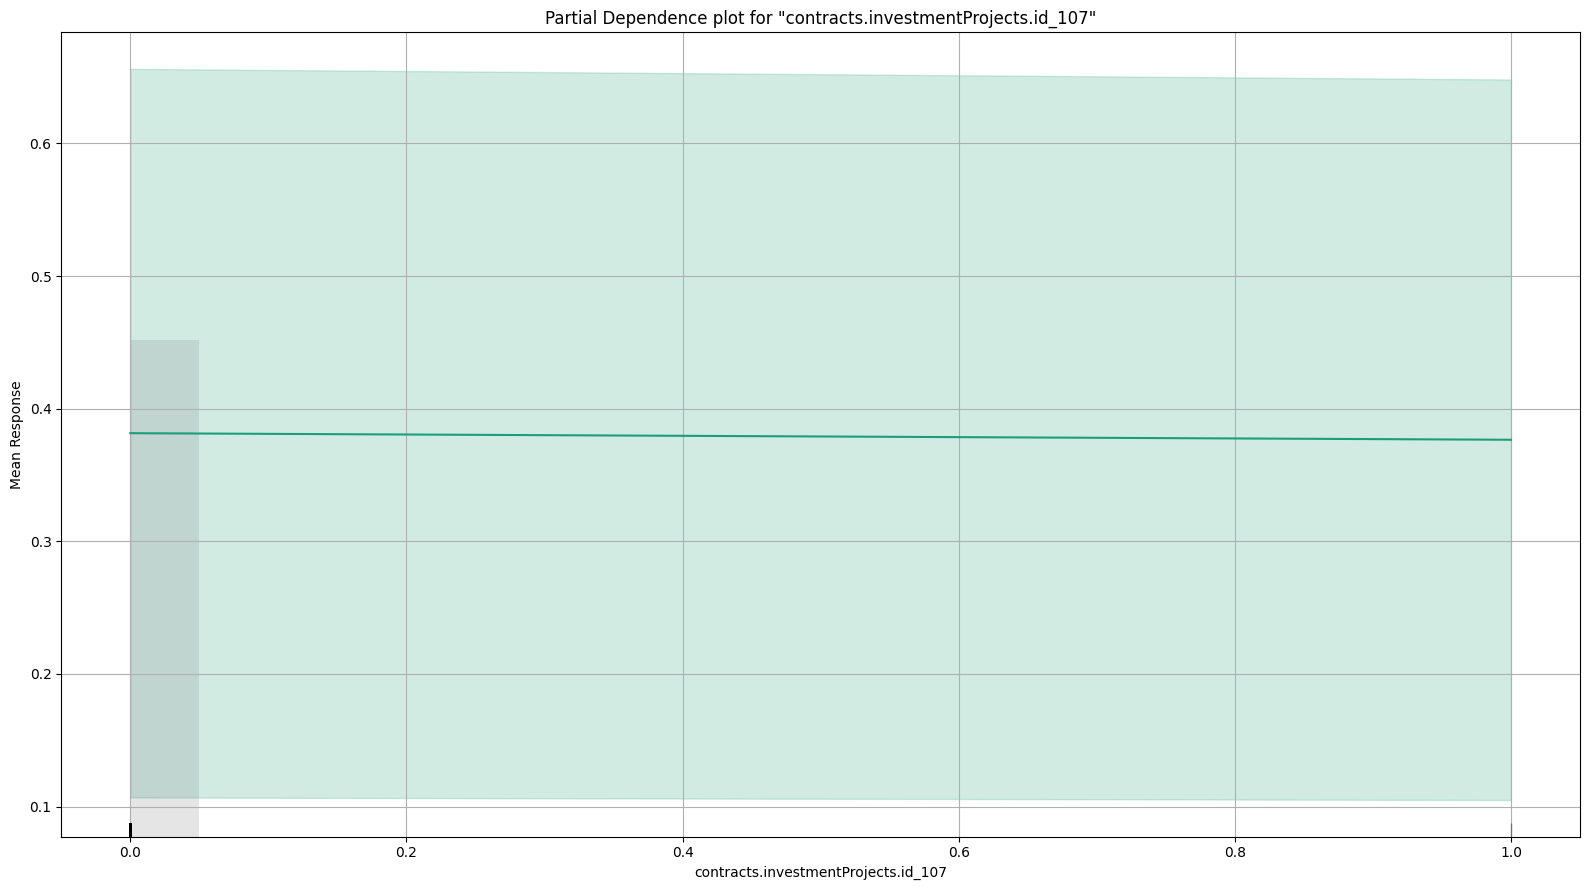

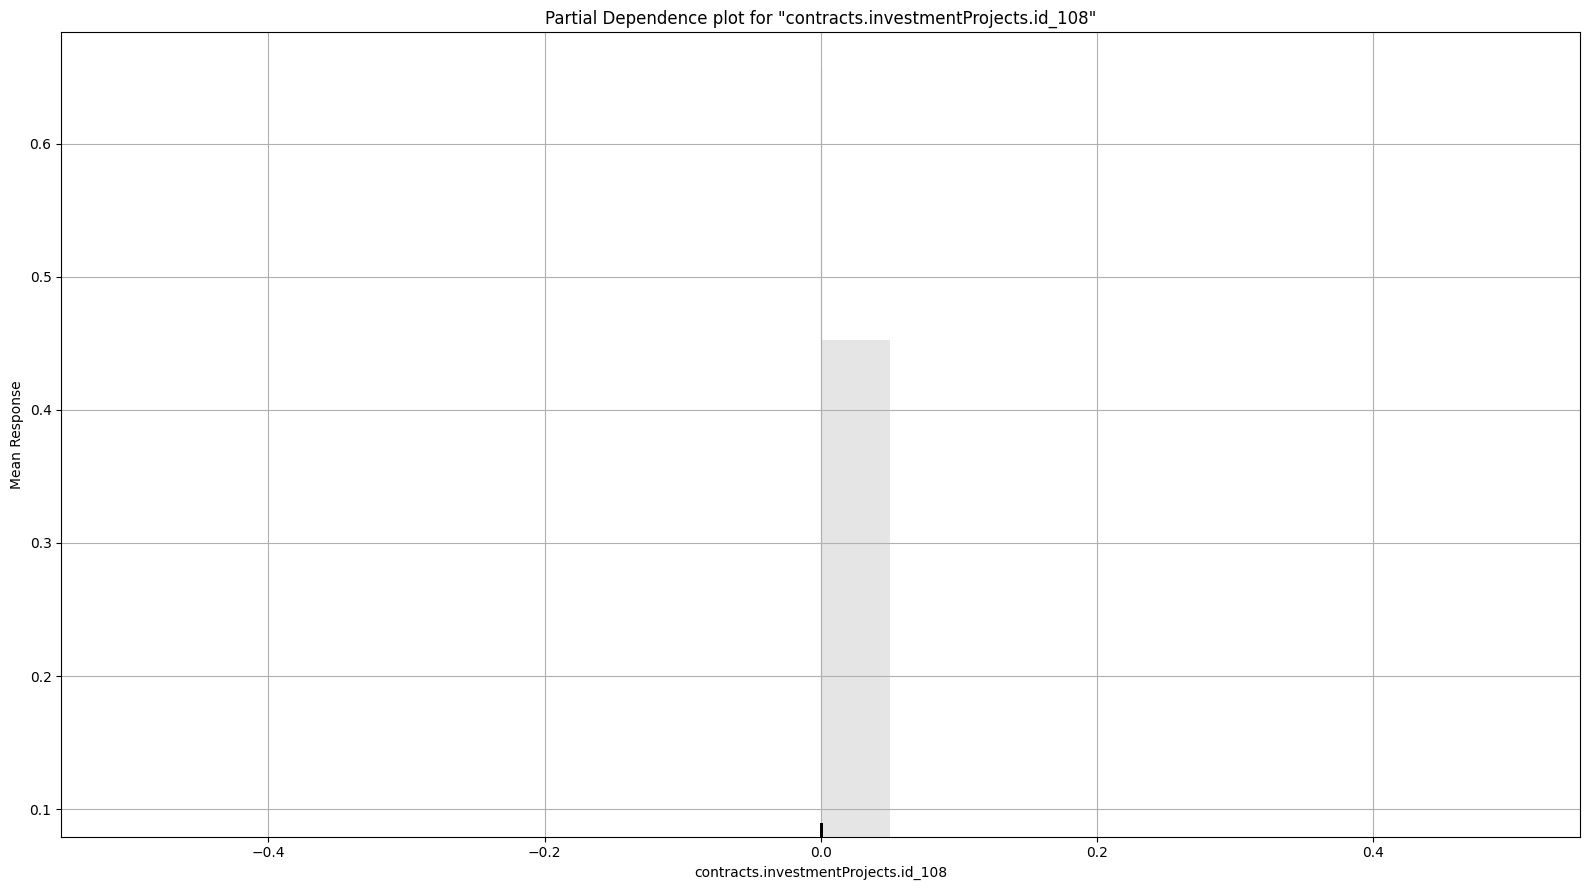

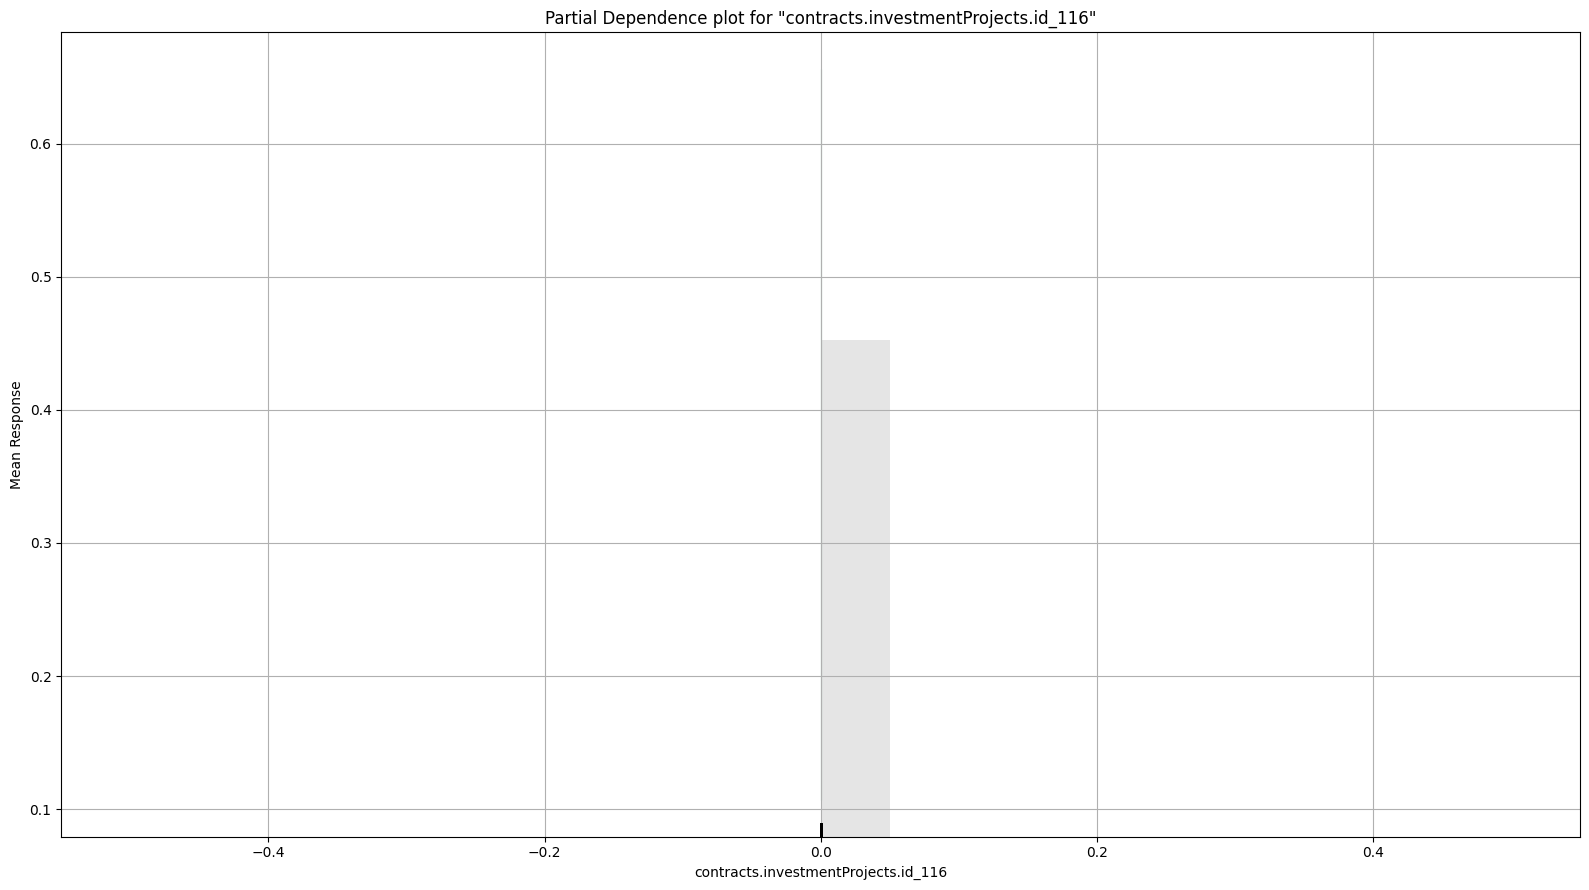

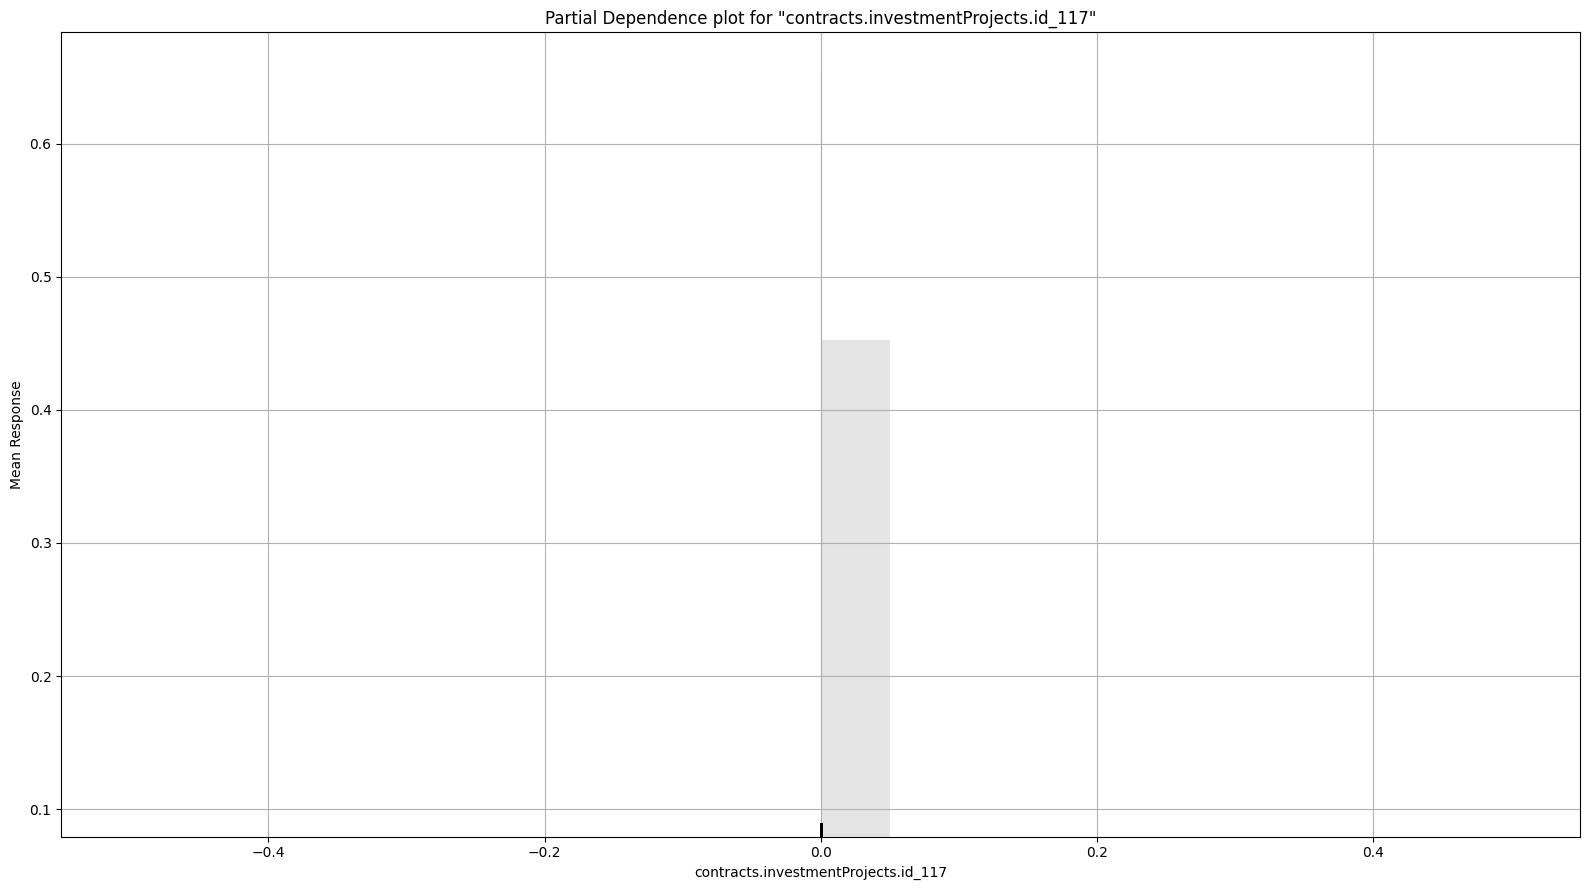

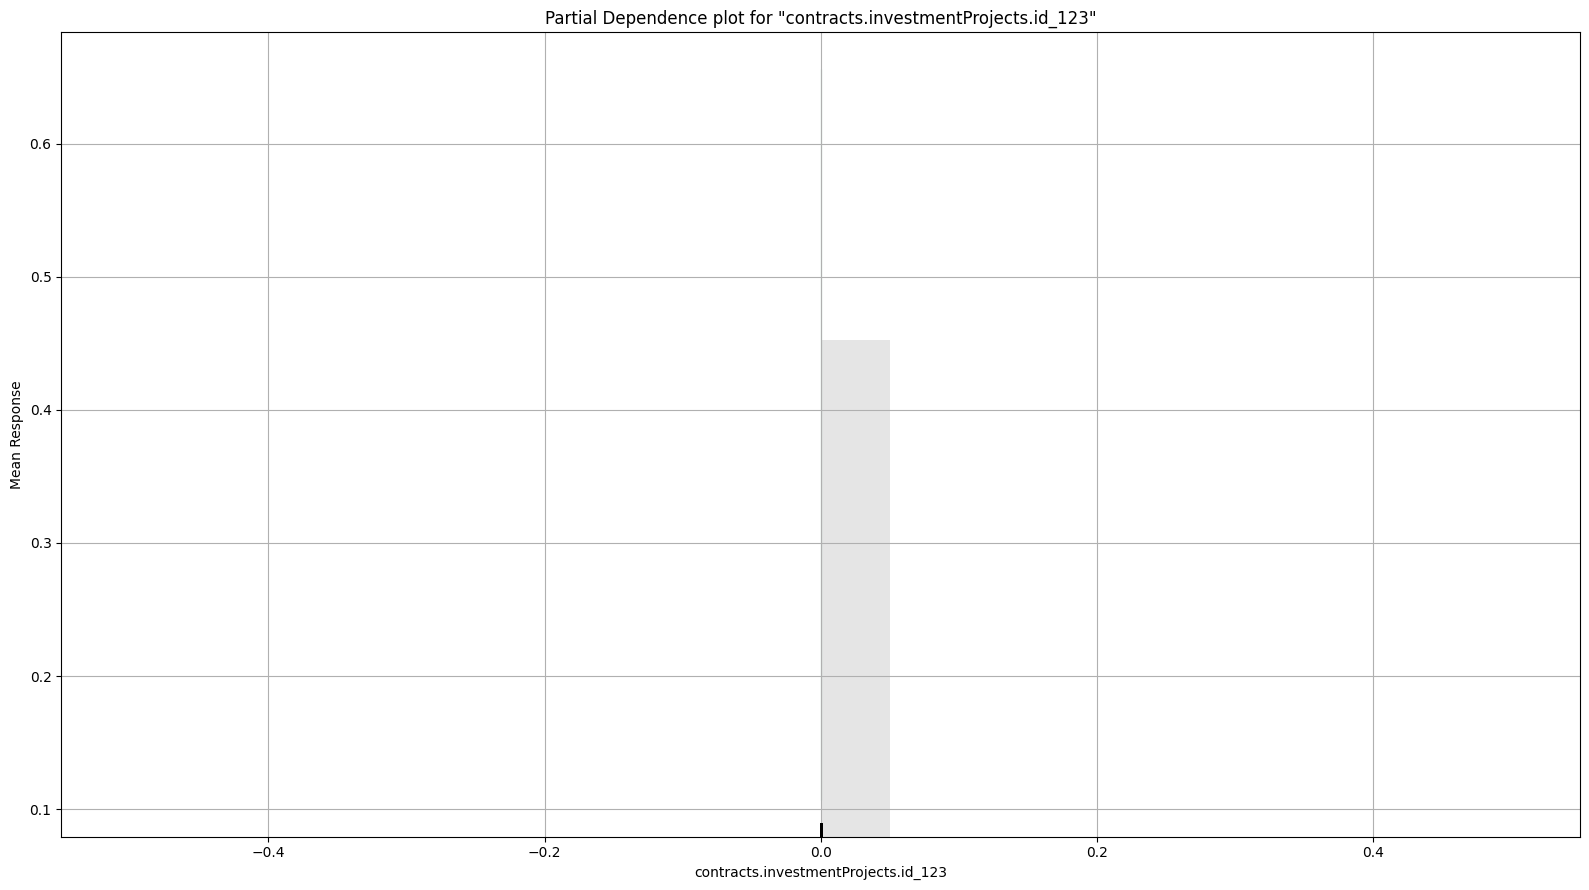

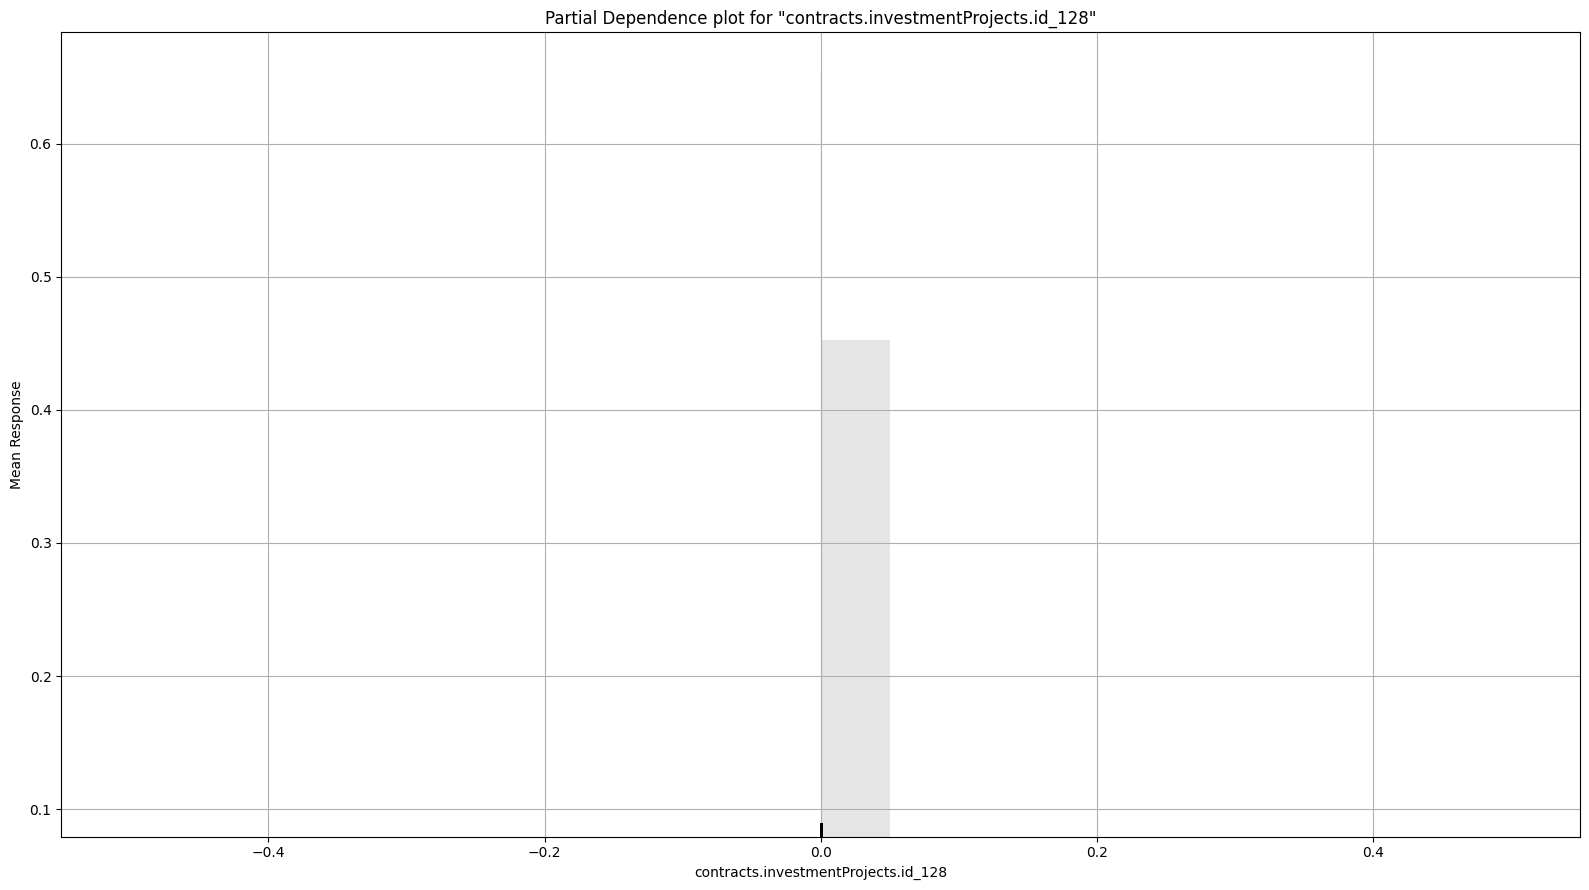

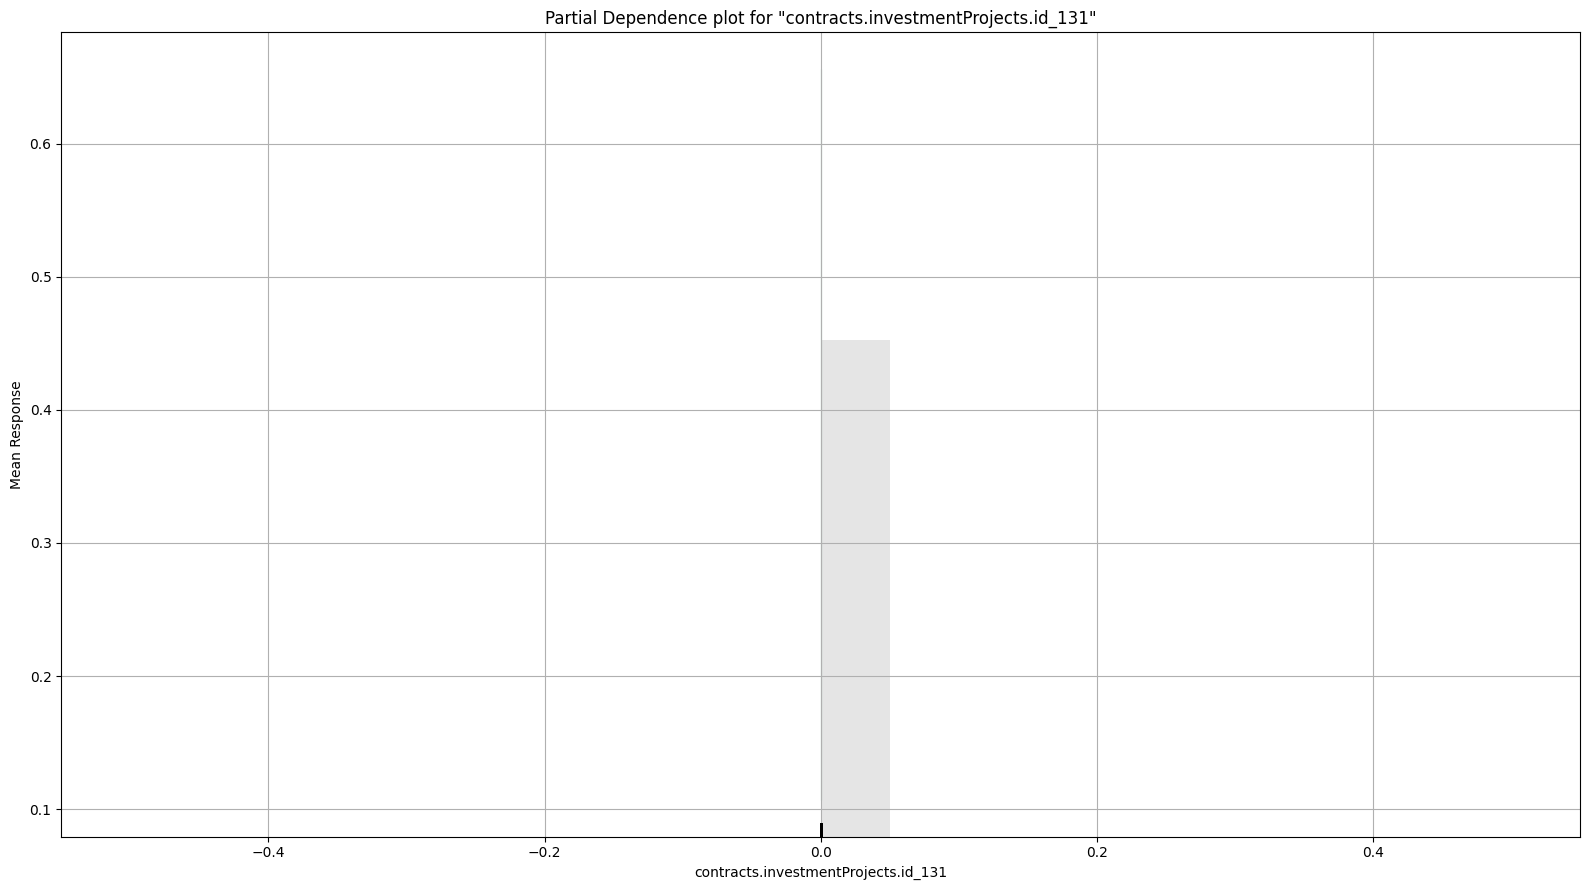

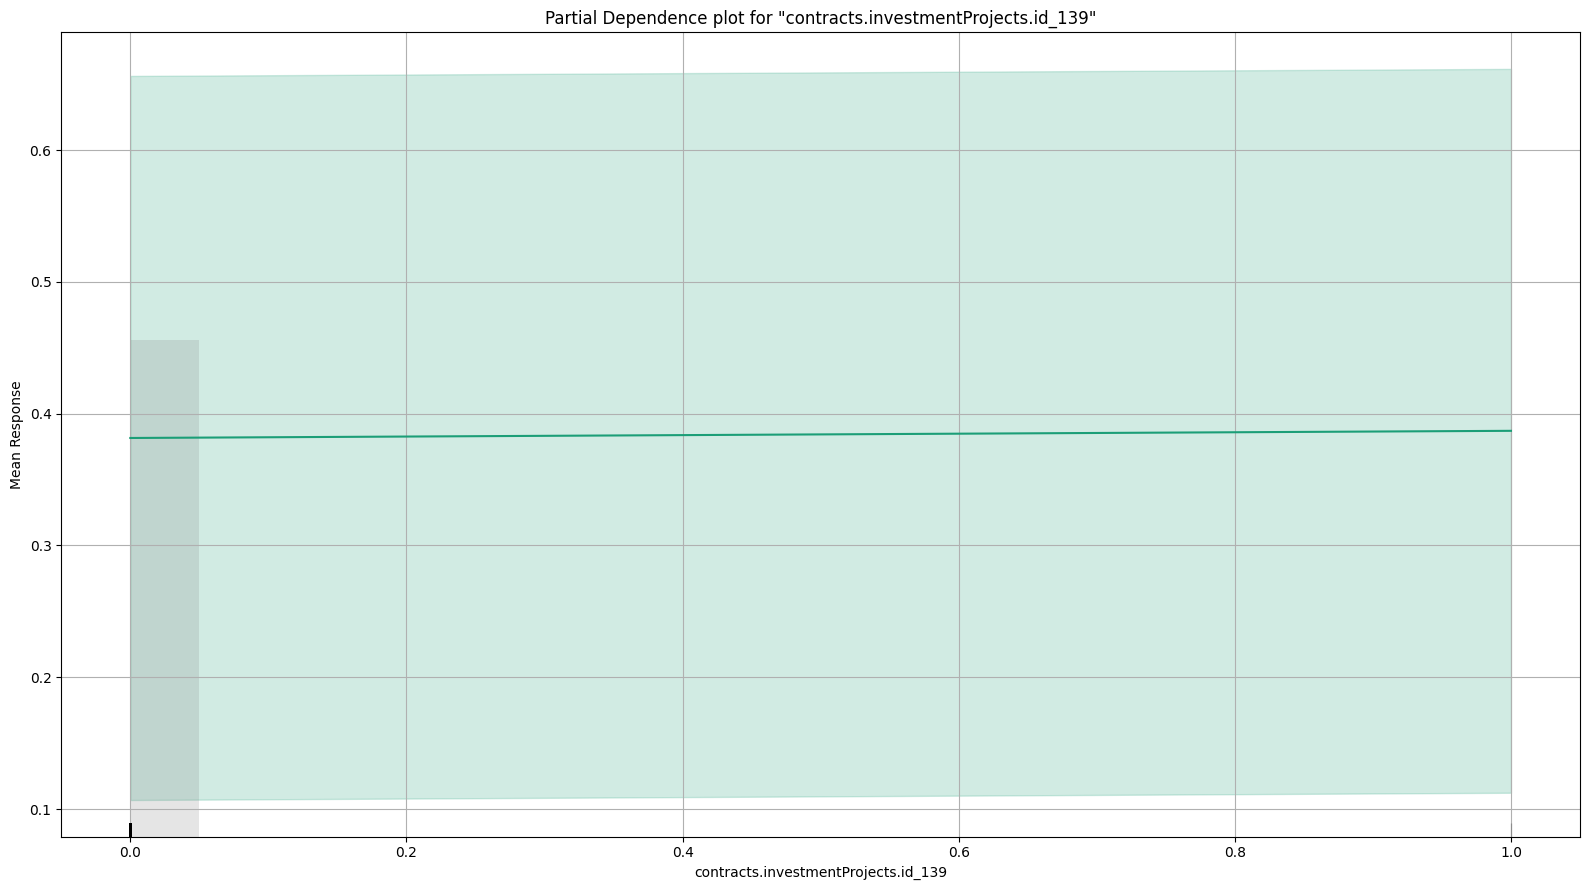

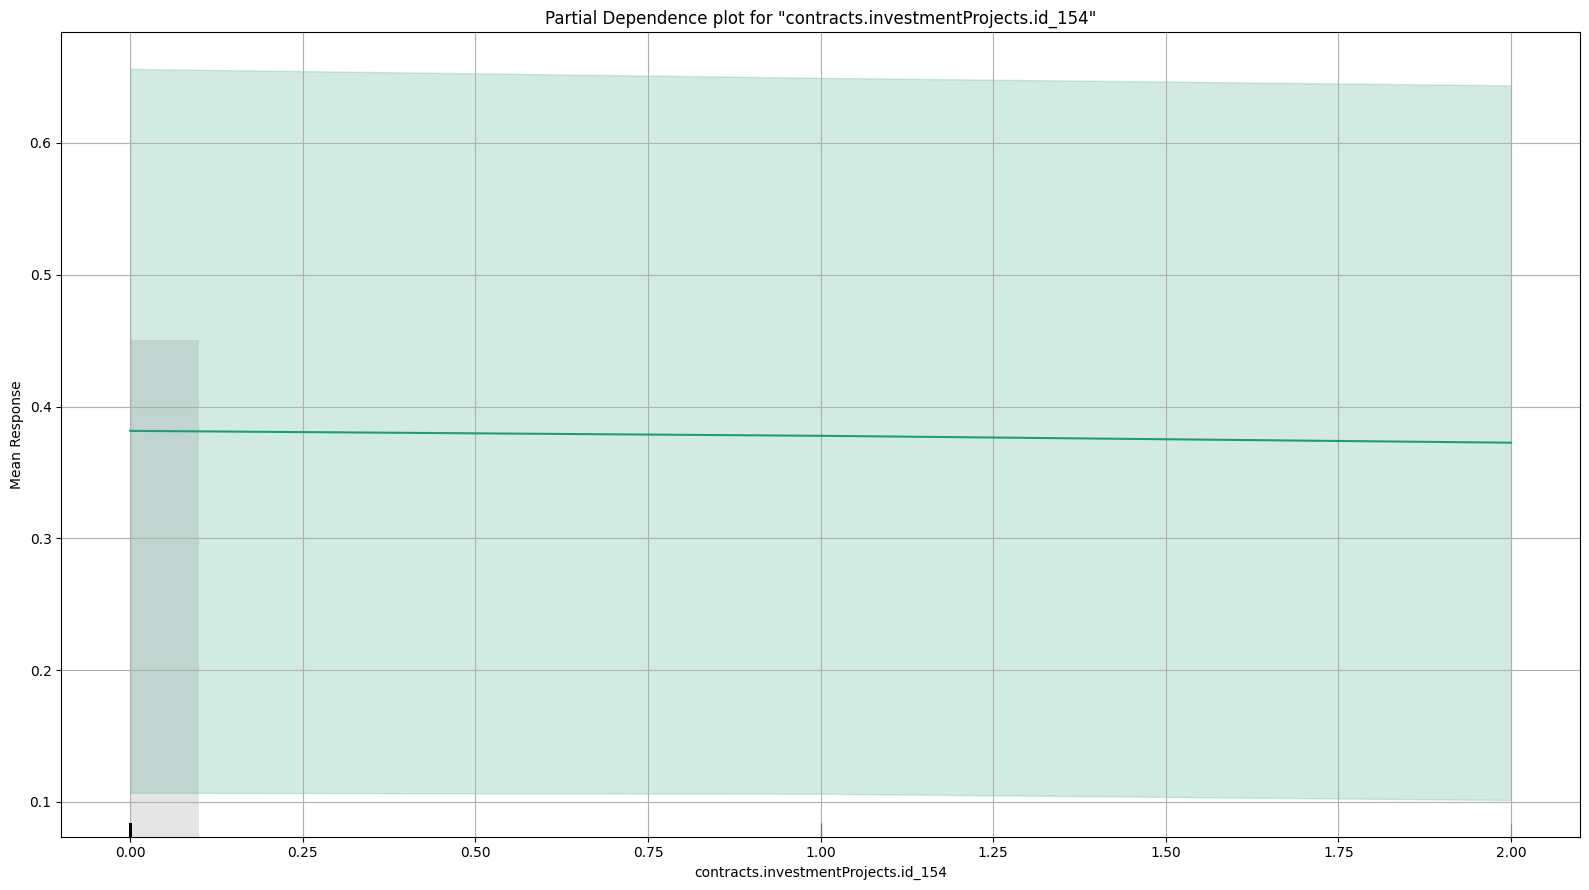

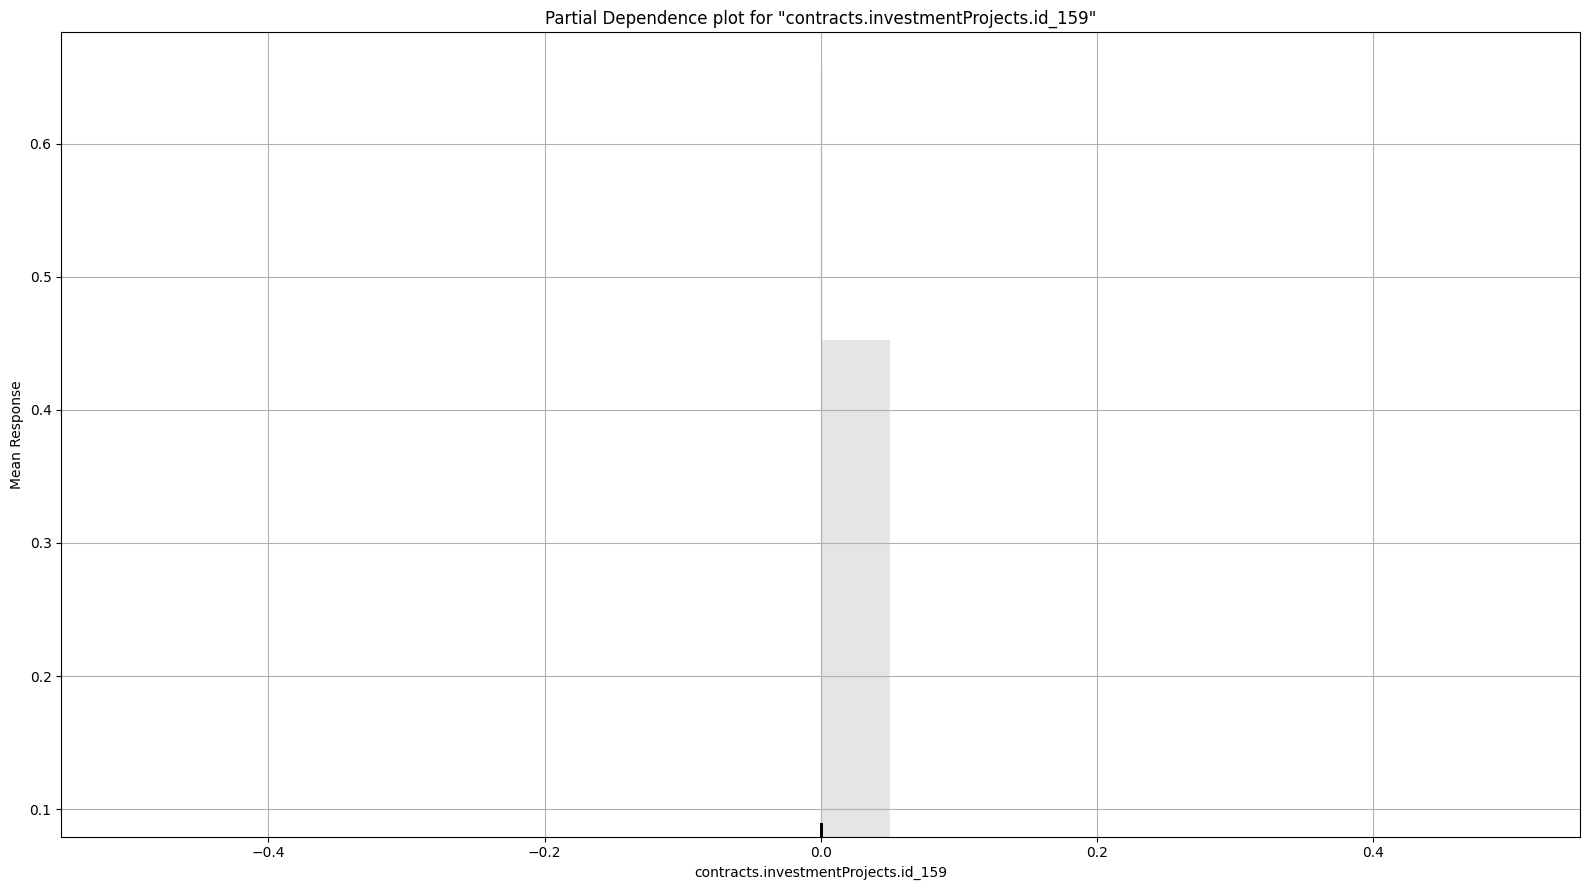

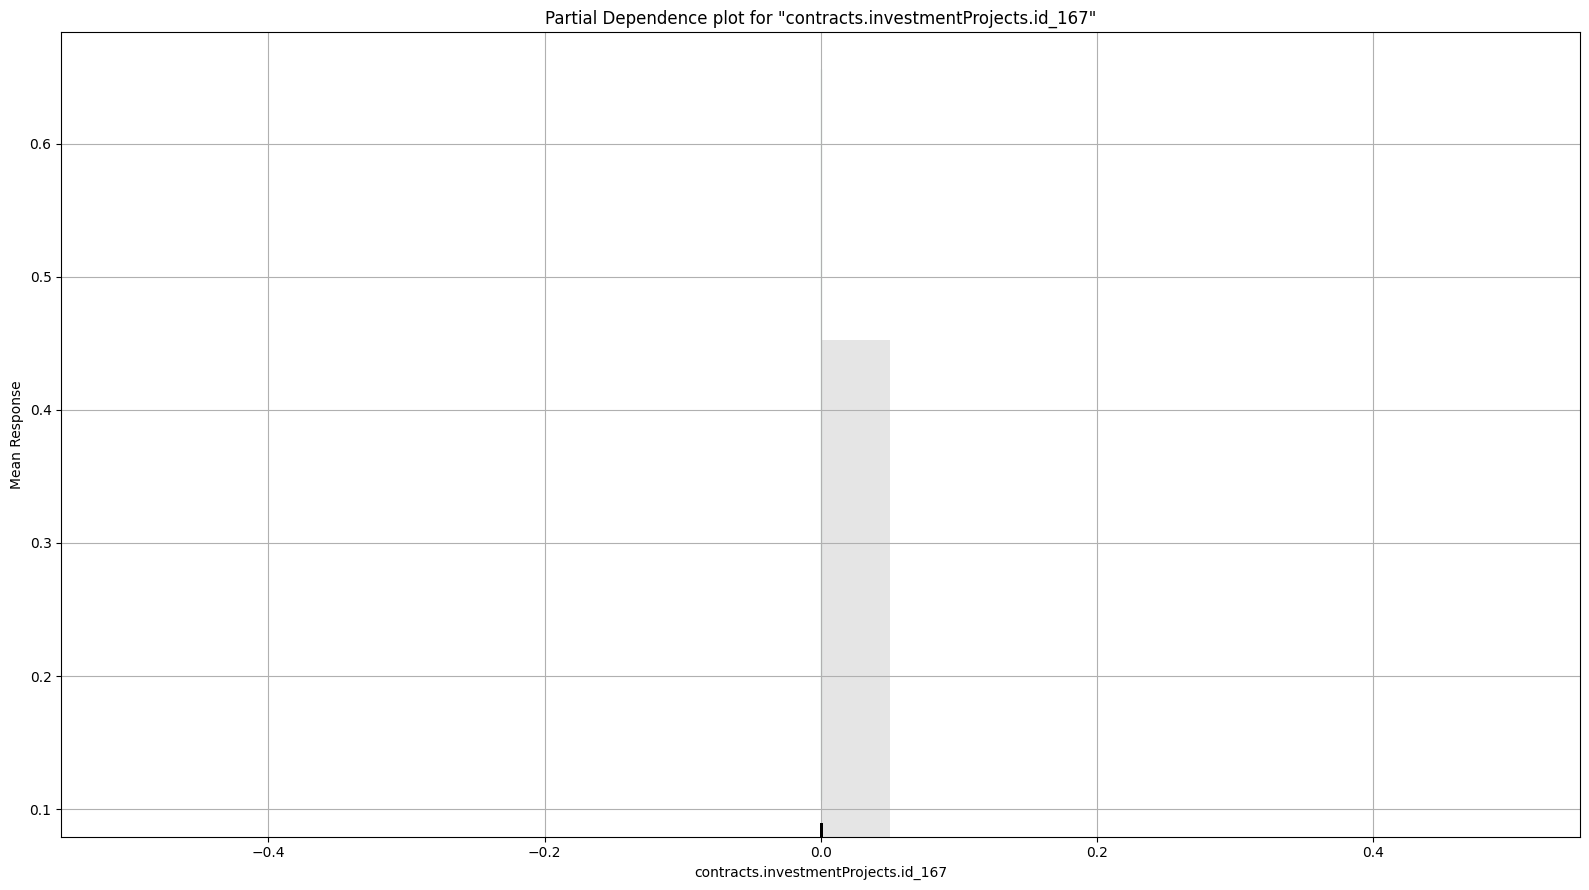

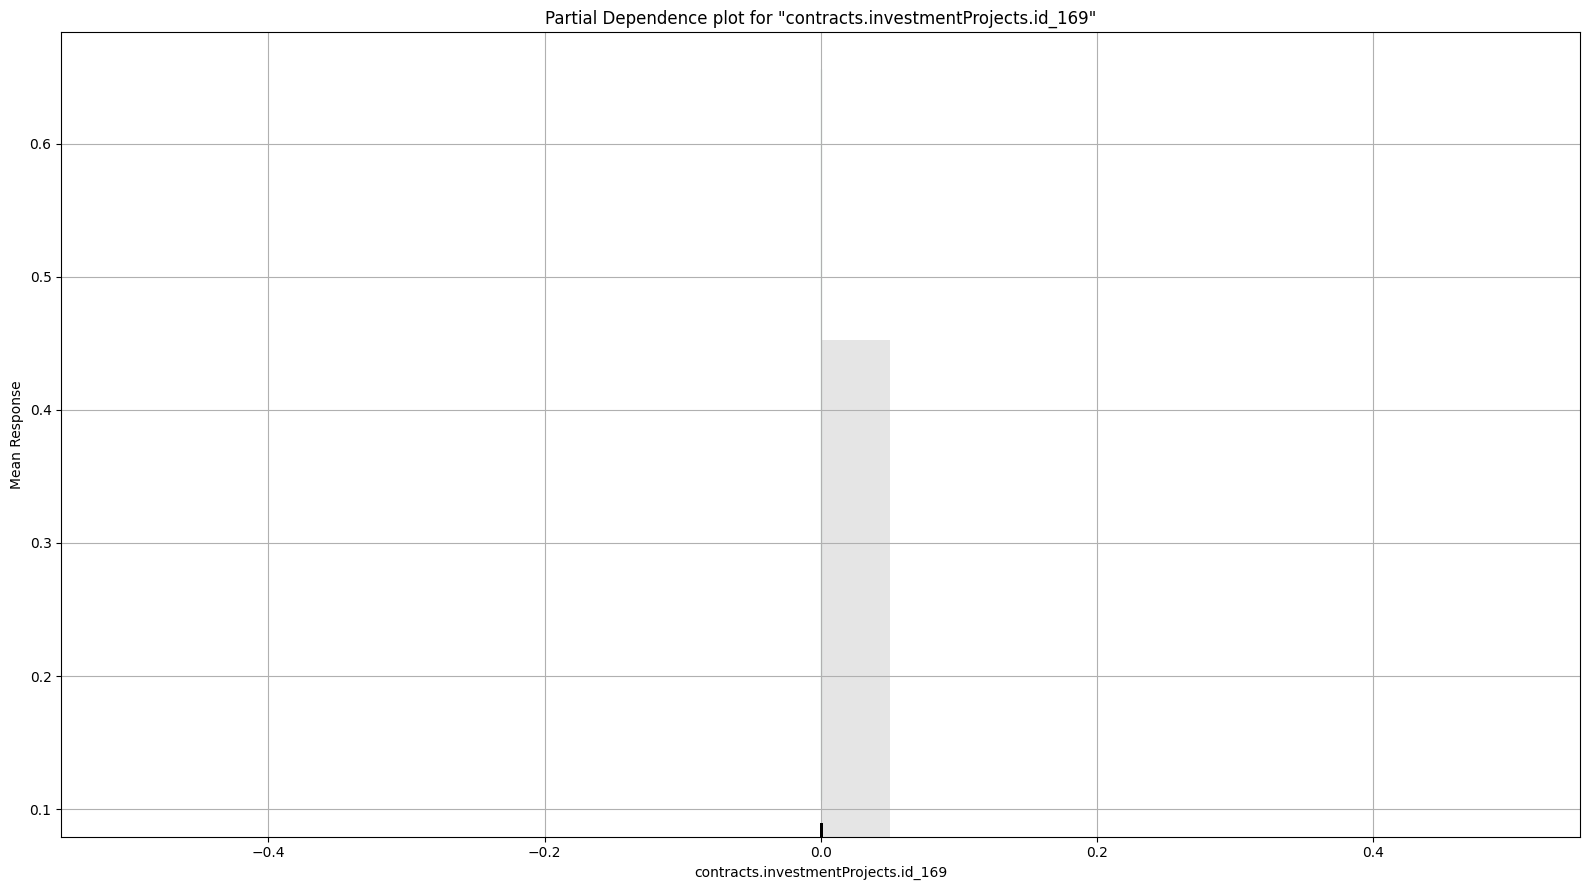

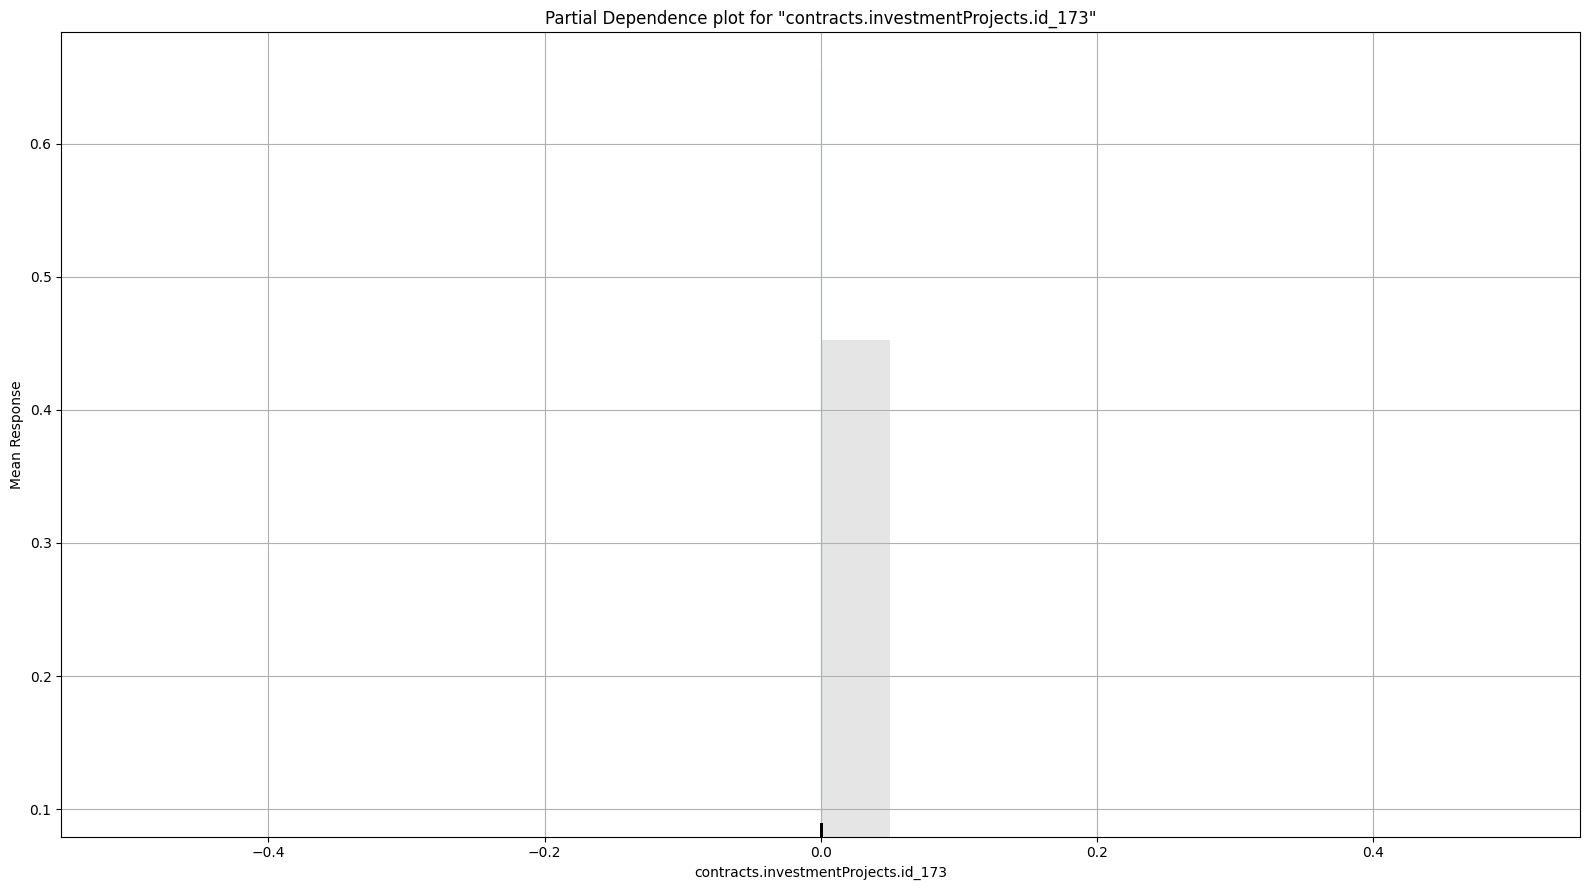

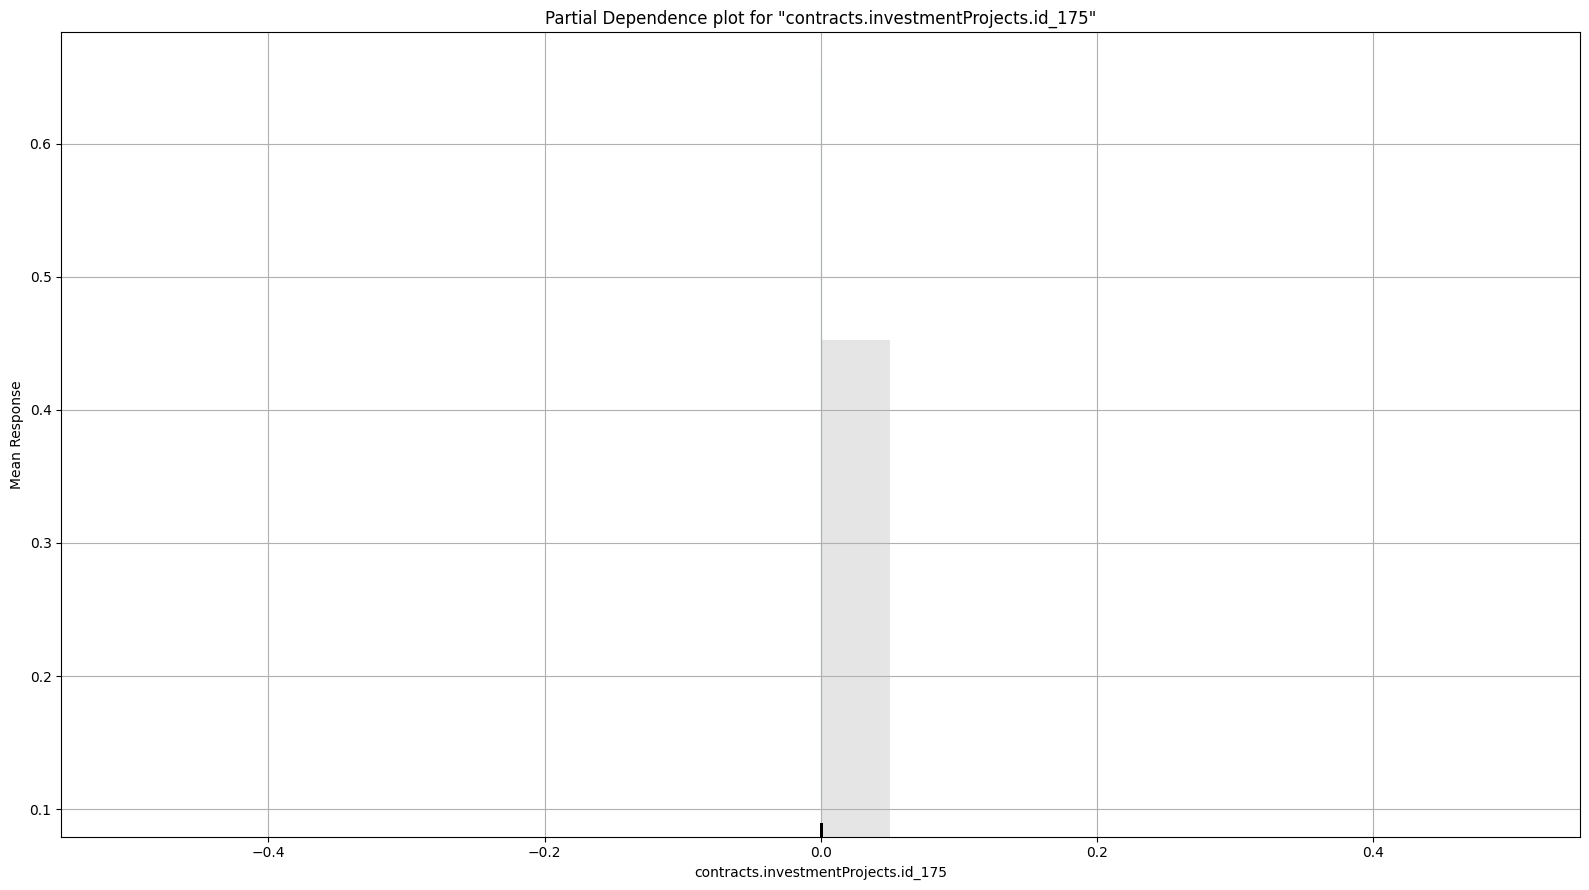

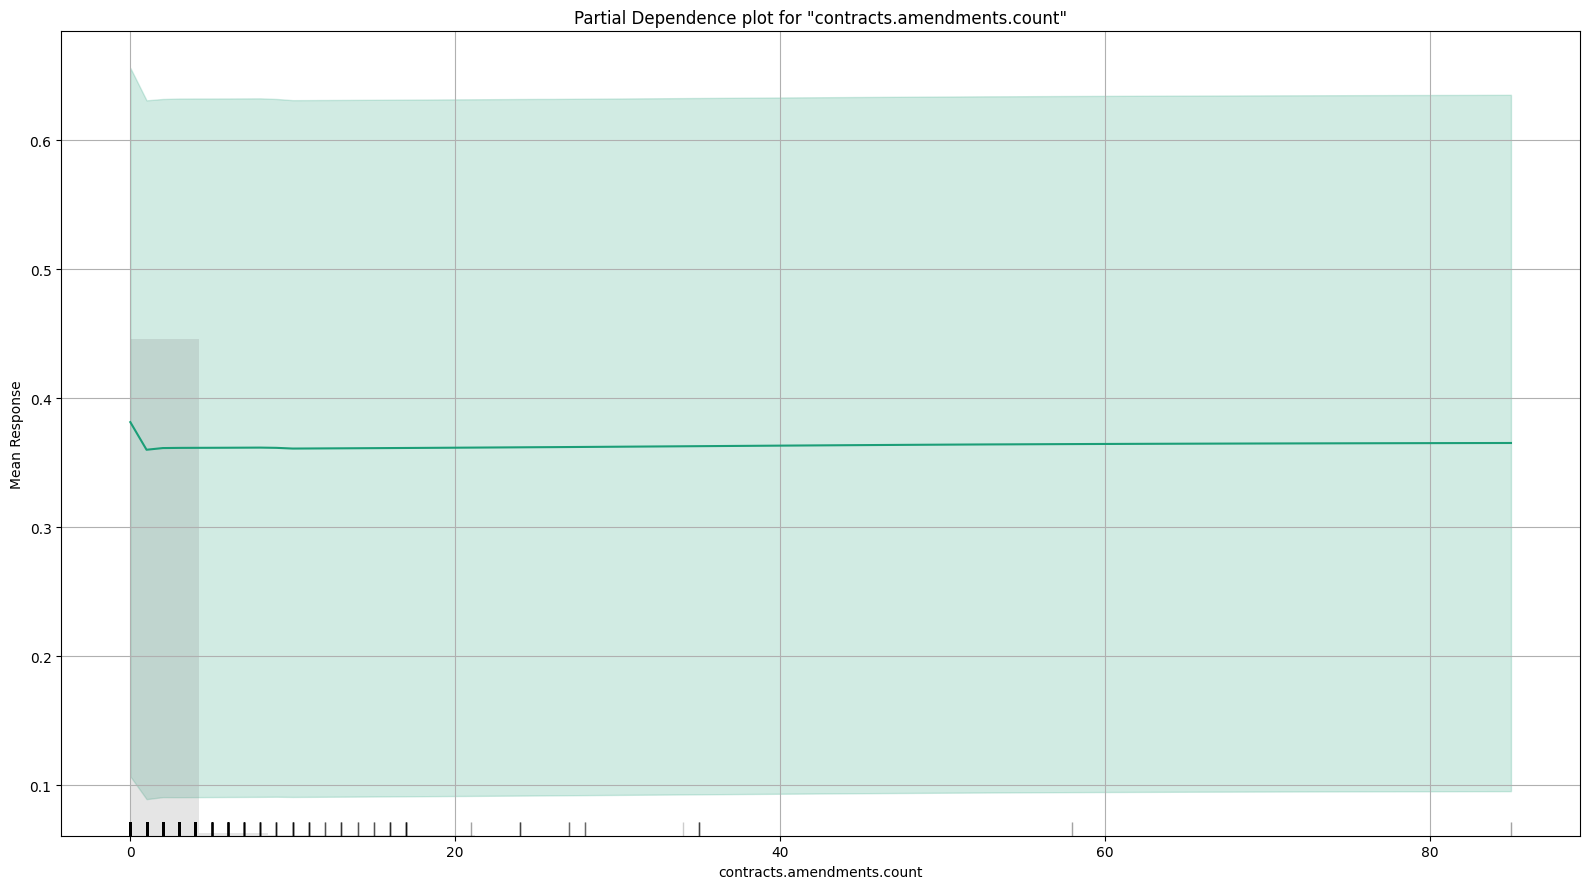

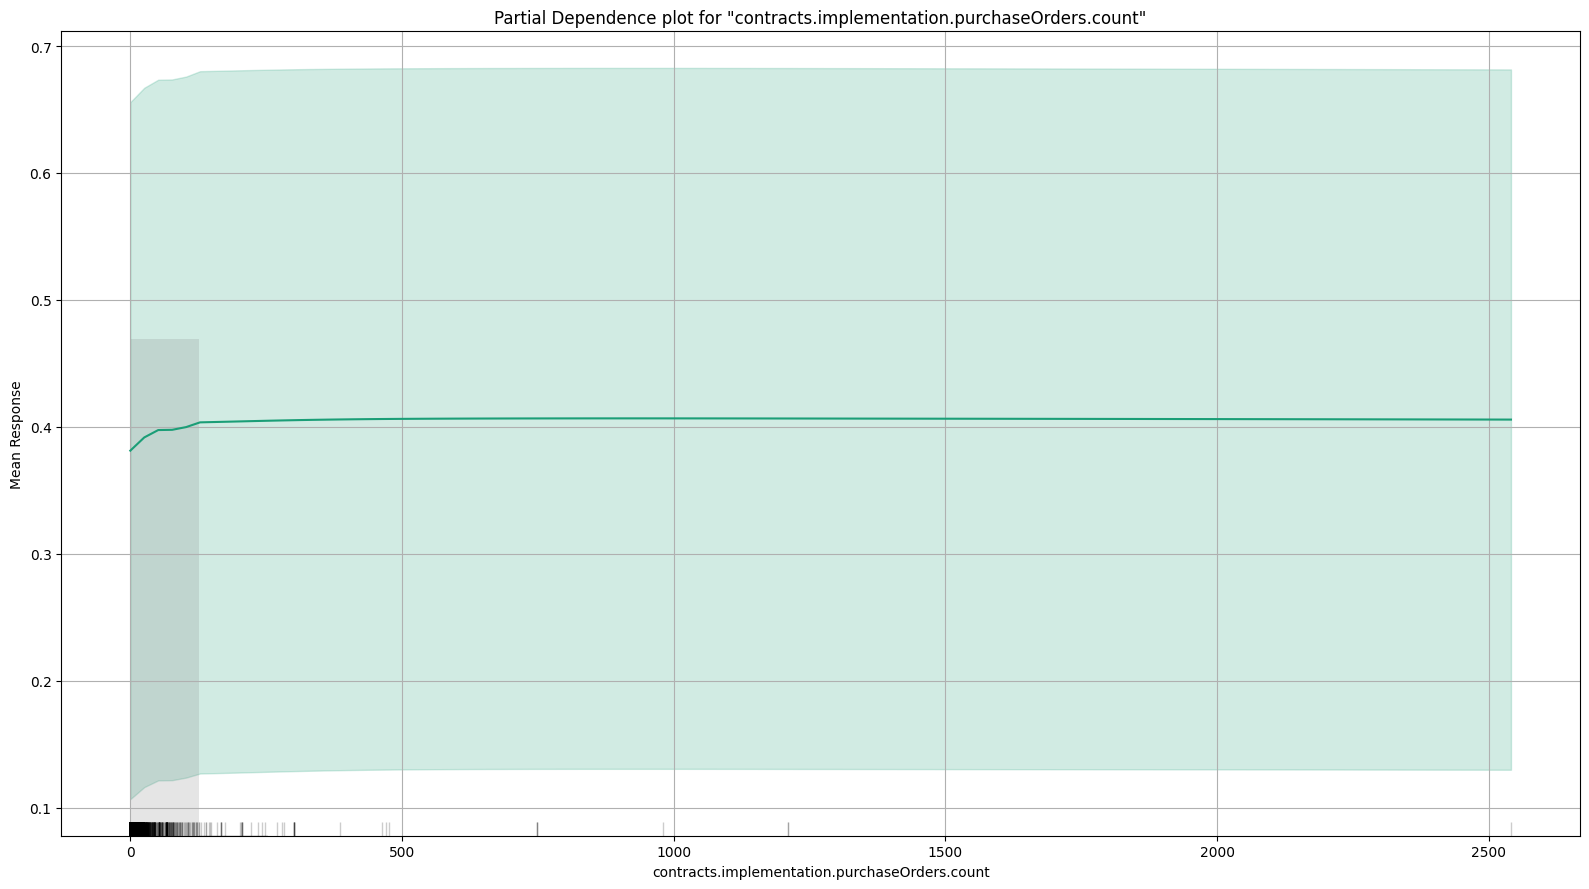

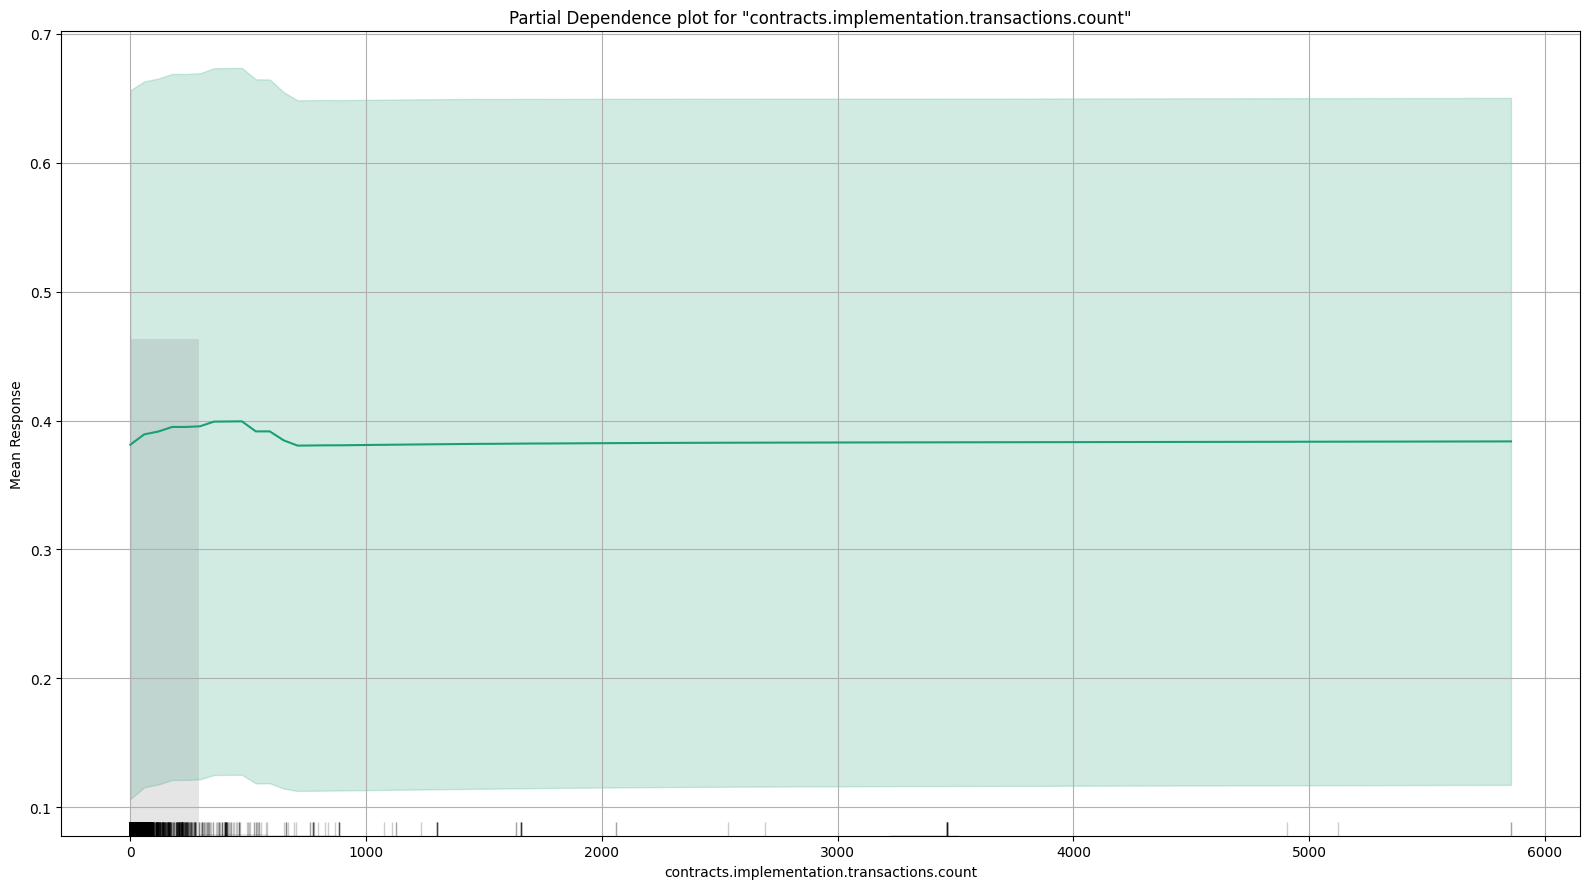

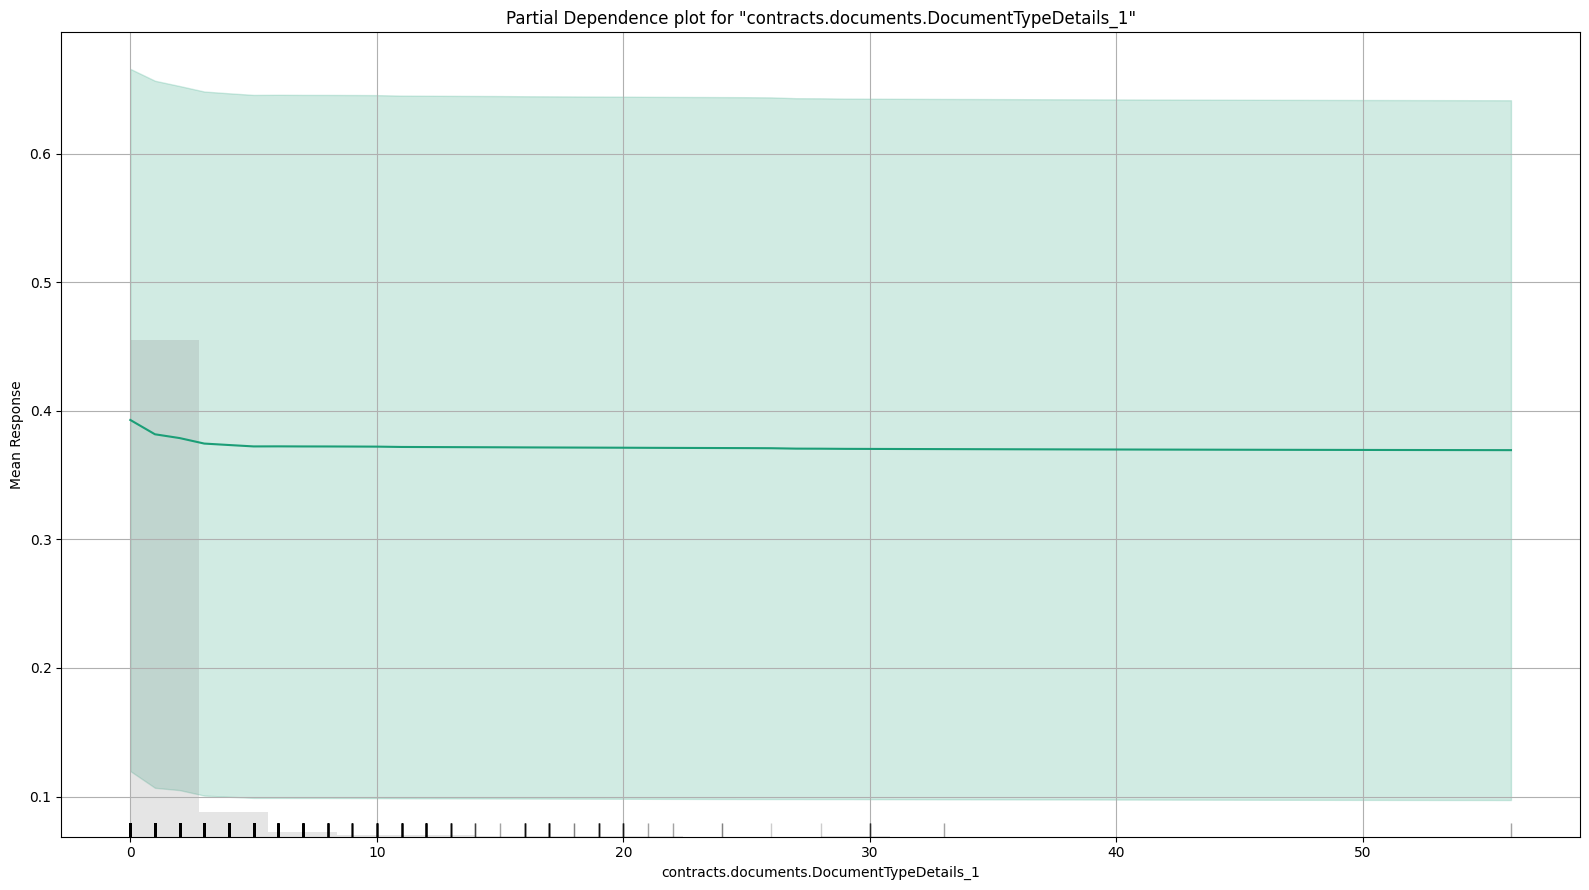

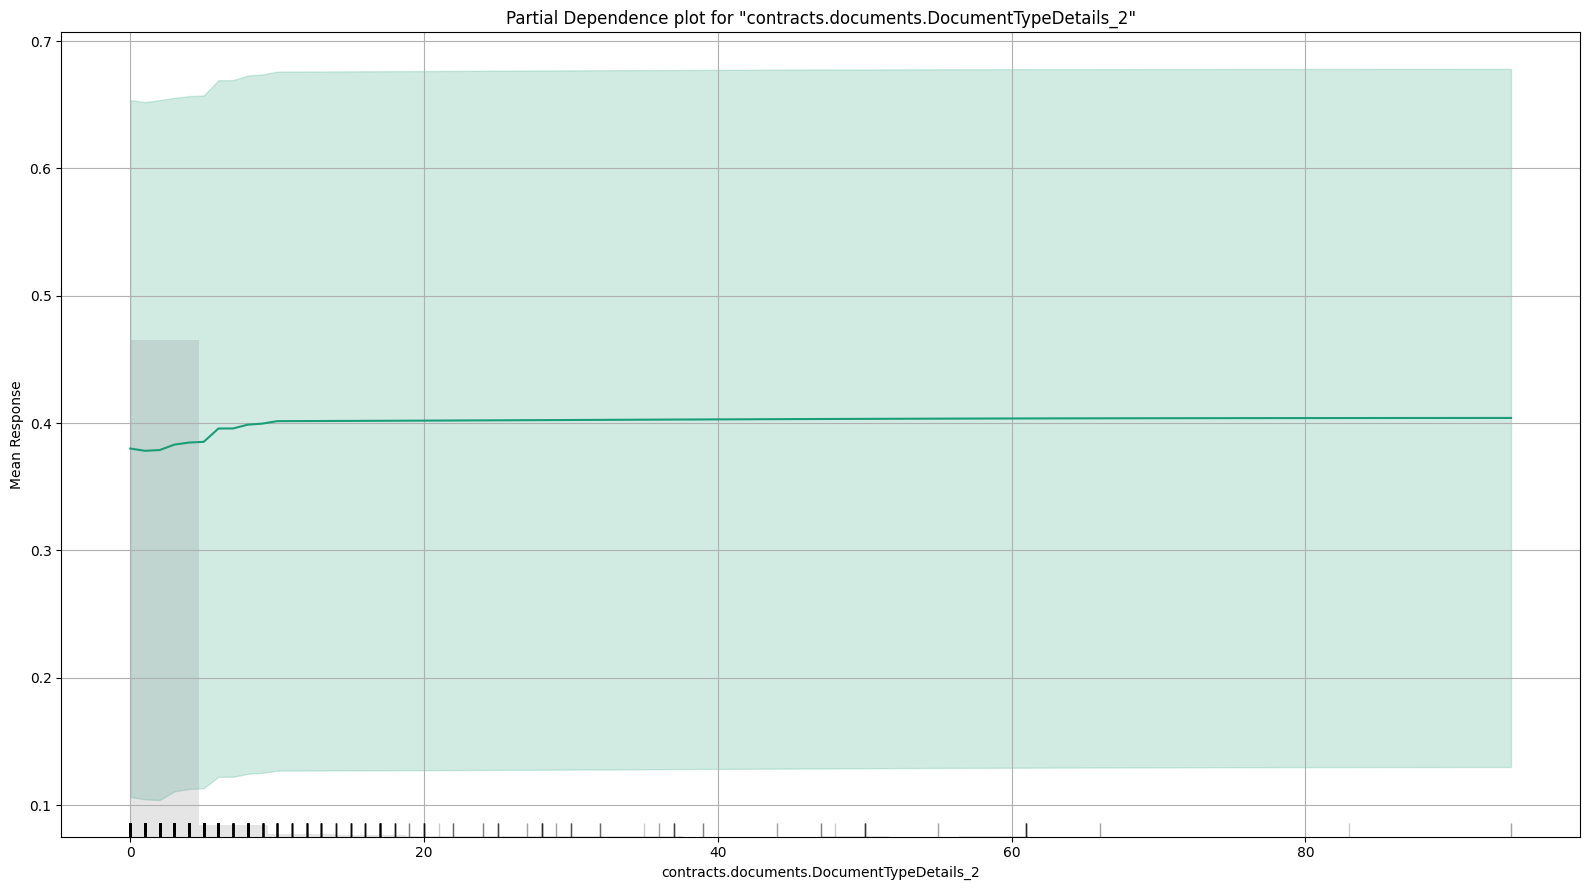

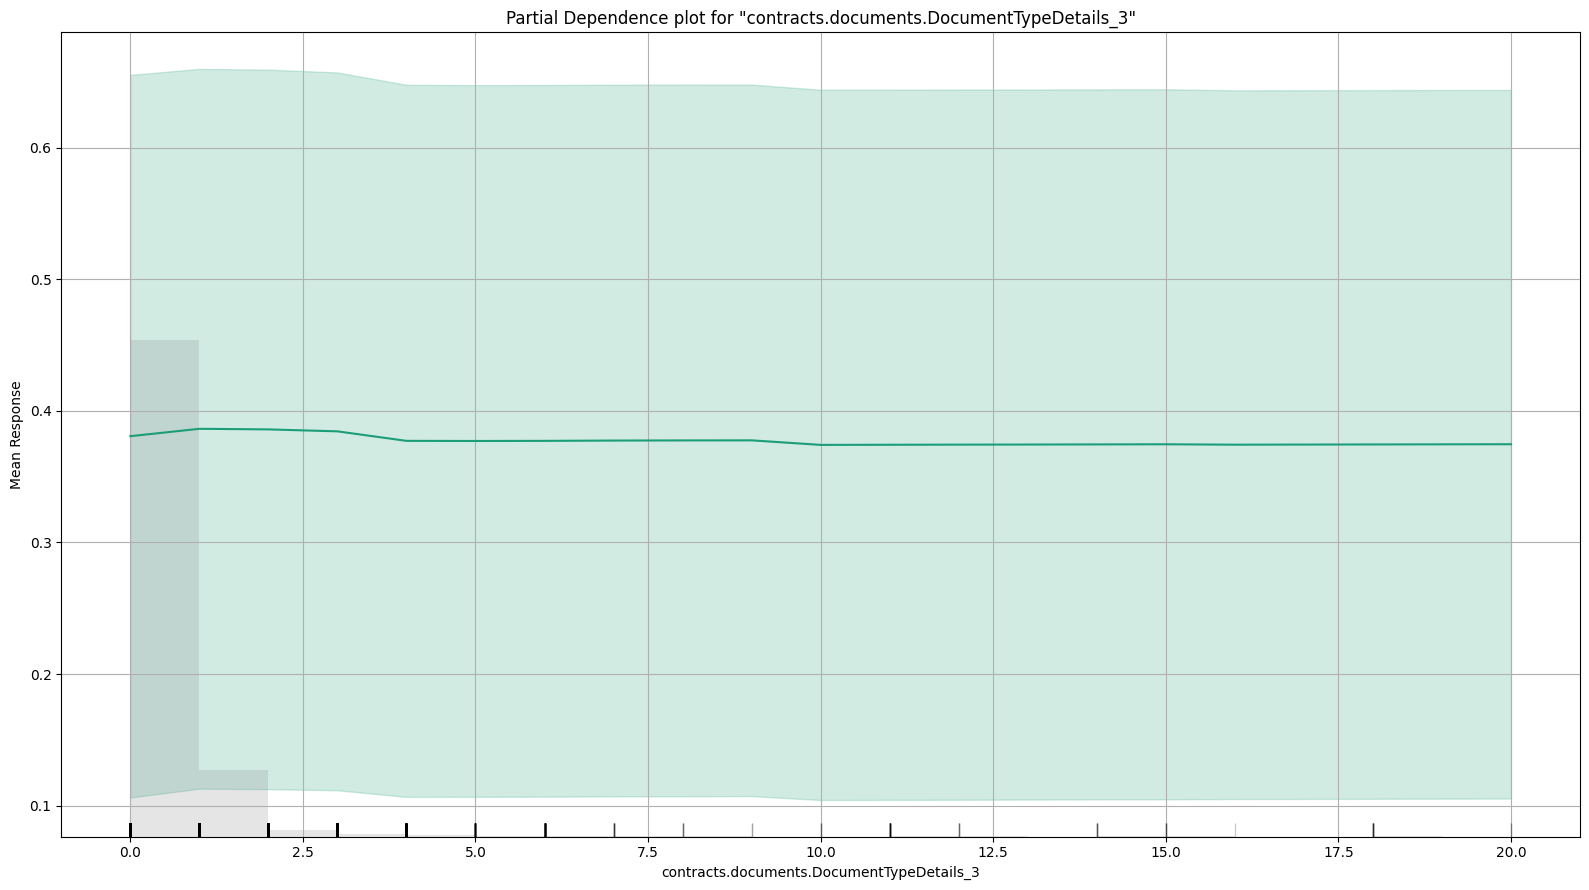

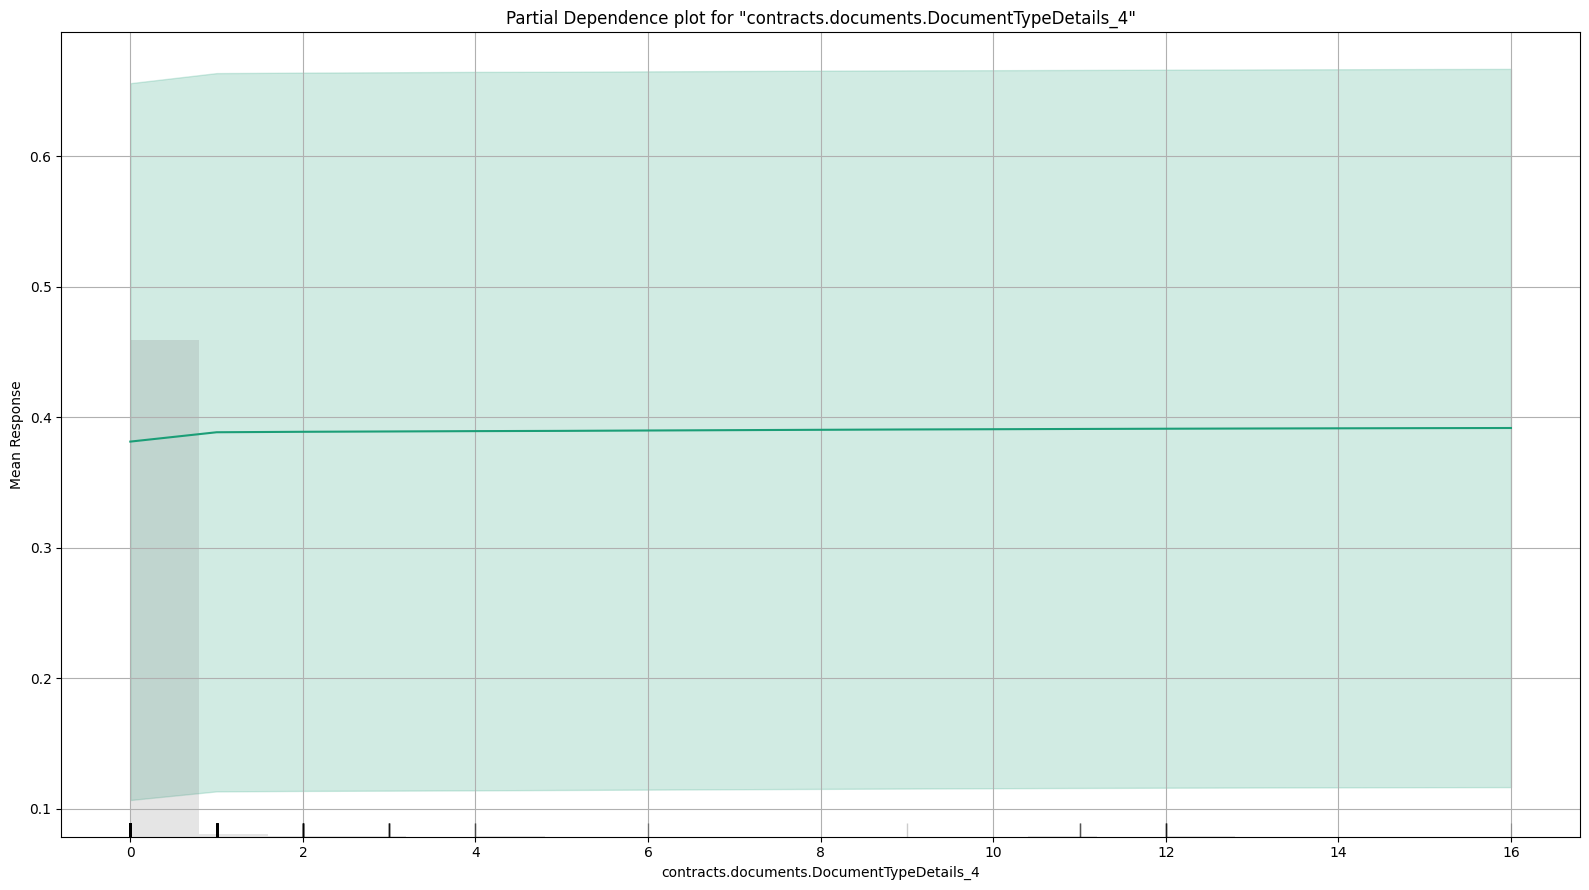

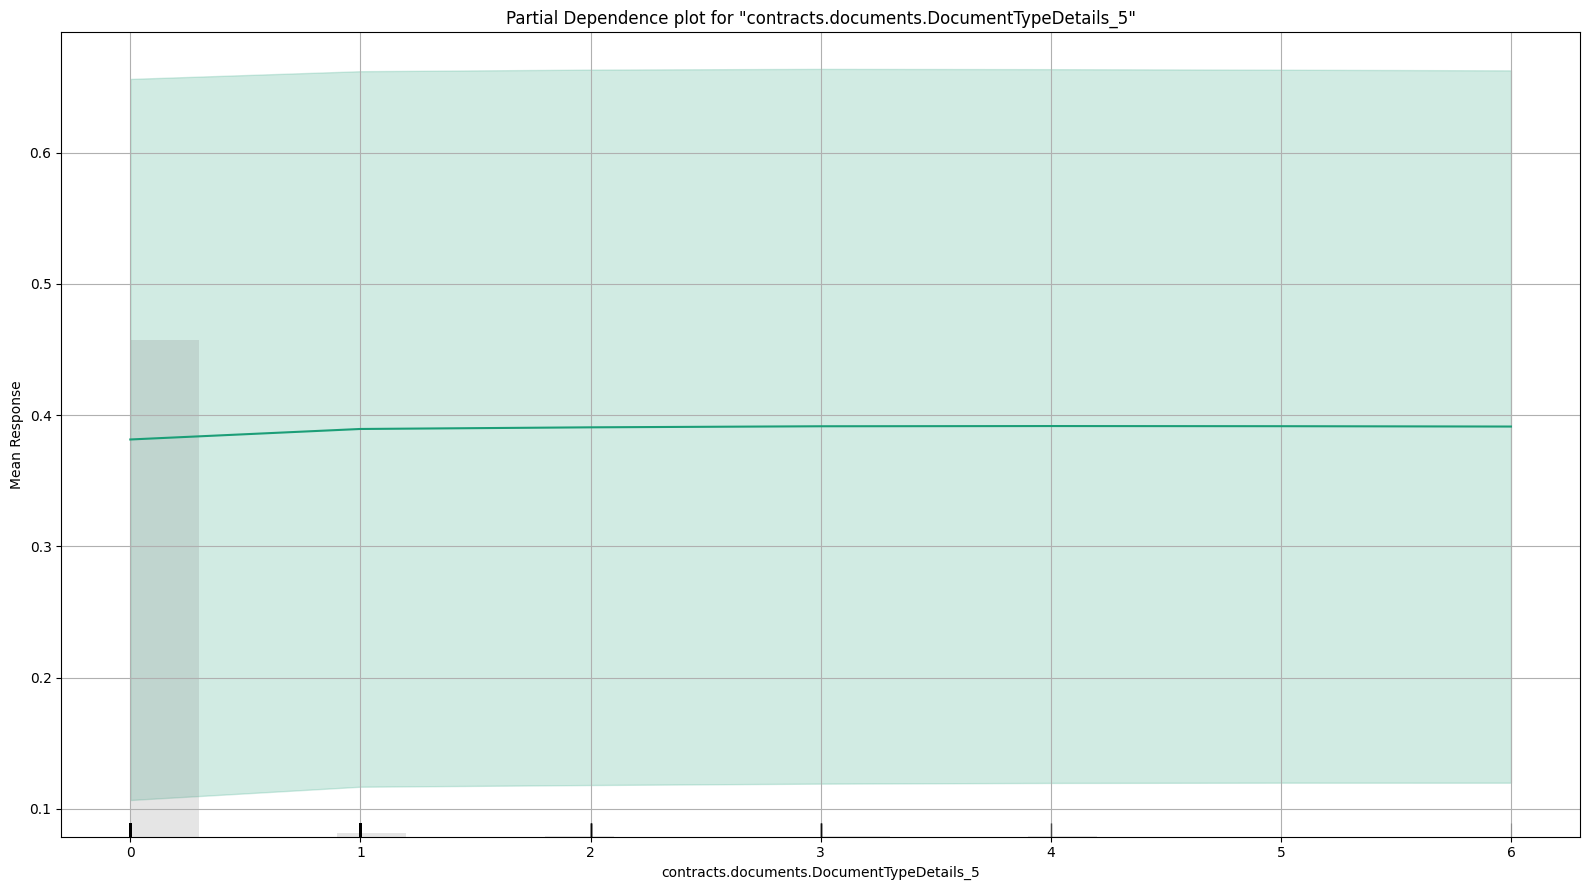

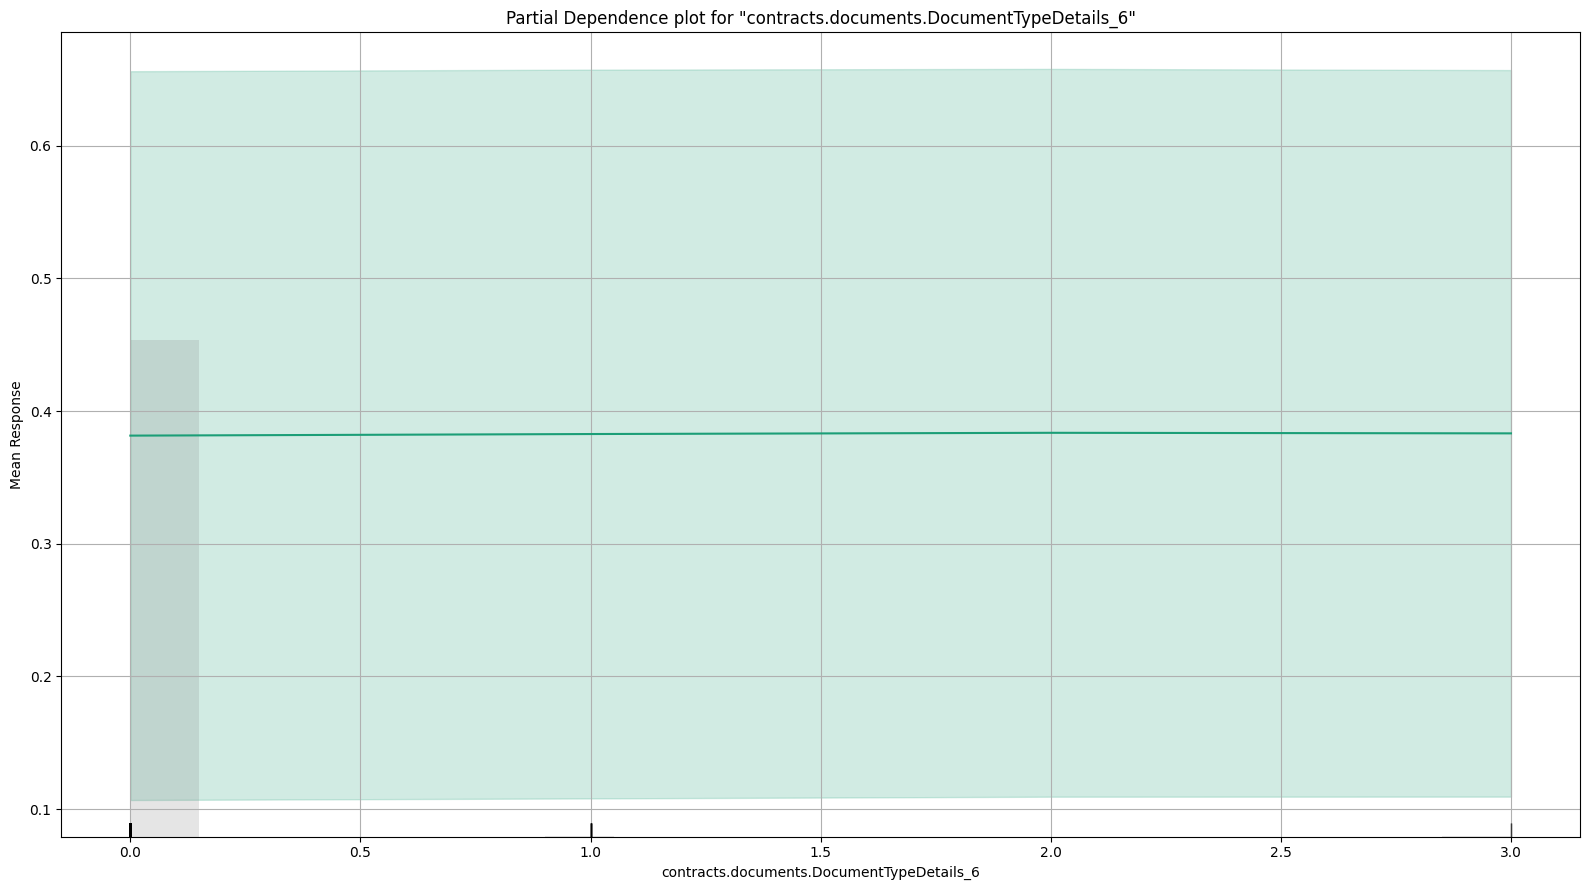

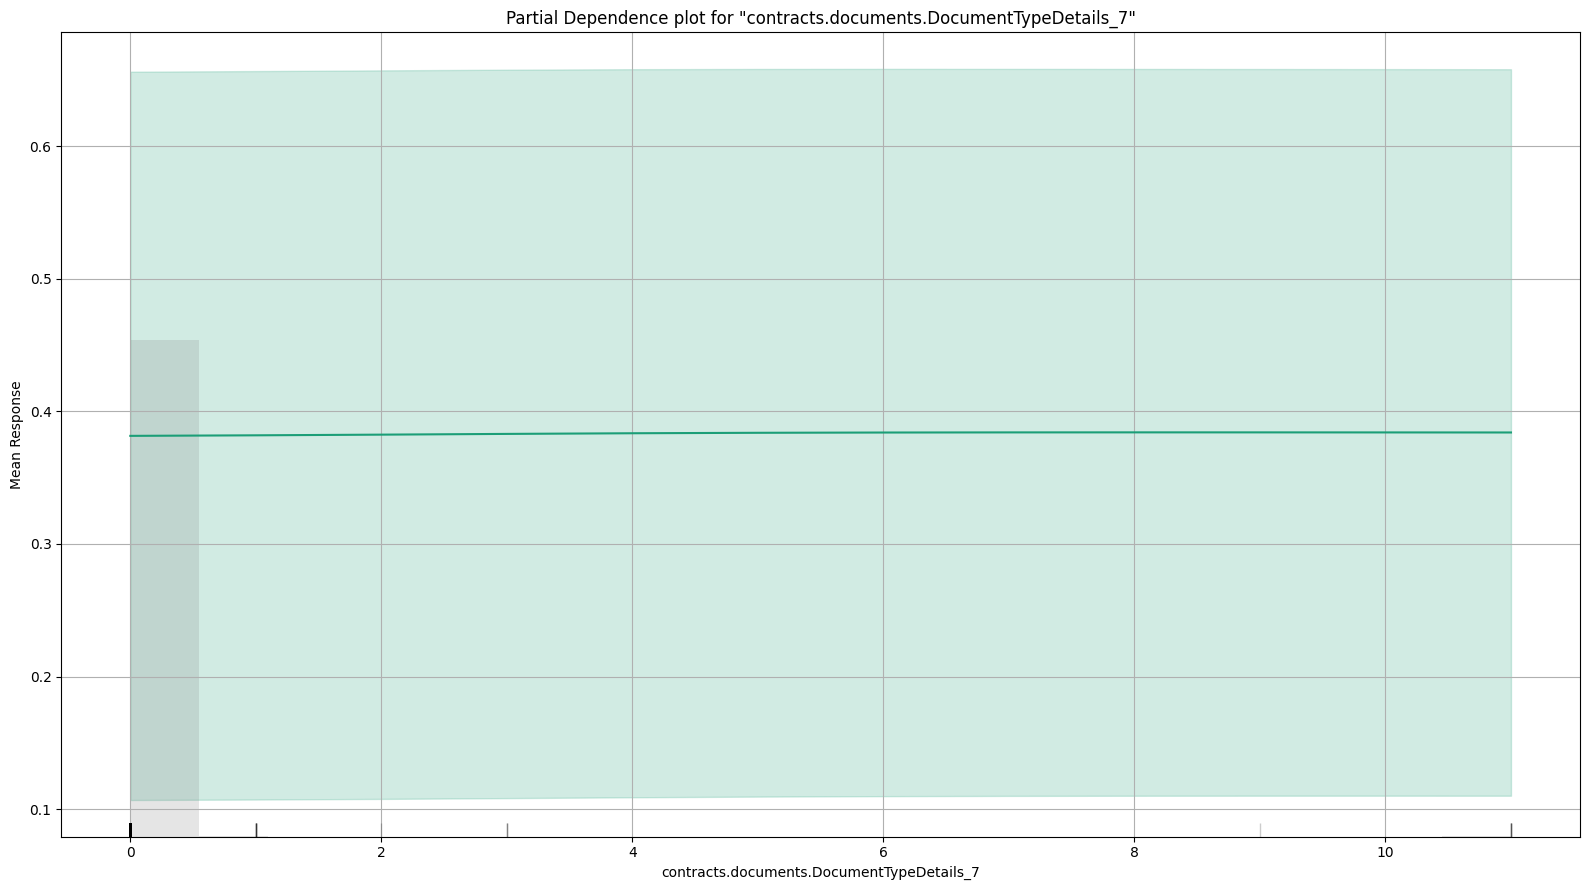

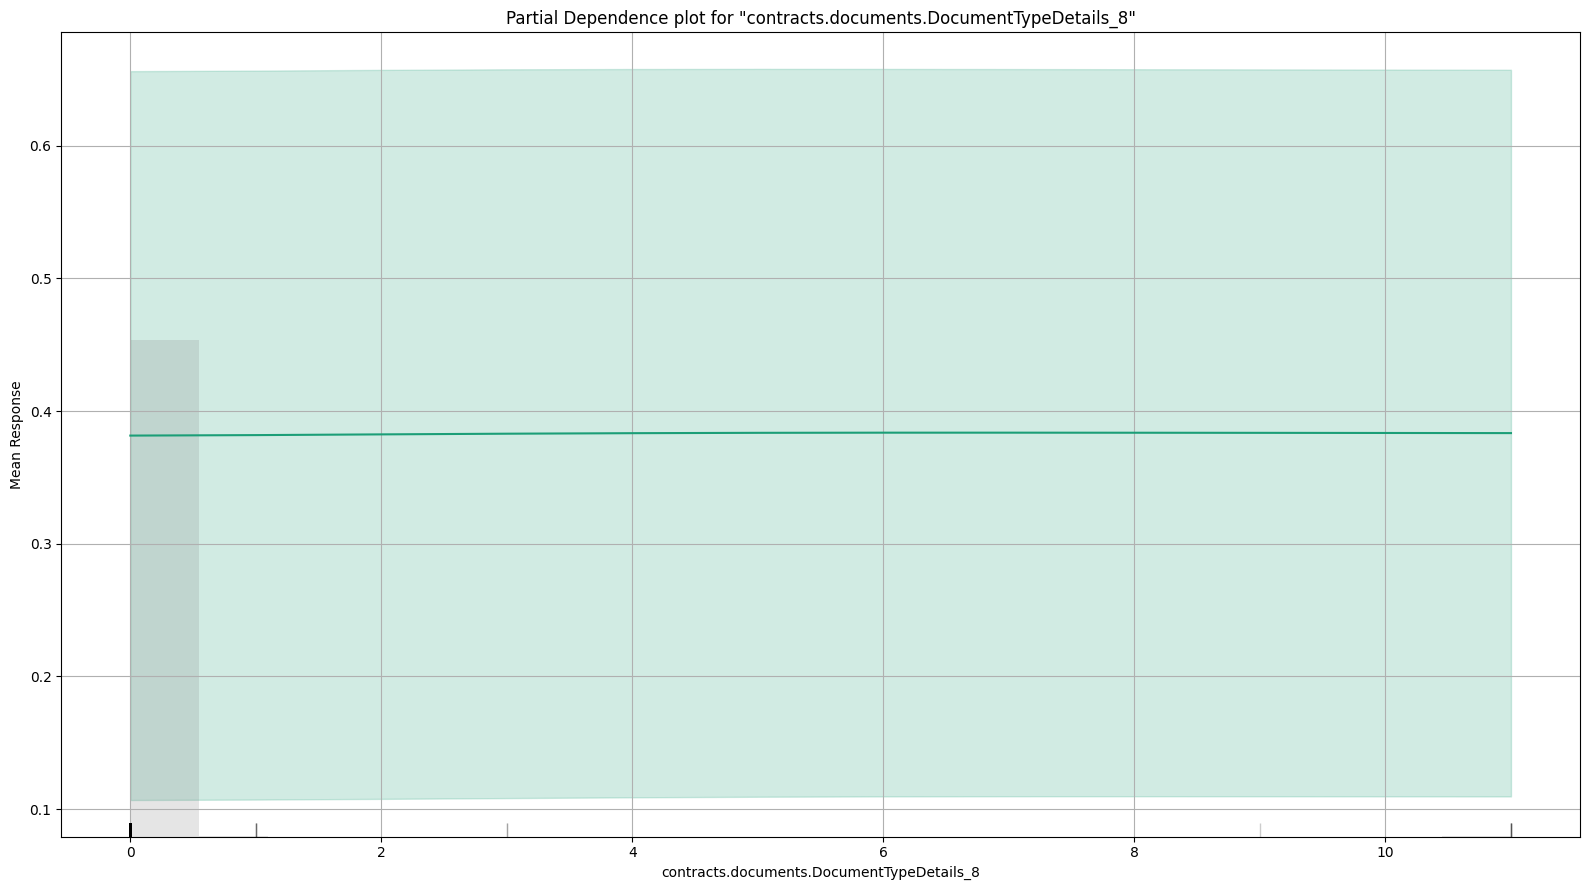

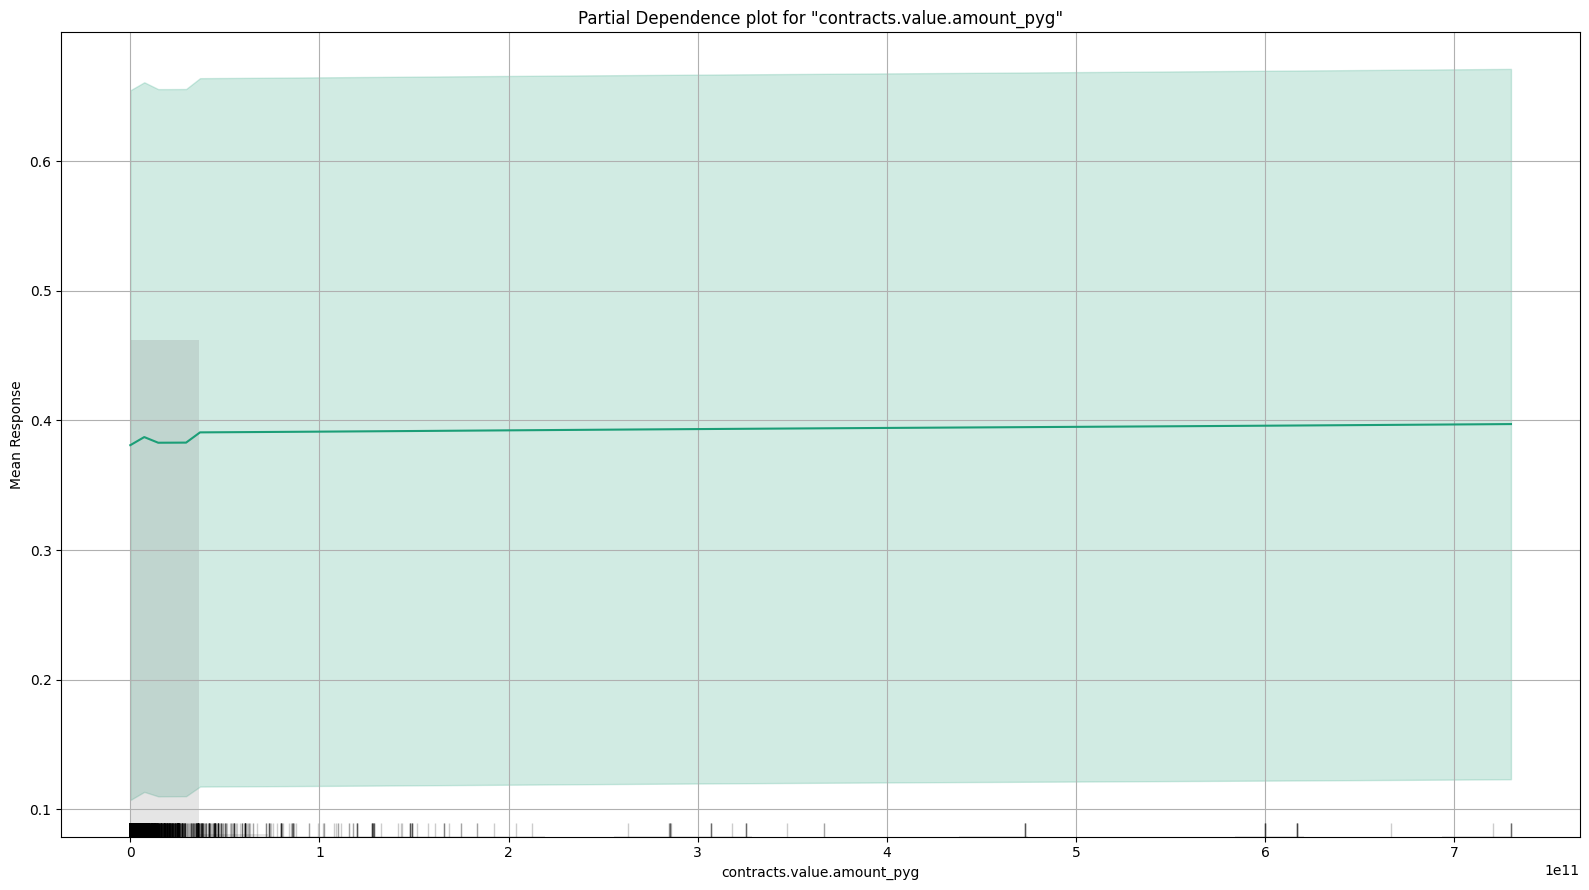

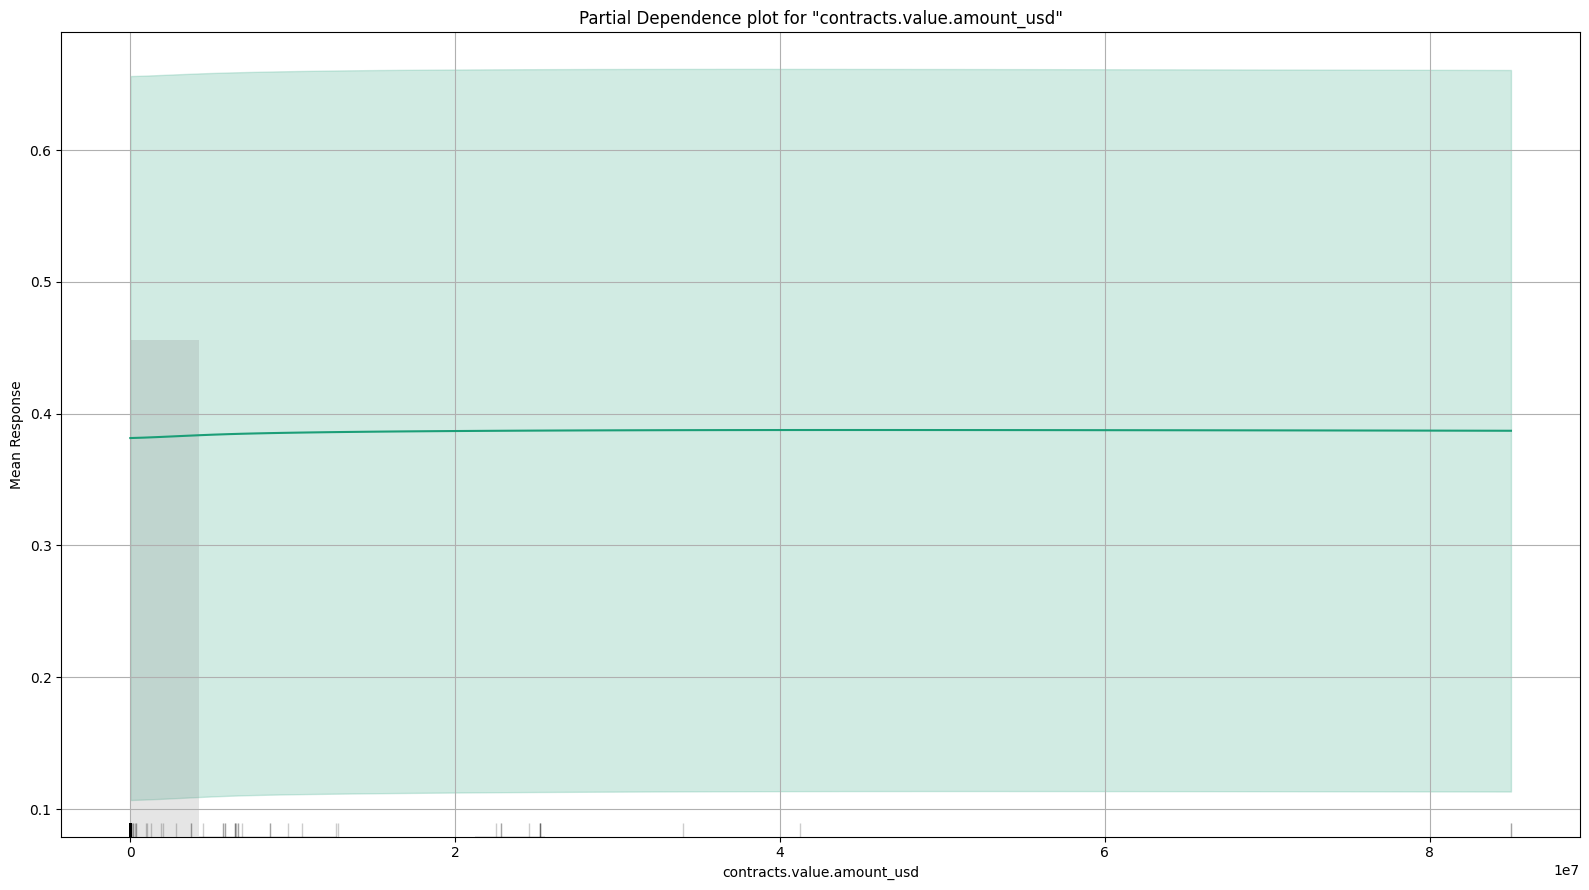

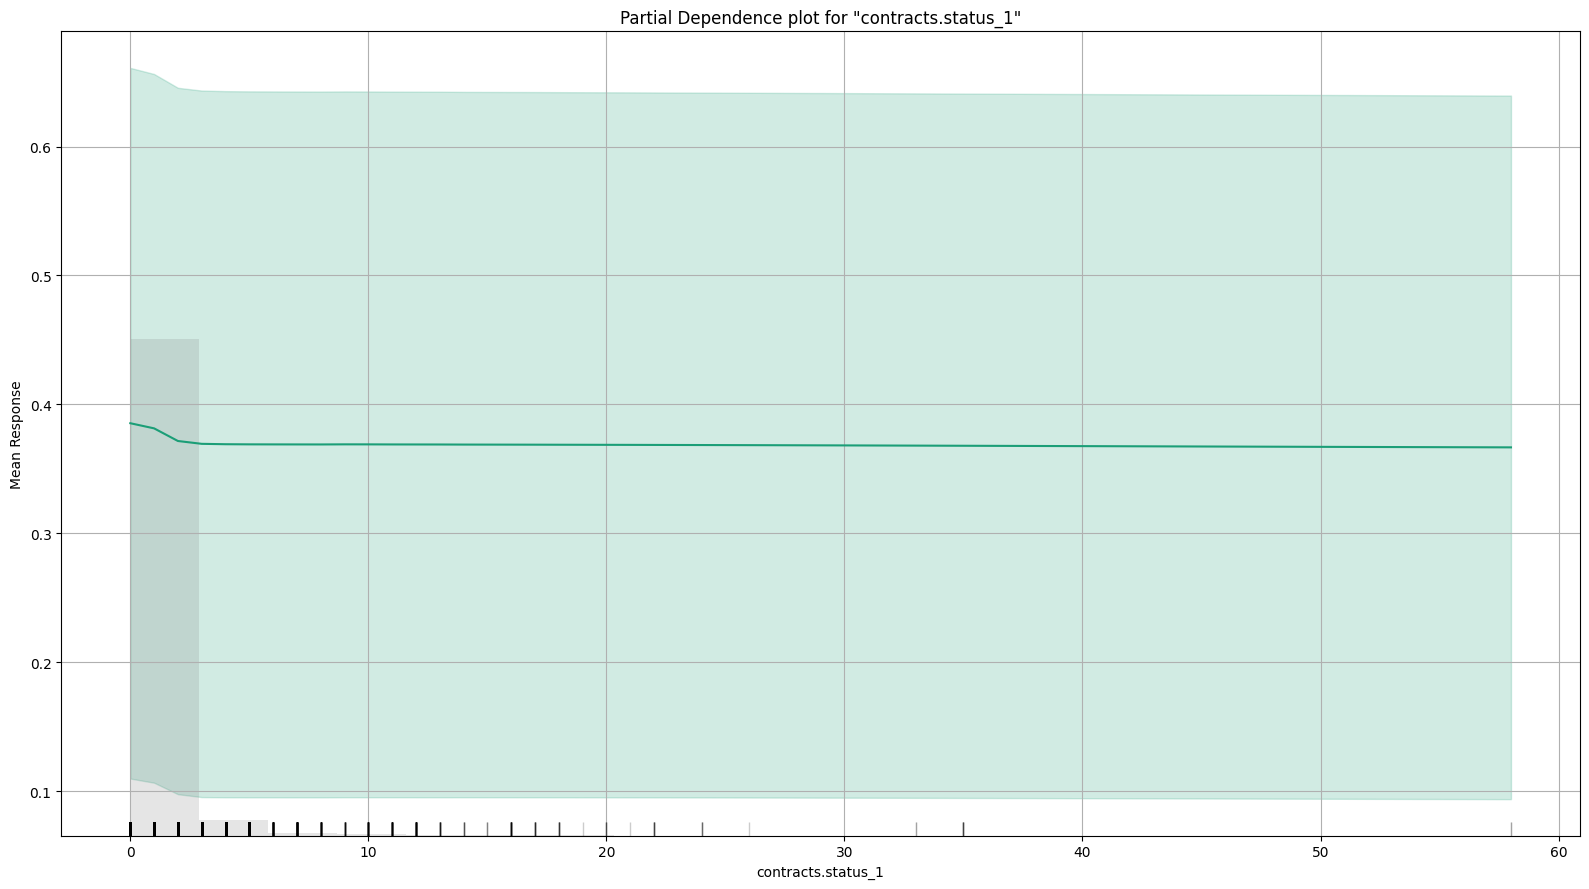

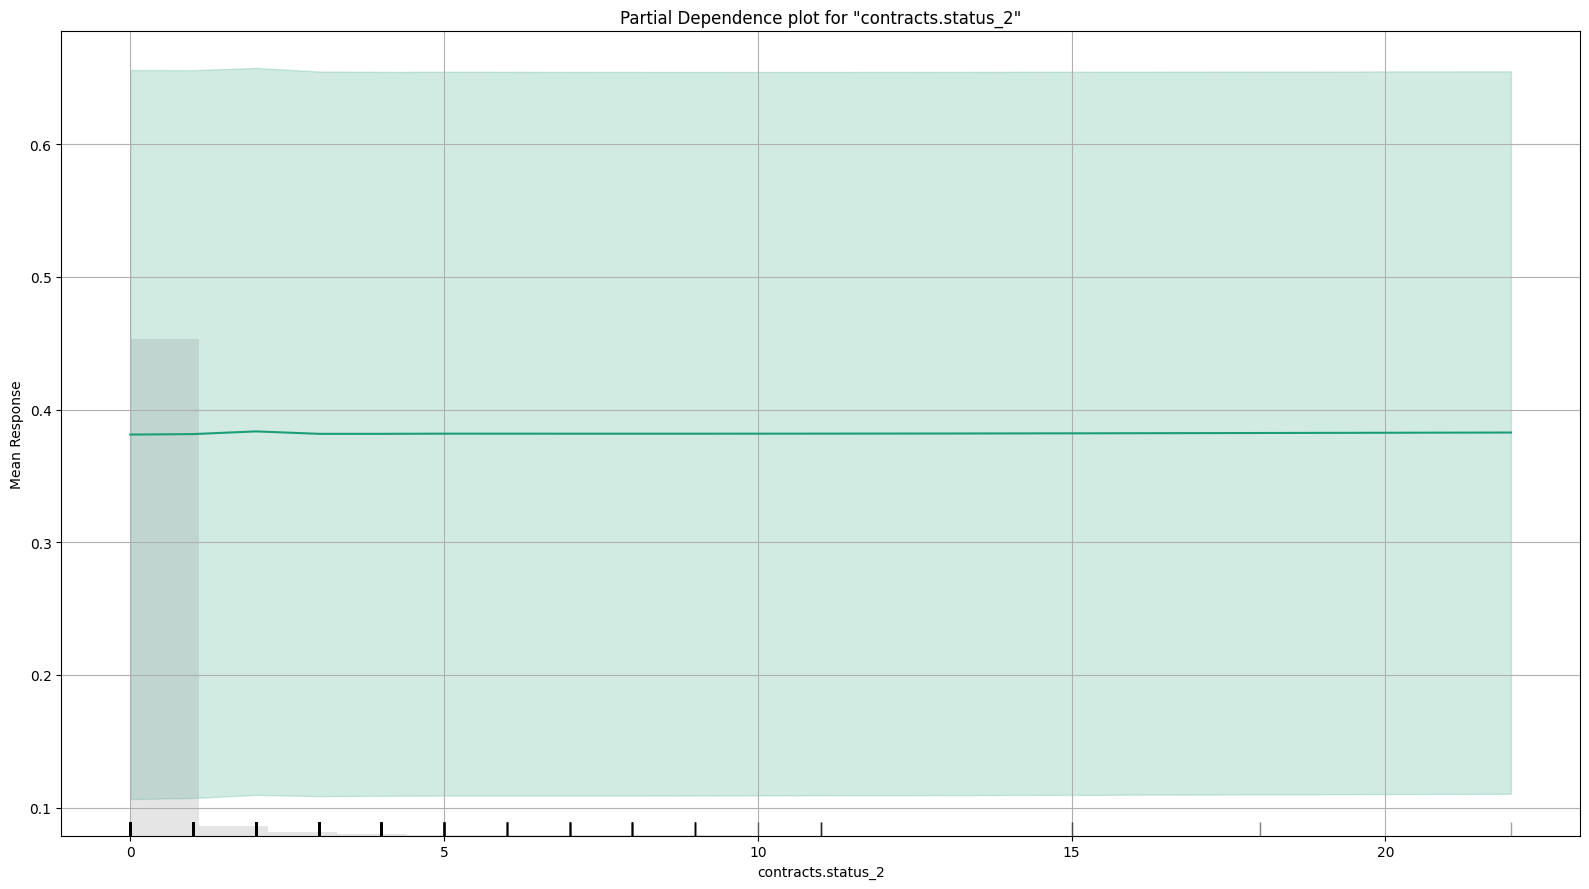

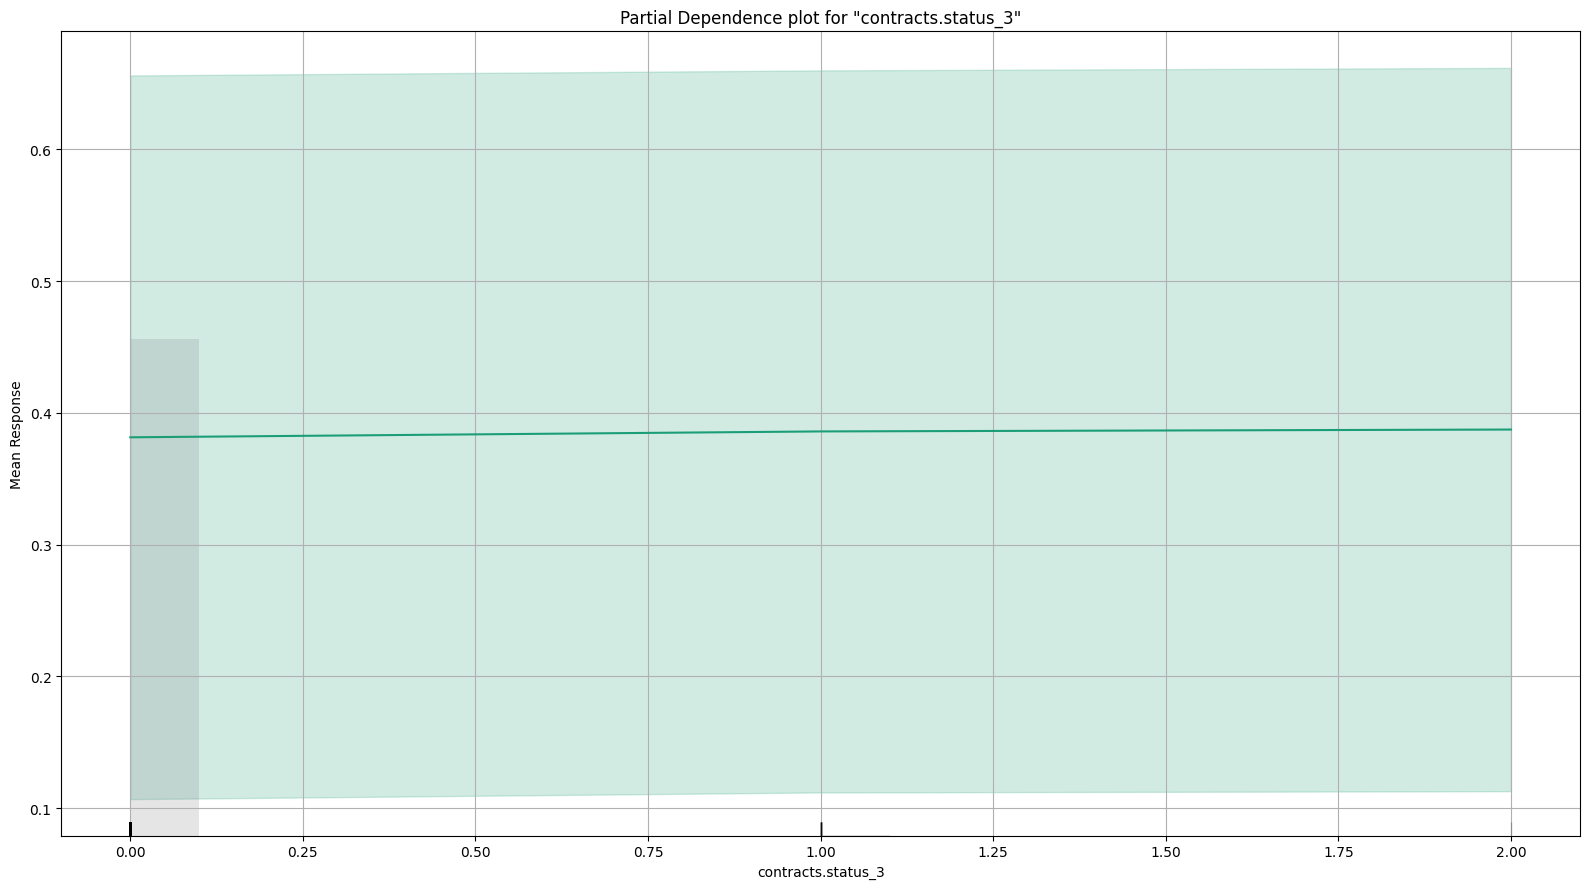

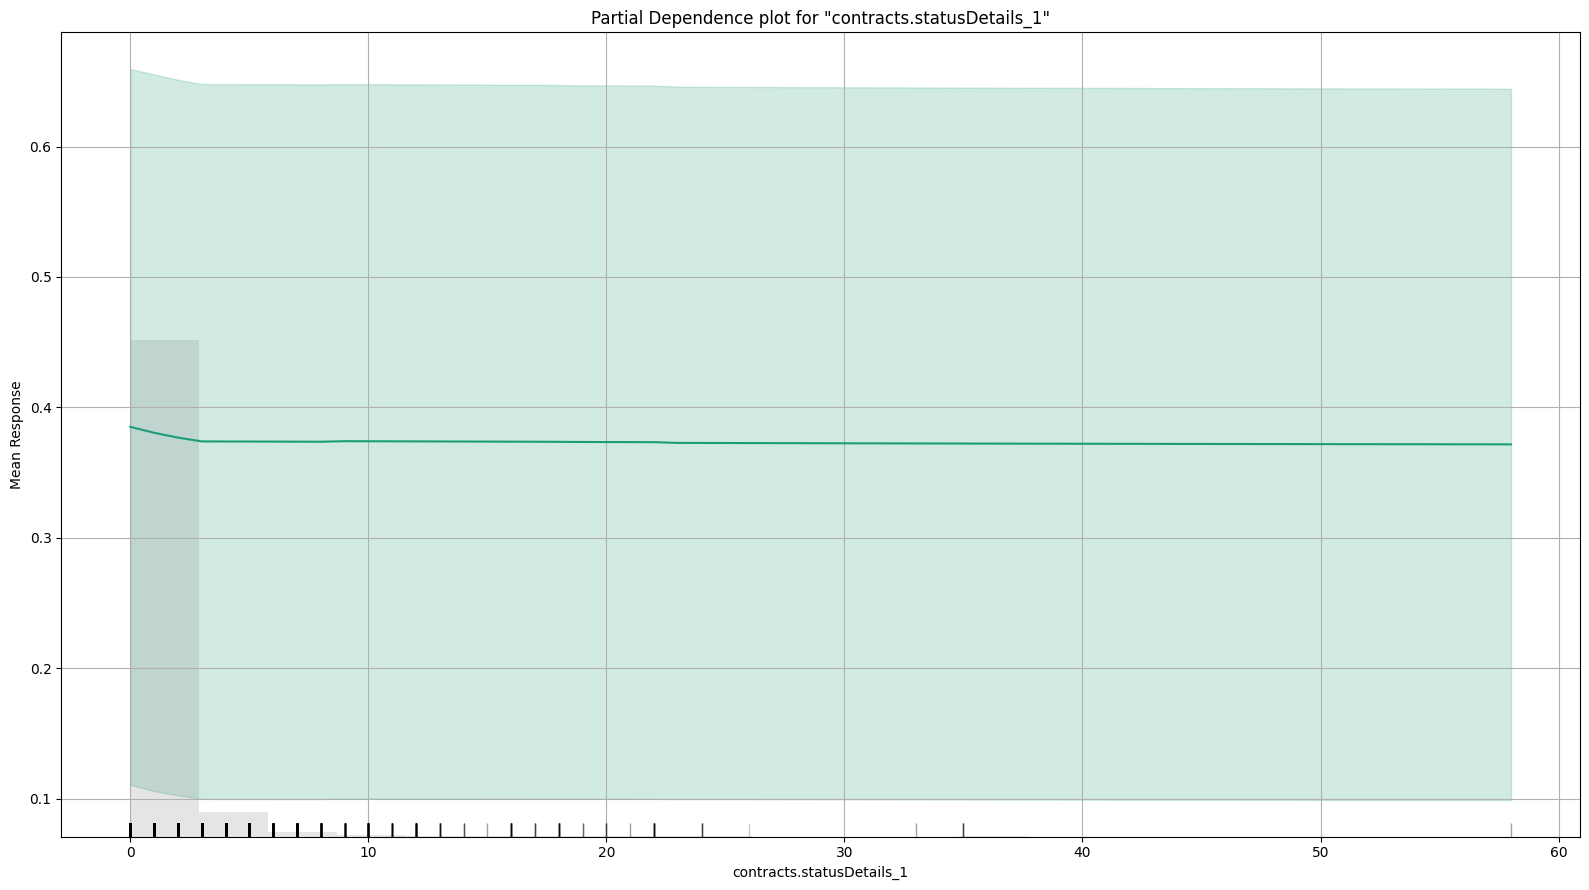

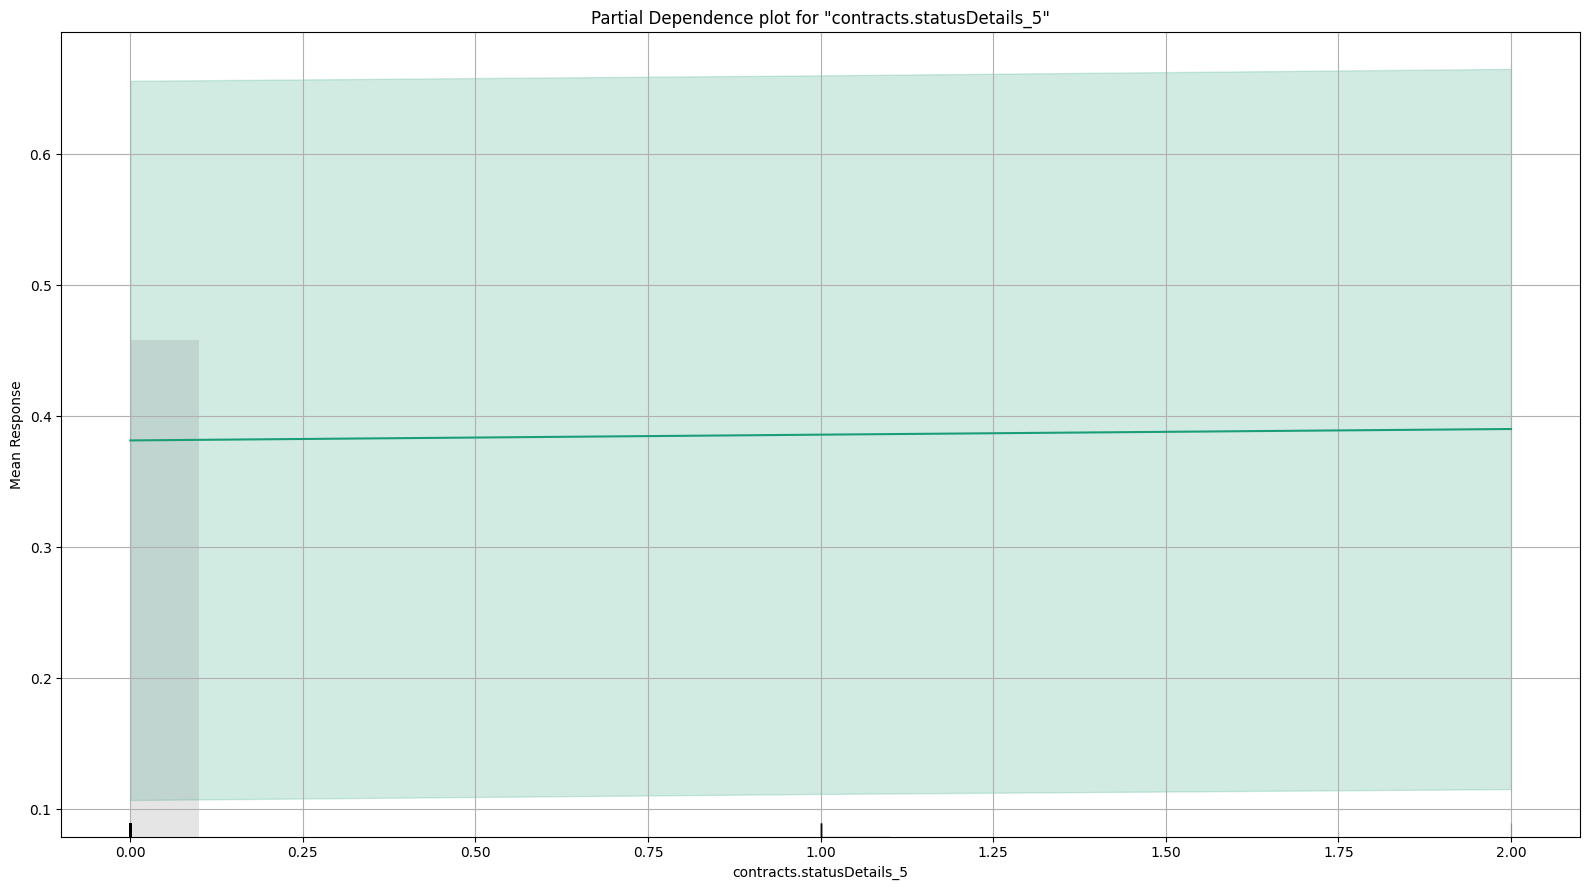

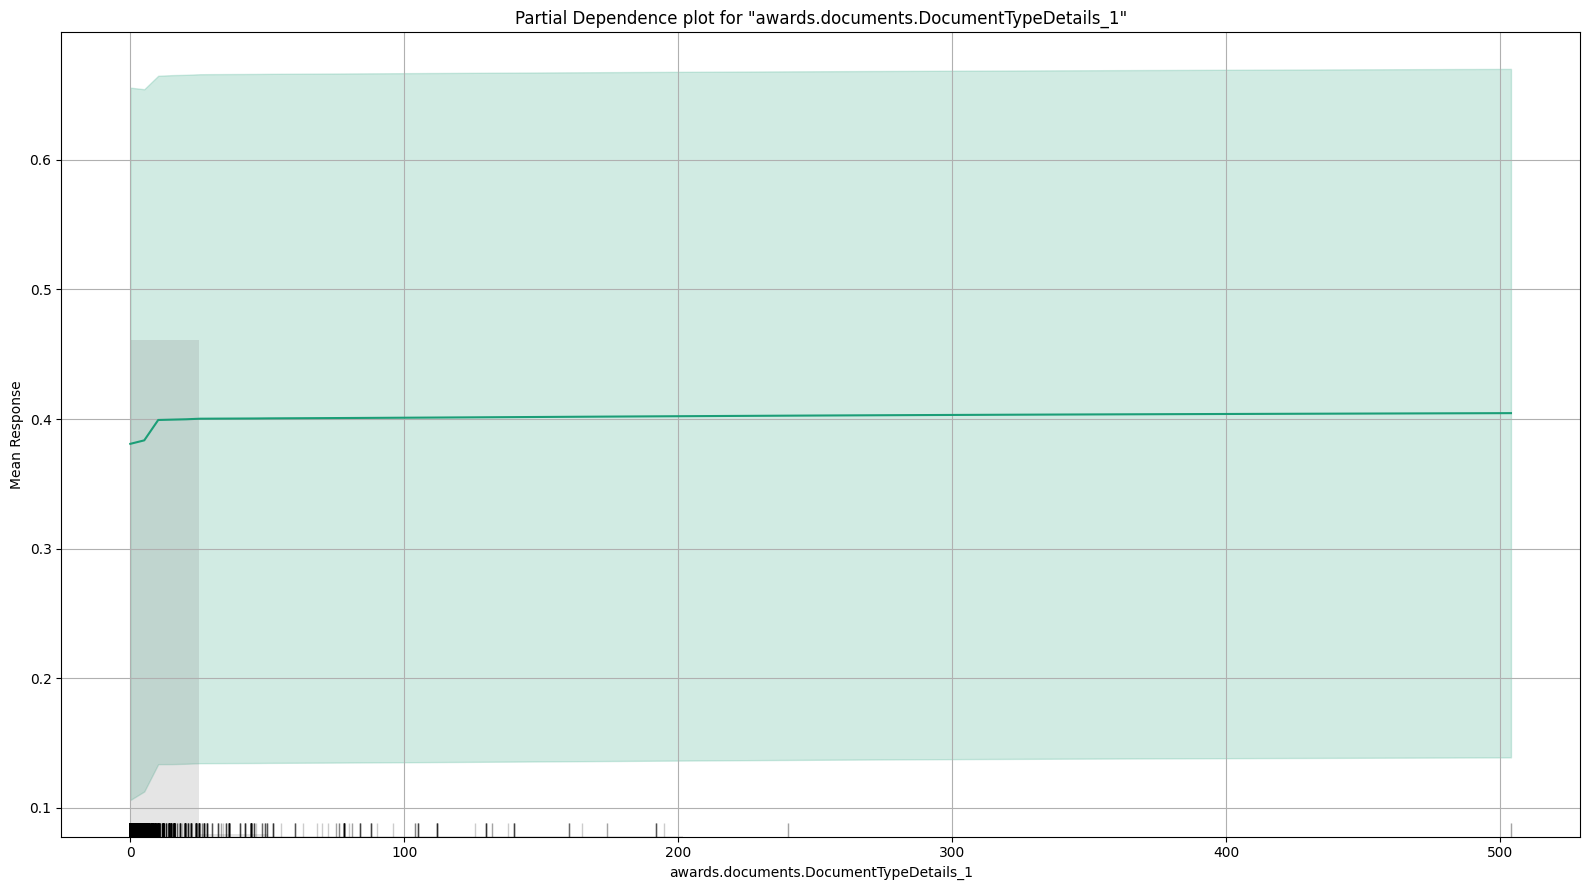

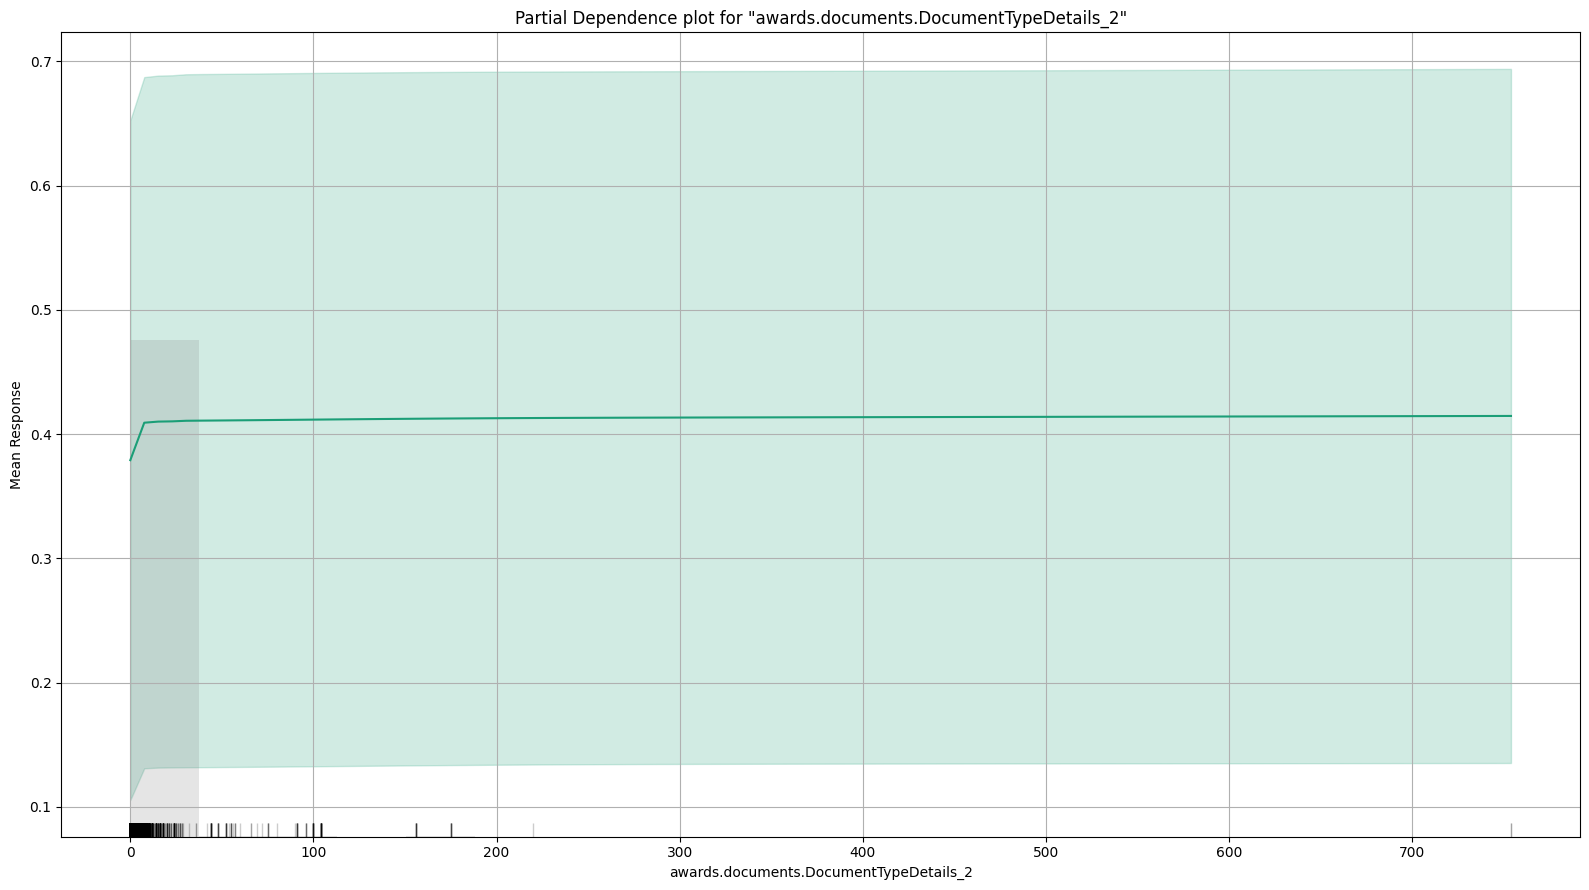

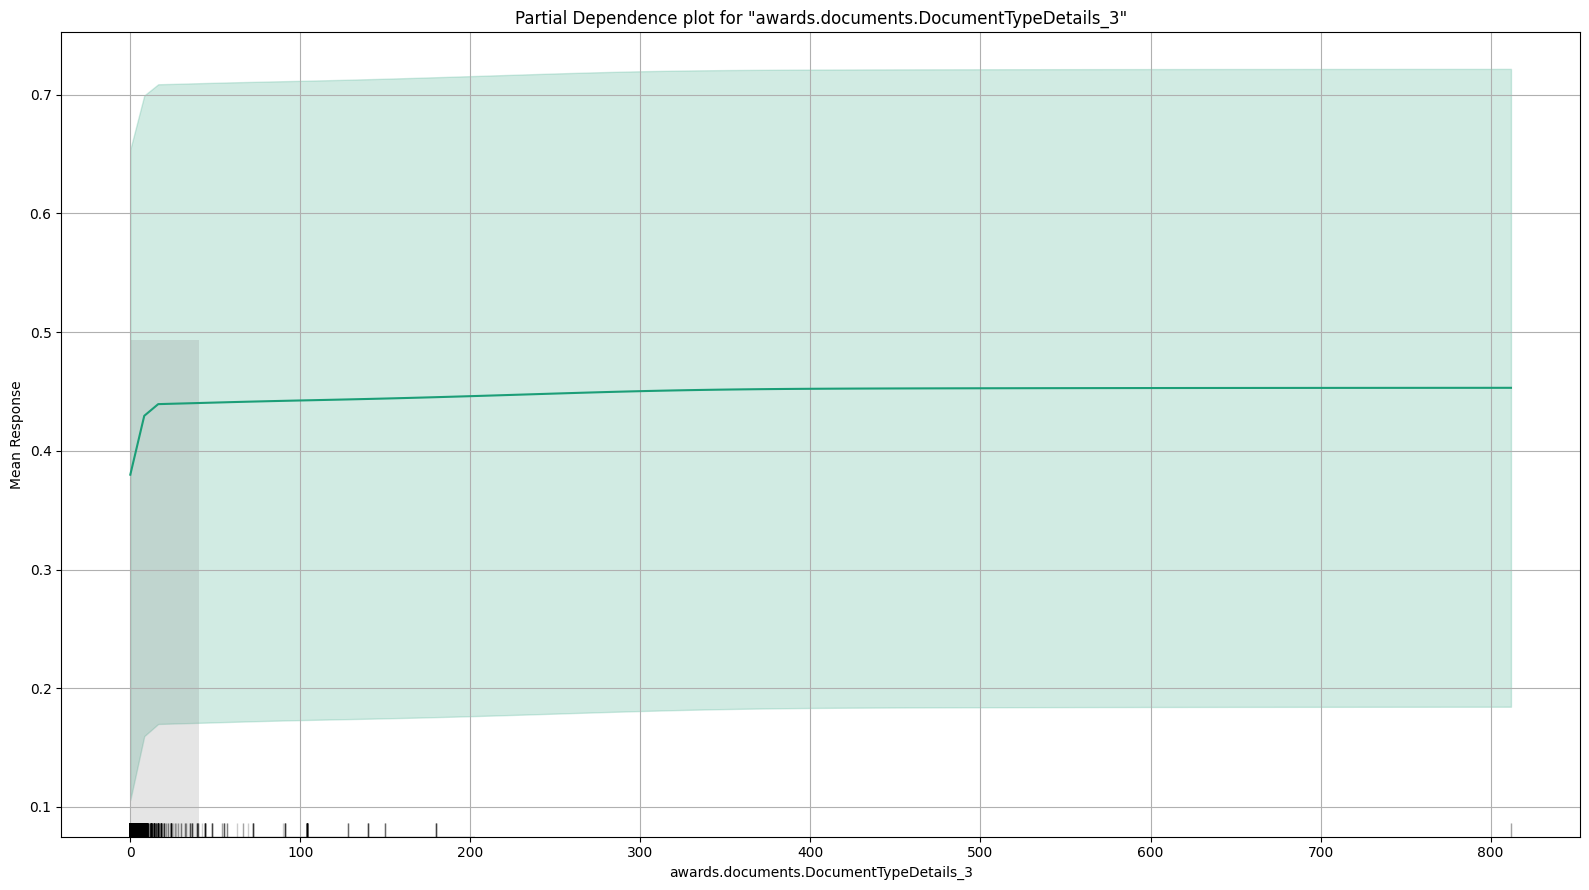

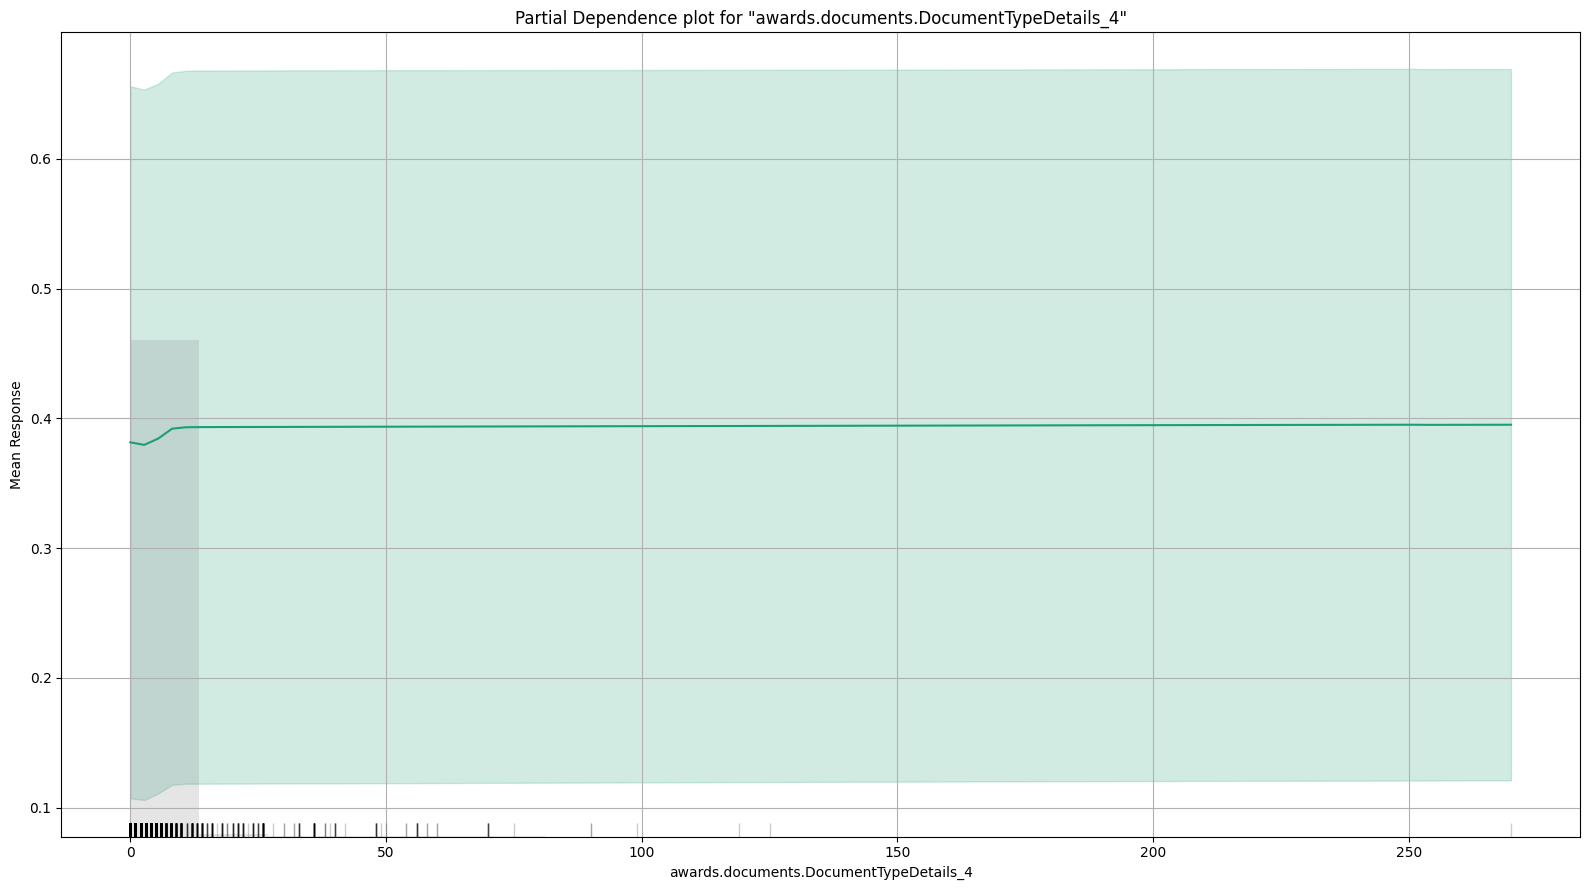

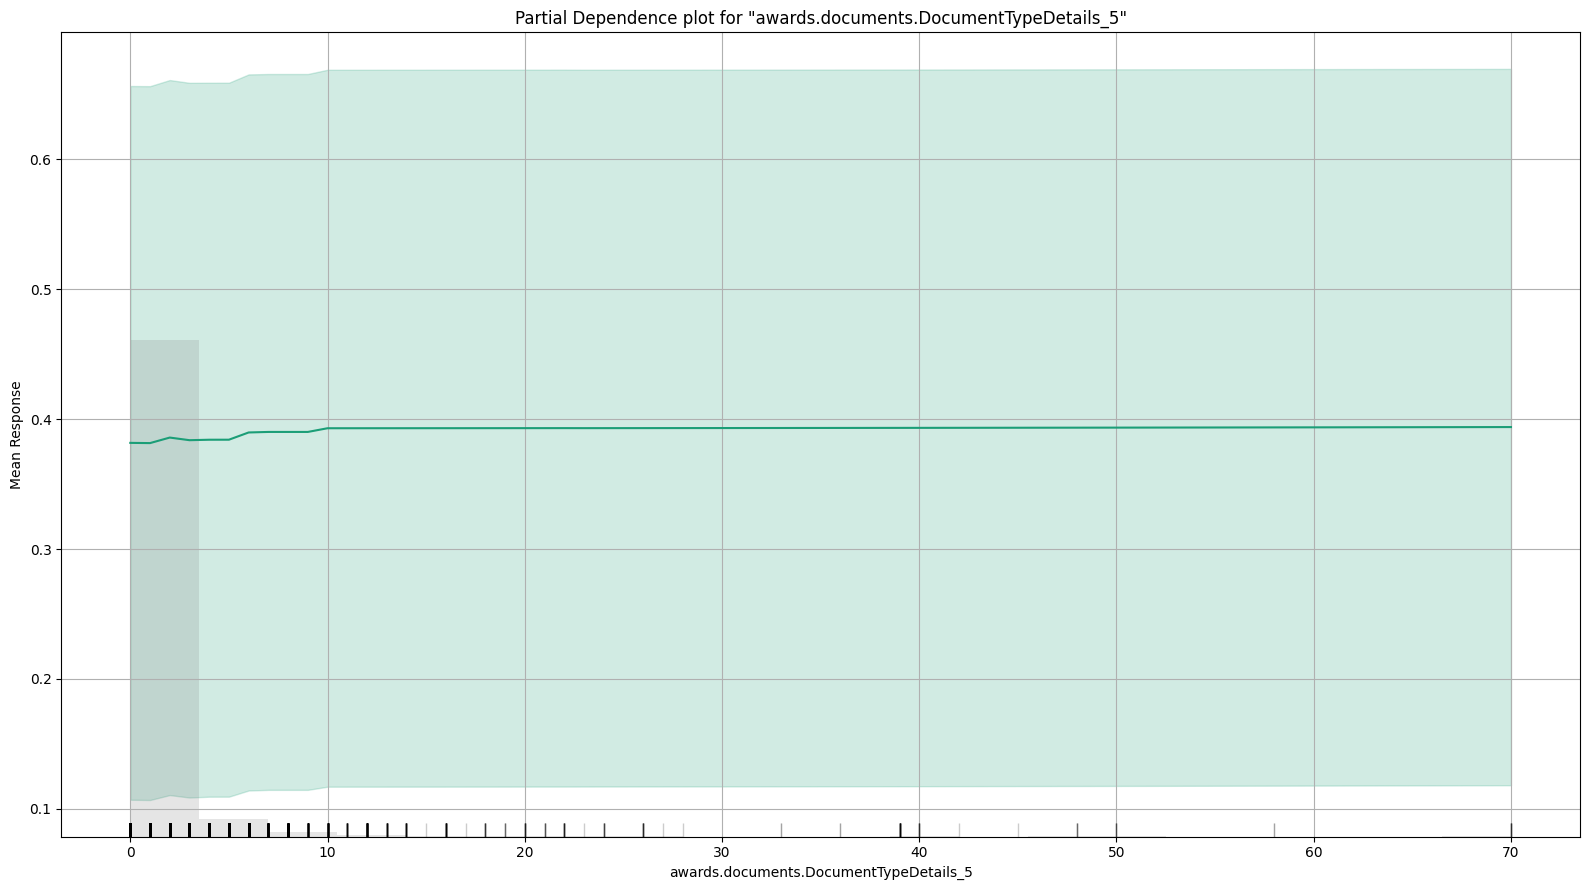

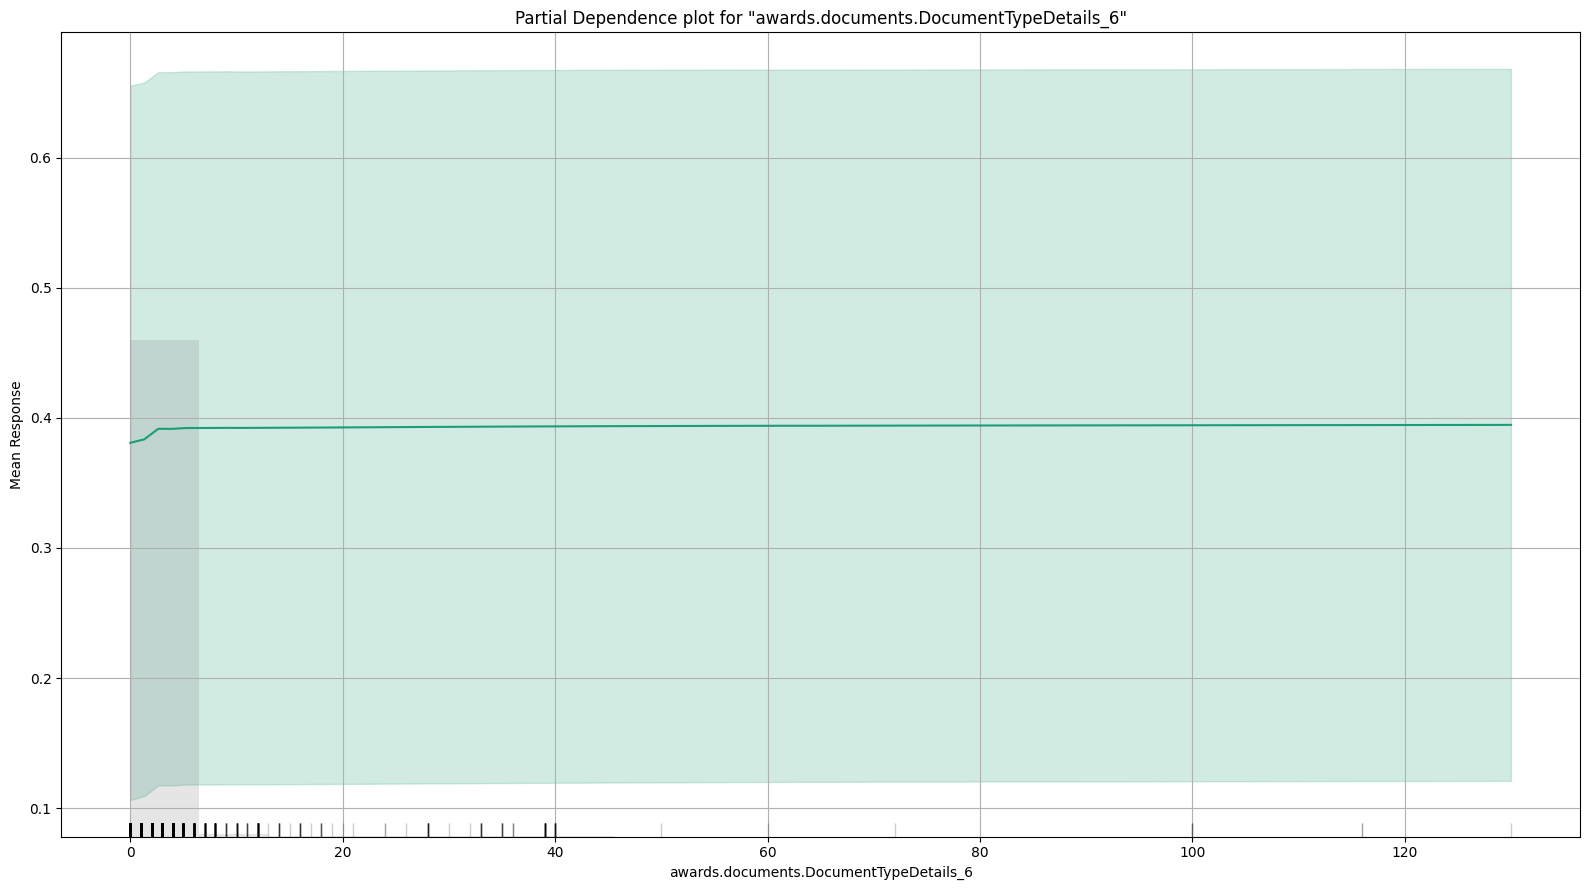

In [29]:
aml.leader.explain(test)
# aml.leader.confusion_matrix()